In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn import tree
import keras
from keras import layers
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
file_path = "./alzheimers_prediction_dataset.csv"
df = pd.read_csv(file_path)
df.head(5)

Country  Age  Gender  Education Level   BMI Physical Activity Level  \
0         Spain   90    Male                1  33.0                  Medium   
1     Argentina   72    Male                7  29.9                  Medium   
2  South Africa   86  Female               19  22.9                    High   
3         China   53    Male               17  31.2                     Low   
4        Sweden   58  Female                3  30.0                    High   

  Smoking Status Alcohol Consumption Diabetes Hypertension  ...  \
0          Never        Occasionally       No           No  ...   
1         Former               Never       No           No  ...   
2        Current        Occasionally       No          Yes  ...   
3          Never           Regularly      Yes           No  ...   
4         Former               Never      Yes           No  ...   

  Dietary Habits Air Pollution Exposure  Employment Status Marital Status  \
0        Healthy                   High            Retired         Single   
1        Healthy                 Medium         Unemployed        Widowed   
2        Average                 Medium           Employed         Single   
3        Healthy                 Medium            Retired         Single   
4      Unhealthy                   High           Employed        Married   

  Genetic Risk Factor (APOE-ε4 allele) Social Engagement Level Income Level  \
0                                   No                     Low       Medium   
1                                   No                    High          Low   
2                                   No                     Low       Medium   
3                                   No                    High       Medium   
4                                   No                     Low       Medium   

  Stress Levels Urban vs Rural Living Alzheimer’s Diagnosis  
0          High                 Urban                    No  
1          High                 Urban                    No  
2          High                 Rural                    No  
3           Low                 Rural                    No  
4          High                 Rural                    No  

[5 rows x 25 columns]

In [3]:
df.shape

(74283, 25)

In [4]:
df.isnull().sum()

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

In [5]:
duplicated = df[df.duplicated()]
duplicated

Empty DataFrame
Columns: [Country, Age, Gender, Education Level, BMI, Physical Activity Level, Smoking Status, Alcohol Consumption, Diabetes, Hypertension, Cholesterol Level, Family History of Alzheimer’s, Cognitive Test Score, Depression Level, Sleep Quality, Dietary Habits, Air Pollution Exposure, Employment Status, Marital Status, Genetic Risk Factor (APOE-ε4 allele), Social Engagement Level, Income Level, Stress Levels, Urban vs Rural Living, Alzheimer’s Diagnosis]
Index: []

[0 rows x 25 columns]

In [6]:
df.columns

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')

In [9]:
for i in range(len(df.columns)):
    ben = df.groupby(df.columns[i]).count()
    print("Column: ", ben.iloc[:, 0])
    print('\n')

Column:  Country
Argentina       3731
Australia       3787
Brazil          3839
Canada          3711
China           3592
France          3710
Germany         3807
India           3741
Italy           3724
Japan           3751
Mexico          3598
Norway          3706
Russia          3778
Saudi Arabia    3662
South Africa    3760
South Korea     3732
Spain           3698
Sweden          3689
UK              3651
USA             3616
Name: Age, dtype: int64


Column:  Age
50    1701
51    1672
52    1616
53    1625
54    1681
55    1614
56    1615
57    1655
58    1612
59    1655
60    1703
61    1684
62    1677
63    1641
64    1709
65    1684
66    1659
67    1655
68    1576
69    1684
70    1611
71    1682
72    1731
73    1596
74    1624
75    1671
76    1690
77    1577
78    1632
79    1641
80    1673
81    1670
82    1712
83    1629
84    1595
85    1602
86    1668
87    1644
88    1653
89    1656
90    1665
91    1622
92    1607
93    1649
94    1665
Name: Country, dtype: int64



Column:  Hypertension
No     52134
Yes    22149
Name: Country, dtype: int64


Column:  Cholesterol Level
High      22310
Normal    51973
Name: Country, dtype: int64


Column:  Family History of Alzheimer’s
No     52004
Yes    22279
Name: Country, dtype: int64


Column:  Cognitive Test Score
30    1030
31    1024
32    1033
33    1028
34    1025
      ... 
95    1077
96    1055
97    1092
98    1062
99    1052
Name: Country, Length: 70, dtype: int64


Column:  Depression Level
High      24682
Low       24758
Medium    24843
Name: Country, dtype: int64


Column:  Sleep Quality
Average    24715
Good       25145
Poor       24423
Name: Country, dtype: int64


Column:  Dietary Habits
Average      24917
Healthy      24688
Unhealthy    24678
Name: Country, dtype: int64


Column:  Air Pollution Exposure
High      24906
Low       24656
Medium    24721
Name: Country, dtype: int64


Column:  Employment Status
Employed      24755
Retired       24727
Unemployed    24801
Name: Country, dtype: int64



Column:  Genetic Risk Factor (APOE-ε4 allele)
No     59561
Yes    14722
Name: Country, dtype: int64


Column:  Social Engagement Level
High      24697
Low       24727
Medium    24859
Name: Country, dtype: int64


Column:  Income Level
High      24848
Low       24873
Medium    24562
Name: Country, dtype: int64


Column:  Stress Levels
High      24667
Low       24730
Medium    24886
Name: Country, dtype: int64


Column:  Urban vs Rural Living
Rural    37203
Urban    37080
Name: Country, dtype: int64


Column:  Alzheimer’s Diagnosis
No     43570
Yes    30713
Name: Country, dtype: int64




There are 2 types of possible results:
* Yes with 30713 rows
* No with 43570 rows


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

In [7]:
df_processed = df

label_cols = [
    "Country", "Smoking Status", "Employment Status", "Marital Status", 
    "Urban vs Rural Living", "Alcohol Consumption", "Dietary Habits"
]

label_encoder = LabelEncoder()
for col in label_cols:
    df_processed[col] = label_encoder.fit_transform(df[col])

one_hot_cols = [
    "Gender", "Diabetes", "Hypertension", "Genetic Risk Factor (APOE-ε4 allele)", 
    "Alzheimer’s Diagnosis", "Family History of Alzheimer’s"
]

df_processed = pd.get_dummies(df_processed, columns = one_hot_cols, drop_first=True)

ordinal_cols = [
    "Physical Activity Level", "Cholesterol Level", "Depression Level", "Sleep Quality", 
    "Air Pollution Exposure", "Social Engagement Level", "Income Level", "Stress Levels"
]

ordinal_mappings = {
    "Physical Activity Level": ["Low", "Medium", "High"],
    "Cholesterol Level": ["Normal", "High"],
    "Depression Level": ["Low", "Medium", "High",],
    "Sleep Quality": ["Poor", "Average", "Good"],
    "Air Pollution Exposure": ["Low", "Medium", "High"],
    "Social Engagement Level": ["Low", "Medium", "High"],
    "Income Level": ["Low", "Medium", "High"],
    "Stress Levels": ["Low", "Medium", "High"]
}

ordinal_encoder = OrdinalEncoder(categories=[ordinal_mappings[col] for col in ordinal_cols])
df_processed[ordinal_cols] = ordinal_encoder.fit_transform(df_processed[ordinal_cols])

In [8]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Country                                   74283 non-null  int64  
 1   Age                                       74283 non-null  int64  
 2   Education Level                           74283 non-null  int64  
 3   BMI                                       74283 non-null  float64
 4   Physical Activity Level                   74283 non-null  float64
 5   Smoking Status                            74283 non-null  int64  
 6   Alcohol Consumption                       74283 non-null  int64  
 7   Cholesterol Level                         74283 non-null  float64
 8   Cognitive Test Score                      74283 non-null  int64  
 9   Depression Level                          74283 non-null  float64
 10  Sleep Quality                     

<Axes: >

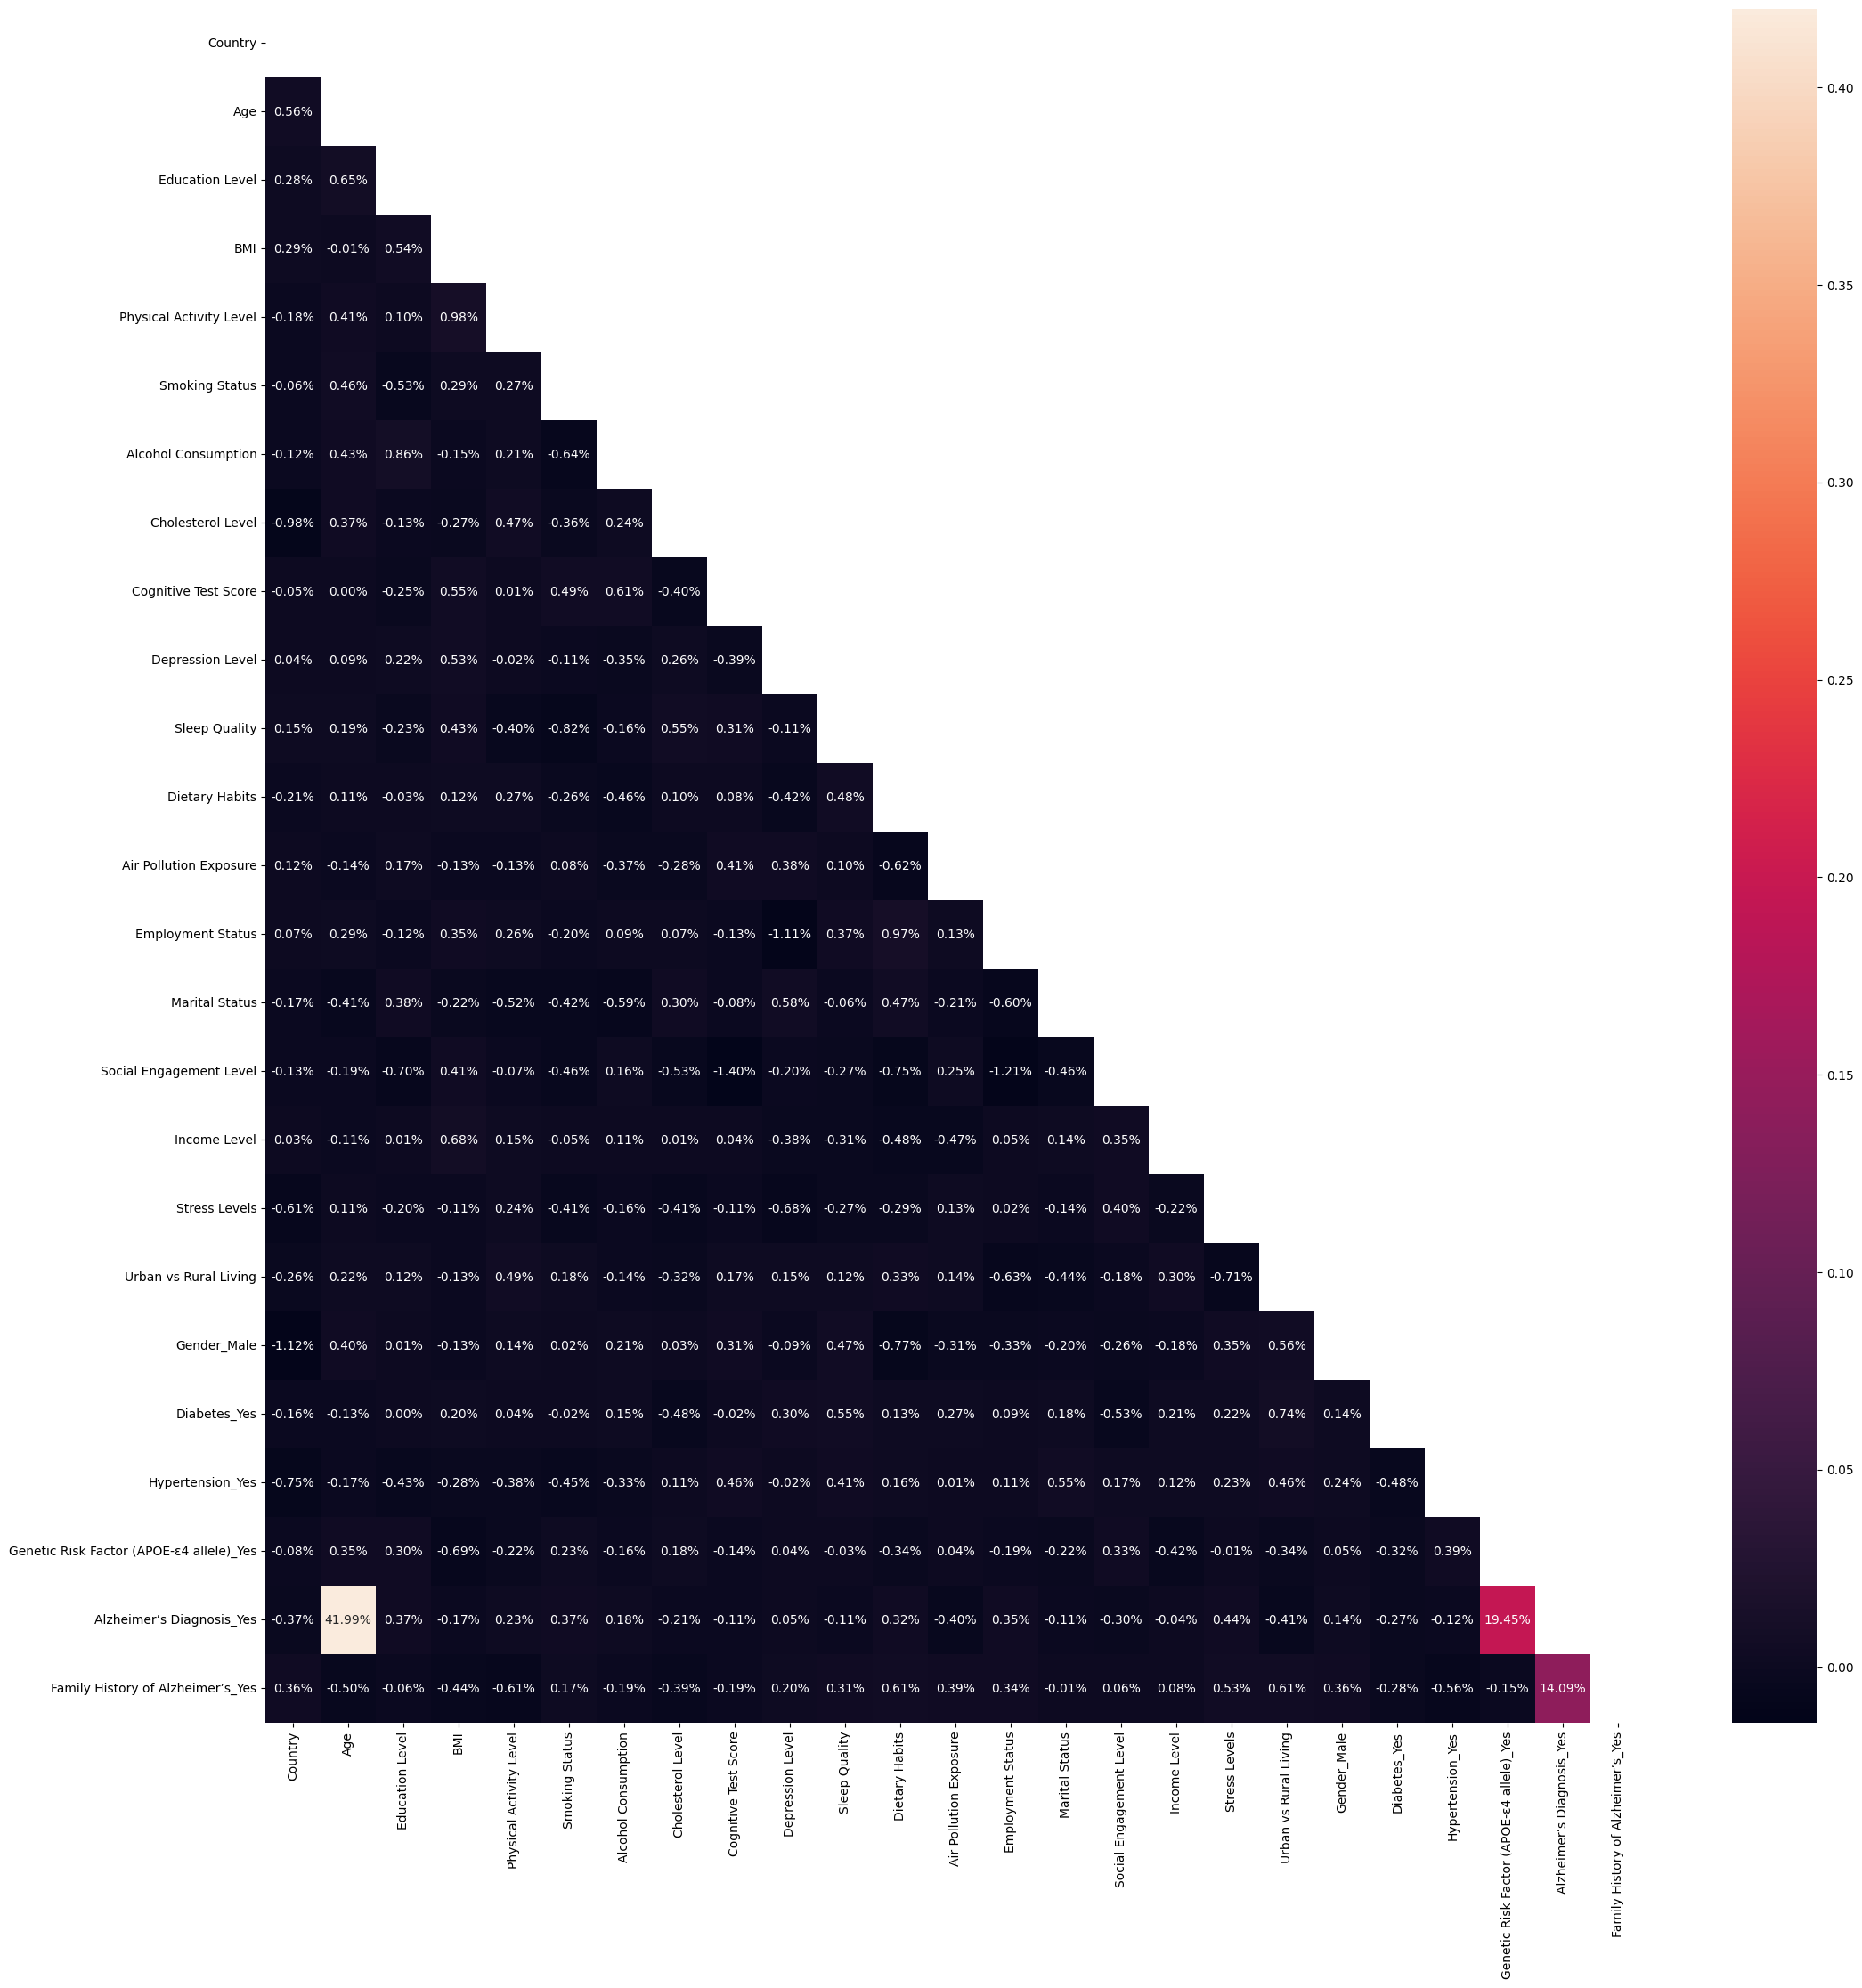

In [33]:
plt.figure(figsize=(25, 25))
sns.heatmap(df_processed.corr(), annot=True, fmt=".2%", mask=np.triu(np.ones_like(df_processed.corr())))

# Logistic Regression

In [46]:
# Sin balance
X = df_processed.drop("Alzheimer’s Diagnosis_Yes", axis=1)
y = df_processed['Alzheimer’s Diagnosis_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(class_weight='balanced' , max_iter=1000 , random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7119203069260281

In [47]:
# Under Sampling
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X, y)
print(len(X_under), len(y_under))
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)
model = LogisticRegression(class_weight='balanced' , max_iter=1000 , random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

61426 61426


0.7080416734494547

In [48]:
# Over Sampling
oversampler = RandomOverSampler(random_state=42)
X_over, y_over = oversampler.fit_resample(X, y)
print(len(X_over), len(y_over))
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)
model = LogisticRegression(class_weight='balanced' , max_iter=1000 , random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

87140 87140


0.7149988524213908

# Decision Tree

In [55]:
# Sin balance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.6334387830652218

In [52]:
# Random Under Sampling
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X, y)
print(len(X_under), len(y_under))
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)
dt_under = tree.DecisionTreeClassifier()
dt_under = dt.fit(X_train, y_train)
dt_under.score(X_test, y_test)

61426 61426


0.635764284551522

In [56]:
# Random Over Sampling
oversampler = RandomOverSampler(random_state=42)
X_over, y_over = oversampler.fit_resample(X, y)
print(len(X_over), len(y_over))
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)
dt_over = tree.DecisionTreeClassifier()
dt_over = dt.fit(X_train, y_train)
dt_over.score(X_test, y_test)

87140 87140


0.7188432407619922

# Redes Neuronales

In [76]:
# MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_processed)
df_scaled = pd.DataFrame(scaled_data, columns=df_processed.columns)


In [73]:
# Sin Balance
X = df_scaled.drop("Alzheimer’s Diagnosis_Yes", axis=1)
y = df_scaled['Alzheimer’s Diagnosis_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = keras.Sequential([])
model.add(keras.Input(shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adamW', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=16, epochs=10)

 710/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7009 - loss: 0.5906

 718/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7008 - loss: 0.5907

 727/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7008 - loss: 0.5908

 736/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7007 - loss: 0.5909

 745/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7007 - loss: 0.5910

 753/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7006 - loss: 0.5911

 761/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7006 - loss: 0.5912

 769/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7005 - loss: 0.5912

 777/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7004 - loss: 0.5913

 785/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7004 - loss: 0.5914

 793/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7003 - loss: 0.5914

 801/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7003 - loss: 0.5915

 809/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7002 - loss: 0.5916

 818/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7002 - loss: 0.5916

 826/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7001 - loss: 0.5917

 834/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7001 - loss: 0.5917

 843/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7000 - loss: 0.5918

 851/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7000 - loss: 0.5918

 860/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6999 - loss: 0.5919

 869/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6999 - loss: 0.5919

 877/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6998 - loss: 0.5920

 886/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6998 - loss: 0.5920

 895/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6998 - loss: 0.5920

 904/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6997 - loss: 0.5921

 913/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6997 - loss: 0.5921

 921/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6997 - loss: 0.5921

 930/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6996 - loss: 0.5921

 938/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6996 - loss: 0.5921

 946/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6996 - loss: 0.5922

 955/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6996 - loss: 0.5922

 964/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6995 - loss: 0.5923

 972/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6995 - loss: 0.5923

 980/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6994 - loss: 0.5924

 989/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6994 - loss: 0.5924

 998/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6993 - loss: 0.5925

1007/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6993 - loss: 0.5925

1015/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6993 - loss: 0.5926

1023/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6992 - loss: 0.5926

1031/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6992 - loss: 0.5927

1040/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6992 - loss: 0.5928

1049/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6991 - loss: 0.5928

1058/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6991 - loss: 0.5929

1067/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6991 - loss: 0.5929

1076/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6990 - loss: 0.5930

1085/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6990 - loss: 0.5930

1093/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6990 - loss: 0.5930

1101/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6990 - loss: 0.5931

1110/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6989 - loss: 0.5931

1118/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6989 - loss: 0.5932

1127/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6989 - loss: 0.5932

1135/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6988 - loss: 0.5933

1144/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6988 - loss: 0.5933

1153/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6988 - loss: 0.5934

1162/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6987 - loss: 0.5934

1171/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6987 - loss: 0.5935

1179/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6986 - loss: 0.5935

1188/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6986 - loss: 0.5936

1197/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6986 - loss: 0.5936

1206/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6985 - loss: 0.5937

1215/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6985 - loss: 0.5937

1224/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6984 - loss: 0.5938

1233/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6984 - loss: 0.5938

1242/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6984 - loss: 0.5938

1251/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6983 - loss: 0.5939

1259/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6983 - loss: 0.5939

1267/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6982 - loss: 0.5939

1276/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6982 - loss: 0.5940

1285/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6982 - loss: 0.5940

1294/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6981 - loss: 0.5940

1303/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6981 - loss: 0.5941

1312/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6981 - loss: 0.5941

1321/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6980 - loss: 0.5941

1330/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6980 - loss: 0.5942

1338/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6980 - loss: 0.5942

1346/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6979 - loss: 0.5942

1354/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6979 - loss: 0.5942

1363/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6979 - loss: 0.5942

1372/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6978 - loss: 0.5943

1381/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6978 - loss: 0.5943

1390/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6978 - loss: 0.5943

1399/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6977 - loss: 0.5943

1407/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6977 - loss: 0.5944

1415/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6977 - loss: 0.5944

1424/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6976 - loss: 0.5944

1433/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6976 - loss: 0.5944

1442/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6976 - loss: 0.5944

1451/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6976 - loss: 0.5945

1459/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6975 - loss: 0.5945

1468/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6975 - loss: 0.5945

1477/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6975 - loss: 0.5945

1486/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6975 - loss: 0.5945

1494/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6974 - loss: 0.5945

1503/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6974 - loss: 0.5945

1512/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6974 - loss: 0.5946

1521/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6973 - loss: 0.5946

1530/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6973 - loss: 0.5946

1539/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6973 - loss: 0.5946

1548/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6973 - loss: 0.5946

1557/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6973 - loss: 0.5946

1566/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6972 - loss: 0.5946

1575/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6972 - loss: 0.5947

1583/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6972 - loss: 0.5947

1592/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6972 - loss: 0.5947

1601/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6972 - loss: 0.5947

1610/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6971 - loss: 0.5947

1619/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6971 - loss: 0.5947

1628/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6971 - loss: 0.5947

1637/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6971 - loss: 0.5947

1646/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6971 - loss: 0.5947

1655/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6971 - loss: 0.5947

1663/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6970 - loss: 0.5947

1672/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6970 - loss: 0.5947

1681/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6970 - loss: 0.5947

1690/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6970 - loss: 0.5947

1699/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6970 - loss: 0.5948

1708/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6970 - loss: 0.5948

1717/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6969 - loss: 0.5948

1726/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6969 - loss: 0.5948

1735/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6969 - loss: 0.5948

1743/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6969 - loss: 0.5948

1752/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6969 - loss: 0.5948

1761/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6969 - loss: 0.5949

1770/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6968 - loss: 0.5949

1779/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6968 - loss: 0.5949

1788/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6968 - loss: 0.5949

1797/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6968 - loss: 0.5950

1806/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6968 - loss: 0.5950

1815/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6967 - loss: 0.5950

1823/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6967 - loss: 0.5950

1832/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6967 - loss: 0.5951

1841/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6967 - loss: 0.5951

1849/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6967 - loss: 0.5951

1858/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6966 - loss: 0.5951

1867/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6966 - loss: 0.5952

1876/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6966 - loss: 0.5952

1885/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6966 - loss: 0.5952

1894/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6966 - loss: 0.5952

1903/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6965 - loss: 0.5952

1911/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6965 - loss: 0.5953

1920/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6965 - loss: 0.5953

1929/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6965 - loss: 0.5953

1938/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6965 - loss: 0.5953

1947/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6964 - loss: 0.5954

1956/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6964 - loss: 0.5954

1965/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6964 - loss: 0.5954

1974/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6964 - loss: 0.5955

1983/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6964 - loss: 0.5955

1991/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6963 - loss: 0.5955

2000/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6963 - loss: 0.5955

2009/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6963 - loss: 0.5956

2018/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6963 - loss: 0.5956

2027/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6963 - loss: 0.5956

2036/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6962 - loss: 0.5956

2045/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6962 - loss: 0.5957

2054/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6962 - loss: 0.5957

2063/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6962 - loss: 0.5957

2071/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6962 - loss: 0.5957

2080/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6961 - loss: 0.5958

2089/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6961 - loss: 0.5958

2098/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6961 - loss: 0.5958

2107/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6961 - loss: 0.5958

2116/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6960 - loss: 0.5959

2125/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6960 - loss: 0.5959

2134/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6960 - loss: 0.5959 

2143/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6960 - loss: 0.5959

2151/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6960 - loss: 0.5960

2159/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6959 - loss: 0.5960

2167/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6959 - loss: 0.5960

2176/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6959 - loss: 0.5960

2185/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6959 - loss: 0.5961

2194/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6959 - loss: 0.5961

2203/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6958 - loss: 0.5961

2212/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6958 - loss: 0.5961

2221/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6958 - loss: 0.5962

2229/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6958 - loss: 0.5962

2237/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6957 - loss: 0.5962

2246/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6957 - loss: 0.5962

2254/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6957 - loss: 0.5962

2262/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6957 - loss: 0.5963

2270/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6957 - loss: 0.5963

2278/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6957 - loss: 0.5963

2287/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6956 - loss: 0.5963

2296/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6956 - loss: 0.5964

2305/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6956 - loss: 0.5964

2313/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6956 - loss: 0.5964

2321/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6956 - loss: 0.5964

2330/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6956 - loss: 0.5964

2339/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6955 - loss: 0.5965

2348/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6955 - loss: 0.5965

2357/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6955 - loss: 0.5965

2366/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6955 - loss: 0.5965

2375/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6955 - loss: 0.5965

2384/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6954 - loss: 0.5966

2392/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6954 - loss: 0.5966

2401/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6954 - loss: 0.5966

2409/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6954 - loss: 0.5966

2418/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6954 - loss: 0.5967

2426/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6954 - loss: 0.5967

2435/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6953 - loss: 0.5967

2444/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6953 - loss: 0.5967

2452/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6953 - loss: 0.5967

2461/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6953 - loss: 0.5968

2469/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6953 - loss: 0.5968

2478/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6953 - loss: 0.5968

2487/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6952 - loss: 0.5968

2496/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6952 - loss: 0.5968

2505/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6952 - loss: 0.5968

2514/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6952 - loss: 0.5969

2523/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6952 - loss: 0.5969

2532/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6952 - loss: 0.5969

2541/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6952 - loss: 0.5969

2549/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6951 - loss: 0.5969

2557/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6951 - loss: 0.5969

2566/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6951 - loss: 0.5970

2575/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6951 - loss: 0.5970

2584/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6951 - loss: 0.5970

2593/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6951 - loss: 0.5970

2602/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6951 - loss: 0.5970

2611/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6951 - loss: 0.5970

2620/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6950 - loss: 0.5971

2628/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6950 - loss: 0.5971

2637/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6950 - loss: 0.5971

2646/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6950 - loss: 0.5971

2655/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6950 - loss: 0.5971

2664/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6950 - loss: 0.5971

2673/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6950 - loss: 0.5972

2682/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6949 - loss: 0.5972

2691/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6949 - loss: 0.5972

2700/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6949 - loss: 0.5972

2709/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6949 - loss: 0.5972

2717/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6949 - loss: 0.5972

2726/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6949 - loss: 0.5973

2735/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6949 - loss: 0.5973

2744/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6949 - loss: 0.5973

2753/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6948 - loss: 0.5973

2762/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6948 - loss: 0.5973

2771/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6948 - loss: 0.5973

2780/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6948 - loss: 0.5973

2789/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6948 - loss: 0.5974

2797/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6948 - loss: 0.5974

2806/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6948 - loss: 0.5974

2815/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6948 - loss: 0.5974

2824/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6948 - loss: 0.5974

2833/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6948 - loss: 0.5974

2842/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6947 - loss: 0.5974

2851/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6947 - loss: 0.5974

2860/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6947 - loss: 0.5975

2869/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6947 - loss: 0.5975

2877/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6947 - loss: 0.5975

2886/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6947 - loss: 0.5975

2895/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6947 - loss: 0.5975

2904/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6947 - loss: 0.5975

2913/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6947 - loss: 0.5975

2922/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6947 - loss: 0.5975

2931/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6947 - loss: 0.5976

2940/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6946 - loss: 0.5976

2949/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6946 - loss: 0.5976

2957/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6946 - loss: 0.5976

2966/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6946 - loss: 0.5976

2975/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6946 - loss: 0.5976

2984/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6946 - loss: 0.5976

2993/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6946 - loss: 0.5976

3002/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6946 - loss: 0.5977

3011/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6946 - loss: 0.5977

3020/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6946 - loss: 0.5977

3029/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6946 - loss: 0.5977

3037/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6945 - loss: 0.5977

3045/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6945 - loss: 0.5977

3054/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6945 - loss: 0.5977

3063/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6945 - loss: 0.5977

3072/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6945 - loss: 0.5977

3081/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6945 - loss: 0.5978

3090/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6945 - loss: 0.5978

3099/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6945 - loss: 0.5978

3108/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6945 - loss: 0.5978

3116/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6945 - loss: 0.5978

3125/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6945 - loss: 0.5978

3134/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6945 - loss: 0.5978

3142/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6945 - loss: 0.5978

3150/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6944 - loss: 0.5978

3158/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6944 - loss: 0.5978

3167/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6944 - loss: 0.5978

3176/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6944 - loss: 0.5979

3185/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6944 - loss: 0.5979

3194/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6944 - loss: 0.5979

3202/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6944 - loss: 0.5979

3211/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6944 - loss: 0.5979

3220/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6944 - loss: 0.5979

3229/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6944 - loss: 0.5979

3238/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6944 - loss: 0.5979

3247/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6944 - loss: 0.5979

3256/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6944 - loss: 0.5980

3265/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6943 - loss: 0.5980

3274/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6943 - loss: 0.5980

3282/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6943 - loss: 0.5980

3291/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6943 - loss: 0.5980

3300/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6943 - loss: 0.5980

3309/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6943 - loss: 0.5980

3318/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6943 - loss: 0.5980

3327/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6943 - loss: 0.5981

3336/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6943 - loss: 0.5981

3345/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6943 - loss: 0.5981

3352/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6943 - loss: 0.5981

3359/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6943 - loss: 0.5981

3366/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6942 - loss: 0.5981

3373/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6942 - loss: 0.5981

3379/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6942 - loss: 0.5981

3387/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6942 - loss: 0.5981

3395/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6942 - loss: 0.5982

3403/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6942 - loss: 0.5982

3412/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6942 - loss: 0.5982

3421/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6942 - loss: 0.5982

3429/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6942 - loss: 0.5982

3437/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6942 - loss: 0.5982

3446/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6942 - loss: 0.5982

3455/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6942 - loss: 0.5982

3464/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6942 - loss: 0.5982

3473/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6942 - loss: 0.5983

3482/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6942 - loss: 0.5983

3491/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6942 - loss: 0.5983

3500/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6942 - loss: 0.5983

3508/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6941 - loss: 0.5983

3517/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6941 - loss: 0.5983

3526/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6941 - loss: 0.5983

3535/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6941 - loss: 0.5983

3544/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6941 - loss: 0.5983

3552/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6941 - loss: 0.5983

3560/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6941 - loss: 0.5984

3569/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6941 - loss: 0.5984

3578/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6941 - loss: 0.5984

3586/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6941 - loss: 0.5984

3595/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6941 - loss: 0.5984

3604/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6941 - loss: 0.5984

3613/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6941 - loss: 0.5984

3622/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6941 - loss: 0.5984

3631/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6941 - loss: 0.5984

3639/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6941 - loss: 0.5984

3645/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6941 - loss: 0.5984

3651/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6941 - loss: 0.5984

3657/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6941 - loss: 0.5985

3664/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6941 - loss: 0.5985

3670/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6941 - loss: 0.5985

3678/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6941 - loss: 0.5985

3686/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6940 - loss: 0.5985

3694/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6940 - loss: 0.5985

3702/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6940 - loss: 0.5985

3710/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6940 - loss: 0.5985

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6940 - loss: 0.5985


Epoch 10/10


   1/3715 ━━━━━━━━━━━━━━━━━━━━ 50s 14ms/step - accuracy: 0.5000 - loss: 0.9381

   9/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6026 - loss: 0.7408 

  17/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6252 - loss: 0.7179

  25/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6423 - loss: 0.7079

  33/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6532 - loss: 0.6961

  41/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6602 - loss: 0.6841

  49/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6644 - loss: 0.6747

  57/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6688 - loss: 0.6663

  66/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6712 - loss: 0.6597

  74/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6712 - loss: 0.6565

  82/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6705 - loss: 0.6546

  90/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6696 - loss: 0.6545

  98/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6689 - loss: 0.6550

 106/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6682 - loss: 0.6557

 114/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6676 - loss: 0.6561

 122/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6674 - loss: 0.6559

 130/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6674 - loss: 0.6556

 138/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6672 - loss: 0.6555

 146/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6672 - loss: 0.6554

 155/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6671 - loss: 0.6555

 163/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6671 - loss: 0.6555

 171/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6669 - loss: 0.6557

 179/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6669 - loss: 0.6561

 187/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6669 - loss: 0.6567

 195/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6669 - loss: 0.6574

 203/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6670 - loss: 0.6581

 211/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6671 - loss: 0.6585

 219/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6673 - loss: 0.6587

 227/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6675 - loss: 0.6587

 235/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6677 - loss: 0.6586

 243/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6680 - loss: 0.6584

 251/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6682 - loss: 0.6580

 259/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6685 - loss: 0.6576

 267/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6688 - loss: 0.6573

 275/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.6690 - loss: 0.6569

 283/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6693 - loss: 0.6565

 291/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6696 - loss: 0.6561

 299/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6698 - loss: 0.6557

 307/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6700 - loss: 0.6553

 315/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6702 - loss: 0.6549

 323/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6704 - loss: 0.6546

 331/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6705 - loss: 0.6542

 339/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6707 - loss: 0.6538

 347/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6708 - loss: 0.6534

 355/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6710 - loss: 0.6530

 363/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6712 - loss: 0.6526

 371/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6713 - loss: 0.6522

 379/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6715 - loss: 0.6518

 387/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6717 - loss: 0.6513

 395/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6718 - loss: 0.6509

 403/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6720 - loss: 0.6504

 411/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6722 - loss: 0.6499

 419/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6724 - loss: 0.6495

 427/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6726 - loss: 0.6490

 435/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6728 - loss: 0.6485

 443/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6730 - loss: 0.6480

 451/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6732 - loss: 0.6476

 459/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6733 - loss: 0.6472

 468/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6735 - loss: 0.6467

 476/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6737 - loss: 0.6462

 484/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6739 - loss: 0.6458

 492/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6740 - loss: 0.6454

 500/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6742 - loss: 0.6449

 508/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6744 - loss: 0.6445

 516/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6745 - loss: 0.6441

 524/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6747 - loss: 0.6437

 532/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6748 - loss: 0.6433

 541/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6750 - loss: 0.6429

 549/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6752 - loss: 0.6425

 557/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6753 - loss: 0.6421

 565/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6755 - loss: 0.6418

 573/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6756 - loss: 0.6414

 581/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6757 - loss: 0.6411

 589/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.6759 - loss: 0.6407

 597/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6760 - loss: 0.6404

 605/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6762 - loss: 0.6400

 613/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6763 - loss: 0.6396

 621/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6765 - loss: 0.6393

 629/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6766 - loss: 0.6390

 637/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6767 - loss: 0.6386

 645/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6769 - loss: 0.6383

 653/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6770 - loss: 0.6380

 661/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6770 - loss: 0.6378

 669/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6771 - loss: 0.6375

 677/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6772 - loss: 0.6373

 685/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6773 - loss: 0.6370

 693/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6774 - loss: 0.6368

 701/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6774 - loss: 0.6366

 709/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6775 - loss: 0.6364

 717/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6776 - loss: 0.6362

 725/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6776 - loss: 0.6359

 733/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6777 - loss: 0.6357

 741/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6778 - loss: 0.6355

 749/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.6778 - loss: 0.6353

 757/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6779 - loss: 0.6351

 765/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6779 - loss: 0.6349

 771/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6780 - loss: 0.6348

 777/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6780 - loss: 0.6347

 785/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6781 - loss: 0.6345

 793/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6781 - loss: 0.6343

 801/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6782 - loss: 0.6342

 809/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6783 - loss: 0.6340

 817/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6783 - loss: 0.6339

 826/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6784 - loss: 0.6337

 834/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6784 - loss: 0.6335

 842/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6785 - loss: 0.6334

 850/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6785 - loss: 0.6332

 858/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6786 - loss: 0.6331

 866/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6786 - loss: 0.6329

 875/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6787 - loss: 0.6328

 883/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6787 - loss: 0.6326

 891/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6787 - loss: 0.6325

 899/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6788 - loss: 0.6323

 908/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6788 - loss: 0.6322

 916/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6788 - loss: 0.6321

 924/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.6788 - loss: 0.6319

 932/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6789 - loss: 0.6318

 940/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6789 - loss: 0.6316

 948/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6790 - loss: 0.6314

 956/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6790 - loss: 0.6313

 964/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6791 - loss: 0.6311

 972/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6791 - loss: 0.6310

 980/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6792 - loss: 0.6308

 988/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6792 - loss: 0.6307

 996/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6792 - loss: 0.6305

1004/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6793 - loss: 0.6304

1012/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6793 - loss: 0.6303

1020/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6794 - loss: 0.6301

1028/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6794 - loss: 0.6300

1036/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6795 - loss: 0.6299

1044/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6795 - loss: 0.6298

1052/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6795 - loss: 0.6296

1060/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6796 - loss: 0.6295

1068/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6796 - loss: 0.6294

1076/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.6797 - loss: 0.6293

1085/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6797 - loss: 0.6292

1093/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6797 - loss: 0.6291

1101/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6798 - loss: 0.6290

1109/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6798 - loss: 0.6289

1117/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6798 - loss: 0.6288

1125/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6799 - loss: 0.6287

1133/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6799 - loss: 0.6286

1141/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6799 - loss: 0.6285

1149/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6800 - loss: 0.6284

1157/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6800 - loss: 0.6284

1165/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6800 - loss: 0.6283

1173/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6801 - loss: 0.6282

1182/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6801 - loss: 0.6281

1190/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6801 - loss: 0.6280

1198/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6801 - loss: 0.6279

1206/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6802 - loss: 0.6278

1214/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6802 - loss: 0.6278

1222/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6802 - loss: 0.6277

1230/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.6802 - loss: 0.6276

1238/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6802 - loss: 0.6275

1246/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6803 - loss: 0.6274

1254/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6803 - loss: 0.6274

1262/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6803 - loss: 0.6273

1268/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6803 - loss: 0.6272

1275/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6803 - loss: 0.6271

1283/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6804 - loss: 0.6271

1291/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6804 - loss: 0.6270

1298/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6804 - loss: 0.6269

1306/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6804 - loss: 0.6269

1315/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6804 - loss: 0.6268

1324/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6805 - loss: 0.6267

1333/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6805 - loss: 0.6267

1341/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6805 - loss: 0.6266

1350/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6805 - loss: 0.6266

1359/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6805 - loss: 0.6265

1368/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6806 - loss: 0.6264

1376/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6806 - loss: 0.6264

1384/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6806 - loss: 0.6263

1393/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.6806 - loss: 0.6263

1402/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6806 - loss: 0.6262

1410/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6807 - loss: 0.6262

1419/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6807 - loss: 0.6261

1428/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6807 - loss: 0.6261

1436/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6807 - loss: 0.6260

1445/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6807 - loss: 0.6260

1454/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6808 - loss: 0.6259

1463/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6808 - loss: 0.6258

1472/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6808 - loss: 0.6258

1481/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6808 - loss: 0.6257

1489/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6809 - loss: 0.6257

1498/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6809 - loss: 0.6256

1507/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6809 - loss: 0.6256

1516/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6809 - loss: 0.6255

1525/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6810 - loss: 0.6254

1534/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6810 - loss: 0.6254

1543/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6810 - loss: 0.6253

1552/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6810 - loss: 0.6253

1561/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6811 - loss: 0.6252

1569/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6811 - loss: 0.6251

1577/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6811 - loss: 0.6251

1585/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6812 - loss: 0.6250

1594/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6812 - loss: 0.6250

1603/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6812 - loss: 0.6249

1612/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6813 - loss: 0.6248

1621/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6813 - loss: 0.6248

1629/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6813 - loss: 0.6247

1638/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6814 - loss: 0.6247

1646/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6814 - loss: 0.6246

1655/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6814 - loss: 0.6246

1664/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6814 - loss: 0.6245

1673/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6815 - loss: 0.6244

1682/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6815 - loss: 0.6244

1691/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.6815 - loss: 0.6243

1700/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6816 - loss: 0.6243

1709/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6816 - loss: 0.6242

1717/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6816 - loss: 0.6242

1726/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6817 - loss: 0.6241

1735/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6817 - loss: 0.6241

1744/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6817 - loss: 0.6240

1753/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6817 - loss: 0.6240

1762/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6818 - loss: 0.6240

1771/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6818 - loss: 0.6239

1780/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6818 - loss: 0.6239

1789/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6818 - loss: 0.6239

1797/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6819 - loss: 0.6238

1806/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6819 - loss: 0.6238

1815/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6819 - loss: 0.6238

1824/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6819 - loss: 0.6237

1833/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6820 - loss: 0.6237

1842/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6820 - loss: 0.6237

1851/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6820 - loss: 0.6236

1860/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6821 - loss: 0.6236

1869/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6821 - loss: 0.6236

1877/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6821 - loss: 0.6235

1886/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6821 - loss: 0.6235

1895/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6822 - loss: 0.6234

1904/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6822 - loss: 0.6234

1913/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6822 - loss: 0.6234

1922/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6822 - loss: 0.6234

1930/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6823 - loss: 0.6233

1939/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6823 - loss: 0.6233

1948/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6823 - loss: 0.6233

1956/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6823 - loss: 0.6232

1965/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6824 - loss: 0.6232

1974/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6824 - loss: 0.6231

1983/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6824 - loss: 0.6231

1992/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6824 - loss: 0.6231

2001/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6825 - loss: 0.6231

2010/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6825 - loss: 0.6230

2019/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6825 - loss: 0.6230

2026/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6825 - loss: 0.6230

2034/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6825 - loss: 0.6230

2042/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6825 - loss: 0.6230

2051/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6826 - loss: 0.6229

2060/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6826 - loss: 0.6229

2069/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6826 - loss: 0.6229

2078/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6826 - loss: 0.6229

2087/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6826 - loss: 0.6229

2096/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6827 - loss: 0.6228

2104/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6827 - loss: 0.6228

2113/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6827 - loss: 0.6228

2121/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6827 - loss: 0.6228

2130/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6827 - loss: 0.6228

2139/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6828 - loss: 0.6228

2148/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6828 - loss: 0.6227 

2157/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6828 - loss: 0.6227

2166/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6828 - loss: 0.6227

2175/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6828 - loss: 0.6227

2183/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6828 - loss: 0.6227

2192/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6829 - loss: 0.6227

2201/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6829 - loss: 0.6227

2210/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6829 - loss: 0.6227

2219/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6829 - loss: 0.6227

2228/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6829 - loss: 0.6227

2237/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6829 - loss: 0.6226

2246/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6830 - loss: 0.6226

2254/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6830 - loss: 0.6226

2263/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6830 - loss: 0.6226

2272/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6830 - loss: 0.6226

2281/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6830 - loss: 0.6226

2290/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6830 - loss: 0.6226

2299/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6831 - loss: 0.6226

2308/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6831 - loss: 0.6226

2317/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6831 - loss: 0.6226

2326/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6831 - loss: 0.6226

2334/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6831 - loss: 0.6226

2343/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6831 - loss: 0.6226

2352/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6832 - loss: 0.6226

2361/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6832 - loss: 0.6226

2370/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6832 - loss: 0.6226

2379/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6832 - loss: 0.6226

2388/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6832 - loss: 0.6226

2397/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6832 - loss: 0.6226

2406/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6832 - loss: 0.6226

2414/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6832 - loss: 0.6226

2423/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6833 - loss: 0.6226

2432/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6833 - loss: 0.6227

2441/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6833 - loss: 0.6227

2450/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.6833 - loss: 0.6227

2459/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6833 - loss: 0.6227

2468/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6833 - loss: 0.6227

2477/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6833 - loss: 0.6227

2485/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6833 - loss: 0.6227

2494/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6834 - loss: 0.6227

2503/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6834 - loss: 0.6227

2512/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6834 - loss: 0.6228

2521/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6834 - loss: 0.6228

2530/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6834 - loss: 0.6228

2539/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6834 - loss: 0.6228

2547/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6834 - loss: 0.6228

2556/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6834 - loss: 0.6228

2564/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6834 - loss: 0.6228

2572/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6834 - loss: 0.6228

2581/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6835 - loss: 0.6229

2590/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6835 - loss: 0.6229

2599/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6835 - loss: 0.6229

2608/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6835 - loss: 0.6229

2617/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6835 - loss: 0.6229

2626/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6835 - loss: 0.6229

2635/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6835 - loss: 0.6229

2643/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6835 - loss: 0.6229

2652/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6835 - loss: 0.6229

2661/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6835 - loss: 0.6229

2670/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6835 - loss: 0.6230

2679/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6836 - loss: 0.6230

2687/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6836 - loss: 0.6230

2695/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6836 - loss: 0.6230

2703/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6836 - loss: 0.6230

2710/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6836 - loss: 0.6230

2718/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6836 - loss: 0.6230

2726/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6836 - loss: 0.6230

2733/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6836 - loss: 0.6230

2740/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6836 - loss: 0.6230

2748/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6836 - loss: 0.6231

2756/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6836 - loss: 0.6231

2764/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6837 - loss: 0.6231

2773/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6837 - loss: 0.6231

2781/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6837 - loss: 0.6231

2789/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6837 - loss: 0.6231

2798/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6837 - loss: 0.6231

2807/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6837 - loss: 0.6231

2816/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6837 - loss: 0.6231

2825/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6837 - loss: 0.6232

2834/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6837 - loss: 0.6232

2840/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6837 - loss: 0.6232

2846/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6837 - loss: 0.6232

2854/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6837 - loss: 0.6232

2862/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6837 - loss: 0.6232

2870/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6837 - loss: 0.6232

2878/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6837 - loss: 0.6232

2886/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6838 - loss: 0.6232

2895/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6838 - loss: 0.6233

2903/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6838 - loss: 0.6233

2911/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6838 - loss: 0.6233

2919/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6838 - loss: 0.6233

2927/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6838 - loss: 0.6233

2935/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6838 - loss: 0.6233

2943/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6838 - loss: 0.6233

2952/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6838 - loss: 0.6233

2961/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6838 - loss: 0.6233

2970/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6838 - loss: 0.6233

2979/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6838 - loss: 0.6233

2987/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6838 - loss: 0.6234

2995/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6838 - loss: 0.6234

3003/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6838 - loss: 0.6234

3011/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6839 - loss: 0.6234

3020/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6839 - loss: 0.6234

3028/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6839 - loss: 0.6234

3035/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6839 - loss: 0.6234

3042/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6839 - loss: 0.6234

3051/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6839 - loss: 0.6234

3060/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6839 - loss: 0.6234

3068/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6839 - loss: 0.6234

3077/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6839 - loss: 0.6234

3085/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6839 - loss: 0.6234

3094/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6839 - loss: 0.6234

3103/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6839 - loss: 0.6234

3112/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6839 - loss: 0.6235

3121/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6839 - loss: 0.6235

3130/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6840 - loss: 0.6235

3138/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6840 - loss: 0.6235

3147/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6840 - loss: 0.6235

3156/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6840 - loss: 0.6235

3165/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6840 - loss: 0.6235

3174/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6840 - loss: 0.6235

3183/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6840 - loss: 0.6235

3192/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6840 - loss: 0.6235

3200/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6840 - loss: 0.6235

3209/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6840 - loss: 0.6235

3217/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6840 - loss: 0.6235

3226/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6840 - loss: 0.6236

3235/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.6840 - loss: 0.6236

3244/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6841 - loss: 0.6236

3253/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6841 - loss: 0.6236

3262/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6841 - loss: 0.6236

3271/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6841 - loss: 0.6236

3280/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6841 - loss: 0.6236

3289/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6841 - loss: 0.6236

3297/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6841 - loss: 0.6236

3306/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6841 - loss: 0.6236

3315/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6841 - loss: 0.6236

3324/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6841 - loss: 0.6237

3333/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6841 - loss: 0.6237

3342/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6841 - loss: 0.6237

3351/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6841 - loss: 0.6237

3360/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6841 - loss: 0.6237

3368/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6841 - loss: 0.6237

3377/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6842 - loss: 0.6237

3386/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6842 - loss: 0.6237

3395/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6842 - loss: 0.6237

3404/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6842 - loss: 0.6237

3413/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6842 - loss: 0.6237

3422/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6842 - loss: 0.6238

3431/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6842 - loss: 0.6238

3440/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6842 - loss: 0.6238

3448/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6842 - loss: 0.6238

3457/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6842 - loss: 0.6238

3466/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6842 - loss: 0.6238

3475/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6842 - loss: 0.6238

3484/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6842 - loss: 0.6238

3493/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6842 - loss: 0.6238

3502/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6842 - loss: 0.6238

3511/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6842 - loss: 0.6239

3519/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6842 - loss: 0.6239

3528/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6842 - loss: 0.6239

3537/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6842 - loss: 0.6239

3546/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6842 - loss: 0.6239

3555/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6842 - loss: 0.6239

3564/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6842 - loss: 0.6239

3573/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6843 - loss: 0.6239

3582/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6843 - loss: 0.6239

3591/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6843 - loss: 0.6239

3599/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6843 - loss: 0.6240

3608/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6843 - loss: 0.6240

3617/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6843 - loss: 0.6240

3626/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6843 - loss: 0.6240

3635/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6843 - loss: 0.6240

3643/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6843 - loss: 0.6240

3651/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6843 - loss: 0.6240

3659/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6843 - loss: 0.6241

3667/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6843 - loss: 0.6241

3675/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6843 - loss: 0.6241

3683/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6843 - loss: 0.6241

3691/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6843 - loss: 0.6241

3699/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6843 - loss: 0.6241

3707/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6843 - loss: 0.6242

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6843 - loss: 0.6242

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.6843 - loss: 0.6242


Epoch 1/10


   1/3715 ━━━━━━━━━━━━━━━━━━━━ 35:16 570ms/step - accuracy: 0.5000 - loss: 0.8703

   8/3715 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.4786 - loss: 0.9205    

  16/3715 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.4973 - loss: 0.8747

  24/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.5018 - loss: 0.8591

  32/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.5062 - loss: 0.8468

  40/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.5113 - loss: 0.8345

  48/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.5147 - loss: 0.8271

  56/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.5178 - loss: 0.8224

  63/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.5205 - loss: 0.8179

  71/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.5227 - loss: 0.8142

  79/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.5246 - loss: 0.8107

  87/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.5261 - loss: 0.8076

  95/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.5275 - loss: 0.8047

 103/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.5288 - loss: 0.8022

 111/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.5300 - loss: 0.7997

 119/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.5309 - loss: 0.7974

 126/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.5316 - loss: 0.7955

 134/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.5324 - loss: 0.7934

 142/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.5330 - loss: 0.7913

 150/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.5335 - loss: 0.7893

 158/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.5340 - loss: 0.7874

 166/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.5346 - loss: 0.7854

 173/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.5352 - loss: 0.7837

 181/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.5359 - loss: 0.7819

 189/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.5365 - loss: 0.7801

 196/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.5369 - loss: 0.7786

 204/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.5375 - loss: 0.7769

 212/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.5380 - loss: 0.7753

 220/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.5387 - loss: 0.7736

 228/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.5394 - loss: 0.7720

 236/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.5401 - loss: 0.7704

 244/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.5409 - loss: 0.7689

 252/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.5416 - loss: 0.7674

 260/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.5423 - loss: 0.7659

 268/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.5431 - loss: 0.7644

 276/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.5439 - loss: 0.7629

 284/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.5447 - loss: 0.7615

 292/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.5454 - loss: 0.7601

 300/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.5462 - loss: 0.7587

 308/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.5470 - loss: 0.7573

 316/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.5478 - loss: 0.7559

 324/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.5487 - loss: 0.7545

 332/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.5495 - loss: 0.7532

 340/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.5503 - loss: 0.7519

 348/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.5511 - loss: 0.7506

 356/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.5520 - loss: 0.7493

 364/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.5528 - loss: 0.7480

 372/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.5537 - loss: 0.7468

 380/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.5546 - loss: 0.7455

 388/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.5554 - loss: 0.7443

 395/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.5561 - loss: 0.7432

 403/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.5570 - loss: 0.7420

 411/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.5578 - loss: 0.7408

 419/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.5586 - loss: 0.7396

 427/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.5594 - loss: 0.7385

 435/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.5602 - loss: 0.7373

 443/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5610 - loss: 0.7362

 451/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5618 - loss: 0.7351

 459/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5626 - loss: 0.7340

 467/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5634 - loss: 0.7329

 475/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5642 - loss: 0.7318

 483/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5650 - loss: 0.7307

 491/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5657 - loss: 0.7296

 499/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5665 - loss: 0.7286

 507/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5672 - loss: 0.7276

 515/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5680 - loss: 0.7266

 523/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5687 - loss: 0.7256

 531/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5694 - loss: 0.7246

 539/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5702 - loss: 0.7236

 547/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5709 - loss: 0.7226

 555/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5716 - loss: 0.7217

 563/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5723 - loss: 0.7207

 571/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5730 - loss: 0.7198

 579/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5738 - loss: 0.7188

 587/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5745 - loss: 0.7179

 595/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5752 - loss: 0.7170

 603/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5759 - loss: 0.7161

 611/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5766 - loss: 0.7152

 619/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5772 - loss: 0.7143

 627/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5779 - loss: 0.7135

 634/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5785 - loss: 0.7127

 642/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5792 - loss: 0.7118

 650/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5798 - loss: 0.7110

 657/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5804 - loss: 0.7102

 665/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5811 - loss: 0.7094

 673/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5817 - loss: 0.7086

 681/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5824 - loss: 0.7077

 689/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5830 - loss: 0.7069

 697/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5837 - loss: 0.7061

 705/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5843 - loss: 0.7053

 713/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5849 - loss: 0.7045

 720/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5855 - loss: 0.7038

 728/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5861 - loss: 0.7030

 736/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5867 - loss: 0.7023

 744/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5872 - loss: 0.7015

 752/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5878 - loss: 0.7008

 760/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5884 - loss: 0.7000

 768/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5890 - loss: 0.6993

 776/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5895 - loss: 0.6986

 783/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5900 - loss: 0.6980

 791/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5906 - loss: 0.6972

 799/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5912 - loss: 0.6965

 807/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5917 - loss: 0.6959

 815/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5923 - loss: 0.6952

 823/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5928 - loss: 0.6945

 831/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5934 - loss: 0.6938

 839/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5939 - loss: 0.6931

 847/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5944 - loss: 0.6925

 854/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5949 - loss: 0.6919

 862/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5954 - loss: 0.6913

 870/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5959 - loss: 0.6906

 878/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5964 - loss: 0.6900

 886/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5969 - loss: 0.6893

 894/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5974 - loss: 0.6887

 902/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5979 - loss: 0.6881

 910/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5984 - loss: 0.6875

 917/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5988 - loss: 0.6870

 925/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5993 - loss: 0.6864

 933/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5998 - loss: 0.6858

 941/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6003 - loss: 0.6852

 948/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6007 - loss: 0.6847

 955/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6011 - loss: 0.6842

 963/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6015 - loss: 0.6836

 971/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6020 - loss: 0.6830

 978/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6024 - loss: 0.6826

 986/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6029 - loss: 0.6820

 993/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6033 - loss: 0.6815

1001/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6037 - loss: 0.6810

1009/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6041 - loss: 0.6805

1017/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6046 - loss: 0.6800

1025/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6050 - loss: 0.6794

1033/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6054 - loss: 0.6789

1041/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6058 - loss: 0.6784

1048/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6062 - loss: 0.6780

1056/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6066 - loss: 0.6775

1063/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6070 - loss: 0.6770

1071/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6074 - loss: 0.6766

1079/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6078 - loss: 0.6761

1087/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6082 - loss: 0.6756

1095/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6086 - loss: 0.6751

1103/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6090 - loss: 0.6746

1111/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6093 - loss: 0.6742

1119/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6097 - loss: 0.6737

1127/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6101 - loss: 0.6732

1135/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6105 - loss: 0.6728

1143/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6109 - loss: 0.6723

1151/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6113 - loss: 0.6719

1159/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6116 - loss: 0.6714

1167/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6120 - loss: 0.6710

1174/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6123 - loss: 0.6706

1182/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6127 - loss: 0.6702

1190/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6131 - loss: 0.6697

1198/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6134 - loss: 0.6693

1206/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6138 - loss: 0.6689

1214/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6142 - loss: 0.6685

1222/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6145 - loss: 0.6680

1230/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6149 - loss: 0.6676

1238/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6152 - loss: 0.6672

1246/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6156 - loss: 0.6668

1254/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6159 - loss: 0.6664

1262/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6162 - loss: 0.6660

1270/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6166 - loss: 0.6656

1278/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6169 - loss: 0.6652

1286/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6172 - loss: 0.6648

1294/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6176 - loss: 0.6644

1302/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6179 - loss: 0.6640

1310/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6182 - loss: 0.6637

1318/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6185 - loss: 0.6633

1326/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6188 - loss: 0.6629

1334/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6192 - loss: 0.6625

1342/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6195 - loss: 0.6622

1350/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6198 - loss: 0.6618

1358/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6201 - loss: 0.6614

1366/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6204 - loss: 0.6611

1373/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6206 - loss: 0.6608

1381/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6209 - loss: 0.6604

1389/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6212 - loss: 0.6601

1397/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6215 - loss: 0.6597

1405/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6218 - loss: 0.6594

1413/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6221 - loss: 0.6590

1421/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6224 - loss: 0.6587

1429/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6227 - loss: 0.6584

1436/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6229 - loss: 0.6581

1444/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6232 - loss: 0.6578

1452/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6234 - loss: 0.6574

1460/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6237 - loss: 0.6571

1467/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6240 - loss: 0.6568

1475/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6242 - loss: 0.6565

1483/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6245 - loss: 0.6562

1491/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6248 - loss: 0.6559

1499/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6250 - loss: 0.6556

1507/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6253 - loss: 0.6552

1515/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6255 - loss: 0.6549

1523/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6258 - loss: 0.6546

1530/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6260 - loss: 0.6544

1537/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6262 - loss: 0.6541

1544/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6264 - loss: 0.6538

1551/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6267 - loss: 0.6536

1558/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6269 - loss: 0.6533

1565/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6271 - loss: 0.6531

1573/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6273 - loss: 0.6528

1581/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6276 - loss: 0.6525

1589/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6278 - loss: 0.6522

1597/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6281 - loss: 0.6519

1605/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6283 - loss: 0.6516

1613/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6285 - loss: 0.6513

1621/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6288 - loss: 0.6511

1628/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6290 - loss: 0.6508

1636/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6292 - loss: 0.6506

1644/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6294 - loss: 0.6503

1652/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6296 - loss: 0.6500

1660/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6299 - loss: 0.6497

1668/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6301 - loss: 0.6495

1676/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6303 - loss: 0.6492

1684/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6305 - loss: 0.6490

1691/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6307 - loss: 0.6487

1699/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6310 - loss: 0.6485

1707/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6312 - loss: 0.6482

1715/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6314 - loss: 0.6480

1723/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6316 - loss: 0.6477

1731/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6318 - loss: 0.6475

1739/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6320 - loss: 0.6472

1747/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6322 - loss: 0.6470

1755/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6324 - loss: 0.6467

1762/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6326 - loss: 0.6465

1770/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6328 - loss: 0.6463

1778/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6330 - loss: 0.6460

1786/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6332 - loss: 0.6458

1794/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6334 - loss: 0.6456

1801/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6335 - loss: 0.6454

1809/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6337 - loss: 0.6451

1817/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6339 - loss: 0.6449

1824/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6341 - loss: 0.6447

1832/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6343 - loss: 0.6444

1840/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6345 - loss: 0.6442

1848/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6347 - loss: 0.6440

1856/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6348 - loss: 0.6438

1864/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6350 - loss: 0.6435

1872/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6352 - loss: 0.6433

1880/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6354 - loss: 0.6431

1888/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6356 - loss: 0.6429

1896/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6358 - loss: 0.6427

1904/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6359 - loss: 0.6424

1912/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6361 - loss: 0.6422

1920/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6363 - loss: 0.6420

1928/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6365 - loss: 0.6418

1936/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6366 - loss: 0.6416

1944/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6368 - loss: 0.6414

1952/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6370 - loss: 0.6412

1960/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6371 - loss: 0.6410

1968/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6373 - loss: 0.6407

1976/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6375 - loss: 0.6405

1984/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6377 - loss: 0.6403

1992/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6378 - loss: 0.6401

2000/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6380 - loss: 0.6399

2008/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6382 - loss: 0.6397

2016/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6383 - loss: 0.6395

2023/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6385 - loss: 0.6393

2031/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6386 - loss: 0.6391

2039/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6388 - loss: 0.6389

2047/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6390 - loss: 0.6387

2055/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6391 - loss: 0.6385

2063/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6393 - loss: 0.6384

2071/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6394 - loss: 0.6382

2079/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6396 - loss: 0.6380

2086/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6397 - loss: 0.6378

2094/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6399 - loss: 0.6376

2102/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6400 - loss: 0.6374

2110/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6402 - loss: 0.6372

2118/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6403 - loss: 0.6370

2125/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6405 - loss: 0.6369

2133/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6406 - loss: 0.6367

2140/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6408 - loss: 0.6365

2147/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6409 - loss: 0.6364

2153/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6410 - loss: 0.6362

2160/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6411 - loss: 0.6361

2167/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6413 - loss: 0.6359

2174/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6414 - loss: 0.6357

2181/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6415 - loss: 0.6356

2187/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6416 - loss: 0.6354

2194/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6418 - loss: 0.6353

2200/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6419 - loss: 0.6352

2207/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6420 - loss: 0.6350

2213/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6421 - loss: 0.6349

2220/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6422 - loss: 0.6347

2227/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6424 - loss: 0.6346

2234/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6425 - loss: 0.6344

2240/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6426 - loss: 0.6343

2248/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6427 - loss: 0.6341

2256/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6429 - loss: 0.6339 

2264/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6430 - loss: 0.6338

2272/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6432 - loss: 0.6336

2280/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6433 - loss: 0.6334

2288/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6434 - loss: 0.6333

2296/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6436 - loss: 0.6331

2304/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6437 - loss: 0.6329

2312/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6438 - loss: 0.6328

2320/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6440 - loss: 0.6326

2327/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6441 - loss: 0.6324

2335/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6442 - loss: 0.6323

2343/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6443 - loss: 0.6321

2351/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6445 - loss: 0.6320

2359/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6446 - loss: 0.6318

2367/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6447 - loss: 0.6316

2375/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6449 - loss: 0.6315

2383/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6450 - loss: 0.6313

2390/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6451 - loss: 0.6312

2397/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6452 - loss: 0.6311

2404/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6453 - loss: 0.6309

2411/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6454 - loss: 0.6308

2418/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6455 - loss: 0.6307

2424/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6456 - loss: 0.6305

2431/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6457 - loss: 0.6304

2439/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6459 - loss: 0.6302

2447/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6460 - loss: 0.6301

2455/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6461 - loss: 0.6299

2463/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6462 - loss: 0.6298

2471/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6464 - loss: 0.6296

2479/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6465 - loss: 0.6295

2487/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6466 - loss: 0.6293

2495/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6467 - loss: 0.6292

2503/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6468 - loss: 0.6290

2510/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6469 - loss: 0.6289

2518/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6471 - loss: 0.6288

2526/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6472 - loss: 0.6286

2534/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6473 - loss: 0.6285

2542/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6474 - loss: 0.6283

2550/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6475 - loss: 0.6282

2558/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6476 - loss: 0.6280

2566/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6478 - loss: 0.6279

2573/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6479 - loss: 0.6278

2581/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6480 - loss: 0.6276

2589/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6481 - loss: 0.6275

2596/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6482 - loss: 0.6274

2603/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6483 - loss: 0.6273

2611/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6484 - loss: 0.6271

2619/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6485 - loss: 0.6270

2627/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6486 - loss: 0.6269

2635/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6487 - loss: 0.6267

2643/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6488 - loss: 0.6266

2651/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6489 - loss: 0.6264

2659/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6490 - loss: 0.6263

2667/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6492 - loss: 0.6262

2675/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6493 - loss: 0.6260

2683/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6494 - loss: 0.6259

2691/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6495 - loss: 0.6258

2699/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6496 - loss: 0.6257

2707/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6497 - loss: 0.6255

2715/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6498 - loss: 0.6254

2723/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6499 - loss: 0.6253

2731/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6500 - loss: 0.6251

2739/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6501 - loss: 0.6250

2747/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6502 - loss: 0.6249

2755/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6503 - loss: 0.6247

2763/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6504 - loss: 0.6246

2771/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6505 - loss: 0.6245

2779/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6506 - loss: 0.6244

2787/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6507 - loss: 0.6242

2795/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6508 - loss: 0.6241

2803/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6509 - loss: 0.6240

2811/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6510 - loss: 0.6239

2819/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6511 - loss: 0.6237

2827/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6512 - loss: 0.6236

2835/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6513 - loss: 0.6235

2843/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6514 - loss: 0.6234

2851/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6515 - loss: 0.6233

2859/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6516 - loss: 0.6231

2867/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6517 - loss: 0.6230

2875/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6518 - loss: 0.6229

2883/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6519 - loss: 0.6228

2891/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6520 - loss: 0.6227

2899/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6521 - loss: 0.6225

2907/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6522 - loss: 0.6224

2915/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6523 - loss: 0.6223

2923/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6524 - loss: 0.6222

2931/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6525 - loss: 0.6221

2939/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6526 - loss: 0.6219

2947/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6527 - loss: 0.6218

2955/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6528 - loss: 0.6217

2963/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6528 - loss: 0.6216

2971/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6529 - loss: 0.6215

2979/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6530 - loss: 0.6214

2987/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6531 - loss: 0.6213

2995/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6532 - loss: 0.6211

3003/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6533 - loss: 0.6210

3011/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6534 - loss: 0.6209

3019/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6535 - loss: 0.6208

3027/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6536 - loss: 0.6207

3035/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6537 - loss: 0.6206

3043/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6537 - loss: 0.6205

3051/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6538 - loss: 0.6204

3059/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6539 - loss: 0.6203

3067/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6540 - loss: 0.6202

3075/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6541 - loss: 0.6200

3083/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6542 - loss: 0.6199

3091/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6543 - loss: 0.6198

3099/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6543 - loss: 0.6197

3107/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6544 - loss: 0.6196

3115/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6545 - loss: 0.6195

3123/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6546 - loss: 0.6194

3131/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6547 - loss: 0.6193

3139/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6548 - loss: 0.6192

3147/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6549 - loss: 0.6191

3155/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6549 - loss: 0.6190

3163/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6550 - loss: 0.6189

3171/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6551 - loss: 0.6188

3179/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6552 - loss: 0.6187

3187/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6553 - loss: 0.6186

3195/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6553 - loss: 0.6185

3203/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6554 - loss: 0.6184

3211/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6555 - loss: 0.6183

3219/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6556 - loss: 0.6181

3227/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6557 - loss: 0.6180

3235/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6557 - loss: 0.6179

3243/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6558 - loss: 0.6178

3251/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6559 - loss: 0.6177

3259/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6560 - loss: 0.6176

3267/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6561 - loss: 0.6175

3275/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6561 - loss: 0.6174

3283/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6562 - loss: 0.6173

3291/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6563 - loss: 0.6172

3299/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6564 - loss: 0.6171

3307/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6565 - loss: 0.6170

3315/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6565 - loss: 0.6169

3323/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6566 - loss: 0.6168

3331/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6567 - loss: 0.6167

3339/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6568 - loss: 0.6166

3347/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6568 - loss: 0.6165

3355/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6569 - loss: 0.6164

3363/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6570 - loss: 0.6163

3371/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6571 - loss: 0.6163

3379/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6571 - loss: 0.6162

3387/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6572 - loss: 0.6161

3395/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6573 - loss: 0.6160

3403/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6574 - loss: 0.6159

3411/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6574 - loss: 0.6158

3419/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6575 - loss: 0.6157

3427/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6576 - loss: 0.6156

3435/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6577 - loss: 0.6155

3443/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6577 - loss: 0.6154

3451/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6578 - loss: 0.6153

3459/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6579 - loss: 0.6152

3467/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6580 - loss: 0.6151

3475/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6580 - loss: 0.6150

3483/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6581 - loss: 0.6149

3491/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6582 - loss: 0.6148

3499/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6582 - loss: 0.6147

3507/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6583 - loss: 0.6147

3515/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6584 - loss: 0.6146

3523/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6585 - loss: 0.6145

3531/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6585 - loss: 0.6144

3539/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6586 - loss: 0.6143

3547/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6587 - loss: 0.6142

3555/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6587 - loss: 0.6141

3563/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6588 - loss: 0.6140

3571/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6589 - loss: 0.6139

3579/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6589 - loss: 0.6139

3587/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6590 - loss: 0.6138

3595/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6591 - loss: 0.6137

3603/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6591 - loss: 0.6136

3611/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6592 - loss: 0.6135

3619/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6593 - loss: 0.6134

3627/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6593 - loss: 0.6133

3635/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6594 - loss: 0.6132

3643/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6595 - loss: 0.6132

3651/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6595 - loss: 0.6131

3659/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6596 - loss: 0.6130

3667/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6597 - loss: 0.6129

3675/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6597 - loss: 0.6128

3683/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6598 - loss: 0.6127

3691/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6599 - loss: 0.6127

3699/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6599 - loss: 0.6126

3707/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6600 - loss: 0.6125

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6601 - loss: 0.6124

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.6601 - loss: 0.6124


Epoch 2/10


   1/3715 ━━━━━━━━━━━━━━━━━━━━ 50s 14ms/step - accuracy: 0.8750 - loss: 0.4676

   9/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7977 - loss: 0.4716 

  17/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7810 - loss: 0.4812

  25/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7710 - loss: 0.4856

  33/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7652 - loss: 0.4878

  41/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7585 - loss: 0.4923

  49/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7533 - loss: 0.4974

  57/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7502 - loss: 0.5009

  65/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7480 - loss: 0.5042

  73/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7453 - loss: 0.5081

  81/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7430 - loss: 0.5116

  89/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7407 - loss: 0.5150

  97/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7386 - loss: 0.5178

 105/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7370 - loss: 0.5200

 113/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7357 - loss: 0.5218

 121/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7347 - loss: 0.5233

 129/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7339 - loss: 0.5245

 137/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7332 - loss: 0.5256

 145/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7326 - loss: 0.5264

 153/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7321 - loss: 0.5272

 161/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7316 - loss: 0.5280

 169/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7313 - loss: 0.5286

 177/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7310 - loss: 0.5292

 185/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7306 - loss: 0.5297

 193/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7302 - loss: 0.5303

 201/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7298 - loss: 0.5308

 209/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7294 - loss: 0.5314

 217/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7290 - loss: 0.5319

 225/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7286 - loss: 0.5323

 233/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7281 - loss: 0.5328

 241/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7276 - loss: 0.5333

 249/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7272 - loss: 0.5339

 257/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7268 - loss: 0.5344

 265/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7263 - loss: 0.5349

 273/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7259 - loss: 0.5353

 281/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7256 - loss: 0.5358

 289/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7252 - loss: 0.5362

 297/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7249 - loss: 0.5366

 305/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7246 - loss: 0.5369

 313/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7243 - loss: 0.5372

 321/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7240 - loss: 0.5376

 328/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7237 - loss: 0.5379

 336/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7235 - loss: 0.5382

 344/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7232 - loss: 0.5385

 352/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7230 - loss: 0.5388

 360/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7227 - loss: 0.5390

 368/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7225 - loss: 0.5393

 376/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7223 - loss: 0.5395

 384/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7221 - loss: 0.5397

 392/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7219 - loss: 0.5399

 400/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7217 - loss: 0.5401

 408/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7215 - loss: 0.5403

 416/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7214 - loss: 0.5405

 424/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7212 - loss: 0.5407

 432/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7210 - loss: 0.5409

 440/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7209 - loss: 0.5410

 448/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7207 - loss: 0.5412

 456/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7206 - loss: 0.5413

 464/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7205 - loss: 0.5414

 472/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7203 - loss: 0.5416

 480/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7202 - loss: 0.5417

 488/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7201 - loss: 0.5418

 496/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7200 - loss: 0.5420

 504/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7199 - loss: 0.5421

 512/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7197 - loss: 0.5422

 520/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7196 - loss: 0.5424

 528/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7194 - loss: 0.5425

 537/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7192 - loss: 0.5427

 545/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7190 - loss: 0.5429

 553/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7189 - loss: 0.5431

 561/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7187 - loss: 0.5432

 569/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7185 - loss: 0.5434

 577/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7184 - loss: 0.5436

 585/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7182 - loss: 0.5437

 593/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7181 - loss: 0.5439

 601/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7179 - loss: 0.5440

 609/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7178 - loss: 0.5442

 617/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7177 - loss: 0.5443

 625/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7175 - loss: 0.5444

 633/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7174 - loss: 0.5446

 641/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7173 - loss: 0.5447

 649/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7172 - loss: 0.5448

 657/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7171 - loss: 0.5449

 665/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7170 - loss: 0.5451

 673/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7168 - loss: 0.5452

 682/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7167 - loss: 0.5453

 690/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7166 - loss: 0.5454

 698/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7165 - loss: 0.5455

 706/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7164 - loss: 0.5456

 714/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7163 - loss: 0.5457

 722/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7162 - loss: 0.5458

 730/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7161 - loss: 0.5459

 738/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7160 - loss: 0.5460

 746/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7159 - loss: 0.5461

 754/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7158 - loss: 0.5462

 762/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7157 - loss: 0.5463

 770/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7156 - loss: 0.5464

 778/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7155 - loss: 0.5465

 786/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7154 - loss: 0.5466

 794/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7153 - loss: 0.5467

 802/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7152 - loss: 0.5468

 810/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7151 - loss: 0.5469

 818/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7151 - loss: 0.5470

 826/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7150 - loss: 0.5471

 834/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7149 - loss: 0.5472

 842/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7148 - loss: 0.5472

 850/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7147 - loss: 0.5473

 858/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7147 - loss: 0.5474

 866/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7146 - loss: 0.5475

 874/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7145 - loss: 0.5475

 882/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7144 - loss: 0.5476

 890/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7144 - loss: 0.5477

 898/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7143 - loss: 0.5478

 906/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7142 - loss: 0.5479

 914/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7141 - loss: 0.5479

 922/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7141 - loss: 0.5480

 930/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7140 - loss: 0.5481

 938/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7139 - loss: 0.5482

 946/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7139 - loss: 0.5482

 954/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7138 - loss: 0.5483

 962/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7138 - loss: 0.5484

 970/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7137 - loss: 0.5484

 978/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7136 - loss: 0.5485

 986/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7136 - loss: 0.5486

 995/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7135 - loss: 0.5486

1003/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7135 - loss: 0.5487

1012/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7134 - loss: 0.5488

1020/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7133 - loss: 0.5488

1028/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7133 - loss: 0.5489

1037/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7132 - loss: 0.5490

1045/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7132 - loss: 0.5490

1053/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7131 - loss: 0.5491

1061/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7131 - loss: 0.5491

1069/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7130 - loss: 0.5491

1077/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7130 - loss: 0.5492

1085/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7129 - loss: 0.5492

1093/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7129 - loss: 0.5493

1101/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7128 - loss: 0.5493

1109/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7128 - loss: 0.5494

1117/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7128 - loss: 0.5494

1125/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7127 - loss: 0.5495

1133/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7127 - loss: 0.5495

1141/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7126 - loss: 0.5496

1149/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7126 - loss: 0.5496

1157/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7126 - loss: 0.5496

1166/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7125 - loss: 0.5497

1174/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7125 - loss: 0.5497

1182/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7125 - loss: 0.5497

1190/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7124 - loss: 0.5498

1199/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7124 - loss: 0.5498

1207/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7123 - loss: 0.5498

1215/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7123 - loss: 0.5499

1223/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7123 - loss: 0.5499

1231/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7122 - loss: 0.5499

1240/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7122 - loss: 0.5500

1248/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7122 - loss: 0.5500

1256/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7121 - loss: 0.5501

1265/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7121 - loss: 0.5501

1273/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7121 - loss: 0.5501

1281/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7120 - loss: 0.5502

1289/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7120 - loss: 0.5502

1298/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7119 - loss: 0.5502

1306/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7119 - loss: 0.5503

1315/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7119 - loss: 0.5503

1323/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7118 - loss: 0.5504

1331/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7118 - loss: 0.5504

1339/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7118 - loss: 0.5504

1347/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7117 - loss: 0.5505

1355/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7117 - loss: 0.5505

1363/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7117 - loss: 0.5505

1371/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7117 - loss: 0.5506

1379/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7116 - loss: 0.5506

1387/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7116 - loss: 0.5506

1396/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7116 - loss: 0.5507

1405/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7115 - loss: 0.5507

1414/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7115 - loss: 0.5507

1423/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7115 - loss: 0.5508

1431/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7115 - loss: 0.5508

1439/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7114 - loss: 0.5508

1447/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7114 - loss: 0.5509

1455/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7114 - loss: 0.5509

1463/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7114 - loss: 0.5509

1471/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7114 - loss: 0.5509

1479/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7113 - loss: 0.5509

1487/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7113 - loss: 0.5510

1496/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7113 - loss: 0.5510

1504/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7113 - loss: 0.5510

1512/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7113 - loss: 0.5510

1520/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7112 - loss: 0.5511

1528/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7112 - loss: 0.5511

1536/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7112 - loss: 0.5511

1544/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7112 - loss: 0.5511

1552/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7112 - loss: 0.5512

1560/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7111 - loss: 0.5512

1568/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7111 - loss: 0.5512

1576/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7111 - loss: 0.5512

1585/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7111 - loss: 0.5512

1593/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7111 - loss: 0.5513

1601/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7111 - loss: 0.5513

1609/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7110 - loss: 0.5513

1618/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7110 - loss: 0.5513

1627/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7110 - loss: 0.5514

1635/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7110 - loss: 0.5514

1644/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7110 - loss: 0.5514

1652/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7109 - loss: 0.5514

1660/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7109 - loss: 0.5514

1669/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7109 - loss: 0.5515

1677/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7109 - loss: 0.5515

1685/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7109 - loss: 0.5515

1694/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7109 - loss: 0.5515

1702/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7108 - loss: 0.5515

1711/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7108 - loss: 0.5516

1719/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7108 - loss: 0.5516

1727/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7108 - loss: 0.5516

1735/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7108 - loss: 0.5516

1743/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7108 - loss: 0.5517

1751/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7107 - loss: 0.5517

1759/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7107 - loss: 0.5517

1767/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7107 - loss: 0.5517

1775/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7107 - loss: 0.5517

1783/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7107 - loss: 0.5518

1791/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7107 - loss: 0.5518

1798/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7107 - loss: 0.5518

1806/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7106 - loss: 0.5518

1813/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7106 - loss: 0.5518

1820/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7106 - loss: 0.5518

1828/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7106 - loss: 0.5519

1836/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7106 - loss: 0.5519

1844/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7106 - loss: 0.5519

1852/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7106 - loss: 0.5519

1859/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7105 - loss: 0.5519

1867/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7105 - loss: 0.5519

1875/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7105 - loss: 0.5520

1883/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7105 - loss: 0.5520

1891/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7105 - loss: 0.5520

1899/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7105 - loss: 0.5520

1907/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7105 - loss: 0.5520

1915/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7105 - loss: 0.5520

1923/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7104 - loss: 0.5521

1931/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7104 - loss: 0.5521

1938/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7104 - loss: 0.5521

1946/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7104 - loss: 0.5521

1954/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7104 - loss: 0.5521

1962/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7104 - loss: 0.5521

1970/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7104 - loss: 0.5521

1978/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7104 - loss: 0.5522

1986/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7104 - loss: 0.5522

1994/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7104 - loss: 0.5522

2002/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7104 - loss: 0.5522

2010/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7103 - loss: 0.5522

2018/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5522

2026/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5522

2034/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5522

2041/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5523

2049/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5523

2057/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5523

2065/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5523

2073/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5523

2081/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5523

2089/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5523

2097/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7103 - loss: 0.5524

2105/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7102 - loss: 0.5524

2113/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7102 - loss: 0.5524

2121/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7102 - loss: 0.5524

2129/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7102 - loss: 0.5524

2137/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7102 - loss: 0.5524

2145/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7102 - loss: 0.5524

2153/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7102 - loss: 0.5524

2161/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7102 - loss: 0.5524

2169/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7102 - loss: 0.5525

2177/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7102 - loss: 0.5525 

2185/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7102 - loss: 0.5525

2193/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7102 - loss: 0.5525

2201/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7102 - loss: 0.5525

2209/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7102 - loss: 0.5525

2217/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7102 - loss: 0.5525

2225/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7102 - loss: 0.5525

2232/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7102 - loss: 0.5525

2240/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7102 - loss: 0.5525

2248/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7101 - loss: 0.5525

2256/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7101 - loss: 0.5526

2264/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7101 - loss: 0.5526

2272/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7101 - loss: 0.5526

2280/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7101 - loss: 0.5526

2287/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7101 - loss: 0.5526

2295/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7101 - loss: 0.5526

2303/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7101 - loss: 0.5526

2311/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7101 - loss: 0.5526

2319/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7101 - loss: 0.5526

2327/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7101 - loss: 0.5526

2335/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7101 - loss: 0.5526

2343/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7101 - loss: 0.5526

2351/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7101 - loss: 0.5526

2359/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7101 - loss: 0.5526

2367/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7101 - loss: 0.5526

2375/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7101 - loss: 0.5526

2383/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7101 - loss: 0.5526

2391/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7101 - loss: 0.5526

2399/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7101 - loss: 0.5526

2407/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7101 - loss: 0.5526

2415/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7101 - loss: 0.5527

2423/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7101 - loss: 0.5527

2431/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7101 - loss: 0.5527

2439/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7101 - loss: 0.5527

2447/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7101 - loss: 0.5527

2455/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7101 - loss: 0.5527

2463/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7101 - loss: 0.5527

2471/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7101 - loss: 0.5527

2479/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7101 - loss: 0.5527

2487/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7101 - loss: 0.5527

2495/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7101 - loss: 0.5527

2504/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7101 - loss: 0.5527

2512/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7101 - loss: 0.5527

2521/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7101 - loss: 0.5527

2529/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7101 - loss: 0.5527

2538/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7101 - loss: 0.5527

2546/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7101 - loss: 0.5527

2555/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7101 - loss: 0.5527

2563/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7101 - loss: 0.5527

2571/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7101 - loss: 0.5527

2579/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7101 - loss: 0.5527

2587/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7101 - loss: 0.5527

2595/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7101 - loss: 0.5527

2603/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7101 - loss: 0.5527

2611/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7101 - loss: 0.5527

2619/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7101 - loss: 0.5527

2627/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7101 - loss: 0.5527

2634/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7101 - loss: 0.5527

2641/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7101 - loss: 0.5527

2648/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7101 - loss: 0.5527

2655/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7101 - loss: 0.5527

2662/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7101 - loss: 0.5527

2670/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7101 - loss: 0.5527

2678/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7101 - loss: 0.5527

2686/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7101 - loss: 0.5528

2694/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7101 - loss: 0.5528

2702/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7101 - loss: 0.5528

2710/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7101 - loss: 0.5528

2718/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7101 - loss: 0.5528

2726/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7101 - loss: 0.5528

2734/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7101 - loss: 0.5528

2742/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7101 - loss: 0.5528

2750/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7101 - loss: 0.5528

2758/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7101 - loss: 0.5528

2766/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7101 - loss: 0.5528

2774/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7101 - loss: 0.5528

2782/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7101 - loss: 0.5528

2790/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7101 - loss: 0.5528

2798/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7101 - loss: 0.5528

2806/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7101 - loss: 0.5528

2814/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7101 - loss: 0.5528

2822/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7101 - loss: 0.5528

2830/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7101 - loss: 0.5528

2838/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7101 - loss: 0.5528

2846/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7101 - loss: 0.5529

2854/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7101 - loss: 0.5529

2862/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7100 - loss: 0.5529

2870/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7100 - loss: 0.5529

2878/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7100 - loss: 0.5529

2886/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7100 - loss: 0.5529

2894/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7100 - loss: 0.5529

2902/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7100 - loss: 0.5529

2909/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7100 - loss: 0.5529

2917/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7100 - loss: 0.5529

2925/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7100 - loss: 0.5529

2933/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7100 - loss: 0.5529

2941/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7100 - loss: 0.5529

2949/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7100 - loss: 0.5529

2957/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7100 - loss: 0.5529

2965/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7100 - loss: 0.5529

2972/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7100 - loss: 0.5529

2980/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7100 - loss: 0.5530

2988/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7100 - loss: 0.5530

2996/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7100 - loss: 0.5530

3004/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7100 - loss: 0.5530

3012/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7100 - loss: 0.5530

3020/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7100 - loss: 0.5530

3028/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7099 - loss: 0.5530

3036/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7099 - loss: 0.5530

3044/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7099 - loss: 0.5530

3052/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7099 - loss: 0.5530

3060/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7099 - loss: 0.5530

3068/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7099 - loss: 0.5530

3076/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7099 - loss: 0.5530

3084/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7099 - loss: 0.5530

3091/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7099 - loss: 0.5530

3098/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7099 - loss: 0.5530

3105/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7099 - loss: 0.5530

3113/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7099 - loss: 0.5530

3121/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7099 - loss: 0.5531

3129/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7099 - loss: 0.5531

3137/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7099 - loss: 0.5531

3145/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7099 - loss: 0.5531

3152/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7099 - loss: 0.5531

3160/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7099 - loss: 0.5531

3168/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7099 - loss: 0.5531

3176/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7099 - loss: 0.5531

3184/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7098 - loss: 0.5531

3192/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7098 - loss: 0.5531

3200/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7098 - loss: 0.5531

3208/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7098 - loss: 0.5531

3216/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7098 - loss: 0.5531

3224/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7098 - loss: 0.5531

3232/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7098 - loss: 0.5531

3240/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7098 - loss: 0.5531

3248/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7098 - loss: 0.5531

3255/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7098 - loss: 0.5532

3263/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7098 - loss: 0.5532

3270/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7098 - loss: 0.5532

3277/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7098 - loss: 0.5532

3284/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7098 - loss: 0.5532

3291/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7098 - loss: 0.5532

3297/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7098 - loss: 0.5532

3304/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7098 - loss: 0.5532

3310/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7098 - loss: 0.5532

3317/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7097 - loss: 0.5532

3324/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7097 - loss: 0.5532

3331/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7097 - loss: 0.5532

3338/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7097 - loss: 0.5532

3345/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7097 - loss: 0.5532

3353/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7097 - loss: 0.5532

3359/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7097 - loss: 0.5532

3366/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7097 - loss: 0.5532

3372/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7097 - loss: 0.5533

3379/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7097 - loss: 0.5533

3387/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7097 - loss: 0.5533

3395/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7097 - loss: 0.5533

3403/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7097 - loss: 0.5533

3411/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7097 - loss: 0.5533

3419/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7097 - loss: 0.5533

3427/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7096 - loss: 0.5533

3435/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7096 - loss: 0.5533

3442/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7096 - loss: 0.5533

3448/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7096 - loss: 0.5533

3454/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7096 - loss: 0.5533

3462/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7096 - loss: 0.5533

3470/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7096 - loss: 0.5533

3478/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7096 - loss: 0.5533

3486/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7096 - loss: 0.5533

3494/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7096 - loss: 0.5533

3502/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7096 - loss: 0.5534

3510/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7096 - loss: 0.5534

3518/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7096 - loss: 0.5534

3524/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7096 - loss: 0.5534

3531/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7096 - loss: 0.5534

3539/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7095 - loss: 0.5534

3546/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7095 - loss: 0.5534

3553/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7095 - loss: 0.5534

3560/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7095 - loss: 0.5534

3567/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7095 - loss: 0.5534

3575/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7095 - loss: 0.5534

3583/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7095 - loss: 0.5534

3591/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7095 - loss: 0.5534

3599/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7095 - loss: 0.5534

3607/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7095 - loss: 0.5534

3615/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7095 - loss: 0.5534

3623/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7095 - loss: 0.5534

3631/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7095 - loss: 0.5534

3639/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7095 - loss: 0.5534

3647/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7094 - loss: 0.5535

3655/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7094 - loss: 0.5535

3663/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7094 - loss: 0.5535

3671/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7094 - loss: 0.5535

3679/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7094 - loss: 0.5535

3687/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7094 - loss: 0.5535

3695/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7094 - loss: 0.5535

3703/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7094 - loss: 0.5535

3711/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7094 - loss: 0.5535

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.7094 - loss: 0.5535


Epoch 3/10


   1/3715 ━━━━━━━━━━━━━━━━━━━━ 52s 14ms/step - accuracy: 0.3750 - loss: 0.7495

   8/3715 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.6481 - loss: 0.5684 

  16/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6660 - loss: 0.5767

  24/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6722 - loss: 0.5792

  32/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6772 - loss: 0.5770

  40/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6809 - loss: 0.5750

  48/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6831 - loss: 0.5739

  56/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6848 - loss: 0.5726

  64/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6864 - loss: 0.5715

  71/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6879 - loss: 0.5704

  79/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6893 - loss: 0.5692

  87/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6913 - loss: 0.5676

  95/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6929 - loss: 0.5660

 102/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6940 - loss: 0.5649

 109/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6951 - loss: 0.5636

 116/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6960 - loss: 0.5626

 124/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6969 - loss: 0.5616

 132/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6976 - loss: 0.5608

 140/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6983 - loss: 0.5602

 148/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6989 - loss: 0.5596

 156/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6994 - loss: 0.5593

 164/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6999 - loss: 0.5590

 172/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7003 - loss: 0.5587

 180/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7007 - loss: 0.5585

 187/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7009 - loss: 0.5582

 195/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7012 - loss: 0.5580

 203/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7014 - loss: 0.5578

 211/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7016 - loss: 0.5577

 219/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7018 - loss: 0.5577

 226/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7020 - loss: 0.5575

 233/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7023 - loss: 0.5573

 240/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7025 - loss: 0.5571

 248/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7027 - loss: 0.5570

 256/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7029 - loss: 0.5569

 264/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7030 - loss: 0.5568

 272/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7031 - loss: 0.5566

 280/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7032 - loss: 0.5566

 288/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7033 - loss: 0.5565

 296/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7035 - loss: 0.5564

 304/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7036 - loss: 0.5563

 312/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7037 - loss: 0.5562

 320/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7038 - loss: 0.5562

 328/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7040 - loss: 0.5561

 336/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7041 - loss: 0.5560

 344/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7042 - loss: 0.5560

 352/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7043 - loss: 0.5560

 359/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7043 - loss: 0.5560

 367/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7044 - loss: 0.5559

 375/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7045 - loss: 0.5559

 383/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7045 - loss: 0.5559

 391/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7046 - loss: 0.5559

 399/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7047 - loss: 0.5559

 407/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7048 - loss: 0.5559

 415/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7048 - loss: 0.5559

 423/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7049 - loss: 0.5559

 431/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7049 - loss: 0.5559

 439/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7049 - loss: 0.5559

 447/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7049 - loss: 0.5559

 455/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7049 - loss: 0.5559

 463/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7049 - loss: 0.5560

 471/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7049 - loss: 0.5560

 478/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7049 - loss: 0.5561

 485/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7049 - loss: 0.5561

 492/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7048 - loss: 0.5562

 499/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7048 - loss: 0.5562

 507/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7048 - loss: 0.5563

 515/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7047 - loss: 0.5563

 522/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7047 - loss: 0.5564

 530/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7046 - loss: 0.5565

 538/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7046 - loss: 0.5565

 546/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7046 - loss: 0.5566

 554/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7045 - loss: 0.5567

 562/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7045 - loss: 0.5567

 570/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7044 - loss: 0.5568

 578/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7044 - loss: 0.5569

 586/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7043 - loss: 0.5570

 594/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7043 - loss: 0.5570

 602/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7043 - loss: 0.5571

 610/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7042 - loss: 0.5571

 618/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7042 - loss: 0.5572

 626/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7042 - loss: 0.5572

 634/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7042 - loss: 0.5573

 642/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7042 - loss: 0.5573

 650/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7041 - loss: 0.5574

 657/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7041 - loss: 0.5574

 665/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7041 - loss: 0.5574

 673/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7041 - loss: 0.5575

 681/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7041 - loss: 0.5575

 689/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7041 - loss: 0.5575

 697/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7041 - loss: 0.5575

 705/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7041 - loss: 0.5576

 712/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7041 - loss: 0.5576

 720/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7041 - loss: 0.5576

 728/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7041 - loss: 0.5576

 736/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7041 - loss: 0.5577

 744/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7041 - loss: 0.5577

 752/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7041 - loss: 0.5577

 760/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7041 - loss: 0.5577

 768/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7041 - loss: 0.5577

 776/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7041 - loss: 0.5577

 784/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7041 - loss: 0.5578

 792/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7041 - loss: 0.5578

 800/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7041 - loss: 0.5578

 808/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7040 - loss: 0.5579

 816/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7040 - loss: 0.5579

 824/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7040 - loss: 0.5579

 832/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7040 - loss: 0.5580

 840/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7040 - loss: 0.5580

 848/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7040 - loss: 0.5580

 856/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7040 - loss: 0.5580

 864/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7039 - loss: 0.5581

 872/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7039 - loss: 0.5581

 880/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7039 - loss: 0.5581

 888/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7039 - loss: 0.5581

 896/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7039 - loss: 0.5581

 904/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7039 - loss: 0.5582

 912/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7039 - loss: 0.5582

 920/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7039 - loss: 0.5582

 928/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7038 - loss: 0.5582

 936/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7038 - loss: 0.5582

 944/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7038 - loss: 0.5583

 952/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7038 - loss: 0.5583

 960/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7038 - loss: 0.5583

 968/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7038 - loss: 0.5583

 976/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7038 - loss: 0.5583

 984/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7038 - loss: 0.5583

 992/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7037 - loss: 0.5583

1000/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7037 - loss: 0.5584

1008/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7037 - loss: 0.5584

1016/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7037 - loss: 0.5584

1024/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7037 - loss: 0.5584

1032/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7037 - loss: 0.5584

1040/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7037 - loss: 0.5584

1048/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7037 - loss: 0.5584

1056/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7037 - loss: 0.5584

1064/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7037 - loss: 0.5584

1072/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1080/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1088/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1096/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1104/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1112/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1120/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1128/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1136/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1144/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1152/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1160/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1168/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1176/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1184/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1192/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1200/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1208/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1216/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1224/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1232/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1240/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1248/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1256/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1264/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1272/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1280/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1288/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1296/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1303/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1311/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1319/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7037 - loss: 0.5585

1327/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7037 - loss: 0.5584

1335/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7037 - loss: 0.5584

1343/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7037 - loss: 0.5584

1351/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7037 - loss: 0.5584

1359/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7037 - loss: 0.5584

1367/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7038 - loss: 0.5584

1375/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7038 - loss: 0.5584

1383/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7038 - loss: 0.5584

1391/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7038 - loss: 0.5584

1399/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7038 - loss: 0.5584

1407/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7038 - loss: 0.5584

1415/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7038 - loss: 0.5583

1423/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7038 - loss: 0.5583

1431/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7038 - loss: 0.5583

1439/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7038 - loss: 0.5583

1447/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7038 - loss: 0.5583

1455/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7038 - loss: 0.5583

1463/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7038 - loss: 0.5583

1471/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7038 - loss: 0.5583

1479/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7038 - loss: 0.5583

1487/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7038 - loss: 0.5583

1495/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7039 - loss: 0.5583

1503/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7039 - loss: 0.5583

1511/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7039 - loss: 0.5583

1519/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7039 - loss: 0.5583

1527/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7039 - loss: 0.5582

1535/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7039 - loss: 0.5582

1543/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7039 - loss: 0.5582

1550/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7039 - loss: 0.5582

1558/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7039 - loss: 0.5582

1566/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7039 - loss: 0.5582

1574/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7039 - loss: 0.5582

1582/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7039 - loss: 0.5582

1590/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7039 - loss: 0.5582

1598/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7039 - loss: 0.5582

1606/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7039 - loss: 0.5582

1614/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7040 - loss: 0.5581

1622/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7040 - loss: 0.5581

1630/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7040 - loss: 0.5581

1638/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7040 - loss: 0.5581

1645/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7040 - loss: 0.5581

1653/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7040 - loss: 0.5581

1661/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7040 - loss: 0.5581

1668/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7040 - loss: 0.5581

1676/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7040 - loss: 0.5580

1683/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7040 - loss: 0.5580

1690/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7041 - loss: 0.5580

1697/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7041 - loss: 0.5580

1705/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7041 - loss: 0.5580

1713/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7041 - loss: 0.5580

1721/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7041 - loss: 0.5580

1728/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7041 - loss: 0.5579

1736/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7041 - loss: 0.5579

1744/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7041 - loss: 0.5579

1752/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7042 - loss: 0.5579

1760/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7042 - loss: 0.5579

1767/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7042 - loss: 0.5579

1775/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7042 - loss: 0.5579

1782/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7042 - loss: 0.5579

1790/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7042 - loss: 0.5578

1798/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7042 - loss: 0.5578

1806/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7042 - loss: 0.5578

1814/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7042 - loss: 0.5578

1822/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7042 - loss: 0.5578

1830/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7043 - loss: 0.5578

1838/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7043 - loss: 0.5578

1846/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7043 - loss: 0.5577

1854/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7043 - loss: 0.5577

1862/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7043 - loss: 0.5577

1870/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7043 - loss: 0.5577

1878/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7043 - loss: 0.5577

1886/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7043 - loss: 0.5577

1894/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7043 - loss: 0.5577

1901/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7044 - loss: 0.5576

1909/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7044 - loss: 0.5576

1917/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7044 - loss: 0.5576

1925/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7044 - loss: 0.5576

1932/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7044 - loss: 0.5576

1939/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7044 - loss: 0.5576

1947/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7044 - loss: 0.5576

1955/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7044 - loss: 0.5575

1962/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7044 - loss: 0.5575

1970/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7044 - loss: 0.5575

1977/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7045 - loss: 0.5575

1985/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7045 - loss: 0.5575

1993/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7045 - loss: 0.5575

2001/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7045 - loss: 0.5575

2009/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7045 - loss: 0.5575

2017/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7045 - loss: 0.5574

2025/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7045 - loss: 0.5574

2033/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7045 - loss: 0.5574

2041/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7045 - loss: 0.5574

2049/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7045 - loss: 0.5574

2056/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7045 - loss: 0.5574

2063/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7045 - loss: 0.5574

2070/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7046 - loss: 0.5574

2077/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7046 - loss: 0.5574

2085/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7046 - loss: 0.5574

2093/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7046 - loss: 0.5574

2100/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7046 - loss: 0.5573

2108/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7046 - loss: 0.5573

2116/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7046 - loss: 0.5573

2124/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7046 - loss: 0.5573

2131/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7046 - loss: 0.5573

2139/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7046 - loss: 0.5573

2147/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7046 - loss: 0.5573

2155/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7046 - loss: 0.5573

2163/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7047 - loss: 0.5573

2171/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7047 - loss: 0.5573

2178/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7047 - loss: 0.5573

2185/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7047 - loss: 0.5572

2192/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7047 - loss: 0.5572

2200/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7047 - loss: 0.5572

2208/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7047 - loss: 0.5572

2216/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7047 - loss: 0.5572

2224/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7047 - loss: 0.5572

2232/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7047 - loss: 0.5572 

2240/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7047 - loss: 0.5572

2247/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7048 - loss: 0.5572

2255/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7048 - loss: 0.5572

2263/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7048 - loss: 0.5572

2271/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7048 - loss: 0.5572

2279/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7048 - loss: 0.5571

2286/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7048 - loss: 0.5571

2294/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7048 - loss: 0.5571

2302/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7048 - loss: 0.5571

2310/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7048 - loss: 0.5571

2318/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7048 - loss: 0.5571

2326/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7048 - loss: 0.5571

2334/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7049 - loss: 0.5571

2342/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7049 - loss: 0.5571

2350/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7049 - loss: 0.5571

2358/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7049 - loss: 0.5571

2365/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7049 - loss: 0.5570

2373/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7049 - loss: 0.5570

2381/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7049 - loss: 0.5570

2389/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7049 - loss: 0.5570

2397/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7049 - loss: 0.5570

2405/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7049 - loss: 0.5570

2413/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7049 - loss: 0.5570

2421/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7049 - loss: 0.5570

2429/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7050 - loss: 0.5570

2437/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7050 - loss: 0.5570

2445/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7050 - loss: 0.5569

2453/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7050 - loss: 0.5569

2461/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7050 - loss: 0.5569

2469/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7050 - loss: 0.5569

2477/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7050 - loss: 0.5569

2485/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7050 - loss: 0.5569

2493/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7050 - loss: 0.5569

2501/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7050 - loss: 0.5569

2509/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7050 - loss: 0.5569

2517/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7050 - loss: 0.5569

2525/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7050 - loss: 0.5569

2533/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7051 - loss: 0.5569

2541/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7051 - loss: 0.5568

2549/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7051 - loss: 0.5568

2557/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7051 - loss: 0.5568

2565/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7051 - loss: 0.5568

2573/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7051 - loss: 0.5568

2581/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7051 - loss: 0.5568

2589/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7051 - loss: 0.5568

2597/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7051 - loss: 0.5568

2605/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7051 - loss: 0.5568

2613/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7051 - loss: 0.5568

2621/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7051 - loss: 0.5568

2629/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7051 - loss: 0.5568

2637/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7051 - loss: 0.5568

2645/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7052 - loss: 0.5568

2653/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7052 - loss: 0.5568

2661/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7052 - loss: 0.5568

2669/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7052 - loss: 0.5567

2677/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7052 - loss: 0.5567

2685/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7052 - loss: 0.5567

2693/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7052 - loss: 0.5567

2701/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7052 - loss: 0.5567

2709/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7052 - loss: 0.5567

2717/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7052 - loss: 0.5567

2725/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7052 - loss: 0.5567

2733/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7052 - loss: 0.5567

2741/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7052 - loss: 0.5567

2749/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5567

2757/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5567

2765/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5567

2773/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5567

2781/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5566

2789/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5566

2797/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5566

2805/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5566

2813/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5566

2821/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5566

2829/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5566

2837/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5566

2845/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5566

2853/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5566

2861/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5566

2869/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5566

2877/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7054 - loss: 0.5566

2885/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7054 - loss: 0.5566

2893/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7054 - loss: 0.5566

2901/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7054 - loss: 0.5566

2909/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7054 - loss: 0.5566

2917/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7054 - loss: 0.5566

2925/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7054 - loss: 0.5566

2933/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7054 - loss: 0.5566

2941/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7054 - loss: 0.5566

2949/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7054 - loss: 0.5565

2957/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7054 - loss: 0.5565

2965/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7054 - loss: 0.5565

2973/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7054 - loss: 0.5565

2981/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7054 - loss: 0.5565

2989/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7054 - loss: 0.5565

2997/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3005/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3013/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3021/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3029/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3037/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3045/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3053/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3061/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3069/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3077/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3085/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3093/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3101/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3109/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3117/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3125/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3133/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3141/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3149/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3157/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3165/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3173/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3181/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3189/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3197/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3205/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3213/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7054 - loss: 0.5565

3221/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7055 - loss: 0.5565

3229/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7055 - loss: 0.5565

3237/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7055 - loss: 0.5565

3245/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7055 - loss: 0.5565

3253/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7055 - loss: 0.5565

3261/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7055 - loss: 0.5565

3269/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7055 - loss: 0.5565

3277/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7055 - loss: 0.5565

3285/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7055 - loss: 0.5565

3293/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7055 - loss: 0.5565

3301/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3309/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3317/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3325/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3333/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3341/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3349/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3357/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3365/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3373/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3381/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3389/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3397/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3405/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3413/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3421/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3429/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3437/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3445/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3453/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3461/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3469/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3477/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3485/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3493/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3501/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3509/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3517/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3525/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3533/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3541/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3549/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3557/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3565/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3573/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3581/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7055 - loss: 0.5564

3589/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7056 - loss: 0.5564

3597/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7056 - loss: 0.5564

3605/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7056 - loss: 0.5564

3613/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7056 - loss: 0.5564

3621/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7056 - loss: 0.5564

3629/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7056 - loss: 0.5564

3637/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7056 - loss: 0.5564

3645/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7056 - loss: 0.5564

3653/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7056 - loss: 0.5564

3661/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7056 - loss: 0.5564

3668/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7056 - loss: 0.5564

3676/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7056 - loss: 0.5564

3684/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7056 - loss: 0.5564

3692/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7056 - loss: 0.5564

3700/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7056 - loss: 0.5564

3708/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7056 - loss: 0.5564

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.7056 - loss: 0.5564


Epoch 4/10


   1/3715 ━━━━━━━━━━━━━━━━━━━━ 52s 14ms/step - accuracy: 0.8750 - loss: 0.4312

   8/3715 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - accuracy: 0.7643 - loss: 0.4841 

  16/3715 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.7324 - loss: 0.5109

  24/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.7216 - loss: 0.5262

  32/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.7211 - loss: 0.5307

  40/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7204 - loss: 0.5333

  48/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7203 - loss: 0.5342

  55/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7209 - loss: 0.5345

  63/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7203 - loss: 0.5356

  71/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7188 - loss: 0.5379

  79/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7173 - loss: 0.5401

  87/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7157 - loss: 0.5421

  95/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7145 - loss: 0.5437

 103/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7136 - loss: 0.5447

 111/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7125 - loss: 0.5460

 119/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7113 - loss: 0.5472

 127/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7103 - loss: 0.5483

 135/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7093 - loss: 0.5492

 143/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7086 - loss: 0.5500

 151/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7080 - loss: 0.5507

 158/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7077 - loss: 0.5512

 165/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7074 - loss: 0.5516

 173/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7070 - loss: 0.5522

 181/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7066 - loss: 0.5527

 189/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7062 - loss: 0.5532

 197/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7059 - loss: 0.5536

 205/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7055 - loss: 0.5541

 213/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7052 - loss: 0.5544

 221/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7049 - loss: 0.5548

 229/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7046 - loss: 0.5551

 237/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7044 - loss: 0.5553

 245/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7042 - loss: 0.5555

 253/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7041 - loss: 0.5557

 261/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7040 - loss: 0.5558

 269/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7039 - loss: 0.5560

 277/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7039 - loss: 0.5561

 285/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7038 - loss: 0.5562

 293/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7038 - loss: 0.5563

 301/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7038 - loss: 0.5563

 309/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7038 - loss: 0.5564

 317/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7038 - loss: 0.5566

 325/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7038 - loss: 0.5567

 333/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7038 - loss: 0.5568

 341/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7038 - loss: 0.5569

 349/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7038 - loss: 0.5570

 357/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7038 - loss: 0.5570

 365/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7038 - loss: 0.5571

 373/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7039 - loss: 0.5571

 381/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7039 - loss: 0.5572

 389/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7040 - loss: 0.5572

 396/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7041 - loss: 0.5572

 404/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7041 - loss: 0.5572

 412/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7041 - loss: 0.5572

 420/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7042 - loss: 0.5572

 428/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7042 - loss: 0.5572

 436/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7043 - loss: 0.5572

 443/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7043 - loss: 0.5572

 451/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7043 - loss: 0.5572

 458/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7044 - loss: 0.5573

 466/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7044 - loss: 0.5573

 474/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7045 - loss: 0.5573

 482/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7045 - loss: 0.5573

 490/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7045 - loss: 0.5573

 498/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7045 - loss: 0.5574

 506/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7045 - loss: 0.5574

 514/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7045 - loss: 0.5575

 522/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7044 - loss: 0.5575

 530/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7044 - loss: 0.5576

 538/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7044 - loss: 0.5576

 546/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7044 - loss: 0.5577

 554/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7044 - loss: 0.5577

 562/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7044 - loss: 0.5577

 569/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7044 - loss: 0.5578

 576/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7045 - loss: 0.5578

 584/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7045 - loss: 0.5578

 592/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7045 - loss: 0.5578

 600/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7045 - loss: 0.5579

 607/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7045 - loss: 0.5579

 615/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7045 - loss: 0.5579

 623/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7045 - loss: 0.5579

 631/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7045 - loss: 0.5579

 638/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7045 - loss: 0.5580

 645/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7045 - loss: 0.5580

 652/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7045 - loss: 0.5580

 659/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7046 - loss: 0.5580

 666/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7046 - loss: 0.5580

 673/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7046 - loss: 0.5580

 680/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7046 - loss: 0.5580

 687/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7046 - loss: 0.5579

 693/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7047 - loss: 0.5579

 700/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7047 - loss: 0.5579

 707/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7047 - loss: 0.5579

 713/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7047 - loss: 0.5579

 720/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7047 - loss: 0.5579

 726/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7048 - loss: 0.5579

 734/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7048 - loss: 0.5579

 742/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7048 - loss: 0.5580

 750/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7048 - loss: 0.5580

 758/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7048 - loss: 0.5580

 766/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7048 - loss: 0.5580

 774/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7048 - loss: 0.5580

 782/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7048 - loss: 0.5580

 790/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7048 - loss: 0.5580

 798/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7048 - loss: 0.5580

 806/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7049 - loss: 0.5580

 814/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7049 - loss: 0.5580

 822/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7049 - loss: 0.5581

 830/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7049 - loss: 0.5581

 837/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7049 - loss: 0.5581

 845/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7049 - loss: 0.5581

 853/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7049 - loss: 0.5581

 861/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7050 - loss: 0.5581

 869/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7050 - loss: 0.5581

 876/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7050 - loss: 0.5581

 883/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7050 - loss: 0.5581

 890/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7050 - loss: 0.5581

 897/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7050 - loss: 0.5581

 903/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7050 - loss: 0.5581

 911/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7051 - loss: 0.5581

 919/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7051 - loss: 0.5581

 927/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7051 - loss: 0.5581

 935/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7051 - loss: 0.5581

 943/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7051 - loss: 0.5581

 951/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7051 - loss: 0.5581

 959/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7051 - loss: 0.5581

 967/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7052 - loss: 0.5581

 975/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7052 - loss: 0.5581

 983/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7052 - loss: 0.5581

 991/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7052 - loss: 0.5581

 999/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1007/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7052 - loss: 0.5580

1015/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7052 - loss: 0.5580

1023/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1031/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1039/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1047/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1055/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1063/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1071/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1079/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1087/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1095/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1103/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1111/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1119/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1126/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1133/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1141/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1149/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7051 - loss: 0.5581

1157/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7051 - loss: 0.5581

1165/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7051 - loss: 0.5581

1173/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7051 - loss: 0.5581

1180/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1188/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1196/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1204/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1212/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1220/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1228/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1235/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1243/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1251/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1259/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7052 - loss: 0.5581

1267/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7051 - loss: 0.5581

1275/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7051 - loss: 0.5581

1283/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7051 - loss: 0.5581

1291/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7051 - loss: 0.5582

1299/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7051 - loss: 0.5582

1307/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7051 - loss: 0.5582

1315/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7051 - loss: 0.5582

1323/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7051 - loss: 0.5582

1331/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7051 - loss: 0.5582

1339/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7051 - loss: 0.5582

1347/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7051 - loss: 0.5582

1355/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7051 - loss: 0.5582

1364/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7051 - loss: 0.5582

1372/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7051 - loss: 0.5582

1380/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7051 - loss: 0.5582

1388/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7051 - loss: 0.5582

1396/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7051 - loss: 0.5582

1404/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7050 - loss: 0.5582

1412/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7050 - loss: 0.5582

1421/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7050 - loss: 0.5582

1430/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7050 - loss: 0.5582

1438/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7050 - loss: 0.5582

1447/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7050 - loss: 0.5582

1455/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7050 - loss: 0.5582

1464/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7050 - loss: 0.5582

1472/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7050 - loss: 0.5583

1480/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7050 - loss: 0.5583

1488/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7050 - loss: 0.5583

1496/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7050 - loss: 0.5583

1504/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7050 - loss: 0.5583

1512/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7050 - loss: 0.5583

1520/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7050 - loss: 0.5583

1528/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7050 - loss: 0.5583

1536/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7050 - loss: 0.5583

1544/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7050 - loss: 0.5583

1552/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7050 - loss: 0.5583

1560/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7050 - loss: 0.5583

1568/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7049 - loss: 0.5583

1576/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7049 - loss: 0.5583

1584/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7049 - loss: 0.5583

1592/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7049 - loss: 0.5583

1600/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1608/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1616/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1624/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1632/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1640/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1648/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1656/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1664/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1672/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1680/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1688/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1696/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1703/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1711/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1719/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1727/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1735/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1743/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1751/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1759/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1767/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1775/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1783/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1791/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1799/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1807/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1815/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1823/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7049 - loss: 0.5584

1831/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7050 - loss: 0.5584

1839/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7050 - loss: 0.5584

1847/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7050 - loss: 0.5584

1855/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7050 - loss: 0.5584

1863/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7050 - loss: 0.5584

1871/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7050 - loss: 0.5584

1879/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7050 - loss: 0.5584

1887/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7050 - loss: 0.5584

1895/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7050 - loss: 0.5584

1903/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7050 - loss: 0.5584

1911/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7050 - loss: 0.5584

1919/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7050 - loss: 0.5584

1927/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7050 - loss: 0.5584

1935/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7050 - loss: 0.5584

1943/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7050 - loss: 0.5584

1951/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7050 - loss: 0.5584

1959/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7050 - loss: 0.5584

1966/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7050 - loss: 0.5584

1974/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7050 - loss: 0.5584

1982/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7050 - loss: 0.5584

1989/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7050 - loss: 0.5584

1997/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7050 - loss: 0.5584

2005/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7050 - loss: 0.5584

2013/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7050 - loss: 0.5584

2021/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7050 - loss: 0.5583

2029/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7050 - loss: 0.5583

2037/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7050 - loss: 0.5583

2045/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7050 - loss: 0.5583

2053/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7050 - loss: 0.5583

2061/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7050 - loss: 0.5583

2069/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7050 - loss: 0.5583

2078/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7050 - loss: 0.5583

2086/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7050 - loss: 0.5583

2094/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7050 - loss: 0.5583

2102/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7050 - loss: 0.5583

2110/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7050 - loss: 0.5583

2118/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7051 - loss: 0.5583

2126/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7051 - loss: 0.5583

2134/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7051 - loss: 0.5583

2142/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7051 - loss: 0.5583

2150/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7051 - loss: 0.5583

2158/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7051 - loss: 0.5583

2166/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7051 - loss: 0.5583

2174/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7051 - loss: 0.5583

2182/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7051 - loss: 0.5583

2190/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7051 - loss: 0.5583

2198/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7051 - loss: 0.5583

2206/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7051 - loss: 0.5583

2213/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7051 - loss: 0.5583

2221/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7051 - loss: 0.5583 

2228/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7051 - loss: 0.5582

2236/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7051 - loss: 0.5582

2244/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7051 - loss: 0.5582

2252/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7051 - loss: 0.5582

2259/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7051 - loss: 0.5582

2267/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7051 - loss: 0.5582

2274/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7051 - loss: 0.5582

2281/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7051 - loss: 0.5582

2289/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7051 - loss: 0.5582

2296/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7052 - loss: 0.5582

2304/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7052 - loss: 0.5582

2312/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7052 - loss: 0.5582

2320/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7052 - loss: 0.5582

2327/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7052 - loss: 0.5582

2335/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7052 - loss: 0.5581

2343/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7052 - loss: 0.5581

2351/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7052 - loss: 0.5581

2359/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7052 - loss: 0.5581

2367/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7052 - loss: 0.5581

2375/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7052 - loss: 0.5581

2383/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7052 - loss: 0.5581

2390/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7052 - loss: 0.5581

2397/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7052 - loss: 0.5581

2404/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7052 - loss: 0.5581

2412/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7052 - loss: 0.5581

2420/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7052 - loss: 0.5581

2428/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7052 - loss: 0.5581

2436/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7052 - loss: 0.5581

2444/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7052 - loss: 0.5581

2452/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7052 - loss: 0.5581

2460/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7052 - loss: 0.5581

2468/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7052 - loss: 0.5581

2475/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7052 - loss: 0.5580

2483/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7052 - loss: 0.5580

2491/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7052 - loss: 0.5580

2499/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7052 - loss: 0.5580

2507/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7053 - loss: 0.5580

2515/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7053 - loss: 0.5580

2523/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7053 - loss: 0.5580

2531/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7053 - loss: 0.5580

2539/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7053 - loss: 0.5580

2547/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7053 - loss: 0.5580

2555/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7053 - loss: 0.5580

2563/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7053 - loss: 0.5580

2571/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7053 - loss: 0.5580

2579/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7053 - loss: 0.5580

2587/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7053 - loss: 0.5580

2596/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7053 - loss: 0.5580

2604/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7053 - loss: 0.5580

2612/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7053 - loss: 0.5580

2620/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7053 - loss: 0.5580

2628/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7053 - loss: 0.5580

2636/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7053 - loss: 0.5580

2644/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7053 - loss: 0.5580

2652/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7053 - loss: 0.5579

2660/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7053 - loss: 0.5579

2668/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7053 - loss: 0.5579

2675/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5579

2683/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5579

2691/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5579

2699/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5579

2707/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5579

2715/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5579

2722/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5579

2730/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5579

2738/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5579

2746/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5579

2754/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5579

2762/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5579

2770/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5579

2778/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5579

2786/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5579

2794/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5579

2802/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5579

2810/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5578

2818/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7053 - loss: 0.5578

2826/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5578

2833/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5578

2841/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5578

2849/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5578

2857/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5578

2865/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5578

2873/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5578

2881/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5578

2889/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5578

2897/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5578

2905/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5578

2913/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5578

2921/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5578

2929/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5578

2937/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5578

2945/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5578

2952/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5578

2960/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7053 - loss: 0.5578

2968/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7053 - loss: 0.5578

2975/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7053 - loss: 0.5578

2983/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7053 - loss: 0.5578

2991/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7053 - loss: 0.5577

2999/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7053 - loss: 0.5577

3007/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7053 - loss: 0.5577

3015/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7053 - loss: 0.5577

3024/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7053 - loss: 0.5577

3033/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7053 - loss: 0.5577

3041/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7053 - loss: 0.5577

3049/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7053 - loss: 0.5577

3057/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7053 - loss: 0.5577

3065/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7053 - loss: 0.5577

3073/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7053 - loss: 0.5577

3081/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7053 - loss: 0.5577

3089/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7053 - loss: 0.5577

3097/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7053 - loss: 0.5577

3105/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7053 - loss: 0.5577

3113/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7053 - loss: 0.5577

3121/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7053 - loss: 0.5577

3129/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7053 - loss: 0.5577

3137/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7052 - loss: 0.5577

3145/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7052 - loss: 0.5577

3153/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7052 - loss: 0.5577

3161/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7052 - loss: 0.5577

3169/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7052 - loss: 0.5577

3177/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7052 - loss: 0.5577

3185/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7052 - loss: 0.5577

3193/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7052 - loss: 0.5577

3201/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7052 - loss: 0.5577

3210/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7053 - loss: 0.5577

3218/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7053 - loss: 0.5577

3227/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7053 - loss: 0.5577

3235/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3243/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3251/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3259/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3268/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3276/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3284/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3293/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3301/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3309/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3317/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3325/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3333/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3341/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3349/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3357/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3365/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3373/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3381/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3389/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3398/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3406/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3414/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3422/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3430/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3438/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3446/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3454/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3463/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3471/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3479/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3487/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3496/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3504/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3512/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3520/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3528/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3536/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7053 - loss: 0.5576

3544/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7053 - loss: 0.5575

3552/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7053 - loss: 0.5575

3560/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7053 - loss: 0.5575

3568/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5575

3576/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5575

3584/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5575

3592/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5575

3600/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5575

3608/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5575

3617/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5575

3625/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5575

3633/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5575

3641/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5575

3649/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5575

3657/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5575

3665/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5575

3673/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5575

3681/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5575

3689/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5575

3697/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5575

3705/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5575

3713/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5575

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.7053 - loss: 0.5575


Epoch 5/10


   1/3715 ━━━━━━━━━━━━━━━━━━━━ 46s 13ms/step - accuracy: 0.6875 - loss: 0.6184

   9/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6884 - loss: 0.5485 

  17/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7104 - loss: 0.5352

  25/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7176 - loss: 0.5331

  33/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7226 - loss: 0.5329

  42/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7229 - loss: 0.5347

  50/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7215 - loss: 0.5367

  58/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7206 - loss: 0.5372

  66/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7191 - loss: 0.5386

  74/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7182 - loss: 0.5396

  82/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7179 - loss: 0.5399

  90/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7176 - loss: 0.5401

  98/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7174 - loss: 0.5399

 106/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7174 - loss: 0.5395

 114/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7175 - loss: 0.5392

 122/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7176 - loss: 0.5388

 130/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7178 - loss: 0.5384

 138/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7180 - loss: 0.5380

 145/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7180 - loss: 0.5379

 153/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7180 - loss: 0.5377

 161/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7181 - loss: 0.5376

 169/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7180 - loss: 0.5378

 177/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7179 - loss: 0.5380

 185/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7177 - loss: 0.5382

 193/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7176 - loss: 0.5385

 200/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7175 - loss: 0.5387

 208/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7174 - loss: 0.5389

 216/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7172 - loss: 0.5392

 224/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7171 - loss: 0.5394

 231/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7170 - loss: 0.5395

 239/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7170 - loss: 0.5397

 247/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7168 - loss: 0.5400

 255/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7167 - loss: 0.5402

 263/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7166 - loss: 0.5404

 271/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7165 - loss: 0.5406

 278/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7164 - loss: 0.5408

 286/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7162 - loss: 0.5410

 294/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7161 - loss: 0.5412

 302/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7161 - loss: 0.5414

 310/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7160 - loss: 0.5416

 318/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7159 - loss: 0.5418

 326/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7157 - loss: 0.5420

 334/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7156 - loss: 0.5422

 342/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7155 - loss: 0.5424

 350/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7153 - loss: 0.5426

 358/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7151 - loss: 0.5428

 366/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7150 - loss: 0.5430

 374/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7149 - loss: 0.5432

 382/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7147 - loss: 0.5434

 390/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7146 - loss: 0.5435

 398/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7145 - loss: 0.5437

 406/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7144 - loss: 0.5438

 414/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7143 - loss: 0.5440

 422/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7142 - loss: 0.5441

 426/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7142 - loss: 0.5442

 433/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7141 - loss: 0.5443

 441/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7140 - loss: 0.5444

 449/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7139 - loss: 0.5445

 457/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7138 - loss: 0.5447

 465/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7137 - loss: 0.5449

 473/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7136 - loss: 0.5450

 481/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7134 - loss: 0.5452

 489/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7134 - loss: 0.5453

 497/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7133 - loss: 0.5455

 505/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7132 - loss: 0.5456

 513/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7131 - loss: 0.5458

 521/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7130 - loss: 0.5460

 529/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7129 - loss: 0.5462

 537/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7128 - loss: 0.5463

 545/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7127 - loss: 0.5465

 553/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7127 - loss: 0.5466

 561/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7126 - loss: 0.5467

 569/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7125 - loss: 0.5469

 577/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7125 - loss: 0.5470

 585/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7124 - loss: 0.5471

 593/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7124 - loss: 0.5472

 601/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7123 - loss: 0.5473

 609/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7123 - loss: 0.5474

 617/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7122 - loss: 0.5475

 625/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7122 - loss: 0.5476

 633/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7121 - loss: 0.5477

 641/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7121 - loss: 0.5478

 649/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7120 - loss: 0.5479

 657/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7120 - loss: 0.5480

 665/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7119 - loss: 0.5481

 673/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7119 - loss: 0.5482

 681/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7118 - loss: 0.5483

 689/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7118 - loss: 0.5484

 697/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7117 - loss: 0.5485

 705/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7117 - loss: 0.5486

 713/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7116 - loss: 0.5487

 721/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7116 - loss: 0.5488

 729/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7115 - loss: 0.5489

 738/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7115 - loss: 0.5490

 746/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7114 - loss: 0.5491

 754/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7113 - loss: 0.5492

 762/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7113 - loss: 0.5493

 770/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7112 - loss: 0.5494

 778/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7112 - loss: 0.5495

 786/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7111 - loss: 0.5496

 794/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7110 - loss: 0.5497

 802/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7110 - loss: 0.5497

 810/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7110 - loss: 0.5498

 818/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7109 - loss: 0.5499

 826/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7109 - loss: 0.5500

 834/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7108 - loss: 0.5501

 842/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7108 - loss: 0.5502

 850/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7108 - loss: 0.5502

 858/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7108 - loss: 0.5503

 866/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7107 - loss: 0.5504

 874/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7107 - loss: 0.5504

 882/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7107 - loss: 0.5505

 891/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7106 - loss: 0.5506

 899/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7106 - loss: 0.5506

 907/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7106 - loss: 0.5507

 915/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7105 - loss: 0.5507

 923/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7105 - loss: 0.5508

 931/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7105 - loss: 0.5509

 939/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7105 - loss: 0.5509

 947/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7104 - loss: 0.5510

 955/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7104 - loss: 0.5510

 963/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7104 - loss: 0.5511

 971/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7104 - loss: 0.5511

 979/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7103 - loss: 0.5512

 987/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7103 - loss: 0.5512

 995/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7103 - loss: 0.5512

1003/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7103 - loss: 0.5513

1011/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7102 - loss: 0.5513

1019/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7102 - loss: 0.5514

1027/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7102 - loss: 0.5514

1035/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7102 - loss: 0.5515

1043/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7102 - loss: 0.5515

1051/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7102 - loss: 0.5515

1059/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7102 - loss: 0.5516

1067/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7101 - loss: 0.5516

1075/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7101 - loss: 0.5516

1083/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7101 - loss: 0.5516

1091/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7101 - loss: 0.5517

1099/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7101 - loss: 0.5517

1107/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7101 - loss: 0.5517

1115/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7101 - loss: 0.5518

1123/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7101 - loss: 0.5518

1131/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7100 - loss: 0.5518

1139/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7100 - loss: 0.5519

1147/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7100 - loss: 0.5519

1155/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7100 - loss: 0.5519

1163/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7100 - loss: 0.5520

1171/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7100 - loss: 0.5520

1179/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7100 - loss: 0.5520

1187/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7100 - loss: 0.5520

1195/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7099 - loss: 0.5521

1203/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7099 - loss: 0.5521

1211/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7099 - loss: 0.5521

1219/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7099 - loss: 0.5522

1227/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7099 - loss: 0.5522

1235/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7099 - loss: 0.5522

1243/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7098 - loss: 0.5523

1251/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7098 - loss: 0.5523

1259/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7098 - loss: 0.5523

1267/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7098 - loss: 0.5523

1275/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7098 - loss: 0.5524

1283/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7098 - loss: 0.5524

1291/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7098 - loss: 0.5524

1299/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7098 - loss: 0.5524

1307/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7098 - loss: 0.5525

1315/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7098 - loss: 0.5525

1323/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7097 - loss: 0.5525

1331/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7097 - loss: 0.5525

1339/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7097 - loss: 0.5526

1347/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7097 - loss: 0.5526

1354/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7097 - loss: 0.5526

1362/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7097 - loss: 0.5527

1370/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7097 - loss: 0.5527

1378/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7096 - loss: 0.5527

1386/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7096 - loss: 0.5527

1394/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7096 - loss: 0.5528

1402/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7096 - loss: 0.5528

1410/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7096 - loss: 0.5528

1418/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7096 - loss: 0.5528

1426/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7096 - loss: 0.5529

1434/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7096 - loss: 0.5529

1442/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7096 - loss: 0.5529

1450/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7096 - loss: 0.5529

1458/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7096 - loss: 0.5529

1466/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7095 - loss: 0.5530

1474/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7095 - loss: 0.5530

1482/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7095 - loss: 0.5530

1490/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7095 - loss: 0.5530

1498/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7095 - loss: 0.5531

1506/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7095 - loss: 0.5531

1514/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7095 - loss: 0.5531

1522/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7094 - loss: 0.5531

1530/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7094 - loss: 0.5532

1538/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7094 - loss: 0.5532

1546/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7094 - loss: 0.5532

1554/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7094 - loss: 0.5532

1562/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7094 - loss: 0.5533

1570/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7093 - loss: 0.5533

1577/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7093 - loss: 0.5533

1585/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7093 - loss: 0.5533

1593/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7093 - loss: 0.5533

1601/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7093 - loss: 0.5534

1609/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7093 - loss: 0.5534

1617/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7093 - loss: 0.5534

1625/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7093 - loss: 0.5534

1633/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7092 - loss: 0.5534

1641/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7092 - loss: 0.5535

1649/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7092 - loss: 0.5535

1657/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7092 - loss: 0.5535

1665/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7092 - loss: 0.5535

1673/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7092 - loss: 0.5536

1681/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7091 - loss: 0.5536

1689/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7091 - loss: 0.5536

1697/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7091 - loss: 0.5536

1705/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7091 - loss: 0.5537

1713/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7091 - loss: 0.5537

1721/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7091 - loss: 0.5537

1729/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7091 - loss: 0.5537

1737/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7091 - loss: 0.5537

1745/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7090 - loss: 0.5538

1753/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7090 - loss: 0.5538

1761/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7090 - loss: 0.5538

1768/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7090 - loss: 0.5538

1775/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7090 - loss: 0.5538

1782/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7090 - loss: 0.5538

1789/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7090 - loss: 0.5539

1796/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7090 - loss: 0.5539

1803/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7090 - loss: 0.5539

1811/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7090 - loss: 0.5539

1818/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7089 - loss: 0.5539

1825/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7089 - loss: 0.5539

1832/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7089 - loss: 0.5540

1839/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7089 - loss: 0.5540

1846/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7089 - loss: 0.5540

1852/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7089 - loss: 0.5540

1859/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7089 - loss: 0.5540

1865/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7089 - loss: 0.5540

1872/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7089 - loss: 0.5540

1880/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7089 - loss: 0.5541

1888/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7088 - loss: 0.5541

1896/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7088 - loss: 0.5541

1904/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7088 - loss: 0.5541

1912/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7088 - loss: 0.5541

1920/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7088 - loss: 0.5541

1928/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7088 - loss: 0.5542

1936/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7088 - loss: 0.5542

1944/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7088 - loss: 0.5542

1952/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7088 - loss: 0.5542

1960/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7088 - loss: 0.5542

1968/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7087 - loss: 0.5542

1976/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7087 - loss: 0.5542

1984/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7087 - loss: 0.5543

1992/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7087 - loss: 0.5543

2000/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7087 - loss: 0.5543

2008/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7087 - loss: 0.5543

2016/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7087 - loss: 0.5543

2023/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7087 - loss: 0.5543

2029/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7087 - loss: 0.5543

2036/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7087 - loss: 0.5543

2044/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7087 - loss: 0.5544

2051/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7087 - loss: 0.5544

2059/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7087 - loss: 0.5544

2067/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7087 - loss: 0.5544

2075/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7087 - loss: 0.5544

2083/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7087 - loss: 0.5544

2091/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7087 - loss: 0.5544

2099/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7086 - loss: 0.5544

2107/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7086 - loss: 0.5544

2115/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7086 - loss: 0.5545

2123/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7086 - loss: 0.5545

2131/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7086 - loss: 0.5545

2139/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7086 - loss: 0.5545

2147/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7086 - loss: 0.5545

2155/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7086 - loss: 0.5545

2163/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7086 - loss: 0.5545

2171/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7086 - loss: 0.5545

2179/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7086 - loss: 0.5545

2187/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7086 - loss: 0.5545

2195/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7086 - loss: 0.5546

2203/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7086 - loss: 0.5546

2211/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7086 - loss: 0.5546 

2219/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7086 - loss: 0.5546

2227/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7086 - loss: 0.5546

2235/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7086 - loss: 0.5546

2243/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7086 - loss: 0.5546

2251/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7086 - loss: 0.5546

2259/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7086 - loss: 0.5546

2267/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7086 - loss: 0.5546

2275/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7086 - loss: 0.5546

2283/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7086 - loss: 0.5546

2291/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7086 - loss: 0.5546

2299/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7086 - loss: 0.5547

2307/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7086 - loss: 0.5547

2315/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7086 - loss: 0.5547

2323/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7086 - loss: 0.5547

2331/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7086 - loss: 0.5547

2339/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7086 - loss: 0.5547

2347/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7086 - loss: 0.5547

2355/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7086 - loss: 0.5547

2363/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7086 - loss: 0.5547

2371/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7086 - loss: 0.5547

2379/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7086 - loss: 0.5547

2387/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7086 - loss: 0.5547

2395/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7086 - loss: 0.5547

2403/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7086 - loss: 0.5547

2411/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7086 - loss: 0.5547

2419/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7086 - loss: 0.5547

2427/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7086 - loss: 0.5547

2435/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7086 - loss: 0.5547

2443/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7085 - loss: 0.5547

2451/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7085 - loss: 0.5547

2459/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7085 - loss: 0.5548

2467/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7085 - loss: 0.5548

2475/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7085 - loss: 0.5548

2483/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7085 - loss: 0.5548

2491/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7085 - loss: 0.5548

2499/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7085 - loss: 0.5548

2507/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7085 - loss: 0.5548

2515/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7085 - loss: 0.5548

2523/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7085 - loss: 0.5548

2531/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7085 - loss: 0.5548

2539/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7085 - loss: 0.5548

2547/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7085 - loss: 0.5548

2555/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7085 - loss: 0.5548

2563/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7085 - loss: 0.5548

2571/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7085 - loss: 0.5548

2579/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7085 - loss: 0.5548

2587/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7085 - loss: 0.5548

2595/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7085 - loss: 0.5549

2603/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7085 - loss: 0.5549

2611/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7085 - loss: 0.5549

2619/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7085 - loss: 0.5549

2627/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7085 - loss: 0.5549

2635/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7085 - loss: 0.5549

2643/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7085 - loss: 0.5549

2651/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7085 - loss: 0.5549

2659/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7085 - loss: 0.5549

2667/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7085 - loss: 0.5549

2675/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7085 - loss: 0.5549

2683/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7085 - loss: 0.5549

2691/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7085 - loss: 0.5549

2699/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7085 - loss: 0.5549

2707/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7085 - loss: 0.5549

2715/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7085 - loss: 0.5549

2723/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7085 - loss: 0.5549

2731/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7085 - loss: 0.5549

2739/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7085 - loss: 0.5549

2747/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7085 - loss: 0.5549

2755/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7085 - loss: 0.5549

2763/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7085 - loss: 0.5550

2771/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7085 - loss: 0.5550

2779/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7085 - loss: 0.5550

2787/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7085 - loss: 0.5550

2795/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7085 - loss: 0.5550

2803/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7085 - loss: 0.5550

2811/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7085 - loss: 0.5550

2819/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7085 - loss: 0.5550

2827/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7085 - loss: 0.5550

2835/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7085 - loss: 0.5550

2843/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7085 - loss: 0.5550

2851/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7085 - loss: 0.5550

2859/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7085 - loss: 0.5550

2867/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7085 - loss: 0.5550

2875/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7085 - loss: 0.5550

2883/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7085 - loss: 0.5550

2891/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7085 - loss: 0.5551

2899/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7085 - loss: 0.5551

2907/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7085 - loss: 0.5551

2915/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7085 - loss: 0.5551

2923/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7085 - loss: 0.5551

2931/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7085 - loss: 0.5551

2939/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7085 - loss: 0.5551

2947/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7085 - loss: 0.5551

2955/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7085 - loss: 0.5551

2963/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7085 - loss: 0.5551

2971/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7085 - loss: 0.5551

2979/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7085 - loss: 0.5551

2987/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7085 - loss: 0.5551

2995/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7085 - loss: 0.5551

3003/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7085 - loss: 0.5551

3011/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7085 - loss: 0.5551

3019/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7084 - loss: 0.5552

3027/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7084 - loss: 0.5552

3035/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7084 - loss: 0.5552

3043/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7084 - loss: 0.5552

3051/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7084 - loss: 0.5552

3059/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7084 - loss: 0.5552

3067/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7084 - loss: 0.5552

3075/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7084 - loss: 0.5552

3083/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7084 - loss: 0.5552

3091/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7084 - loss: 0.5552

3099/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7084 - loss: 0.5552

3107/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7084 - loss: 0.5552

3115/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7084 - loss: 0.5552

3123/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7084 - loss: 0.5552

3131/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7084 - loss: 0.5552

3139/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7084 - loss: 0.5552

3147/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7084 - loss: 0.5552

3155/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7084 - loss: 0.5552

3163/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7084 - loss: 0.5552

3171/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7084 - loss: 0.5552

3179/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7084 - loss: 0.5552

3187/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7084 - loss: 0.5552

3195/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7084 - loss: 0.5553

3203/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7084 - loss: 0.5553

3211/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7084 - loss: 0.5553

3219/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7084 - loss: 0.5553

3227/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7084 - loss: 0.5553

3235/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7084 - loss: 0.5553

3243/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7084 - loss: 0.5553

3252/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7084 - loss: 0.5553

3260/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7084 - loss: 0.5553

3268/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7084 - loss: 0.5553

3276/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7084 - loss: 0.5553

3284/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7084 - loss: 0.5553

3292/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7084 - loss: 0.5553

3300/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7084 - loss: 0.5553

3308/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7084 - loss: 0.5553

3316/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7084 - loss: 0.5553

3324/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7084 - loss: 0.5553

3332/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7084 - loss: 0.5553

3340/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7084 - loss: 0.5553

3348/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7084 - loss: 0.5553

3356/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7084 - loss: 0.5553

3364/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7084 - loss: 0.5554

3372/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7084 - loss: 0.5554

3380/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7084 - loss: 0.5554

3388/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7084 - loss: 0.5554

3395/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7084 - loss: 0.5554

3403/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7084 - loss: 0.5554

3411/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7084 - loss: 0.5554

3419/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7084 - loss: 0.5554

3427/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7084 - loss: 0.5554

3435/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7084 - loss: 0.5554

3443/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7084 - loss: 0.5554

3451/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7084 - loss: 0.5554

3459/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7084 - loss: 0.5554

3467/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7084 - loss: 0.5554

3475/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7084 - loss: 0.5554

3483/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7084 - loss: 0.5554

3491/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7084 - loss: 0.5554

3499/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7084 - loss: 0.5554

3507/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7084 - loss: 0.5554

3515/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7083 - loss: 0.5554

3523/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7083 - loss: 0.5554

3531/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7083 - loss: 0.5555

3539/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7083 - loss: 0.5555

3547/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7083 - loss: 0.5555

3555/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7083 - loss: 0.5555

3563/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7083 - loss: 0.5555

3571/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7083 - loss: 0.5555

3579/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7083 - loss: 0.5555

3587/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7083 - loss: 0.5555

3595/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7083 - loss: 0.5555

3603/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7083 - loss: 0.5555

3611/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7083 - loss: 0.5555

3619/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7083 - loss: 0.5555

3627/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7083 - loss: 0.5555

3635/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7083 - loss: 0.5555

3643/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7083 - loss: 0.5555

3651/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7083 - loss: 0.5555

3659/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7083 - loss: 0.5555

3667/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7083 - loss: 0.5555

3675/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7083 - loss: 0.5555

3683/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7083 - loss: 0.5555

3691/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7083 - loss: 0.5555

3699/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7083 - loss: 0.5555

3707/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7083 - loss: 0.5555

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7083 - loss: 0.5555


Epoch 6/10


   1/3715 ━━━━━━━━━━━━━━━━━━━━ 49s 13ms/step - accuracy: 0.8125 - loss: 0.4453

   9/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6731 - loss: 0.6049 

  17/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6784 - loss: 0.5990

  25/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6854 - loss: 0.5922

  33/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6906 - loss: 0.5871

  41/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6941 - loss: 0.5828

  49/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6962 - loss: 0.5808

  57/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6976 - loss: 0.5794

  65/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6990 - loss: 0.5775

  73/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6995 - loss: 0.5761

  81/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6994 - loss: 0.5755

  89/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6995 - loss: 0.5745

  97/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.6997 - loss: 0.5736

 105/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7001 - loss: 0.5729

 113/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7003 - loss: 0.5722

 121/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7004 - loss: 0.5717

 129/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7008 - loss: 0.5710

 137/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7014 - loss: 0.5701

 145/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7018 - loss: 0.5695

 153/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7023 - loss: 0.5688

 161/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7028 - loss: 0.5681

 169/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7033 - loss: 0.5673

 177/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7037 - loss: 0.5666

 185/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7040 - loss: 0.5660

 193/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7042 - loss: 0.5655

 201/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7045 - loss: 0.5651

 209/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7047 - loss: 0.5648

 217/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7049 - loss: 0.5644

 225/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7050 - loss: 0.5642

 233/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7052 - loss: 0.5639

 241/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7053 - loss: 0.5637

 249/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7054 - loss: 0.5636

 257/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7056 - loss: 0.5634

 265/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7057 - loss: 0.5632

 273/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7058 - loss: 0.5630

 281/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7059 - loss: 0.5629

 289/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7060 - loss: 0.5628

 297/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7061 - loss: 0.5626

 305/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7062 - loss: 0.5625

 313/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7063 - loss: 0.5623

 321/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7063 - loss: 0.5622

 329/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7064 - loss: 0.5620

 337/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7065 - loss: 0.5619

 345/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7066 - loss: 0.5618

 353/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7066 - loss: 0.5618

 361/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7066 - loss: 0.5618

 369/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7066 - loss: 0.5617

 377/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7066 - loss: 0.5617

 385/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7067 - loss: 0.5615

 393/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7067 - loss: 0.5614

 401/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7068 - loss: 0.5613

 409/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7068 - loss: 0.5612

 417/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7069 - loss: 0.5610

 425/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7069 - loss: 0.5609

 433/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7069 - loss: 0.5608

 441/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7069 - loss: 0.5607

 449/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7070 - loss: 0.5606

 457/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7070 - loss: 0.5605

 465/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7070 - loss: 0.5604

 473/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7070 - loss: 0.5603

 481/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7070 - loss: 0.5602

 489/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7070 - loss: 0.5602

 497/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7070 - loss: 0.5601

 505/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7070 - loss: 0.5600

 513/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7070 - loss: 0.5599

 521/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7070 - loss: 0.5599

 529/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7071 - loss: 0.5598

 537/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7070 - loss: 0.5597

 545/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7070 - loss: 0.5597

 553/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7070 - loss: 0.5596

 560/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7070 - loss: 0.5596

 568/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7070 - loss: 0.5595

 576/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7070 - loss: 0.5595

 584/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7070 - loss: 0.5594

 592/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7069 - loss: 0.5593

 600/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7069 - loss: 0.5593

 608/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7069 - loss: 0.5592

 616/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7069 - loss: 0.5592

 624/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7069 - loss: 0.5591

 632/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7068 - loss: 0.5591

 640/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7068 - loss: 0.5590

 648/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7068 - loss: 0.5590

 656/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7068 - loss: 0.5589

 664/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7067 - loss: 0.5589

 672/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7067 - loss: 0.5588

 680/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7067 - loss: 0.5588

 688/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7067 - loss: 0.5587

 696/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7066 - loss: 0.5587

 704/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7066 - loss: 0.5587

 712/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7065 - loss: 0.5587

 720/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7065 - loss: 0.5587

 728/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7065 - loss: 0.5586

 736/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7065 - loss: 0.5586

 744/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7064 - loss: 0.5586

 752/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7064 - loss: 0.5585

 760/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7064 - loss: 0.5585

 768/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7064 - loss: 0.5585

 776/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7064 - loss: 0.5585

 784/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7064 - loss: 0.5584

 792/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7064 - loss: 0.5584

 800/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7064 - loss: 0.5584

 808/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7064 - loss: 0.5584

 816/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7064 - loss: 0.5583

 824/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7064 - loss: 0.5583

 832/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7064 - loss: 0.5583

 840/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7063 - loss: 0.5583

 848/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7063 - loss: 0.5582

 856/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7064 - loss: 0.5582

 864/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7063 - loss: 0.5582

 872/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7063 - loss: 0.5582

 880/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7063 - loss: 0.5582

 888/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7063 - loss: 0.5581

 896/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7063 - loss: 0.5581

 904/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7063 - loss: 0.5581

 912/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7063 - loss: 0.5581

 920/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7063 - loss: 0.5581

 928/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7063 - loss: 0.5581

 936/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7063 - loss: 0.5580

 944/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7063 - loss: 0.5580

 952/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7063 - loss: 0.5580

 960/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7063 - loss: 0.5580

 968/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7063 - loss: 0.5580

 976/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7063 - loss: 0.5580

 984/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7063 - loss: 0.5580

 992/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7063 - loss: 0.5580

1000/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7063 - loss: 0.5579

1008/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7063 - loss: 0.5579

1016/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7063 - loss: 0.5579

1024/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7063 - loss: 0.5579

1032/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7063 - loss: 0.5579

1040/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7063 - loss: 0.5579

1048/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7063 - loss: 0.5579

1056/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7063 - loss: 0.5579

1064/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7063 - loss: 0.5578

1072/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7063 - loss: 0.5578

1080/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7063 - loss: 0.5578

1088/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7063 - loss: 0.5578

1096/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7063 - loss: 0.5578

1104/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7063 - loss: 0.5578

1112/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7063 - loss: 0.5577

1120/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7063 - loss: 0.5577

1128/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7063 - loss: 0.5577

1136/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7063 - loss: 0.5577

1144/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7063 - loss: 0.5577

1152/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7063 - loss: 0.5577

1160/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7063 - loss: 0.5577

1168/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7064 - loss: 0.5577

1176/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7064 - loss: 0.5577

1184/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7064 - loss: 0.5577

1192/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7064 - loss: 0.5577

1200/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7064 - loss: 0.5576

1208/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7064 - loss: 0.5576

1216/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7064 - loss: 0.5576

1224/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7064 - loss: 0.5576

1232/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7064 - loss: 0.5576

1240/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7064 - loss: 0.5576

1248/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7064 - loss: 0.5576

1256/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7064 - loss: 0.5576

1264/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7064 - loss: 0.5576

1272/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7064 - loss: 0.5576

1280/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7064 - loss: 0.5576

1288/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7064 - loss: 0.5576

1296/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7064 - loss: 0.5576

1304/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7064 - loss: 0.5576

1312/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7063 - loss: 0.5576

1320/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7063 - loss: 0.5576

1328/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7063 - loss: 0.5576

1336/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7063 - loss: 0.5576

1344/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7063 - loss: 0.5576

1352/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7063 - loss: 0.5576

1360/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7063 - loss: 0.5576

1368/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7063 - loss: 0.5577

1376/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7063 - loss: 0.5577

1384/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7063 - loss: 0.5577

1392/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 6ms/step - accuracy: 0.7063 - loss: 0.5577

1400/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7063 - loss: 0.5577

1408/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7063 - loss: 0.5577

1416/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7063 - loss: 0.5577

1424/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5577

1432/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5577

1440/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5577

1448/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5577

1456/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5577

1464/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5577

1472/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5577

1480/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5577

1488/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5577

1496/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5576

1504/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5576

1512/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5576

1520/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5576

1528/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5576

1536/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5576

1544/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5576

1552/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7062 - loss: 0.5576

1560/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7063 - loss: 0.5576

1568/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7063 - loss: 0.5576

1576/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7063 - loss: 0.5576

1584/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7063 - loss: 0.5576

1592/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7063 - loss: 0.5576

1600/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7063 - loss: 0.5576

1608/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1616/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1624/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1632/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1640/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1648/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1656/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1664/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1672/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1680/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1688/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1696/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1704/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1712/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1720/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1728/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1736/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1744/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1752/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1760/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1768/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1776/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1784/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1792/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1800/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1808/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7063 - loss: 0.5575

1816/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7062 - loss: 0.5575

1824/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7062 - loss: 0.5575

1832/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7062 - loss: 0.5575

1840/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7062 - loss: 0.5575

1848/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7062 - loss: 0.5575

1856/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7062 - loss: 0.5575

1864/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7062 - loss: 0.5575

1872/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7062 - loss: 0.5575

1880/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7062 - loss: 0.5575

1888/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7062 - loss: 0.5575

1896/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7062 - loss: 0.5575

1904/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7062 - loss: 0.5575

1912/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7062 - loss: 0.5575

1919/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7062 - loss: 0.5575

1925/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7062 - loss: 0.5575

1931/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7062 - loss: 0.5575

1937/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7062 - loss: 0.5575

1943/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7062 - loss: 0.5575

1950/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7062 - loss: 0.5575

1957/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7062 - loss: 0.5575

1965/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7062 - loss: 0.5575

1973/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7062 - loss: 0.5575

1980/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7062 - loss: 0.5575

1988/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7062 - loss: 0.5575

1996/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7062 - loss: 0.5575

2004/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7062 - loss: 0.5575

2012/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7062 - loss: 0.5575

2020/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7062 - loss: 0.5575

2028/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7062 - loss: 0.5575

2035/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7062 - loss: 0.5575

2042/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7062 - loss: 0.5575

2049/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7062 - loss: 0.5575

2056/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7062 - loss: 0.5575

2063/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7062 - loss: 0.5575

2071/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7062 - loss: 0.5575

2079/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7062 - loss: 0.5575

2087/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7062 - loss: 0.5575

2094/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7062 - loss: 0.5574

2102/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7062 - loss: 0.5574

2110/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7062 - loss: 0.5574

2117/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7062 - loss: 0.5574

2124/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7062 - loss: 0.5574

2132/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7062 - loss: 0.5574

2140/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7062 - loss: 0.5574

2148/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7062 - loss: 0.5574

2156/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7062 - loss: 0.5574

2164/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7062 - loss: 0.5574

2172/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7062 - loss: 0.5574

2180/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7063 - loss: 0.5574

2188/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7063 - loss: 0.5574

2196/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7063 - loss: 0.5574 

2204/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7063 - loss: 0.5574

2212/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7063 - loss: 0.5574

2220/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7063 - loss: 0.5574

2227/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7063 - loss: 0.5574

2235/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7063 - loss: 0.5574

2243/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7063 - loss: 0.5574

2250/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7063 - loss: 0.5574

2258/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7063 - loss: 0.5574

2265/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7063 - loss: 0.5574

2273/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7063 - loss: 0.5574

2281/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7063 - loss: 0.5574

2289/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7063 - loss: 0.5574

2297/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7063 - loss: 0.5574

2305/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7063 - loss: 0.5574

2312/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7063 - loss: 0.5574

2320/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2328/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2335/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2343/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2351/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2359/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2367/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2374/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2382/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2390/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2398/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2406/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2414/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2422/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2430/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2438/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2446/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2454/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2462/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2470/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2478/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2486/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2494/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2501/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2509/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2517/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2525/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2533/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2541/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2549/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2557/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2564/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2572/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2580/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2588/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2596/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2604/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2612/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2620/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2627/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2635/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2643/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2651/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2659/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2667/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2675/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2683/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2691/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2699/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2707/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7063 - loss: 0.5573

2715/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2723/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2731/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2739/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2747/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2754/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2762/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2770/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2778/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2786/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2794/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2802/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2810/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2818/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2826/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2834/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2842/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2850/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2858/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2866/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2874/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2882/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2890/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2898/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2906/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2914/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2922/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2930/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2938/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5573

2945/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5574

2953/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5574

2961/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7064 - loss: 0.5574

2969/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7064 - loss: 0.5574

2977/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7064 - loss: 0.5574

2984/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7064 - loss: 0.5574

2992/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7064 - loss: 0.5574

3000/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7064 - loss: 0.5574

3007/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7064 - loss: 0.5574

3015/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7064 - loss: 0.5574

3023/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7064 - loss: 0.5574

3031/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7064 - loss: 0.5574

3039/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7064 - loss: 0.5574

3047/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7064 - loss: 0.5574

3055/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7064 - loss: 0.5574

3063/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7064 - loss: 0.5574

3070/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7064 - loss: 0.5574

3078/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3086/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3094/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3102/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3110/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3118/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3126/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3134/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3141/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3148/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3155/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3162/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3169/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3175/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3182/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3189/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3197/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3204/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3211/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3218/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3225/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3232/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3239/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3246/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3253/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3260/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3267/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3275/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3283/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7063 - loss: 0.5574

3291/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3299/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3306/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3314/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3322/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3330/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3338/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3346/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3354/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3362/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3370/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3378/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3386/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3394/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3402/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3410/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3418/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3426/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3433/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3441/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3449/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3457/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3465/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3473/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3481/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3489/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3497/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3505/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3513/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3521/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3529/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3537/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3545/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3553/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3560/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3568/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3576/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3584/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3592/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3600/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3608/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3616/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3623/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3631/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3639/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3647/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3655/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3663/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3671/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3679/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3686/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3694/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3702/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3710/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7063 - loss: 0.5575

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.7063 - loss: 0.5575


Epoch 7/10


   1/3715 ━━━━━━━━━━━━━━━━━━━━ 51s 14ms/step - accuracy: 0.6875 - loss: 0.5670

   9/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7137 - loss: 0.5523 

  17/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.7139 - loss: 0.5485

  25/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7101 - loss: 0.5512

  33/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7066 - loss: 0.5531

  41/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7049 - loss: 0.5535

  49/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7051 - loss: 0.5539

  57/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7051 - loss: 0.5550

  65/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7058 - loss: 0.5551

  73/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7068 - loss: 0.5547

  81/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7074 - loss: 0.5546

  89/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7080 - loss: 0.5543

  97/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7083 - loss: 0.5542

 105/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7085 - loss: 0.5541

 113/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7086 - loss: 0.5543

 121/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7087 - loss: 0.5543

 129/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7088 - loss: 0.5542

 137/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7089 - loss: 0.5542

 144/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7090 - loss: 0.5541

 152/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7089 - loss: 0.5542

 160/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7089 - loss: 0.5543

 168/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7088 - loss: 0.5544

 176/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7087 - loss: 0.5546

 184/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7086 - loss: 0.5547

 192/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7086 - loss: 0.5549

 200/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7085 - loss: 0.5551

 207/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7085 - loss: 0.5552

 215/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7084 - loss: 0.5553

 223/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7083 - loss: 0.5554

 231/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7082 - loss: 0.5554

 239/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7082 - loss: 0.5555

 247/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7082 - loss: 0.5556

 255/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7082 - loss: 0.5557

 263/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7082 - loss: 0.5556

 271/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7082 - loss: 0.5556

 279/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7081 - loss: 0.5556

 287/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7081 - loss: 0.5556

 295/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7080 - loss: 0.5556

 303/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7079 - loss: 0.5557

 311/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7079 - loss: 0.5556

 319/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7078 - loss: 0.5556

 327/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7077 - loss: 0.5556

 335/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7077 - loss: 0.5556

 343/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7076 - loss: 0.5556

 351/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7076 - loss: 0.5556

 359/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7075 - loss: 0.5555

 367/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7075 - loss: 0.5555

 375/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7074 - loss: 0.5555

 383/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7074 - loss: 0.5554

 391/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7074 - loss: 0.5553

 398/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7074 - loss: 0.5553

 406/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7074 - loss: 0.5553

 414/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7073 - loss: 0.5552

 422/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7073 - loss: 0.5552

 430/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7073 - loss: 0.5552

 438/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7073 - loss: 0.5551

 446/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7073 - loss: 0.5551

 454/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7073 - loss: 0.5551

 462/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7073 - loss: 0.5550

 470/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7073 - loss: 0.5550

 478/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7073 - loss: 0.5549

 486/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7073 - loss: 0.5549

 494/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7073 - loss: 0.5548

 502/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7073 - loss: 0.5548

 510/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7074 - loss: 0.5548

 518/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7074 - loss: 0.5547

 526/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7074 - loss: 0.5547

 534/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7075 - loss: 0.5547

 542/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7075 - loss: 0.5547

 550/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7076 - loss: 0.5547

 558/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7076 - loss: 0.5546

 566/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7077 - loss: 0.5546

 574/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7077 - loss: 0.5546

 582/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7078 - loss: 0.5546

 590/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7078 - loss: 0.5546

 598/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7078 - loss: 0.5545

 606/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 614/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 622/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 630/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 638/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 646/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7080 - loss: 0.5545

 653/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 661/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 669/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 677/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 685/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 693/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 701/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 709/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 716/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 723/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 731/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 739/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 747/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 755/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 763/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 771/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 779/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 787/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 795/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 803/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 811/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 819/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 827/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 835/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 843/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 851/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 859/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 867/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 875/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 883/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 891/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7079 - loss: 0.5545

 899/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7079 - loss: 0.5544

 906/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7079 - loss: 0.5544

 914/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7079 - loss: 0.5544

 922/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7079 - loss: 0.5544

 930/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7079 - loss: 0.5544

 937/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7079 - loss: 0.5544

 945/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7079 - loss: 0.5544

 953/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7079 - loss: 0.5544

 961/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7079 - loss: 0.5544

 969/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7079 - loss: 0.5544

 977/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7079 - loss: 0.5544

 985/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7079 - loss: 0.5544

 993/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7079 - loss: 0.5544

1001/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7079 - loss: 0.5544

1009/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7079 - loss: 0.5544

1017/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7079 - loss: 0.5544

1025/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7079 - loss: 0.5544

1032/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7079 - loss: 0.5544

1040/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7079 - loss: 0.5544

1048/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7079 - loss: 0.5544

1056/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7079 - loss: 0.5544

1064/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7079 - loss: 0.5544

1072/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7079 - loss: 0.5544

1079/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7079 - loss: 0.5544

1087/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7079 - loss: 0.5544

1094/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7079 - loss: 0.5544

1101/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1109/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1117/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1125/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1132/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1140/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1148/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1155/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1163/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1171/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1179/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1187/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1195/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1203/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1210/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1218/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1226/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1234/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1242/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1250/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7077 - loss: 0.5544

1258/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7077 - loss: 0.5544

1266/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7077 - loss: 0.5544

1274/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7077 - loss: 0.5544

1282/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7077 - loss: 0.5544

1290/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7077 - loss: 0.5544

1298/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7077 - loss: 0.5544

1306/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1314/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1322/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1330/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1338/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7078 - loss: 0.5543

1345/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7078 - loss: 0.5543

1353/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7078 - loss: 0.5543

1361/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7078 - loss: 0.5543

1369/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7078 - loss: 0.5543

1377/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1385/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1393/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1401/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1409/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1416/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1420/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7078 - loss: 0.5544

1428/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7077 - loss: 0.5544

1436/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7077 - loss: 0.5544

1444/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7077 - loss: 0.5544

1452/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7077 - loss: 0.5544

1460/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7077 - loss: 0.5544

1467/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7077 - loss: 0.5544

1475/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7077 - loss: 0.5544

1483/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7077 - loss: 0.5544

1491/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7077 - loss: 0.5544

1499/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7077 - loss: 0.5544

1507/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7077 - loss: 0.5544

1515/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7077 - loss: 0.5544

1523/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7077 - loss: 0.5544

1531/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7077 - loss: 0.5544

1539/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7077 - loss: 0.5544

1547/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7077 - loss: 0.5544

1555/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1563/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1571/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1579/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1586/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1593/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1601/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1609/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1617/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1625/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1633/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1641/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1649/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1657/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1665/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1673/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1681/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1689/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1697/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1705/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1713/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1721/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1729/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1737/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1745/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1753/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1761/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1769/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1777/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1784/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7077 - loss: 0.5545

1792/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7076 - loss: 0.5545

1800/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7076 - loss: 0.5545

1808/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7076 - loss: 0.5545

1816/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7076 - loss: 0.5545

1824/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7076 - loss: 0.5545

1832/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7076 - loss: 0.5545

1840/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7076 - loss: 0.5545

1848/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7076 - loss: 0.5545

1856/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7076 - loss: 0.5545

1864/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7076 - loss: 0.5545

1872/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7076 - loss: 0.5545

1880/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7076 - loss: 0.5545

1888/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7076 - loss: 0.5545

1896/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7076 - loss: 0.5545

1904/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7076 - loss: 0.5545

1911/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7076 - loss: 0.5546

1919/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7076 - loss: 0.5546

1927/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7076 - loss: 0.5546

1935/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5546

1943/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5546

1951/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5546

1959/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5546

1967/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5546

1975/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5546

1982/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5546

1990/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5546

1998/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5546

2006/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5546

2014/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5546

2022/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5547

2030/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5547

2037/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5547

2045/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5547

2053/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5547

2061/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5547

2069/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5547

2077/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5547

2085/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7076 - loss: 0.5547

2092/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7076 - loss: 0.5547

2099/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7076 - loss: 0.5547

2106/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7076 - loss: 0.5547

2113/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7076 - loss: 0.5547

2121/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7076 - loss: 0.5547

2129/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7076 - loss: 0.5548

2137/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7076 - loss: 0.5548

2144/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7076 - loss: 0.5548

2152/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7076 - loss: 0.5548

2159/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7076 - loss: 0.5548

2166/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7076 - loss: 0.5548

2173/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7076 - loss: 0.5548

2181/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7076 - loss: 0.5548

2189/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7076 - loss: 0.5548

2197/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7076 - loss: 0.5548

2205/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7076 - loss: 0.5548

2213/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7076 - loss: 0.5548

2220/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7076 - loss: 0.5549

2228/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7075 - loss: 0.5549

2236/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7075 - loss: 0.5549

2244/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7075 - loss: 0.5549 

2252/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7075 - loss: 0.5549

2260/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7075 - loss: 0.5549

2268/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7075 - loss: 0.5549

2276/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7075 - loss: 0.5549

2283/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7075 - loss: 0.5549

2291/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7075 - loss: 0.5549

2299/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7075 - loss: 0.5550

2307/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7075 - loss: 0.5550

2315/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7075 - loss: 0.5550

2322/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7075 - loss: 0.5550

2329/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7075 - loss: 0.5550

2336/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7075 - loss: 0.5550

2343/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7075 - loss: 0.5550

2351/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7075 - loss: 0.5550

2359/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7075 - loss: 0.5550

2367/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7075 - loss: 0.5550

2375/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7075 - loss: 0.5551

2382/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7075 - loss: 0.5551

2389/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7075 - loss: 0.5551

2395/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7075 - loss: 0.5551

2402/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7075 - loss: 0.5551

2409/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7075 - loss: 0.5551

2416/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7074 - loss: 0.5551

2423/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7074 - loss: 0.5551

2430/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7074 - loss: 0.5551

2437/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7074 - loss: 0.5551

2445/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7074 - loss: 0.5551

2452/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7074 - loss: 0.5552

2460/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7074 - loss: 0.5552

2468/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7074 - loss: 0.5552

2476/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7074 - loss: 0.5552

2484/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7074 - loss: 0.5552

2492/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7074 - loss: 0.5552

2500/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7074 - loss: 0.5552

2508/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7074 - loss: 0.5552

2515/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7074 - loss: 0.5552

2523/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7074 - loss: 0.5553

2531/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7074 - loss: 0.5553

2539/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7074 - loss: 0.5553

2547/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7074 - loss: 0.5553

2555/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7074 - loss: 0.5553

2563/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7074 - loss: 0.5553

2571/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7074 - loss: 0.5553

2578/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7074 - loss: 0.5553

2586/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7073 - loss: 0.5553

2594/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7073 - loss: 0.5554

2602/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7073 - loss: 0.5554

2610/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7073 - loss: 0.5554

2618/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7073 - loss: 0.5554

2626/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7073 - loss: 0.5554

2634/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7073 - loss: 0.5554

2641/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7073 - loss: 0.5554

2649/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7073 - loss: 0.5554

2657/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7073 - loss: 0.5555

2664/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7073 - loss: 0.5555

2672/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7073 - loss: 0.5555

2680/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7073 - loss: 0.5555

2688/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7073 - loss: 0.5555

2696/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7073 - loss: 0.5555

2704/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7073 - loss: 0.5555

2712/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7073 - loss: 0.5555

2720/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7073 - loss: 0.5556

2728/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7073 - loss: 0.5556

2736/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7073 - loss: 0.5556

2744/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7072 - loss: 0.5556

2752/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7072 - loss: 0.5556

2759/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7072 - loss: 0.5556

2767/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7072 - loss: 0.5556

2775/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7072 - loss: 0.5556

2783/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7072 - loss: 0.5556

2791/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7072 - loss: 0.5557

2799/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7072 - loss: 0.5557

2807/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7072 - loss: 0.5557

2815/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7072 - loss: 0.5557

2823/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7072 - loss: 0.5557

2831/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7072 - loss: 0.5557

2839/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7072 - loss: 0.5557

2847/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7072 - loss: 0.5557

2855/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7072 - loss: 0.5558

2863/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7072 - loss: 0.5558

2871/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7072 - loss: 0.5558

2879/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7072 - loss: 0.5558

2887/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7072 - loss: 0.5558

2895/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7072 - loss: 0.5558

2903/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7072 - loss: 0.5558

2911/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7072 - loss: 0.5558

2919/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7072 - loss: 0.5558

2927/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7072 - loss: 0.5559

2935/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7072 - loss: 0.5559

2943/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7071 - loss: 0.5559

2951/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7071 - loss: 0.5559

2959/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7071 - loss: 0.5559

2967/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7071 - loss: 0.5559

2975/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7071 - loss: 0.5559

2983/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7071 - loss: 0.5559

2991/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7071 - loss: 0.5559

2999/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7071 - loss: 0.5559

3007/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7071 - loss: 0.5560

3014/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7071 - loss: 0.5560

3022/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7071 - loss: 0.5560

3030/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7071 - loss: 0.5560

3038/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7071 - loss: 0.5560

3046/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7071 - loss: 0.5560

3054/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7071 - loss: 0.5560

3062/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7071 - loss: 0.5560

3070/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7071 - loss: 0.5560

3077/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7071 - loss: 0.5561

3085/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7071 - loss: 0.5561

3093/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7071 - loss: 0.5561

3101/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7071 - loss: 0.5561

3109/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7071 - loss: 0.5561

3117/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7071 - loss: 0.5561

3125/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7070 - loss: 0.5561

3132/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7070 - loss: 0.5561

3140/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7070 - loss: 0.5561

3148/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7070 - loss: 0.5561

3155/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7070 - loss: 0.5562

3162/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7070 - loss: 0.5562

3169/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7070 - loss: 0.5562

3177/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7070 - loss: 0.5562

3185/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7070 - loss: 0.5562

3192/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7070 - loss: 0.5562

3200/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7070 - loss: 0.5562

3208/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7070 - loss: 0.5562

3216/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7070 - loss: 0.5562

3224/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7070 - loss: 0.5562

3232/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7070 - loss: 0.5563

3240/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7070 - loss: 0.5563

3248/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7070 - loss: 0.5563

3255/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7070 - loss: 0.5563

3263/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7070 - loss: 0.5563

3271/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7070 - loss: 0.5563

3279/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7070 - loss: 0.5563

3287/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7069 - loss: 0.5563

3295/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7069 - loss: 0.5563

3303/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7069 - loss: 0.5563

3311/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7069 - loss: 0.5564

3319/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7069 - loss: 0.5564

3327/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7069 - loss: 0.5564

3335/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7069 - loss: 0.5564

3343/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7069 - loss: 0.5564

3351/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7069 - loss: 0.5564

3359/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7069 - loss: 0.5564

3367/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7069 - loss: 0.5564

3375/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7069 - loss: 0.5564

3382/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7069 - loss: 0.5564

3390/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7069 - loss: 0.5565

3398/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7069 - loss: 0.5565

3406/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7069 - loss: 0.5565

3414/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7069 - loss: 0.5565

3422/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7069 - loss: 0.5565

3430/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7068 - loss: 0.5565

3438/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7068 - loss: 0.5565

3446/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7068 - loss: 0.5565

3454/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7068 - loss: 0.5565

3462/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7068 - loss: 0.5565

3470/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7068 - loss: 0.5565

3478/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7068 - loss: 0.5566

3486/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7068 - loss: 0.5566

3494/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7068 - loss: 0.5566

3502/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7068 - loss: 0.5566

3510/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7068 - loss: 0.5566

3518/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7068 - loss: 0.5566

3526/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7068 - loss: 0.5566

3534/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7068 - loss: 0.5566

3542/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7068 - loss: 0.5566

3550/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7068 - loss: 0.5566

3558/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7068 - loss: 0.5566

3566/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7068 - loss: 0.5567

3574/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7068 - loss: 0.5567

3582/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7067 - loss: 0.5567

3590/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7067 - loss: 0.5567

3598/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7067 - loss: 0.5567

3606/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7067 - loss: 0.5567

3614/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7067 - loss: 0.5567

3622/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7067 - loss: 0.5567

3629/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7067 - loss: 0.5567

3637/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7067 - loss: 0.5567

3645/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7067 - loss: 0.5567

3653/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7067 - loss: 0.5567

3661/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7067 - loss: 0.5568

3669/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7067 - loss: 0.5568

3677/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7067 - loss: 0.5568

3685/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7067 - loss: 0.5568

3693/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7067 - loss: 0.5568

3701/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7067 - loss: 0.5568

3708/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7066 - loss: 0.5568

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.7066 - loss: 0.5568


Epoch 8/10


   1/3715 ━━━━━━━━━━━━━━━━━━━━ 51s 14ms/step - accuracy: 0.8750 - loss: 0.4285

   9/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7429 - loss: 0.5643 

  17/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.7118 - loss: 0.5816

  24/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.7019 - loss: 0.5867

  32/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6997 - loss: 0.5877

  40/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6988 - loss: 0.5865

  48/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6981 - loss: 0.5859

  56/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6981 - loss: 0.5849

  64/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6986 - loss: 0.5840

  72/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6986 - loss: 0.5832

  80/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6980 - loss: 0.5830

  88/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6976 - loss: 0.5830

  96/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6971 - loss: 0.5832

 104/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6967 - loss: 0.5833

 112/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6962 - loss: 0.5833

 120/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6958 - loss: 0.5835

 128/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6956 - loss: 0.5836

 136/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6953 - loss: 0.5836

 144/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6950 - loss: 0.5836

 152/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6949 - loss: 0.5835

 160/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6948 - loss: 0.5833

 168/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6948 - loss: 0.5831

 176/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6947 - loss: 0.5830

 184/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6947 - loss: 0.5828

 192/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6947 - loss: 0.5826

 200/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6948 - loss: 0.5823

 208/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6949 - loss: 0.5820

 216/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6949 - loss: 0.5817

 224/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6951 - loss: 0.5813

 232/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6953 - loss: 0.5809

 240/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6954 - loss: 0.5804

 247/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6956 - loss: 0.5801

 255/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6958 - loss: 0.5797

 262/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6959 - loss: 0.5794

 269/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6960 - loss: 0.5791

 277/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6961 - loss: 0.5789

 285/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6962 - loss: 0.5787

 293/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6962 - loss: 0.5785

 301/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6963 - loss: 0.5783

 309/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6963 - loss: 0.5781

 317/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6963 - loss: 0.5779

 324/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6964 - loss: 0.5777

 332/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6965 - loss: 0.5775

 340/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6966 - loss: 0.5773

 348/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6967 - loss: 0.5771

 356/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6967 - loss: 0.5770

 364/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6968 - loss: 0.5768

 372/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6969 - loss: 0.5766

 380/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6970 - loss: 0.5764

 387/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6971 - loss: 0.5763

 395/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6971 - loss: 0.5762

 403/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6972 - loss: 0.5760

 411/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6973 - loss: 0.5759

 419/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6974 - loss: 0.5758

 427/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6974 - loss: 0.5756

 435/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6975 - loss: 0.5755

 443/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6975 - loss: 0.5753

 450/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6976 - loss: 0.5752

 458/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6977 - loss: 0.5750

 466/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6977 - loss: 0.5748

 474/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6978 - loss: 0.5747

 482/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6978 - loss: 0.5746

 490/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6978 - loss: 0.5744

 498/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6978 - loss: 0.5743

 506/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6979 - loss: 0.5742

 513/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6979 - loss: 0.5741

 521/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6979 - loss: 0.5739

 529/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6980 - loss: 0.5738

 537/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6980 - loss: 0.5736

 545/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6981 - loss: 0.5735

 553/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6981 - loss: 0.5734

 561/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6982 - loss: 0.5732

 569/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6982 - loss: 0.5731

 577/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6983 - loss: 0.5730

 585/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6983 - loss: 0.5728

 593/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6984 - loss: 0.5727

 601/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6984 - loss: 0.5726

 609/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6985 - loss: 0.5725

 617/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6985 - loss: 0.5724

 625/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6986 - loss: 0.5722

 633/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6987 - loss: 0.5721

 641/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6987 - loss: 0.5720

 649/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6988 - loss: 0.5719

 657/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6989 - loss: 0.5718

 664/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6989 - loss: 0.5717

 672/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6990 - loss: 0.5716

 680/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6991 - loss: 0.5715

 688/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6991 - loss: 0.5714

 696/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6992 - loss: 0.5713

 704/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6992 - loss: 0.5713

 712/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6992 - loss: 0.5712

 720/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6993 - loss: 0.5711

 728/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6993 - loss: 0.5710

 736/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6994 - loss: 0.5709

 744/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6994 - loss: 0.5708

 752/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6995 - loss: 0.5707

 760/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6995 - loss: 0.5707

 768/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6996 - loss: 0.5706

 776/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6996 - loss: 0.5705

 784/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6997 - loss: 0.5704

 792/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6997 - loss: 0.5703

 800/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6998 - loss: 0.5702

 808/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6998 - loss: 0.5701

 816/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6999 - loss: 0.5700

 824/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6999 - loss: 0.5699

 832/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7000 - loss: 0.5698

 840/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7000 - loss: 0.5697

 848/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7001 - loss: 0.5697

 856/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7001 - loss: 0.5696

 864/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7002 - loss: 0.5695

 872/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7002 - loss: 0.5694

 880/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7002 - loss: 0.5694

 888/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7003 - loss: 0.5693

 896/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7003 - loss: 0.5692

 904/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7004 - loss: 0.5692

 912/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7004 - loss: 0.5691

 920/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7004 - loss: 0.5690

 928/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7005 - loss: 0.5689

 936/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7005 - loss: 0.5689

 944/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7006 - loss: 0.5688

 952/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7006 - loss: 0.5688

 960/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7006 - loss: 0.5687

 968/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7007 - loss: 0.5686

 976/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7007 - loss: 0.5686

 984/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7007 - loss: 0.5685

 992/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7008 - loss: 0.5685

 999/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7008 - loss: 0.5684

1007/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7008 - loss: 0.5684

1015/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7008 - loss: 0.5683

1023/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7009 - loss: 0.5683

1031/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7009 - loss: 0.5682

1039/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7009 - loss: 0.5682

1047/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7010 - loss: 0.5681

1055/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7010 - loss: 0.5681

1063/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7010 - loss: 0.5680

1071/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7010 - loss: 0.5680

1079/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7011 - loss: 0.5680

1087/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7011 - loss: 0.5679

1095/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7011 - loss: 0.5679

1103/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7011 - loss: 0.5678

1111/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7012 - loss: 0.5678

1119/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7012 - loss: 0.5677

1127/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7012 - loss: 0.5677

1135/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7012 - loss: 0.5677

1142/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7012 - loss: 0.5676

1150/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7012 - loss: 0.5676

1158/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7012 - loss: 0.5676

1166/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7013 - loss: 0.5675

1174/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7013 - loss: 0.5675

1182/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7013 - loss: 0.5675

1190/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7013 - loss: 0.5674

1198/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7013 - loss: 0.5674

1206/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7013 - loss: 0.5674

1214/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7014 - loss: 0.5673

1222/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7014 - loss: 0.5673

1230/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7014 - loss: 0.5673

1238/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7014 - loss: 0.5672

1246/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7014 - loss: 0.5672

1254/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7014 - loss: 0.5672

1262/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7014 - loss: 0.5671

1270/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7014 - loss: 0.5671

1278/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7014 - loss: 0.5671

1286/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7015 - loss: 0.5670

1294/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7015 - loss: 0.5670

1302/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7015 - loss: 0.5670

1310/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7015 - loss: 0.5669

1318/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7015 - loss: 0.5669

1326/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7015 - loss: 0.5669

1333/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7015 - loss: 0.5668

1341/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7016 - loss: 0.5668

1349/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7016 - loss: 0.5668

1357/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7016 - loss: 0.5667

1365/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7016 - loss: 0.5667

1373/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7016 - loss: 0.5667

1380/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7016 - loss: 0.5667

1388/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7016 - loss: 0.5666

1396/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7016 - loss: 0.5666

1404/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7016 - loss: 0.5666

1412/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7016 - loss: 0.5666

1420/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7016 - loss: 0.5666

1428/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7016 - loss: 0.5665

1436/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7016 - loss: 0.5665

1444/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7016 - loss: 0.5665

1452/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7016 - loss: 0.5665

1460/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7016 - loss: 0.5664

1468/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7017 - loss: 0.5664

1476/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7017 - loss: 0.5664

1484/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7017 - loss: 0.5664

1492/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7017 - loss: 0.5664

1500/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7017 - loss: 0.5663

1508/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7017 - loss: 0.5663

1516/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7017 - loss: 0.5663

1524/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7017 - loss: 0.5663

1532/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7017 - loss: 0.5662

1540/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7017 - loss: 0.5662

1548/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7017 - loss: 0.5662

1556/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7017 - loss: 0.5662

1564/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7017 - loss: 0.5662

1572/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7017 - loss: 0.5662

1580/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7017 - loss: 0.5661

1588/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7017 - loss: 0.5661

1596/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7017 - loss: 0.5661

1604/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7018 - loss: 0.5661

1612/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7018 - loss: 0.5661

1620/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7018 - loss: 0.5660

1628/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7018 - loss: 0.5660

1635/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7018 - loss: 0.5660

1643/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7018 - loss: 0.5660

1651/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7018 - loss: 0.5660

1659/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7018 - loss: 0.5660

1667/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7018 - loss: 0.5660

1675/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7018 - loss: 0.5659

1683/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7018 - loss: 0.5659

1691/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7018 - loss: 0.5659

1699/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7018 - loss: 0.5659

1707/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7018 - loss: 0.5659

1715/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7018 - loss: 0.5659

1723/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7018 - loss: 0.5658

1731/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7018 - loss: 0.5658

1739/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7018 - loss: 0.5658

1747/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7018 - loss: 0.5658

1755/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7018 - loss: 0.5658

1763/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7018 - loss: 0.5658

1771/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7018 - loss: 0.5657

1779/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7018 - loss: 0.5657

1787/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7019 - loss: 0.5657

1795/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7019 - loss: 0.5657

1803/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7019 - loss: 0.5657

1811/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7019 - loss: 0.5657

1819/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7019 - loss: 0.5657

1827/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7019 - loss: 0.5657

1835/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7019 - loss: 0.5656

1843/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7019 - loss: 0.5656

1851/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7019 - loss: 0.5656

1859/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7019 - loss: 0.5656

1867/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7019 - loss: 0.5656

1875/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7019 - loss: 0.5656

1883/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7019 - loss: 0.5656

1891/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7019 - loss: 0.5656

1899/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7019 - loss: 0.5655

1907/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7019 - loss: 0.5655

1915/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7019 - loss: 0.5655

1923/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7019 - loss: 0.5655

1931/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7019 - loss: 0.5655

1939/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7019 - loss: 0.5655

1947/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7019 - loss: 0.5655

1955/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7019 - loss: 0.5655

1963/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7019 - loss: 0.5654

1971/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7020 - loss: 0.5654

1979/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7020 - loss: 0.5654

1987/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7020 - loss: 0.5654

1995/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7020 - loss: 0.5654

2003/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7020 - loss: 0.5654

2011/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7020 - loss: 0.5654

2019/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7020 - loss: 0.5653

2027/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7020 - loss: 0.5653

2035/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7020 - loss: 0.5653

2043/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7020 - loss: 0.5653

2051/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7020 - loss: 0.5653

2059/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7020 - loss: 0.5653

2067/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7020 - loss: 0.5653

2075/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7020 - loss: 0.5653

2083/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7020 - loss: 0.5652

2091/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7020 - loss: 0.5652

2100/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7020 - loss: 0.5652

2108/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7020 - loss: 0.5652

2117/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7020 - loss: 0.5652

2126/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7021 - loss: 0.5652

2135/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7021 - loss: 0.5652

2144/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7021 - loss: 0.5652

2152/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7021 - loss: 0.5651

2161/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7021 - loss: 0.5651

2169/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7021 - loss: 0.5651

2178/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7021 - loss: 0.5651

2187/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7021 - loss: 0.5651

2196/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7021 - loss: 0.5651

2205/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7021 - loss: 0.5651

2213/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7021 - loss: 0.5651 

2221/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7021 - loss: 0.5651

2229/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7021 - loss: 0.5651

2237/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7021 - loss: 0.5651

2245/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7021 - loss: 0.5651

2253/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7021 - loss: 0.5650

2261/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7021 - loss: 0.5650

2269/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7022 - loss: 0.5650

2277/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7022 - loss: 0.5650

2285/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7022 - loss: 0.5650

2293/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7022 - loss: 0.5650

2301/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7022 - loss: 0.5650

2309/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7022 - loss: 0.5650

2317/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7022 - loss: 0.5650

2325/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7022 - loss: 0.5650

2333/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7022 - loss: 0.5650

2341/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7022 - loss: 0.5650

2349/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7022 - loss: 0.5650

2357/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7022 - loss: 0.5650

2365/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7022 - loss: 0.5650

2373/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7022 - loss: 0.5649

2381/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7022 - loss: 0.5649

2389/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7022 - loss: 0.5649

2397/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7022 - loss: 0.5649

2405/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7022 - loss: 0.5649

2413/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7022 - loss: 0.5649

2421/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7022 - loss: 0.5649

2429/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7022 - loss: 0.5649

2437/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7023 - loss: 0.5649

2445/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7023 - loss: 0.5649

2453/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7023 - loss: 0.5649

2461/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7023 - loss: 0.5649

2469/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7023 - loss: 0.5649

2477/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7023 - loss: 0.5649

2485/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7023 - loss: 0.5649

2493/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7023 - loss: 0.5649

2501/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7023 - loss: 0.5648

2509/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7023 - loss: 0.5648

2517/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7023 - loss: 0.5648

2525/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7023 - loss: 0.5648

2533/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7023 - loss: 0.5648

2541/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7023 - loss: 0.5648

2549/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7023 - loss: 0.5648

2557/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7023 - loss: 0.5648

2565/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7023 - loss: 0.5648

2573/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7023 - loss: 0.5648

2581/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7023 - loss: 0.5648

2589/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7023 - loss: 0.5648

2597/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7023 - loss: 0.5648

2605/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7023 - loss: 0.5647

2613/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7024 - loss: 0.5647

2621/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7024 - loss: 0.5647

2629/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7024 - loss: 0.5647

2637/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7024 - loss: 0.5647

2645/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7024 - loss: 0.5647

2653/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7024 - loss: 0.5647

2661/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7024 - loss: 0.5647

2669/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7024 - loss: 0.5647

2677/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7024 - loss: 0.5647

2685/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7024 - loss: 0.5647

2693/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7024 - loss: 0.5647

2701/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7024 - loss: 0.5647

2709/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7024 - loss: 0.5647

2717/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7024 - loss: 0.5647

2725/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7024 - loss: 0.5647

2733/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7024 - loss: 0.5647

2741/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7024 - loss: 0.5647

2749/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7024 - loss: 0.5646

2757/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7024 - loss: 0.5646

2765/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7024 - loss: 0.5646

2773/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7024 - loss: 0.5646

2781/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7024 - loss: 0.5646

2789/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7024 - loss: 0.5646

2797/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7024 - loss: 0.5646

2805/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7024 - loss: 0.5646

2813/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7024 - loss: 0.5646

2821/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7025 - loss: 0.5646

2829/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7025 - loss: 0.5646

2837/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7025 - loss: 0.5646

2845/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7025 - loss: 0.5646

2853/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7025 - loss: 0.5646

2861/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7025 - loss: 0.5646

2869/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7025 - loss: 0.5646

2877/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7025 - loss: 0.5646

2885/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7025 - loss: 0.5646

2893/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7025 - loss: 0.5646

2901/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7025 - loss: 0.5645

2909/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7025 - loss: 0.5645

2917/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7025 - loss: 0.5645

2925/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7025 - loss: 0.5645

2933/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7025 - loss: 0.5645

2941/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7025 - loss: 0.5645

2949/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7025 - loss: 0.5645

2957/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7025 - loss: 0.5645

2965/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7025 - loss: 0.5645

2973/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7025 - loss: 0.5645

2981/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7025 - loss: 0.5645

2989/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7025 - loss: 0.5645

2997/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7025 - loss: 0.5645

3005/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7025 - loss: 0.5645

3013/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7025 - loss: 0.5645

3021/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7025 - loss: 0.5645

3029/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7025 - loss: 0.5645

3037/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7025 - loss: 0.5645

3045/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7025 - loss: 0.5645

3053/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7025 - loss: 0.5645

3061/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7025 - loss: 0.5644

3069/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7025 - loss: 0.5644

3077/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7025 - loss: 0.5644

3085/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7025 - loss: 0.5644

3093/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7025 - loss: 0.5644

3101/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7025 - loss: 0.5644

3109/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7025 - loss: 0.5644

3117/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7025 - loss: 0.5644

3125/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7025 - loss: 0.5644

3133/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7025 - loss: 0.5644

3141/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7025 - loss: 0.5644

3149/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7025 - loss: 0.5644

3157/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7025 - loss: 0.5644

3165/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7025 - loss: 0.5644

3173/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7025 - loss: 0.5644

3181/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7025 - loss: 0.5644

3189/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7026 - loss: 0.5644

3197/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7026 - loss: 0.5644

3205/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7026 - loss: 0.5644

3213/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7026 - loss: 0.5644

3221/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7026 - loss: 0.5644

3229/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7026 - loss: 0.5644

3237/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3245/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3253/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3261/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3269/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3277/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3285/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3293/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3301/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3309/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3317/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3325/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3333/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3341/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3349/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3357/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3365/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3373/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3380/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3387/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3394/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3401/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3408/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3415/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3422/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3429/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3436/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3442/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3449/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3456/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3464/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3471/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7026 - loss: 0.5643

3478/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3484/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3492/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3500/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3508/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3516/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3524/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3532/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3540/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3548/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3556/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3564/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3572/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3580/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3588/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3596/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3604/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3612/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3620/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3628/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3635/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3641/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3648/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3656/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3663/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3671/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3679/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3687/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3695/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3703/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3712/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5642

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.7026 - loss: 0.5642


Epoch 9/10


   1/3715 ━━━━━━━━━━━━━━━━━━━━ 47s 13ms/step - accuracy: 0.7500 - loss: 0.5711

   9/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7409 - loss: 0.5445 

  17/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7408 - loss: 0.5273

  25/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7391 - loss: 0.5276

  33/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7392 - loss: 0.5285

  41/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7389 - loss: 0.5298

  49/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7380 - loss: 0.5313

  57/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7372 - loss: 0.5322

  65/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7362 - loss: 0.5335

  73/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7341 - loss: 0.5358

  81/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7320 - loss: 0.5379

  89/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7301 - loss: 0.5394

  97/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7286 - loss: 0.5405

 105/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7274 - loss: 0.5414

 113/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7265 - loss: 0.5421

 121/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7259 - loss: 0.5426

 129/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7255 - loss: 0.5429

 137/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.7250 - loss: 0.5432

 145/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7245 - loss: 0.5434

 153/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7240 - loss: 0.5437

 161/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7234 - loss: 0.5440

 169/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7228 - loss: 0.5443

 177/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7223 - loss: 0.5445

 185/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7216 - loss: 0.5450

 193/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7209 - loss: 0.5456

 201/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7202 - loss: 0.5461

 209/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7196 - loss: 0.5467

 217/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7191 - loss: 0.5472

 225/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7186 - loss: 0.5477

 233/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7182 - loss: 0.5483

 241/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7177 - loss: 0.5488

 249/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7173 - loss: 0.5492

 257/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7170 - loss: 0.5495

 265/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7167 - loss: 0.5498

 273/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.7165 - loss: 0.5500

 281/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7163 - loss: 0.5502

 289/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7161 - loss: 0.5504

 297/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7159 - loss: 0.5506

 305/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7158 - loss: 0.5507

 313/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7156 - loss: 0.5509

 321/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7155 - loss: 0.5510

 329/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7153 - loss: 0.5512

 337/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7151 - loss: 0.5514

 345/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7150 - loss: 0.5515

 353/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7148 - loss: 0.5517

 361/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7146 - loss: 0.5519

 369/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7144 - loss: 0.5520

 377/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7143 - loss: 0.5522

 385/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7141 - loss: 0.5523

 393/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7140 - loss: 0.5524

 401/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7138 - loss: 0.5525

 409/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7137 - loss: 0.5526

 415/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7137 - loss: 0.5527

 421/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.7136 - loss: 0.5527

 427/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7135 - loss: 0.5528

 433/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7134 - loss: 0.5528

 439/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7133 - loss: 0.5529

 447/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7132 - loss: 0.5530

 454/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7131 - loss: 0.5530

 461/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7130 - loss: 0.5530

 468/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7129 - loss: 0.5531

 475/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7129 - loss: 0.5531

 482/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7128 - loss: 0.5531

 489/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7128 - loss: 0.5531

 496/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7127 - loss: 0.5531

 504/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7127 - loss: 0.5531

 511/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7126 - loss: 0.5530

 519/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7126 - loss: 0.5530

 527/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7126 - loss: 0.5530

 535/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7125 - loss: 0.5529

 542/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7125 - loss: 0.5529

 550/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7124 - loss: 0.5529

 558/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7124 - loss: 0.5529

 566/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7123 - loss: 0.5528

 574/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7123 - loss: 0.5528

 582/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7122 - loss: 0.5528

 589/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7122 - loss: 0.5528

 596/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7122 - loss: 0.5528

 603/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7121 - loss: 0.5528

 611/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7121 - loss: 0.5527

 619/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7120 - loss: 0.5527

 627/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7120 - loss: 0.5527

 634/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7120 - loss: 0.5527

 642/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7119 - loss: 0.5527

 650/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7119 - loss: 0.5527

 657/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7119 - loss: 0.5527

 665/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7118 - loss: 0.5527

 673/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7118 - loss: 0.5528

 681/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7117 - loss: 0.5528

 689/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7117 - loss: 0.5528

 697/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7117 - loss: 0.5528

 705/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7116 - loss: 0.5528

 713/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7116 - loss: 0.5528

 720/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7116 - loss: 0.5528

 728/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7115 - loss: 0.5528

 736/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7115 - loss: 0.5529

 744/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7114 - loss: 0.5529

 752/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7114 - loss: 0.5529

 760/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7113 - loss: 0.5529

 768/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7113 - loss: 0.5530

 775/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7113 - loss: 0.5530

 782/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7112 - loss: 0.5530

 787/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7112 - loss: 0.5531

 793/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7111 - loss: 0.5531

 799/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7111 - loss: 0.5531

 805/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7111 - loss: 0.5532

 811/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7110 - loss: 0.5532

 818/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7110 - loss: 0.5532

 825/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7109 - loss: 0.5533

 832/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7109 - loss: 0.5533

 839/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7108 - loss: 0.5533

 846/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7108 - loss: 0.5534

 854/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7107 - loss: 0.5534

 862/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7107 - loss: 0.5534

 870/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7106 - loss: 0.5535

 878/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7106 - loss: 0.5535

 886/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7105 - loss: 0.5536

 894/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7104 - loss: 0.5536

 902/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7104 - loss: 0.5537

 910/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7103 - loss: 0.5537

 918/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7103 - loss: 0.5537

 926/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7102 - loss: 0.5538

 933/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7102 - loss: 0.5538

 940/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7101 - loss: 0.5539

 947/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7101 - loss: 0.5539

 955/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7100 - loss: 0.5540

 963/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7099 - loss: 0.5540

 971/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7099 - loss: 0.5541

 979/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7098 - loss: 0.5541

 987/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7098 - loss: 0.5542

 994/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7097 - loss: 0.5542

1002/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7097 - loss: 0.5543

1010/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7096 - loss: 0.5543

1018/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7096 - loss: 0.5544

1026/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7095 - loss: 0.5544

1034/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7095 - loss: 0.5545

1042/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7094 - loss: 0.5545

1050/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7094 - loss: 0.5546

1057/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7093 - loss: 0.5546

1064/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7093 - loss: 0.5546

1072/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7092 - loss: 0.5547

1080/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7092 - loss: 0.5547

1088/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7091 - loss: 0.5548

1096/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7091 - loss: 0.5548

1104/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7090 - loss: 0.5549

1111/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7090 - loss: 0.5549

1119/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7089 - loss: 0.5550

1127/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7089 - loss: 0.5550

1135/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7088 - loss: 0.5551

1143/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7088 - loss: 0.5551

1151/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7087 - loss: 0.5552

1159/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7087 - loss: 0.5552

1167/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7086 - loss: 0.5553

1175/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7086 - loss: 0.5553

1183/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7085 - loss: 0.5554

1191/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7085 - loss: 0.5554

1199/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7084 - loss: 0.5555

1207/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7084 - loss: 0.5555

1215/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7083 - loss: 0.5556

1223/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7083 - loss: 0.5556

1230/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7082 - loss: 0.5557

1238/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7082 - loss: 0.5557

1246/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7081 - loss: 0.5558

1254/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7081 - loss: 0.5558

1262/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7080 - loss: 0.5559

1270/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7080 - loss: 0.5559

1278/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7079 - loss: 0.5560

1285/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7079 - loss: 0.5560

1293/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7078 - loss: 0.5561

1301/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7078 - loss: 0.5561

1309/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7077 - loss: 0.5562

1317/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7077 - loss: 0.5562

1325/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7076 - loss: 0.5563

1333/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7076 - loss: 0.5563

1341/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7075 - loss: 0.5564

1348/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7075 - loss: 0.5564

1356/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7075 - loss: 0.5565

1364/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7074 - loss: 0.5565

1372/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7074 - loss: 0.5566

1380/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7073 - loss: 0.5566

1388/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7073 - loss: 0.5566

1396/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7073 - loss: 0.5567

1403/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7072 - loss: 0.5567

1411/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7072 - loss: 0.5568

1419/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7071 - loss: 0.5568

1427/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7071 - loss: 0.5569

1435/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7071 - loss: 0.5569

1443/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7070 - loss: 0.5570

1451/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7070 - loss: 0.5570

1459/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7069 - loss: 0.5571

1466/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7069 - loss: 0.5571

1474/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7069 - loss: 0.5571

1482/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7068 - loss: 0.5572

1490/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7068 - loss: 0.5572

1498/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7068 - loss: 0.5573

1506/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7067 - loss: 0.5573

1514/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7067 - loss: 0.5574

1521/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7067 - loss: 0.5574

1529/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7067 - loss: 0.5574

1537/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7066 - loss: 0.5575

1545/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7066 - loss: 0.5575

1553/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7066 - loss: 0.5575

1561/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7066 - loss: 0.5576

1569/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7065 - loss: 0.5576

1577/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7065 - loss: 0.5577

1585/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7065 - loss: 0.5577

1593/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7065 - loss: 0.5577

1601/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7064 - loss: 0.5578

1609/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7064 - loss: 0.5578

1617/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7064 - loss: 0.5578

1625/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7063 - loss: 0.5579

1633/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7063 - loss: 0.5579

1641/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7063 - loss: 0.5579

1649/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7063 - loss: 0.5580

1657/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7062 - loss: 0.5580

1665/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7062 - loss: 0.5580

1673/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7062 - loss: 0.5581

1681/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7062 - loss: 0.5581

1689/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7061 - loss: 0.5581

1697/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7061 - loss: 0.5582

1705/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7061 - loss: 0.5582

1713/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7061 - loss: 0.5582

1721/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7061 - loss: 0.5583

1729/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7060 - loss: 0.5583

1737/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7060 - loss: 0.5583

1744/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7060 - loss: 0.5583

1752/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7060 - loss: 0.5584

1759/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7060 - loss: 0.5584

1767/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7059 - loss: 0.5584

1775/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7059 - loss: 0.5585

1783/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7059 - loss: 0.5585

1791/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7059 - loss: 0.5585

1799/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7058 - loss: 0.5586

1807/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7058 - loss: 0.5586

1815/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7058 - loss: 0.5586

1823/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7058 - loss: 0.5587

1831/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7058 - loss: 0.5587

1839/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7057 - loss: 0.5587

1847/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7057 - loss: 0.5588

1855/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7057 - loss: 0.5588

1863/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7057 - loss: 0.5588

1871/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7056 - loss: 0.5589

1879/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7056 - loss: 0.5589

1887/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7056 - loss: 0.5590

1895/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7056 - loss: 0.5590

1903/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7055 - loss: 0.5590

1911/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7055 - loss: 0.5591

1919/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7055 - loss: 0.5591

1927/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7055 - loss: 0.5591

1935/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7055 - loss: 0.5592

1943/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7054 - loss: 0.5592

1951/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7054 - loss: 0.5592

1959/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7054 - loss: 0.5593

1967/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7054 - loss: 0.5593

1975/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7054 - loss: 0.5593

1983/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7053 - loss: 0.5594

1991/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7053 - loss: 0.5594

1999/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7053 - loss: 0.5594

2007/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7053 - loss: 0.5594

2015/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7053 - loss: 0.5595

2023/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7053 - loss: 0.5595

2031/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7052 - loss: 0.5595

2039/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7052 - loss: 0.5596

2047/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7052 - loss: 0.5596

2055/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7052 - loss: 0.5596

2063/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7052 - loss: 0.5596

2071/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7051 - loss: 0.5597

2079/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7051 - loss: 0.5597

2086/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7051 - loss: 0.5597

2094/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7051 - loss: 0.5598

2102/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7051 - loss: 0.5598

2109/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7050 - loss: 0.5598

2117/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7050 - loss: 0.5598

2125/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7050 - loss: 0.5599

2133/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7050 - loss: 0.5599

2141/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7050 - loss: 0.5599

2149/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7049 - loss: 0.5599

2157/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7049 - loss: 0.5600

2165/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7049 - loss: 0.5600

2173/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7049 - loss: 0.5600

2181/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7049 - loss: 0.5601

2189/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7048 - loss: 0.5601

2197/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7048 - loss: 0.5601

2205/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7048 - loss: 0.5601

2213/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7048 - loss: 0.5601

2221/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7048 - loss: 0.5602

2229/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7048 - loss: 0.5602

2236/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7047 - loss: 0.5602

2244/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7047 - loss: 0.5602 

2252/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7047 - loss: 0.5603

2260/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7047 - loss: 0.5603

2268/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7047 - loss: 0.5603

2276/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7047 - loss: 0.5603

2284/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7046 - loss: 0.5603

2292/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7046 - loss: 0.5604

2299/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7046 - loss: 0.5604

2307/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7046 - loss: 0.5604

2315/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7046 - loss: 0.5604

2323/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7046 - loss: 0.5604

2331/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7046 - loss: 0.5605

2339/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7045 - loss: 0.5605

2347/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7045 - loss: 0.5605

2355/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7045 - loss: 0.5605

2363/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7045 - loss: 0.5605

2371/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7045 - loss: 0.5606

2379/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7045 - loss: 0.5606

2387/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7045 - loss: 0.5606

2395/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7044 - loss: 0.5606

2403/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7044 - loss: 0.5606

2411/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7044 - loss: 0.5607

2418/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7044 - loss: 0.5607

2426/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7044 - loss: 0.5607

2434/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7044 - loss: 0.5607

2442/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7044 - loss: 0.5607

2450/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7043 - loss: 0.5608

2458/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7043 - loss: 0.5608

2466/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7043 - loss: 0.5608

2474/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7043 - loss: 0.5608

2482/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7043 - loss: 0.5608

2490/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7043 - loss: 0.5609

2498/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7042 - loss: 0.5609

2506/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7042 - loss: 0.5609

2514/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7042 - loss: 0.5609

2522/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7042 - loss: 0.5609

2530/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7042 - loss: 0.5610

2537/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7042 - loss: 0.5610

2545/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7042 - loss: 0.5610

2553/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7042 - loss: 0.5610

2561/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7041 - loss: 0.5610

2569/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7041 - loss: 0.5610

2577/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7041 - loss: 0.5611

2585/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7041 - loss: 0.5611

2593/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7041 - loss: 0.5611

2601/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7041 - loss: 0.5611

2609/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7041 - loss: 0.5611

2617/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7040 - loss: 0.5611

2625/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7040 - loss: 0.5612

2633/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7040 - loss: 0.5612

2641/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7040 - loss: 0.5612

2649/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7040 - loss: 0.5612

2656/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7040 - loss: 0.5612

2664/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7040 - loss: 0.5612

2672/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7039 - loss: 0.5613

2680/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7039 - loss: 0.5613

2688/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7039 - loss: 0.5613

2696/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7039 - loss: 0.5613

2704/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7039 - loss: 0.5613

2711/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7039 - loss: 0.5613

2719/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7039 - loss: 0.5614

2727/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7039 - loss: 0.5614

2735/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7038 - loss: 0.5614

2743/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7038 - loss: 0.5614

2751/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7038 - loss: 0.5614

2759/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7038 - loss: 0.5614

2764/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7038 - loss: 0.5615

2770/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7038 - loss: 0.5615

2777/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7038 - loss: 0.5615

2784/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7038 - loss: 0.5615

2792/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7037 - loss: 0.5615

2800/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7037 - loss: 0.5615

2808/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7037 - loss: 0.5615

2816/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7037 - loss: 0.5615

2824/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7037 - loss: 0.5616

2832/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7037 - loss: 0.5616

2840/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7037 - loss: 0.5616

2848/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7037 - loss: 0.5616

2856/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7036 - loss: 0.5616

2864/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7036 - loss: 0.5616

2872/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7036 - loss: 0.5616

2880/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7036 - loss: 0.5617

2888/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7036 - loss: 0.5617

2896/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7036 - loss: 0.5617

2904/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7036 - loss: 0.5617

2912/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7036 - loss: 0.5617

2920/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7035 - loss: 0.5617

2928/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7035 - loss: 0.5617

2936/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7035 - loss: 0.5618

2944/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7035 - loss: 0.5618

2952/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7035 - loss: 0.5618

2960/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7035 - loss: 0.5618

2968/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7035 - loss: 0.5618

2976/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7035 - loss: 0.5618

2984/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7034 - loss: 0.5618

2992/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7034 - loss: 0.5619

3000/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7034 - loss: 0.5619

3007/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7034 - loss: 0.5619

3015/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7034 - loss: 0.5619

3023/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7034 - loss: 0.5619

3031/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7034 - loss: 0.5619

3039/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7034 - loss: 0.5619

3047/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7033 - loss: 0.5620

3055/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7033 - loss: 0.5620

3063/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7033 - loss: 0.5620

3071/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7033 - loss: 0.5620

3079/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7033 - loss: 0.5620

3087/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7033 - loss: 0.5620

3095/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7033 - loss: 0.5620

3103/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7033 - loss: 0.5621

3111/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7033 - loss: 0.5621

3119/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7032 - loss: 0.5621

3127/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7032 - loss: 0.5621

3135/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7032 - loss: 0.5621

3143/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7032 - loss: 0.5621

3151/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7032 - loss: 0.5621

3159/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7032 - loss: 0.5622

3167/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7032 - loss: 0.5622

3175/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7032 - loss: 0.5622

3183/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7032 - loss: 0.5622

3191/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7031 - loss: 0.5622

3199/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7031 - loss: 0.5622

3207/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7031 - loss: 0.5622

3215/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7031 - loss: 0.5623

3223/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7031 - loss: 0.5623

3231/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7031 - loss: 0.5623

3239/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7031 - loss: 0.5623

3247/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7031 - loss: 0.5623

3255/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7031 - loss: 0.5623

3263/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7030 - loss: 0.5623

3271/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7030 - loss: 0.5623

3279/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7030 - loss: 0.5624

3287/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7030 - loss: 0.5624

3295/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7030 - loss: 0.5624

3302/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7030 - loss: 0.5624

3310/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7030 - loss: 0.5624

3318/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7030 - loss: 0.5624

3326/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7030 - loss: 0.5624

3334/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7029 - loss: 0.5624

3342/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7029 - loss: 0.5625

3350/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7029 - loss: 0.5625

3358/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7029 - loss: 0.5625

3366/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7029 - loss: 0.5625

3374/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7029 - loss: 0.5625

3382/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7029 - loss: 0.5625

3390/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7029 - loss: 0.5625

3398/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7029 - loss: 0.5625

3406/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7029 - loss: 0.5626

3414/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7028 - loss: 0.5626

3422/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7028 - loss: 0.5626

3430/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7028 - loss: 0.5626

3438/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7028 - loss: 0.5626

3446/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7028 - loss: 0.5626

3454/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7028 - loss: 0.5626

3462/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7028 - loss: 0.5626

3470/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7028 - loss: 0.5626

3478/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7028 - loss: 0.5627

3486/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7028 - loss: 0.5627

3494/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7028 - loss: 0.5627

3502/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7027 - loss: 0.5627

3510/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7027 - loss: 0.5627

3518/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7027 - loss: 0.5627

3526/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7027 - loss: 0.5627

3534/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7027 - loss: 0.5627

3542/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7027 - loss: 0.5627

3550/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7027 - loss: 0.5628

3558/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7027 - loss: 0.5628

3566/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7027 - loss: 0.5628

3574/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7027 - loss: 0.5628

3582/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7027 - loss: 0.5628

3590/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7027 - loss: 0.5628

3598/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5628

3606/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5628

3614/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5628

3622/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5629

3630/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5629

3638/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5629

3646/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5629

3654/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5629

3662/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5629

3670/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5629

3678/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5629

3686/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7026 - loss: 0.5629

3694/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7025 - loss: 0.5629

3702/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7025 - loss: 0.5630

3710/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7025 - loss: 0.5630

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.7025 - loss: 0.5630


Epoch 10/10


   1/3715 ━━━━━━━━━━━━━━━━━━━━ 51s 14ms/step - accuracy: 0.6875 - loss: 0.5777

   9/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6638 - loss: 0.5753 

  17/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6648 - loss: 0.5721

  25/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6722 - loss: 0.5634

  33/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6748 - loss: 0.5608

  41/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6775 - loss: 0.5599

  49/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6795 - loss: 0.5594

  57/3715 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.6819 - loss: 0.5576

  65/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6843 - loss: 0.5554

  73/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6862 - loss: 0.5542

  81/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6876 - loss: 0.5535

  89/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6888 - loss: 0.5533

  97/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6895 - loss: 0.5535

 105/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6901 - loss: 0.5539

 113/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6903 - loss: 0.5545

 121/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6905 - loss: 0.5551

 129/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6909 - loss: 0.5556

 137/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6912 - loss: 0.5561

 145/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6914 - loss: 0.5567

 153/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6916 - loss: 0.5571

 161/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6918 - loss: 0.5577

 169/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6921 - loss: 0.5582

 177/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6922 - loss: 0.5587

 185/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6925 - loss: 0.5592

 193/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6928 - loss: 0.5595

 201/3715 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.6932 - loss: 0.5597

 209/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6934 - loss: 0.5600

 217/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6937 - loss: 0.5601

 225/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6940 - loss: 0.5603

 233/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6943 - loss: 0.5604

 241/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6945 - loss: 0.5604

 249/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6947 - loss: 0.5606

 257/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6949 - loss: 0.5607

 265/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6951 - loss: 0.5607

 273/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6953 - loss: 0.5609

 281/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6955 - loss: 0.5610

 289/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6956 - loss: 0.5610

 297/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6957 - loss: 0.5611

 305/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6958 - loss: 0.5612

 313/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6960 - loss: 0.5612

 321/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6961 - loss: 0.5612

 329/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6962 - loss: 0.5612

 337/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6964 - loss: 0.5612

 345/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6965 - loss: 0.5613

 353/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6966 - loss: 0.5613

 361/3715 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6967 - loss: 0.5613

 369/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6968 - loss: 0.5613

 377/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6969 - loss: 0.5614

 385/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6969 - loss: 0.5614

 393/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6970 - loss: 0.5614

 401/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6970 - loss: 0.5615

 409/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6970 - loss: 0.5615

 417/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6971 - loss: 0.5616

 425/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6971 - loss: 0.5616

 433/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6971 - loss: 0.5617

 441/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6972 - loss: 0.5616

 449/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6972 - loss: 0.5616

 457/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6973 - loss: 0.5616

 465/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6973 - loss: 0.5616

 473/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6973 - loss: 0.5616

 481/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6974 - loss: 0.5616

 489/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6974 - loss: 0.5616

 497/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6974 - loss: 0.5616

 505/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6974 - loss: 0.5616

 513/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6975 - loss: 0.5616

 520/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6975 - loss: 0.5616

 527/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6975 - loss: 0.5616

 534/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6976 - loss: 0.5616

 542/3715 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6976 - loss: 0.5616

 550/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6976 - loss: 0.5616

 558/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6977 - loss: 0.5616

 566/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6977 - loss: 0.5617

 574/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6977 - loss: 0.5616

 582/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6978 - loss: 0.5617

 590/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6978 - loss: 0.5617

 598/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6978 - loss: 0.5617

 606/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6979 - loss: 0.5617

 614/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6979 - loss: 0.5617

 622/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6980 - loss: 0.5617

 630/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6980 - loss: 0.5617

 638/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6980 - loss: 0.5617

 646/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6981 - loss: 0.5617

 654/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6981 - loss: 0.5618

 662/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6981 - loss: 0.5618

 670/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6982 - loss: 0.5618

 678/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6982 - loss: 0.5618

 686/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6983 - loss: 0.5618

 694/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6983 - loss: 0.5618

 702/3715 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6983 - loss: 0.5618

 710/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6984 - loss: 0.5619

 718/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6984 - loss: 0.5619

 726/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6984 - loss: 0.5619

 734/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6984 - loss: 0.5619

 742/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6985 - loss: 0.5619

 749/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6985 - loss: 0.5620

 757/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6985 - loss: 0.5620

 765/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6985 - loss: 0.5620

 773/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6986 - loss: 0.5620

 781/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6986 - loss: 0.5620

 789/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6986 - loss: 0.5620

 797/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6986 - loss: 0.5621

 804/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6987 - loss: 0.5621

 812/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6987 - loss: 0.5621

 820/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6987 - loss: 0.5621

 828/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6987 - loss: 0.5621

 836/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6987 - loss: 0.5622

 844/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6988 - loss: 0.5622

 852/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6988 - loss: 0.5622

 860/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6988 - loss: 0.5622

 867/3715 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6989 - loss: 0.5622

 875/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6989 - loss: 0.5623

 883/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6989 - loss: 0.5623

 891/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6989 - loss: 0.5623

 899/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6990 - loss: 0.5623

 907/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6990 - loss: 0.5623

 915/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6990 - loss: 0.5623

 923/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6990 - loss: 0.5624

 931/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6990 - loss: 0.5624

 939/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6990 - loss: 0.5624

 947/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6990 - loss: 0.5624

 955/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6991 - loss: 0.5625

 963/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6991 - loss: 0.5625

 971/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6991 - loss: 0.5625

 979/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6991 - loss: 0.5625

 987/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6991 - loss: 0.5626

 995/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6991 - loss: 0.5626

1003/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6991 - loss: 0.5626

1011/3715 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6991 - loss: 0.5626

1019/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6991 - loss: 0.5626

1027/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6991 - loss: 0.5627

1035/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6991 - loss: 0.5627

1042/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6992 - loss: 0.5627

1050/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6992 - loss: 0.5627

1058/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6992 - loss: 0.5627

1066/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6992 - loss: 0.5627

1074/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6992 - loss: 0.5628

1082/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6992 - loss: 0.5628

1090/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6992 - loss: 0.5628

1097/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6992 - loss: 0.5628

1105/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6992 - loss: 0.5629

1113/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6992 - loss: 0.5629

1121/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6992 - loss: 0.5629

1129/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6992 - loss: 0.5629

1137/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6992 - loss: 0.5629

1145/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6992 - loss: 0.5630

1153/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6992 - loss: 0.5630

1161/3715 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6992 - loss: 0.5630

1169/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6992 - loss: 0.5630

1177/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6992 - loss: 0.5631

1185/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6992 - loss: 0.5631

1193/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6992 - loss: 0.5631

1201/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6992 - loss: 0.5631

1209/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6992 - loss: 0.5631

1217/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6992 - loss: 0.5632

1225/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6992 - loss: 0.5632

1233/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6992 - loss: 0.5632

1241/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6993 - loss: 0.5632

1249/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6993 - loss: 0.5632

1257/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6993 - loss: 0.5633

1265/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6993 - loss: 0.5633

1273/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6993 - loss: 0.5633

1281/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6993 - loss: 0.5633

1289/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6993 - loss: 0.5633

1297/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6993 - loss: 0.5633

1305/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6993 - loss: 0.5633

1313/3715 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6993 - loss: 0.5634

1321/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6994 - loss: 0.5634

1328/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6994 - loss: 0.5634

1336/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6994 - loss: 0.5634

1344/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6994 - loss: 0.5634

1352/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6994 - loss: 0.5634

1360/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6994 - loss: 0.5634

1368/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6994 - loss: 0.5635

1376/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6994 - loss: 0.5635

1384/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6994 - loss: 0.5635

1391/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6994 - loss: 0.5635

1398/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6994 - loss: 0.5635

1406/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6994 - loss: 0.5636

1414/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6994 - loss: 0.5636

1422/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6994 - loss: 0.5636

1430/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6994 - loss: 0.5636

1438/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6994 - loss: 0.5636

1445/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6994 - loss: 0.5637

1453/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6994 - loss: 0.5637

1461/3715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6994 - loss: 0.5637

1469/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6994 - loss: 0.5638

1477/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6994 - loss: 0.5638

1485/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6994 - loss: 0.5638

1493/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6994 - loss: 0.5639

1500/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6994 - loss: 0.5639

1508/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6994 - loss: 0.5639

1516/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6994 - loss: 0.5639

1524/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6994 - loss: 0.5639

1532/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6994 - loss: 0.5640

1540/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6994 - loss: 0.5640

1548/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6994 - loss: 0.5640

1556/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6994 - loss: 0.5640

1563/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6994 - loss: 0.5641

1570/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6994 - loss: 0.5641

1578/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6994 - loss: 0.5641

1586/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6994 - loss: 0.5641

1594/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6994 - loss: 0.5641

1602/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6994 - loss: 0.5642

1610/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6994 - loss: 0.5642

1617/3715 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6993 - loss: 0.5642

1624/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6993 - loss: 0.5642

1631/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6993 - loss: 0.5643

1638/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6993 - loss: 0.5643

1645/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6993 - loss: 0.5643

1653/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6993 - loss: 0.5643

1660/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6993 - loss: 0.5644

1667/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6993 - loss: 0.5644

1674/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6993 - loss: 0.5644

1681/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6993 - loss: 0.5644

1689/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6993 - loss: 0.5645

1696/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6993 - loss: 0.5645

1703/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6993 - loss: 0.5645

1709/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6993 - loss: 0.5645

1717/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6993 - loss: 0.5646

1724/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6993 - loss: 0.5646

1731/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6993 - loss: 0.5646

1739/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6993 - loss: 0.5646

1747/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6993 - loss: 0.5647

1755/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6993 - loss: 0.5647

1763/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6993 - loss: 0.5647

1771/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6993 - loss: 0.5647

1778/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6993 - loss: 0.5648

1786/3715 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6993 - loss: 0.5648

1794/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6992 - loss: 0.5648

1802/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6992 - loss: 0.5649

1810/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6992 - loss: 0.5649

1818/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6992 - loss: 0.5649

1826/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6992 - loss: 0.5650

1833/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6992 - loss: 0.5650

1841/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6992 - loss: 0.5650

1849/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6992 - loss: 0.5650

1857/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6992 - loss: 0.5651

1864/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6992 - loss: 0.5651

1871/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6992 - loss: 0.5651

1878/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6992 - loss: 0.5652

1885/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6991 - loss: 0.5652

1892/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6991 - loss: 0.5652

1900/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6991 - loss: 0.5653

1908/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6991 - loss: 0.5653

1916/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6991 - loss: 0.5653

1924/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6991 - loss: 0.5654

1932/3715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6991 - loss: 0.5654

1940/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6991 - loss: 0.5654

1947/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6990 - loss: 0.5654

1955/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6990 - loss: 0.5655

1963/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6990 - loss: 0.5655

1971/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6990 - loss: 0.5655

1979/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6990 - loss: 0.5656

1987/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6990 - loss: 0.5656

1995/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6990 - loss: 0.5656

2002/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6990 - loss: 0.5656

2010/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6990 - loss: 0.5657

2018/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6989 - loss: 0.5657

2026/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6989 - loss: 0.5657

2034/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6989 - loss: 0.5657

2042/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6989 - loss: 0.5658

2050/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6989 - loss: 0.5658

2058/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6989 - loss: 0.5658

2065/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6989 - loss: 0.5658

2073/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6989 - loss: 0.5659

2081/3715 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6989 - loss: 0.5659

2089/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6989 - loss: 0.5659

2097/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6989 - loss: 0.5659

2105/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6989 - loss: 0.5659

2113/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6988 - loss: 0.5660

2120/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6988 - loss: 0.5660

2128/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6988 - loss: 0.5660

2136/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6988 - loss: 0.5660

2144/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6988 - loss: 0.5661

2152/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6988 - loss: 0.5661

2160/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6988 - loss: 0.5661

2168/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6988 - loss: 0.5661

2176/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6988 - loss: 0.5661

2184/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6988 - loss: 0.5662

2192/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6988 - loss: 0.5662

2200/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6988 - loss: 0.5662

2208/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6988 - loss: 0.5662

2216/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6987 - loss: 0.5662

2224/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6987 - loss: 0.5663

2232/3715 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6987 - loss: 0.5663

2239/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6987 - loss: 0.5663 

2247/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6987 - loss: 0.5663

2255/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6987 - loss: 0.5663

2263/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6987 - loss: 0.5663

2271/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6987 - loss: 0.5664

2279/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6987 - loss: 0.5664

2287/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6987 - loss: 0.5664

2294/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6987 - loss: 0.5664

2302/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6987 - loss: 0.5664

2310/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6987 - loss: 0.5664

2318/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6987 - loss: 0.5665

2326/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6987 - loss: 0.5665

2334/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6987 - loss: 0.5665

2342/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6987 - loss: 0.5665

2350/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6987 - loss: 0.5665

2358/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6987 - loss: 0.5665

2366/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6987 - loss: 0.5666

2374/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6987 - loss: 0.5666

2382/3715 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6987 - loss: 0.5666

2390/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6987 - loss: 0.5666

2398/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6987 - loss: 0.5666

2406/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6987 - loss: 0.5666

2414/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6987 - loss: 0.5667

2422/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6987 - loss: 0.5667

2430/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6987 - loss: 0.5667

2438/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6987 - loss: 0.5667

2446/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6987 - loss: 0.5667

2454/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6987 - loss: 0.5667

2462/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6987 - loss: 0.5667

2470/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6987 - loss: 0.5667

2478/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6987 - loss: 0.5668

2486/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6987 - loss: 0.5668

2494/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6987 - loss: 0.5668

2502/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6987 - loss: 0.5668

2510/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6987 - loss: 0.5668

2518/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6987 - loss: 0.5668

2526/3715 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6987 - loss: 0.5668

2534/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6987 - loss: 0.5668

2542/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6987 - loss: 0.5669

2550/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6987 - loss: 0.5669

2558/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6987 - loss: 0.5669

2566/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6987 - loss: 0.5669

2574/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6987 - loss: 0.5669

2582/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6987 - loss: 0.5669

2590/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6987 - loss: 0.5669

2598/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6987 - loss: 0.5669

2606/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6987 - loss: 0.5669

2614/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6987 - loss: 0.5670

2622/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6987 - loss: 0.5670

2630/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6987 - loss: 0.5670

2638/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6987 - loss: 0.5670

2646/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6987 - loss: 0.5670

2654/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6987 - loss: 0.5670

2662/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6987 - loss: 0.5670

2670/3715 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6987 - loss: 0.5670

2678/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6987 - loss: 0.5670

2686/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6987 - loss: 0.5671

2694/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6987 - loss: 0.5671

2702/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6987 - loss: 0.5671

2710/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6987 - loss: 0.5671

2718/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6986 - loss: 0.5671

2726/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6986 - loss: 0.5671

2734/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6986 - loss: 0.5671

2742/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6986 - loss: 0.5671

2750/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6986 - loss: 0.5671

2758/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6986 - loss: 0.5671

2766/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6986 - loss: 0.5671

2774/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6986 - loss: 0.5672

2782/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6986 - loss: 0.5672

2790/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6986 - loss: 0.5672

2798/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6986 - loss: 0.5672

2806/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6986 - loss: 0.5672

2814/3715 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6986 - loss: 0.5672

2822/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6986 - loss: 0.5672

2830/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6986 - loss: 0.5672

2838/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6986 - loss: 0.5672

2846/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6986 - loss: 0.5672

2854/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6986 - loss: 0.5672

2862/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6986 - loss: 0.5672

2870/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6986 - loss: 0.5673

2878/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6986 - loss: 0.5673

2886/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6986 - loss: 0.5673

2894/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6986 - loss: 0.5673

2902/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6986 - loss: 0.5673

2910/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6986 - loss: 0.5673

2918/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6986 - loss: 0.5673

2926/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6986 - loss: 0.5673

2934/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6986 - loss: 0.5673

2942/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6986 - loss: 0.5673

2950/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6986 - loss: 0.5673

2958/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6986 - loss: 0.5673

2966/3715 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6986 - loss: 0.5673

2974/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6986 - loss: 0.5674

2982/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6986 - loss: 0.5674

2990/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6986 - loss: 0.5674

2997/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6986 - loss: 0.5674

3005/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6986 - loss: 0.5674

3013/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6986 - loss: 0.5674

3021/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6986 - loss: 0.5674

3029/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6986 - loss: 0.5674

3037/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6986 - loss: 0.5674

3045/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6986 - loss: 0.5674

3053/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6986 - loss: 0.5674

3061/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6986 - loss: 0.5675

3069/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6986 - loss: 0.5675

3077/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6986 - loss: 0.5675

3085/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6986 - loss: 0.5675

3093/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6986 - loss: 0.5675

3101/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6986 - loss: 0.5675

3109/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6986 - loss: 0.5675

3117/3715 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6986 - loss: 0.5675

3125/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6986 - loss: 0.5675

3133/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6986 - loss: 0.5675

3141/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6986 - loss: 0.5675

3149/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6986 - loss: 0.5675

3157/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6986 - loss: 0.5675

3165/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6986 - loss: 0.5676

3173/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6986 - loss: 0.5676

3181/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6986 - loss: 0.5676

3189/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6986 - loss: 0.5676

3197/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6986 - loss: 0.5676

3205/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6986 - loss: 0.5676

3213/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6986 - loss: 0.5676

3221/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6986 - loss: 0.5676

3229/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6986 - loss: 0.5676

3237/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6985 - loss: 0.5676

3245/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6985 - loss: 0.5676

3253/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6985 - loss: 0.5677

3261/3715 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6985 - loss: 0.5677

3269/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6985 - loss: 0.5677

3277/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6985 - loss: 0.5677

3285/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6985 - loss: 0.5677

3293/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6985 - loss: 0.5677

3301/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6985 - loss: 0.5677

3309/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6985 - loss: 0.5677

3317/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6985 - loss: 0.5677

3325/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6985 - loss: 0.5677

3333/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6985 - loss: 0.5677

3341/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6985 - loss: 0.5677

3349/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6985 - loss: 0.5678

3357/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6985 - loss: 0.5678

3365/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6985 - loss: 0.5678

3373/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6985 - loss: 0.5678

3381/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6985 - loss: 0.5678

3389/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6985 - loss: 0.5678

3397/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6985 - loss: 0.5678

3405/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6985 - loss: 0.5678

3413/3715 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6985 - loss: 0.5678

3421/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6985 - loss: 0.5678

3429/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6985 - loss: 0.5678

3437/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6985 - loss: 0.5679

3445/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6985 - loss: 0.5679

3453/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6985 - loss: 0.5679

3461/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6985 - loss: 0.5679

3469/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6985 - loss: 0.5679

3478/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6985 - loss: 0.5679

3486/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6985 - loss: 0.5679

3494/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6985 - loss: 0.5679

3502/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6985 - loss: 0.5679

3510/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6985 - loss: 0.5679

3518/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6985 - loss: 0.5679

3526/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6985 - loss: 0.5680

3534/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6985 - loss: 0.5680

3542/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6985 - loss: 0.5680

3550/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6985 - loss: 0.5680

3558/3715 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6985 - loss: 0.5680

3566/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6985 - loss: 0.5680

3574/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6985 - loss: 0.5680

3582/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6985 - loss: 0.5680

3590/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6985 - loss: 0.5680

3598/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6985 - loss: 0.5680

3606/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6985 - loss: 0.5680

3614/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6985 - loss: 0.5680

3622/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6984 - loss: 0.5680

3630/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6984 - loss: 0.5681

3638/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6984 - loss: 0.5681

3646/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6984 - loss: 0.5681

3655/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6984 - loss: 0.5681

3663/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6984 - loss: 0.5681

3671/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6984 - loss: 0.5681

3679/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6984 - loss: 0.5681

3687/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6984 - loss: 0.5681

3695/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6984 - loss: 0.5681

3703/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6984 - loss: 0.5681

3711/3715 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6984 - loss: 0.5681

3715/3715 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.6984 - loss: 0.5681


In [77]:
# Under Sampler
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)
model = keras.Sequential([])
model.add(keras.Input(shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adamW', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=16, epochs=10)


Epoch 1/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 29:20 573ms/step - accuracy: 0.5000 - loss: 0.7818

   8/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.5180 - loss: 0.7865    

  15/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.4818 - loss: 0.7922

  23/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.4646 - loss: 0.7943

  31/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4594 - loss: 0.7935

  39/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4595 - loss: 0.7926

  47/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4612 - loss: 0.7904

  55/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.4647 - loss: 0.7873

  63/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4689 - loss: 0.7836

  71/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4725 - loss: 0.7800

  78/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4751 - loss: 0.7771

  85/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4774 - loss: 0.7744

  92/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4795 - loss: 0.7720

 100/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4816 - loss: 0.7695

 108/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4839 - loss: 0.7670

 116/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4862 - loss: 0.7647

 124/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4882 - loss: 0.7626

 132/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4899 - loss: 0.7606

 140/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4915 - loss: 0.7588

 148/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4930 - loss: 0.7571

 156/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4942 - loss: 0.7555

 163/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4953 - loss: 0.7542

 171/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4967 - loss: 0.7527

 179/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.4982 - loss: 0.7512

 187/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.4996 - loss: 0.7497

 195/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5010 - loss: 0.7484

 203/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5025 - loss: 0.7470

 211/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5040 - loss: 0.7457

 219/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5055 - loss: 0.7444

 227/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5069 - loss: 0.7431

 235/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5084 - loss: 0.7418

 243/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5099 - loss: 0.7406

 251/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5113 - loss: 0.7394

 259/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5126 - loss: 0.7382

 267/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5140 - loss: 0.7371

 275/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5153 - loss: 0.7360

 283/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5166 - loss: 0.7349

 291/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5178 - loss: 0.7339

 299/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5191 - loss: 0.7328

 307/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5204 - loss: 0.7318

 314/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5216 - loss: 0.7309

 322/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5228 - loss: 0.7298

 330/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5241 - loss: 0.7288

 338/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5253 - loss: 0.7278

 346/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5265 - loss: 0.7268

 354/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5277 - loss: 0.7259

 362/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5289 - loss: 0.7249

 370/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5301 - loss: 0.7239

 378/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5312 - loss: 0.7230

 385/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5322 - loss: 0.7221

 393/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5334 - loss: 0.7212

 401/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5345 - loss: 0.7203

 409/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5356 - loss: 0.7193

 417/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5367 - loss: 0.7184

 425/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5378 - loss: 0.7175

 433/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5389 - loss: 0.7167

 441/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5399 - loss: 0.7158

 449/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5410 - loss: 0.7150

 457/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5421 - loss: 0.7141

 464/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5430 - loss: 0.7134

 472/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5440 - loss: 0.7125

 480/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5450 - loss: 0.7117

 488/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5460 - loss: 0.7109

 496/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5470 - loss: 0.7101

 504/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5479 - loss: 0.7093

 512/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5488 - loss: 0.7085

 520/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5498 - loss: 0.7077

 528/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5507 - loss: 0.7069

 536/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5516 - loss: 0.7062

 544/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5525 - loss: 0.7054

 552/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5534 - loss: 0.7046

 560/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5542 - loss: 0.7039

 568/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5551 - loss: 0.7032

 576/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5560 - loss: 0.7024

 584/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5568 - loss: 0.7017

 592/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5577 - loss: 0.7010

 600/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5585 - loss: 0.7003

 607/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5592 - loss: 0.6997

 615/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5601 - loss: 0.6990

 623/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5609 - loss: 0.6983

 631/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5616 - loss: 0.6976

 639/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5624 - loss: 0.6969

 647/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5632 - loss: 0.6962

 655/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5640 - loss: 0.6956

 663/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5648 - loss: 0.6949

 671/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5655 - loss: 0.6943

 679/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5663 - loss: 0.6936

 686/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5669 - loss: 0.6931

 694/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5676 - loss: 0.6924

 702/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5684 - loss: 0.6918

 710/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5691 - loss: 0.6912

 718/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5698 - loss: 0.6906

 726/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5705 - loss: 0.6899

 734/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5712 - loss: 0.6893

 742/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5719 - loss: 0.6887

 750/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5726 - loss: 0.6881

 757/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5732 - loss: 0.6876

 765/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5739 - loss: 0.6870

 773/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5745 - loss: 0.6864

 781/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5752 - loss: 0.6859

 789/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5758 - loss: 0.6853

 797/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5765 - loss: 0.6847

 805/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5771 - loss: 0.6842

 813/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5777 - loss: 0.6836

 821/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5783 - loss: 0.6831

 829/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5789 - loss: 0.6826

 837/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5795 - loss: 0.6820

 845/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5801 - loss: 0.6815

 853/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5807 - loss: 0.6810

 861/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5813 - loss: 0.6805

 869/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5819 - loss: 0.6800

 877/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5825 - loss: 0.6795

 884/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.5830 - loss: 0.6790

 891/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5835 - loss: 0.6786

 898/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5839 - loss: 0.6782

 906/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5845 - loss: 0.6777

 914/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5850 - loss: 0.6772

 922/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5856 - loss: 0.6767

 929/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5861 - loss: 0.6763

 937/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5866 - loss: 0.6759

 945/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5871 - loss: 0.6754

 953/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5876 - loss: 0.6750

 961/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5882 - loss: 0.6745

 969/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5887 - loss: 0.6741

 977/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5892 - loss: 0.6736

 985/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5897 - loss: 0.6732

 993/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5902 - loss: 0.6727

1001/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5907 - loss: 0.6723

1009/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5912 - loss: 0.6718

1016/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5917 - loss: 0.6714

1024/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.5921 - loss: 0.6710

1032/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5926 - loss: 0.6706

1040/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5931 - loss: 0.6702

1048/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5936 - loss: 0.6697

1056/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5941 - loss: 0.6693

1064/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5945 - loss: 0.6689

1072/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5950 - loss: 0.6685

1080/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5955 - loss: 0.6681

1088/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5959 - loss: 0.6677

1096/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5964 - loss: 0.6672

1103/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5968 - loss: 0.6669

1111/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5972 - loss: 0.6665

1119/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5977 - loss: 0.6661

1127/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5981 - loss: 0.6657

1135/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5986 - loss: 0.6653

1143/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5990 - loss: 0.6649

1151/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5994 - loss: 0.6645

1159/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5999 - loss: 0.6641

1167/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6003 - loss: 0.6637

1175/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6007 - loss: 0.6634

1182/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6011 - loss: 0.6630

1190/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6015 - loss: 0.6626

1198/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6019 - loss: 0.6623

1206/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6023 - loss: 0.6619

1214/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6027 - loss: 0.6615

1222/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6032 - loss: 0.6612

1230/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6036 - loss: 0.6608

1238/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6040 - loss: 0.6604

1246/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6044 - loss: 0.6601

1254/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6048 - loss: 0.6597

1262/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6051 - loss: 0.6593

1270/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6055 - loss: 0.6590

1278/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6059 - loss: 0.6586

1286/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6063 - loss: 0.6583

1294/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6067 - loss: 0.6580

1302/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6071 - loss: 0.6576

1310/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6074 - loss: 0.6573

1318/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6078 - loss: 0.6569

1326/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6082 - loss: 0.6566

1334/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6085 - loss: 0.6563

1342/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6089 - loss: 0.6560

1350/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6093 - loss: 0.6556

1358/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6096 - loss: 0.6553

1366/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6100 - loss: 0.6550

1374/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6103 - loss: 0.6547

1382/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6107 - loss: 0.6544

1390/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6110 - loss: 0.6541

1398/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6114 - loss: 0.6537

1406/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6117 - loss: 0.6534

1414/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6121 - loss: 0.6531

1422/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6124 - loss: 0.6528

1430/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6127 - loss: 0.6525

1438/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6131 - loss: 0.6522

1445/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6133 - loss: 0.6520

1453/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6137 - loss: 0.6517

1461/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6140 - loss: 0.6514

1469/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6143 - loss: 0.6511

1477/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6146 - loss: 0.6508

1485/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6149 - loss: 0.6506

1493/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6152 - loss: 0.6503

1501/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6155 - loss: 0.6500

1509/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6159 - loss: 0.6497

1517/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6162 - loss: 0.6495

1525/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6165 - loss: 0.6492

1532/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6167 - loss: 0.6490

1540/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6170 - loss: 0.6487

1548/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6173 - loss: 0.6484

1556/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6176 - loss: 0.6482

1564/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6179 - loss: 0.6479

1572/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6182 - loss: 0.6476

1580/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6184 - loss: 0.6474

1588/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6187 - loss: 0.6471

1596/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6190 - loss: 0.6469

1603/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6192 - loss: 0.6467

1611/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6195 - loss: 0.6464 

1618/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6198 - loss: 0.6462

1625/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6200 - loss: 0.6460

1632/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6202 - loss: 0.6458

1639/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6205 - loss: 0.6456

1646/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6207 - loss: 0.6454

1653/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6209 - loss: 0.6452

1660/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6211 - loss: 0.6450

1667/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6214 - loss: 0.6448

1674/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6216 - loss: 0.6446

1681/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6218 - loss: 0.6444

1687/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6220 - loss: 0.6442

1694/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6222 - loss: 0.6440

1701/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6224 - loss: 0.6438

1708/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6226 - loss: 0.6436

1715/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6229 - loss: 0.6434

1723/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6231 - loss: 0.6432

1731/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6233 - loss: 0.6430

1738/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6235 - loss: 0.6428

1746/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6238 - loss: 0.6426

1754/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6240 - loss: 0.6424

1762/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6243 - loss: 0.6422

1770/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6245 - loss: 0.6420

1778/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6247 - loss: 0.6418

1786/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6249 - loss: 0.6416

1794/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6252 - loss: 0.6414

1802/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6254 - loss: 0.6412

1810/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6256 - loss: 0.6410

1818/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6259 - loss: 0.6408

1826/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6261 - loss: 0.6406

1834/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6263 - loss: 0.6404

1842/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6265 - loss: 0.6402

1850/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6268 - loss: 0.6400

1858/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6270 - loss: 0.6398

1865/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6272 - loss: 0.6396

1871/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6273 - loss: 0.6395

1878/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6275 - loss: 0.6393

1885/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6277 - loss: 0.6392

1891/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6279 - loss: 0.6390

1898/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6281 - loss: 0.6389

1906/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6283 - loss: 0.6387

1914/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6285 - loss: 0.6385

1922/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6287 - loss: 0.6383

1930/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6289 - loss: 0.6381

1938/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6291 - loss: 0.6379

1946/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6293 - loss: 0.6377

1953/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6295 - loss: 0.6376

1961/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6297 - loss: 0.6374

1969/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6299 - loss: 0.6372

1977/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6301 - loss: 0.6370

1985/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6303 - loss: 0.6369

1993/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6305 - loss: 0.6367

2001/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6307 - loss: 0.6365

2009/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6309 - loss: 0.6363

2017/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6311 - loss: 0.6362

2025/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6313 - loss: 0.6360

2033/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6315 - loss: 0.6358

2041/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6317 - loss: 0.6356

2049/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6319 - loss: 0.6355

2057/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6321 - loss: 0.6353

2065/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6323 - loss: 0.6351

2073/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6325 - loss: 0.6350

2081/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6327 - loss: 0.6348

2089/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6329 - loss: 0.6346

2097/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6330 - loss: 0.6345

2105/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6332 - loss: 0.6343

2113/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6334 - loss: 0.6341

2121/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6336 - loss: 0.6340

2129/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6338 - loss: 0.6338

2137/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6340 - loss: 0.6337

2145/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6341 - loss: 0.6335

2153/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6343 - loss: 0.6333

2160/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6345 - loss: 0.6332

2167/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6346 - loss: 0.6331

2175/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6348 - loss: 0.6329

2183/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6350 - loss: 0.6328

2191/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6351 - loss: 0.6326

2199/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6353 - loss: 0.6325

2207/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6355 - loss: 0.6323

2215/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6357 - loss: 0.6322

2223/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6358 - loss: 0.6320

2231/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6360 - loss: 0.6318

2238/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6361 - loss: 0.6317

2246/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6363 - loss: 0.6316

2254/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6365 - loss: 0.6314

2262/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6367 - loss: 0.6313

2270/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6368 - loss: 0.6311

2278/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6370 - loss: 0.6310

2286/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6371 - loss: 0.6308

2294/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6373 - loss: 0.6307

2302/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6375 - loss: 0.6306

2310/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6376 - loss: 0.6304

2317/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6378 - loss: 0.6303

2325/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6379 - loss: 0.6301

2333/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6381 - loss: 0.6300

2341/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6382 - loss: 0.6299

2349/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6384 - loss: 0.6297

2357/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6385 - loss: 0.6296

2365/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6387 - loss: 0.6295

2373/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6389 - loss: 0.6293

2381/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6390 - loss: 0.6292

2389/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6392 - loss: 0.6291

2397/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6393 - loss: 0.6289

2404/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6394 - loss: 0.6288

2412/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6396 - loss: 0.6287

2420/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6397 - loss: 0.6285

2428/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6399 - loss: 0.6284

2436/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6400 - loss: 0.6283

2444/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6402 - loss: 0.6282

2452/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6403 - loss: 0.6280

2460/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6404 - loss: 0.6279

2468/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6406 - loss: 0.6278

2475/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6407 - loss: 0.6277

2482/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6408 - loss: 0.6276

2490/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6410 - loss: 0.6274

2498/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6411 - loss: 0.6273

2505/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6412 - loss: 0.6272

2513/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6414 - loss: 0.6271

2521/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6415 - loss: 0.6269

2529/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6417 - loss: 0.6268

2537/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6418 - loss: 0.6267

2545/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6419 - loss: 0.6266

2553/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6421 - loss: 0.6265

2561/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6422 - loss: 0.6263

2569/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6423 - loss: 0.6262

2577/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6425 - loss: 0.6261

2585/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6426 - loss: 0.6260

2593/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6427 - loss: 0.6259

2601/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6429 - loss: 0.6258

2609/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6430 - loss: 0.6256

2617/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6431 - loss: 0.6255

2625/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6433 - loss: 0.6254

2633/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6434 - loss: 0.6253

2641/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6435 - loss: 0.6252

2649/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6437 - loss: 0.6251

2657/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6438 - loss: 0.6250

2664/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6439 - loss: 0.6249

2672/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6440 - loss: 0.6247

2680/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6442 - loss: 0.6246

2688/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6443 - loss: 0.6245

2696/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6444 - loss: 0.6244

2704/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6445 - loss: 0.6243

2712/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6447 - loss: 0.6242

2720/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6448 - loss: 0.6241

2728/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6449 - loss: 0.6240

2736/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6451 - loss: 0.6238

2744/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6452 - loss: 0.6237

2752/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6453 - loss: 0.6236

2760/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6454 - loss: 0.6235

2768/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6455 - loss: 0.6234

2776/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6457 - loss: 0.6233

2784/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6458 - loss: 0.6232

2792/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6459 - loss: 0.6231

2800/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6460 - loss: 0.6230

2808/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6462 - loss: 0.6229

2816/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6463 - loss: 0.6228

2824/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6464 - loss: 0.6227

2832/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6465 - loss: 0.6226

2840/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6466 - loss: 0.6225

2848/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6468 - loss: 0.6224

2856/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6469 - loss: 0.6222

2864/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6470 - loss: 0.6221

2872/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6471 - loss: 0.6220

2879/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6472 - loss: 0.6220

2887/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6473 - loss: 0.6218

2895/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6475 - loss: 0.6217

2903/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6476 - loss: 0.6216

2911/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6477 - loss: 0.6215

2919/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6478 - loss: 0.6214

2927/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6479 - loss: 0.6213

2935/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6480 - loss: 0.6212

2943/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6482 - loss: 0.6211

2951/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6483 - loss: 0.6210

2959/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6484 - loss: 0.6209

2967/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6485 - loss: 0.6208

2975/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6486 - loss: 0.6207

2983/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6487 - loss: 0.6207

2991/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6488 - loss: 0.6206

2999/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6489 - loss: 0.6205

3007/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6491 - loss: 0.6204

3015/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6492 - loss: 0.6203

3023/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6493 - loss: 0.6202

3031/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6494 - loss: 0.6201

3039/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6495 - loss: 0.6200

3047/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6496 - loss: 0.6199

3055/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6497 - loss: 0.6198

3063/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6498 - loss: 0.6197

3071/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6499 - loss: 0.6196

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6499 - loss: 0.6196

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6500 - loss: 0.6196


Epoch 2/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.6250 - loss: 0.5752

   8/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6980 - loss: 0.5542 

  16/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6958 - loss: 0.5777

  24/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6920 - loss: 0.5837

  32/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6903 - loss: 0.5864

  40/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6931 - loss: 0.5853

  48/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6954 - loss: 0.5851

  56/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6966 - loss: 0.5850

  64/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6978 - loss: 0.5843

  72/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6995 - loss: 0.5830

  80/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7013 - loss: 0.5812

  88/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7027 - loss: 0.5794

  96/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7042 - loss: 0.5775

 104/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7057 - loss: 0.5756

 112/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7070 - loss: 0.5739

 120/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7082 - loss: 0.5725

 128/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7089 - loss: 0.5717

 136/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7093 - loss: 0.5711

 143/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7097 - loss: 0.5707

 151/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7101 - loss: 0.5703

 159/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7104 - loss: 0.5699

 167/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7105 - loss: 0.5697

 175/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7106 - loss: 0.5695

 183/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7107 - loss: 0.5693

 191/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7109 - loss: 0.5691

 199/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7110 - loss: 0.5689

 207/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7110 - loss: 0.5687

 215/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7111 - loss: 0.5685

 223/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7111 - loss: 0.5684

 231/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7112 - loss: 0.5682

 239/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7113 - loss: 0.5680

 247/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7114 - loss: 0.5678

 254/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7114 - loss: 0.5677

 262/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7115 - loss: 0.5676

 270/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7116 - loss: 0.5675

 278/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7117 - loss: 0.5674

 286/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7117 - loss: 0.5673

 294/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7118 - loss: 0.5671

 302/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7120 - loss: 0.5670

 310/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7121 - loss: 0.5668

 318/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7123 - loss: 0.5666

 326/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7124 - loss: 0.5665

 334/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7126 - loss: 0.5664

 342/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7127 - loss: 0.5663

 350/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7128 - loss: 0.5662

 358/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7130 - loss: 0.5661

 366/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7131 - loss: 0.5660

 374/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7132 - loss: 0.5659

 382/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7133 - loss: 0.5659

 390/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7134 - loss: 0.5658

 398/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7135 - loss: 0.5658

 406/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7136 - loss: 0.5658

 414/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7137 - loss: 0.5657

 422/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7138 - loss: 0.5657

 430/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7140 - loss: 0.5657

 438/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7141 - loss: 0.5656

 446/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7142 - loss: 0.5656

 454/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7143 - loss: 0.5655

 462/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7144 - loss: 0.5655

 470/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7145 - loss: 0.5654

 478/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7146 - loss: 0.5653

 486/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7147 - loss: 0.5652

 494/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7148 - loss: 0.5651

 501/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7149 - loss: 0.5651

 509/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7150 - loss: 0.5650

 517/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7151 - loss: 0.5649

 525/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7152 - loss: 0.5649

 533/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7152 - loss: 0.5648

 541/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7153 - loss: 0.5647

 549/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7154 - loss: 0.5647

 557/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7155 - loss: 0.5646

 565/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7155 - loss: 0.5646

 573/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7156 - loss: 0.5645

 581/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7156 - loss: 0.5645

 589/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7157 - loss: 0.5644

 597/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7157 - loss: 0.5644

 605/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7157 - loss: 0.5644

 613/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7157 - loss: 0.5644

 621/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7158 - loss: 0.5644

 629/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7158 - loss: 0.5644

 637/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7158 - loss: 0.5644

 645/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7158 - loss: 0.5644

 653/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7158 - loss: 0.5644

 661/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7158 - loss: 0.5644

 669/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7158 - loss: 0.5644

 677/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7158 - loss: 0.5644

 685/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7158 - loss: 0.5644

 693/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7158 - loss: 0.5644

 701/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7158 - loss: 0.5644

 709/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7158 - loss: 0.5645

 717/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7158 - loss: 0.5645

 725/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7158 - loss: 0.5645

 733/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7158 - loss: 0.5645

 741/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7159 - loss: 0.5645

 749/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7159 - loss: 0.5645

 757/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7159 - loss: 0.5645

 765/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7159 - loss: 0.5645

 773/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7159 - loss: 0.5645

 781/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7159 - loss: 0.5645

 789/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7159 - loss: 0.5645

 797/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7159 - loss: 0.5645

 805/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7159 - loss: 0.5645

 813/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7159 - loss: 0.5645

 821/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7159 - loss: 0.5645

 829/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7159 - loss: 0.5645

 837/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7158 - loss: 0.5645

 845/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7158 - loss: 0.5645

 853/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7158 - loss: 0.5645

 861/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7158 - loss: 0.5645

 869/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7158 - loss: 0.5644

 877/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7158 - loss: 0.5644

 885/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7158 - loss: 0.5644

 893/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7158 - loss: 0.5644

 901/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7158 - loss: 0.5644

 909/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7157 - loss: 0.5644

 916/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7157 - loss: 0.5644

 924/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7157 - loss: 0.5644

 932/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7157 - loss: 0.5644

 940/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7157 - loss: 0.5644

 948/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7157 - loss: 0.5644

 956/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7157 - loss: 0.5644

 964/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7157 - loss: 0.5644

 972/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7157 - loss: 0.5644

 980/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7157 - loss: 0.5644

 988/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7157 - loss: 0.5644

 996/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7157 - loss: 0.5643

1004/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7157 - loss: 0.5643

1011/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7157 - loss: 0.5643

1019/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7158 - loss: 0.5643

1027/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7158 - loss: 0.5643

1035/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7158 - loss: 0.5643

1043/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7158 - loss: 0.5643

1051/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7158 - loss: 0.5643

1059/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7158 - loss: 0.5643

1067/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7158 - loss: 0.5642

1075/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7158 - loss: 0.5642

1083/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7158 - loss: 0.5642

1091/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7158 - loss: 0.5642

1099/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7159 - loss: 0.5642

1107/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7159 - loss: 0.5641

1115/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7159 - loss: 0.5641

1123/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7159 - loss: 0.5641

1131/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7159 - loss: 0.5641

1139/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7159 - loss: 0.5641

1147/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7159 - loss: 0.5640

1155/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7160 - loss: 0.5640

1163/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7160 - loss: 0.5640

1171/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7160 - loss: 0.5640

1179/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7160 - loss: 0.5640

1187/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7160 - loss: 0.5639

1195/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7160 - loss: 0.5639

1203/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7160 - loss: 0.5639

1211/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7160 - loss: 0.5639

1219/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7160 - loss: 0.5639

1227/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7161 - loss: 0.5638

1235/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7161 - loss: 0.5638

1243/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7161 - loss: 0.5638

1251/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7161 - loss: 0.5638

1259/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7161 - loss: 0.5638

1267/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7161 - loss: 0.5638

1275/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7161 - loss: 0.5638

1283/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7161 - loss: 0.5638

1291/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7161 - loss: 0.5638

1299/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7161 - loss: 0.5637

1307/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7161 - loss: 0.5637

1315/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7161 - loss: 0.5637

1322/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7161 - loss: 0.5637

1330/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7161 - loss: 0.5637

1338/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7161 - loss: 0.5637

1346/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7161 - loss: 0.5637

1354/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7161 - loss: 0.5637

1362/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7161 - loss: 0.5637

1370/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7161 - loss: 0.5637

1378/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7161 - loss: 0.5637

1386/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7161 - loss: 0.5637

1394/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7161 - loss: 0.5637

1402/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7161 - loss: 0.5637

1410/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7161 - loss: 0.5637

1418/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7160 - loss: 0.5637

1426/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7160 - loss: 0.5637

1434/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7160 - loss: 0.5637

1442/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7160 - loss: 0.5636

1450/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7160 - loss: 0.5636

1458/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7160 - loss: 0.5636

1466/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7160 - loss: 0.5637

1473/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7160 - loss: 0.5637

1481/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7160 - loss: 0.5637

1489/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7160 - loss: 0.5637

1497/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7160 - loss: 0.5637

1505/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7160 - loss: 0.5636

1513/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7160 - loss: 0.5636

1521/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7160 - loss: 0.5636

1529/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7159 - loss: 0.5636

1537/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7159 - loss: 0.5637

1545/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7159 - loss: 0.5637

1553/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7159 - loss: 0.5637

1561/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7159 - loss: 0.5637

1569/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7159 - loss: 0.5637

1577/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7159 - loss: 0.5637

1585/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7159 - loss: 0.5636 

1593/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7159 - loss: 0.5636

1601/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7159 - loss: 0.5636

1609/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7159 - loss: 0.5636

1617/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7159 - loss: 0.5636

1625/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7159 - loss: 0.5636

1633/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7159 - loss: 0.5636

1641/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7159 - loss: 0.5636

1649/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7159 - loss: 0.5636

1657/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7159 - loss: 0.5636

1665/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7159 - loss: 0.5636

1673/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7159 - loss: 0.5636

1681/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7159 - loss: 0.5636

1689/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7159 - loss: 0.5636

1697/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7159 - loss: 0.5636

1705/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7159 - loss: 0.5636

1712/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7159 - loss: 0.5636

1720/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7159 - loss: 0.5636

1728/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7159 - loss: 0.5636

1736/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7159 - loss: 0.5636

1744/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7159 - loss: 0.5635

1752/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7159 - loss: 0.5635

1760/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7159 - loss: 0.5635

1768/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7159 - loss: 0.5635

1776/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7159 - loss: 0.5635

1783/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7159 - loss: 0.5635

1791/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7159 - loss: 0.5635

1799/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7159 - loss: 0.5635

1807/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7159 - loss: 0.5635

1815/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7159 - loss: 0.5635

1823/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7159 - loss: 0.5635

1831/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7159 - loss: 0.5635

1839/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7159 - loss: 0.5635

1847/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7159 - loss: 0.5635

1855/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7159 - loss: 0.5635

1863/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7159 - loss: 0.5635

1871/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7159 - loss: 0.5635

1879/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7159 - loss: 0.5635

1887/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7159 - loss: 0.5635

1895/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7159 - loss: 0.5635

1903/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7159 - loss: 0.5635

1911/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7158 - loss: 0.5635

1919/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7158 - loss: 0.5635

1926/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7158 - loss: 0.5635

1934/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7158 - loss: 0.5635

1942/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7158 - loss: 0.5635

1950/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7158 - loss: 0.5635

1958/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7158 - loss: 0.5635

1966/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7158 - loss: 0.5635

1974/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7158 - loss: 0.5635

1982/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7158 - loss: 0.5635

1990/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7158 - loss: 0.5635

1998/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7158 - loss: 0.5635

2006/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7158 - loss: 0.5635

2014/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7157 - loss: 0.5635

2022/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7157 - loss: 0.5635

2030/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7157 - loss: 0.5635

2038/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7157 - loss: 0.5635

2046/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7157 - loss: 0.5635

2054/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7157 - loss: 0.5635

2062/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7157 - loss: 0.5635

2070/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7157 - loss: 0.5635

2078/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7157 - loss: 0.5635

2086/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7157 - loss: 0.5635

2094/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7156 - loss: 0.5635

2102/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7156 - loss: 0.5635

2110/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7156 - loss: 0.5635

2118/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7156 - loss: 0.5635

2126/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7156 - loss: 0.5635

2134/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7156 - loss: 0.5635

2142/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7156 - loss: 0.5635

2150/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7156 - loss: 0.5635

2158/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7156 - loss: 0.5635

2166/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7156 - loss: 0.5635

2174/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7155 - loss: 0.5635

2182/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7155 - loss: 0.5635

2190/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7155 - loss: 0.5636

2198/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7155 - loss: 0.5636

2206/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7155 - loss: 0.5636

2214/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7155 - loss: 0.5636

2222/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7155 - loss: 0.5636

2230/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7155 - loss: 0.5636

2238/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7155 - loss: 0.5636

2246/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7154 - loss: 0.5636

2254/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7154 - loss: 0.5636

2262/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7154 - loss: 0.5636

2269/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7154 - loss: 0.5636

2277/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7154 - loss: 0.5636

2285/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7154 - loss: 0.5636

2293/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7154 - loss: 0.5636

2301/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7154 - loss: 0.5636

2309/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7154 - loss: 0.5636

2317/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7154 - loss: 0.5636

2325/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7154 - loss: 0.5636

2333/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7154 - loss: 0.5636

2341/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7154 - loss: 0.5636

2349/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7154 - loss: 0.5636

2357/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7153 - loss: 0.5636

2365/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7153 - loss: 0.5636

2373/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7153 - loss: 0.5636

2381/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7153 - loss: 0.5636

2389/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7153 - loss: 0.5636

2397/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7153 - loss: 0.5636

2405/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7153 - loss: 0.5636

2413/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7153 - loss: 0.5636

2421/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7153 - loss: 0.5636

2429/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7153 - loss: 0.5636

2437/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7153 - loss: 0.5636

2445/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7153 - loss: 0.5636

2453/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7153 - loss: 0.5636

2461/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7153 - loss: 0.5636

2469/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7153 - loss: 0.5636

2477/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7153 - loss: 0.5636

2485/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7153 - loss: 0.5636

2492/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7152 - loss: 0.5636

2500/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7152 - loss: 0.5636

2508/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7152 - loss: 0.5636

2516/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7152 - loss: 0.5636

2524/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7152 - loss: 0.5636

2532/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7152 - loss: 0.5636

2540/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7152 - loss: 0.5636

2547/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7152 - loss: 0.5636

2555/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7152 - loss: 0.5637

2563/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7152 - loss: 0.5637

2571/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7152 - loss: 0.5637

2579/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7152 - loss: 0.5637

2587/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7152 - loss: 0.5637

2595/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7152 - loss: 0.5637

2603/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7151 - loss: 0.5637

2611/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7151 - loss: 0.5637

2619/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7151 - loss: 0.5637

2627/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7151 - loss: 0.5637

2635/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7151 - loss: 0.5637

2643/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7151 - loss: 0.5637

2651/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7151 - loss: 0.5637

2659/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7151 - loss: 0.5637

2667/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7151 - loss: 0.5637

2675/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7151 - loss: 0.5637

2683/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7151 - loss: 0.5637

2691/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7151 - loss: 0.5637

2699/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7151 - loss: 0.5637

2707/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7150 - loss: 0.5637

2715/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7150 - loss: 0.5637

2723/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7150 - loss: 0.5637

2731/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7150 - loss: 0.5637

2739/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7150 - loss: 0.5637

2747/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7150 - loss: 0.5637

2755/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7150 - loss: 0.5637

2763/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7150 - loss: 0.5638

2771/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7150 - loss: 0.5638

2779/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7150 - loss: 0.5638

2787/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7150 - loss: 0.5638

2795/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7149 - loss: 0.5638

2803/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7149 - loss: 0.5638

2811/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7149 - loss: 0.5638

2819/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7149 - loss: 0.5638

2827/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7149 - loss: 0.5638

2835/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7149 - loss: 0.5638

2843/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7149 - loss: 0.5638

2851/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7149 - loss: 0.5638

2859/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7149 - loss: 0.5638

2867/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7149 - loss: 0.5638

2875/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7149 - loss: 0.5638

2883/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7149 - loss: 0.5638

2891/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7149 - loss: 0.5638

2899/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7148 - loss: 0.5638

2907/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7148 - loss: 0.5638

2915/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7148 - loss: 0.5638

2923/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7148 - loss: 0.5638

2931/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7148 - loss: 0.5638

2939/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7148 - loss: 0.5638

2947/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7148 - loss: 0.5638

2955/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7148 - loss: 0.5638

2963/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7148 - loss: 0.5638

2971/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7148 - loss: 0.5638

2979/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7148 - loss: 0.5638

2987/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7148 - loss: 0.5638

2995/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7148 - loss: 0.5638

3003/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7148 - loss: 0.5638

3011/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7148 - loss: 0.5638

3019/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7148 - loss: 0.5638

3027/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7148 - loss: 0.5638

3035/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7148 - loss: 0.5638

3043/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7148 - loss: 0.5638

3051/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7147 - loss: 0.5638

3059/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7147 - loss: 0.5638

3067/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7147 - loss: 0.5638

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7147 - loss: 0.5638


Epoch 3/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.5625 - loss: 0.6469

   9/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6852 - loss: 0.5697 

  17/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6988 - loss: 0.5692

  25/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7066 - loss: 0.5677

  33/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7092 - loss: 0.5660

  41/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7089 - loss: 0.5653

  49/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7080 - loss: 0.5661

  57/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7082 - loss: 0.5668

  65/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7092 - loss: 0.5667

  73/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7099 - loss: 0.5673

  81/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7099 - loss: 0.5682

  89/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7097 - loss: 0.5692

  97/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7092 - loss: 0.5701

 105/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7091 - loss: 0.5706

 113/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7091 - loss: 0.5706

 121/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7094 - loss: 0.5703

 129/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7096 - loss: 0.5701

 137/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7098 - loss: 0.5700

 145/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7098 - loss: 0.5700

 153/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7097 - loss: 0.5702

 161/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7096 - loss: 0.5703

 169/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7095 - loss: 0.5705

 177/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7094 - loss: 0.5705

 185/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7094 - loss: 0.5704

 193/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7095 - loss: 0.5704

 201/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7096 - loss: 0.5703

 209/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7097 - loss: 0.5702

 217/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7098 - loss: 0.5701

 225/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7098 - loss: 0.5700

 233/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7098 - loss: 0.5699

 241/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7098 - loss: 0.5699

 249/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7099 - loss: 0.5699

 257/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7099 - loss: 0.5698

 264/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7099 - loss: 0.5698

 272/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7099 - loss: 0.5698

 275/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7099 - loss: 0.5698

 281/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7099 - loss: 0.5697

 288/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7099 - loss: 0.5696

 294/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7099 - loss: 0.5695

 301/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7099 - loss: 0.5694

 308/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7099 - loss: 0.5693

 315/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7099 - loss: 0.5692

 322/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7099 - loss: 0.5692

 329/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7099 - loss: 0.5691

 336/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7098 - loss: 0.5691

 343/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7098 - loss: 0.5690

 350/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7098 - loss: 0.5689

 357/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7098 - loss: 0.5688

 364/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7097 - loss: 0.5688

 371/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7097 - loss: 0.5687

 378/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7096 - loss: 0.5687

 384/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7096 - loss: 0.5687

 392/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7095 - loss: 0.5687

 400/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7095 - loss: 0.5686

 408/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7094 - loss: 0.5686

 416/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7093 - loss: 0.5686

 424/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7092 - loss: 0.5686

 432/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7091 - loss: 0.5686

 440/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7090 - loss: 0.5686

 448/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7089 - loss: 0.5686

 455/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7088 - loss: 0.5686

 463/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7087 - loss: 0.5686

 471/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7087 - loss: 0.5686

 479/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7086 - loss: 0.5686

 487/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7086 - loss: 0.5686

 495/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7086 - loss: 0.5685

 503/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7086 - loss: 0.5684

 511/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7086 - loss: 0.5684

 519/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7086 - loss: 0.5684

 527/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7086 - loss: 0.5683

 534/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7086 - loss: 0.5683

 540/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7086 - loss: 0.5682

 547/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7086 - loss: 0.5682

 554/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7086 - loss: 0.5681

 561/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7087 - loss: 0.5681

 569/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7087 - loss: 0.5680

 577/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7087 - loss: 0.5680

 585/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7087 - loss: 0.5680

 593/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7087 - loss: 0.5679

 601/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7088 - loss: 0.5679

 609/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7088 - loss: 0.5678

 617/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7088 - loss: 0.5678

 625/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7089 - loss: 0.5677

 632/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7089 - loss: 0.5677

 640/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7089 - loss: 0.5677

 648/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7090 - loss: 0.5676

 656/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7090 - loss: 0.5676

 664/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7090 - loss: 0.5676

 672/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7090 - loss: 0.5676

 680/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7091 - loss: 0.5675

 688/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7091 - loss: 0.5675

 696/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7091 - loss: 0.5675

 704/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7092 - loss: 0.5674

 712/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7092 - loss: 0.5674

 720/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7092 - loss: 0.5674

 728/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7093 - loss: 0.5674

 736/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7093 - loss: 0.5673

 744/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7093 - loss: 0.5673

 752/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7094 - loss: 0.5673

 760/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7094 - loss: 0.5673

 768/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7094 - loss: 0.5673

 776/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7095 - loss: 0.5672

 783/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7095 - loss: 0.5672

 791/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7095 - loss: 0.5672

 799/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7095 - loss: 0.5672

 807/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7095 - loss: 0.5672

 815/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7095 - loss: 0.5672

 823/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7095 - loss: 0.5671

 831/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7096 - loss: 0.5671

 839/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7096 - loss: 0.5671

 847/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7096 - loss: 0.5671

 855/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7096 - loss: 0.5670

 863/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7096 - loss: 0.5670

 871/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7097 - loss: 0.5670

 879/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7097 - loss: 0.5670

 887/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7097 - loss: 0.5670

 895/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7097 - loss: 0.5669

 903/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7098 - loss: 0.5669

 911/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7098 - loss: 0.5669

 919/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7098 - loss: 0.5669

 927/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7098 - loss: 0.5668

 935/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7099 - loss: 0.5668

 942/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7099 - loss: 0.5668

 950/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7099 - loss: 0.5668

 957/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7100 - loss: 0.5667

 965/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7100 - loss: 0.5667

 973/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7100 - loss: 0.5667

 981/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7100 - loss: 0.5667

 989/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7101 - loss: 0.5667

 997/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7101 - loss: 0.5666

1005/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7101 - loss: 0.5666

1013/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7101 - loss: 0.5666

1021/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7102 - loss: 0.5666

1029/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7102 - loss: 0.5666

1037/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7102 - loss: 0.5665

1045/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7102 - loss: 0.5665

1053/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7103 - loss: 0.5665

1061/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7103 - loss: 0.5665

1069/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7103 - loss: 0.5665

1077/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7103 - loss: 0.5665

1084/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7103 - loss: 0.5665

1092/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7103 - loss: 0.5665

1100/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7104 - loss: 0.5665

1108/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7104 - loss: 0.5665

1116/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7104 - loss: 0.5664

1123/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7104 - loss: 0.5664

1131/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7104 - loss: 0.5664

1138/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7104 - loss: 0.5664

1146/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7105 - loss: 0.5664

1154/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7105 - loss: 0.5664

1162/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7105 - loss: 0.5664

1170/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7105 - loss: 0.5663

1178/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7105 - loss: 0.5663

1186/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7106 - loss: 0.5663

1194/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7106 - loss: 0.5663

1202/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7106 - loss: 0.5663

1210/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7106 - loss: 0.5663

1218/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7106 - loss: 0.5662

1226/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7107 - loss: 0.5662

1233/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7107 - loss: 0.5662

1241/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7107 - loss: 0.5662

1249/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7107 - loss: 0.5662

1257/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7107 - loss: 0.5662

1265/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7107 - loss: 0.5661

1273/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7108 - loss: 0.5661

1281/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7108 - loss: 0.5661

1289/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7108 - loss: 0.5661

1297/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7108 - loss: 0.5661

1305/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7108 - loss: 0.5661

1313/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7108 - loss: 0.5661

1321/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7109 - loss: 0.5661

1329/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7109 - loss: 0.5661

1337/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7109 - loss: 0.5661

1345/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7109 - loss: 0.5661

1353/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7109 - loss: 0.5660

1361/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7109 - loss: 0.5660

1369/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7109 - loss: 0.5660

1377/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7109 - loss: 0.5660

1385/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7109 - loss: 0.5660

1393/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7110 - loss: 0.5660

1401/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7110 - loss: 0.5660

1408/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7110 - loss: 0.5660

1416/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7110 - loss: 0.5660

1424/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7110 - loss: 0.5660

1432/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7110 - loss: 0.5660

1440/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7110 - loss: 0.5660

1448/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7110 - loss: 0.5660

1456/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7110 - loss: 0.5660

1464/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7111 - loss: 0.5660

1472/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7111 - loss: 0.5660

1480/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7111 - loss: 0.5660

1488/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7111 - loss: 0.5660

1496/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7111 - loss: 0.5660

1504/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7111 - loss: 0.5659

1512/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7111 - loss: 0.5659

1520/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7111 - loss: 0.5659

1528/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7111 - loss: 0.5659

1536/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7112 - loss: 0.5659

1544/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7112 - loss: 0.5659

1551/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7112 - loss: 0.5659

1559/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7112 - loss: 0.5659

1567/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7112 - loss: 0.5659

1575/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7112 - loss: 0.5659

1583/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7112 - loss: 0.5659

1591/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7112 - loss: 0.5659

1599/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7112 - loss: 0.5659

1607/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7112 - loss: 0.5659

1615/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7113 - loss: 0.5659 

1623/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7113 - loss: 0.5659

1631/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7113 - loss: 0.5659

1639/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7113 - loss: 0.5659

1647/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7113 - loss: 0.5659

1655/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7113 - loss: 0.5659

1663/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7113 - loss: 0.5659

1671/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7113 - loss: 0.5659

1679/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7113 - loss: 0.5659

1687/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7113 - loss: 0.5658

1694/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7113 - loss: 0.5658

1702/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7113 - loss: 0.5658

1710/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7113 - loss: 0.5658

1718/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7113 - loss: 0.5658

1726/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7113 - loss: 0.5658

1734/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7114 - loss: 0.5658

1742/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7114 - loss: 0.5658

1750/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7114 - loss: 0.5658

1758/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7114 - loss: 0.5658

1766/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7114 - loss: 0.5658

1774/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7114 - loss: 0.5658

1782/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7114 - loss: 0.5658

1790/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7114 - loss: 0.5658

1798/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7114 - loss: 0.5658

1805/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7115 - loss: 0.5658

1813/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7115 - loss: 0.5658

1821/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7115 - loss: 0.5658

1828/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7115 - loss: 0.5658

1836/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7115 - loss: 0.5657

1844/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7115 - loss: 0.5657

1852/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7115 - loss: 0.5657

1860/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7115 - loss: 0.5657

1868/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7115 - loss: 0.5657

1876/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7116 - loss: 0.5657

1884/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7116 - loss: 0.5657

1892/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7116 - loss: 0.5657

1900/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7116 - loss: 0.5657

1908/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7116 - loss: 0.5657

1916/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7116 - loss: 0.5657

1924/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7116 - loss: 0.5657

1932/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7116 - loss: 0.5657

1940/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7116 - loss: 0.5657

1948/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7116 - loss: 0.5657

1956/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7116 - loss: 0.5657

1964/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7116 - loss: 0.5657

1972/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7116 - loss: 0.5657

1980/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7116 - loss: 0.5657

1988/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7116 - loss: 0.5657

1996/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7116 - loss: 0.5657

2004/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7116 - loss: 0.5657

2012/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7116 - loss: 0.5657

2020/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7117 - loss: 0.5657

2028/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7117 - loss: 0.5657

2036/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7117 - loss: 0.5657

2044/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7117 - loss: 0.5657

2052/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7117 - loss: 0.5657

2060/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7117 - loss: 0.5657

2068/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7117 - loss: 0.5657

2076/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7117 - loss: 0.5657

2084/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7117 - loss: 0.5657

2092/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2100/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2108/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2116/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2124/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2132/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2140/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2148/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2156/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2164/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2172/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2180/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7117 - loss: 0.5657

2188/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7117 - loss: 0.5657

2196/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7117 - loss: 0.5657

2204/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7117 - loss: 0.5657

2212/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7117 - loss: 0.5657

2220/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7117 - loss: 0.5657

2228/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7117 - loss: 0.5657

2236/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7117 - loss: 0.5657

2244/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7117 - loss: 0.5657

2252/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7117 - loss: 0.5657

2260/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2268/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2276/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2284/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2292/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2300/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2308/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2316/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2324/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2332/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2340/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2348/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2356/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2364/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2372/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2380/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2388/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2396/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2404/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2412/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2420/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7117 - loss: 0.5656

2428/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7118 - loss: 0.5656

2436/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7118 - loss: 0.5656

2444/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7118 - loss: 0.5656

2452/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7118 - loss: 0.5656

2460/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7118 - loss: 0.5656

2468/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7118 - loss: 0.5656

2476/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7118 - loss: 0.5656

2484/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7118 - loss: 0.5656

2492/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7118 - loss: 0.5656

2500/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7118 - loss: 0.5656

2508/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7118 - loss: 0.5656

2516/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7118 - loss: 0.5656

2524/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7118 - loss: 0.5655

2532/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7118 - loss: 0.5655

2540/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7118 - loss: 0.5655

2548/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7118 - loss: 0.5655

2556/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7118 - loss: 0.5655

2564/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7118 - loss: 0.5655

2572/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7118 - loss: 0.5655

2580/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7118 - loss: 0.5655

2588/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7118 - loss: 0.5655

2596/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7118 - loss: 0.5655

2604/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7118 - loss: 0.5655

2612/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7118 - loss: 0.5655

2619/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7118 - loss: 0.5655

2626/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7118 - loss: 0.5655

2634/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7118 - loss: 0.5655

2642/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7119 - loss: 0.5655

2650/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7119 - loss: 0.5655

2658/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7119 - loss: 0.5655

2666/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7119 - loss: 0.5655

2674/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7119 - loss: 0.5655

2682/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7119 - loss: 0.5655

2689/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7119 - loss: 0.5655

2697/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7119 - loss: 0.5655

2705/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7119 - loss: 0.5655

2713/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7119 - loss: 0.5655

2721/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7119 - loss: 0.5655

2729/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7119 - loss: 0.5655

2737/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7119 - loss: 0.5655

2745/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7119 - loss: 0.5655

2753/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7119 - loss: 0.5655

2761/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7119 - loss: 0.5654

2769/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7119 - loss: 0.5654

2777/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7119 - loss: 0.5654

2785/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7119 - loss: 0.5654

2793/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7119 - loss: 0.5654

2801/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7119 - loss: 0.5654

2809/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7119 - loss: 0.5654

2817/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7119 - loss: 0.5654

2825/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7119 - loss: 0.5654

2833/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7119 - loss: 0.5654

2841/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7119 - loss: 0.5654

2849/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7119 - loss: 0.5654

2857/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5654

2865/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5654

2873/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5654

2881/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5654

2889/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5654

2897/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5654

2905/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5654

2913/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5654

2921/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5654

2929/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5654

2937/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5654

2945/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5654

2953/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5654

2961/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5654

2969/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5654

2977/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5654

2985/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5654

2993/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5654

3001/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5654

3009/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5654

3017/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5654

3025/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5654

3033/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5653

3041/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5653

3049/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5653

3057/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5653

3065/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5653

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7120 - loss: 0.5653


Epoch 4/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.6250 - loss: 0.5333

   9/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6860 - loss: 0.5663 

  17/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6928 - loss: 0.5705

  25/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6879 - loss: 0.5800

  33/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6832 - loss: 0.5844

  41/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6823 - loss: 0.5856

  49/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6827 - loss: 0.5853

  57/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6852 - loss: 0.5836

  65/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6870 - loss: 0.5822

  73/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6886 - loss: 0.5811

  81/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6899 - loss: 0.5801

  89/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6912 - loss: 0.5794

  97/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6922 - loss: 0.5788

 105/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6930 - loss: 0.5782

 113/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6937 - loss: 0.5778

 121/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6943 - loss: 0.5772

 129/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6947 - loss: 0.5767

 137/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6949 - loss: 0.5764

 145/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6949 - loss: 0.5762

 153/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6950 - loss: 0.5760

 161/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6952 - loss: 0.5758

 169/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6953 - loss: 0.5757

 177/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6955 - loss: 0.5755

 185/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6956 - loss: 0.5753

 192/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6956 - loss: 0.5753

 200/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6957 - loss: 0.5752

 208/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6957 - loss: 0.5751

 216/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6957 - loss: 0.5751

 224/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6958 - loss: 0.5749

 232/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6960 - loss: 0.5747

 240/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6961 - loss: 0.5746

 248/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6961 - loss: 0.5745

 256/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6962 - loss: 0.5744

 264/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6962 - loss: 0.5744

 272/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6963 - loss: 0.5743

 280/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6964 - loss: 0.5741

 288/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6965 - loss: 0.5740

 296/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6966 - loss: 0.5739

 304/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6968 - loss: 0.5737

 312/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6969 - loss: 0.5736

 320/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6970 - loss: 0.5735

 328/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6972 - loss: 0.5734

 335/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6973 - loss: 0.5733

 342/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6975 - loss: 0.5732

 350/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6977 - loss: 0.5731

 358/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6978 - loss: 0.5730

 366/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6980 - loss: 0.5729

 374/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6981 - loss: 0.5728

 382/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6983 - loss: 0.5727

 390/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6985 - loss: 0.5726

 398/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6986 - loss: 0.5725

 406/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6988 - loss: 0.5724

 414/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6990 - loss: 0.5723

 422/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6992 - loss: 0.5722

 430/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6993 - loss: 0.5721

 438/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6995 - loss: 0.5719

 446/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6997 - loss: 0.5718

 454/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6999 - loss: 0.5717

 462/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7001 - loss: 0.5716

 470/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7003 - loss: 0.5715

 478/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7005 - loss: 0.5714

 486/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7007 - loss: 0.5713

 494/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7010 - loss: 0.5711

 501/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7012 - loss: 0.5710

 509/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7014 - loss: 0.5709

 517/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7016 - loss: 0.5707

 525/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7018 - loss: 0.5706

 533/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7020 - loss: 0.5705

 541/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7022 - loss: 0.5704

 549/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7023 - loss: 0.5703

 557/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7025 - loss: 0.5701

 565/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7027 - loss: 0.5700

 573/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7029 - loss: 0.5699

 581/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7030 - loss: 0.5698

 589/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7032 - loss: 0.5697

 597/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7034 - loss: 0.5696

 605/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7035 - loss: 0.5695

 613/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7037 - loss: 0.5694

 621/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7038 - loss: 0.5694

 629/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7039 - loss: 0.5693

 637/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7041 - loss: 0.5692

 645/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7042 - loss: 0.5691

 653/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7043 - loss: 0.5690

 661/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7045 - loss: 0.5690

 669/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7046 - loss: 0.5689

 677/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7047 - loss: 0.5688

 685/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7049 - loss: 0.5688

 693/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7050 - loss: 0.5687

 701/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7051 - loss: 0.5686

 709/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7052 - loss: 0.5685

 717/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7054 - loss: 0.5685

 725/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7055 - loss: 0.5684

 733/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7056 - loss: 0.5683

 741/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7057 - loss: 0.5682

 749/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7059 - loss: 0.5682

 757/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7060 - loss: 0.5681

 765/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7061 - loss: 0.5680

 773/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7062 - loss: 0.5680

 781/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7063 - loss: 0.5679

 789/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7065 - loss: 0.5678

 797/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7066 - loss: 0.5678

 804/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7067 - loss: 0.5677

 812/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7068 - loss: 0.5677

 820/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7069 - loss: 0.5676

 828/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7070 - loss: 0.5676

 836/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7071 - loss: 0.5675

 844/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7072 - loss: 0.5675

 852/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7073 - loss: 0.5674

 860/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7074 - loss: 0.5674

 868/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7075 - loss: 0.5673

 876/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7075 - loss: 0.5673

 884/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7076 - loss: 0.5672

 892/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7077 - loss: 0.5672

 900/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7078 - loss: 0.5672

 908/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7079 - loss: 0.5671

 916/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7080 - loss: 0.5671

 924/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7081 - loss: 0.5670

 932/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7081 - loss: 0.5670

 940/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7082 - loss: 0.5670

 948/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7083 - loss: 0.5669

 955/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7084 - loss: 0.5669

 963/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7084 - loss: 0.5669

 971/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7085 - loss: 0.5668

 979/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7086 - loss: 0.5668

 987/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7086 - loss: 0.5668

 995/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7087 - loss: 0.5668

1003/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7088 - loss: 0.5667

1011/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7088 - loss: 0.5667

1019/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7089 - loss: 0.5667

1027/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7090 - loss: 0.5667

1035/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7090 - loss: 0.5667

1043/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7091 - loss: 0.5666

1051/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7092 - loss: 0.5666

1059/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7092 - loss: 0.5666

1067/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7093 - loss: 0.5666

1075/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7093 - loss: 0.5665

1083/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7094 - loss: 0.5665

1091/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7095 - loss: 0.5665

1099/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7095 - loss: 0.5665

1106/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7096 - loss: 0.5665

1114/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7096 - loss: 0.5664

1122/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7097 - loss: 0.5664

1130/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7097 - loss: 0.5664

1138/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7098 - loss: 0.5664

1145/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7098 - loss: 0.5664

1152/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7098 - loss: 0.5664

1160/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7099 - loss: 0.5663

1168/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7099 - loss: 0.5663

1176/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7100 - loss: 0.5663

1184/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7100 - loss: 0.5663

1192/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7101 - loss: 0.5663

1200/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7101 - loss: 0.5663

1208/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7101 - loss: 0.5663

1216/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7102 - loss: 0.5662

1224/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7102 - loss: 0.5662

1232/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7102 - loss: 0.5662

1240/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7103 - loss: 0.5662

1248/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7103 - loss: 0.5662

1255/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7103 - loss: 0.5662

1263/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7103 - loss: 0.5662

1271/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7104 - loss: 0.5662

1279/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7104 - loss: 0.5662

1287/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7104 - loss: 0.5662

1295/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7105 - loss: 0.5662

1303/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7105 - loss: 0.5661

1311/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7105 - loss: 0.5661

1319/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7106 - loss: 0.5661

1327/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7106 - loss: 0.5661

1335/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7106 - loss: 0.5661

1343/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7107 - loss: 0.5661

1351/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7107 - loss: 0.5661

1359/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7107 - loss: 0.5661

1367/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7107 - loss: 0.5661

1375/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7108 - loss: 0.5661

1383/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7108 - loss: 0.5661

1391/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7108 - loss: 0.5661

1399/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7108 - loss: 0.5661

1407/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7109 - loss: 0.5661

1414/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7109 - loss: 0.5661

1422/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7109 - loss: 0.5661

1430/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7109 - loss: 0.5661

1438/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7109 - loss: 0.5661

1446/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7109 - loss: 0.5661

1454/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7110 - loss: 0.5661

1462/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7110 - loss: 0.5661

1470/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7110 - loss: 0.5661

1478/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7110 - loss: 0.5661

1486/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7110 - loss: 0.5661

1494/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7111 - loss: 0.5661

1502/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7111 - loss: 0.5661

1510/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7111 - loss: 0.5661

1518/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7111 - loss: 0.5661

1526/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7111 - loss: 0.5660

1534/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7111 - loss: 0.5660

1542/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7112 - loss: 0.5660

1550/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7112 - loss: 0.5660

1558/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7112 - loss: 0.5660

1566/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7112 - loss: 0.5660

1574/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7112 - loss: 0.5660

1582/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7112 - loss: 0.5660

1590/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7112 - loss: 0.5661 

1598/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7112 - loss: 0.5661

1606/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7113 - loss: 0.5661

1614/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7113 - loss: 0.5661

1622/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7113 - loss: 0.5661

1630/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7113 - loss: 0.5661

1638/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7113 - loss: 0.5661

1646/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7113 - loss: 0.5661

1654/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7113 - loss: 0.5661

1662/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7113 - loss: 0.5661

1670/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7114 - loss: 0.5661

1678/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7114 - loss: 0.5661

1686/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7114 - loss: 0.5661

1694/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7114 - loss: 0.5661

1702/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7114 - loss: 0.5661

1710/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7114 - loss: 0.5661

1718/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7114 - loss: 0.5661

1726/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7115 - loss: 0.5661

1734/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7115 - loss: 0.5661

1742/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7115 - loss: 0.5661

1750/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7115 - loss: 0.5661

1758/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7115 - loss: 0.5661

1766/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7115 - loss: 0.5661

1774/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7115 - loss: 0.5661

1782/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7115 - loss: 0.5661

1790/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7116 - loss: 0.5661

1798/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7116 - loss: 0.5661

1806/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7116 - loss: 0.5661

1814/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7116 - loss: 0.5661

1822/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7116 - loss: 0.5660

1830/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7116 - loss: 0.5660

1838/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7116 - loss: 0.5660

1846/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7117 - loss: 0.5660

1854/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7117 - loss: 0.5660

1862/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7117 - loss: 0.5661

1870/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7117 - loss: 0.5661

1878/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7117 - loss: 0.5661

1886/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7117 - loss: 0.5661

1894/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7117 - loss: 0.5661

1902/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7117 - loss: 0.5661

1910/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7117 - loss: 0.5661

1918/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7117 - loss: 0.5661

1926/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7117 - loss: 0.5661

1934/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7118 - loss: 0.5661

1942/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7118 - loss: 0.5661

1946/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7118 - loss: 0.5661

1953/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7118 - loss: 0.5661

1960/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7118 - loss: 0.5661

1968/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7118 - loss: 0.5661

1975/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7118 - loss: 0.5661

1982/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7118 - loss: 0.5661

1990/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7118 - loss: 0.5661

1998/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7118 - loss: 0.5661

2006/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7118 - loss: 0.5661

2014/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7118 - loss: 0.5661

2022/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7118 - loss: 0.5661

2030/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7118 - loss: 0.5661

2038/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7118 - loss: 0.5661

2046/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7118 - loss: 0.5661

2054/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7118 - loss: 0.5662

2062/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7118 - loss: 0.5662

2070/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7118 - loss: 0.5662

2078/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7118 - loss: 0.5662

2085/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7119 - loss: 0.5662

2092/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7119 - loss: 0.5662

2099/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7119 - loss: 0.5662

2106/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7119 - loss: 0.5662

2113/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7119 - loss: 0.5662

2120/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7119 - loss: 0.5662

2126/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7119 - loss: 0.5662

2133/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7119 - loss: 0.5662

2140/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7119 - loss: 0.5662

2147/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7119 - loss: 0.5662

2154/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7119 - loss: 0.5662

2161/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7119 - loss: 0.5662

2168/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7119 - loss: 0.5662

2175/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7119 - loss: 0.5662

2182/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7119 - loss: 0.5662

2188/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7119 - loss: 0.5662

2195/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7119 - loss: 0.5662

2203/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7119 - loss: 0.5662

2211/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7119 - loss: 0.5662

2219/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7119 - loss: 0.5662

2227/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7119 - loss: 0.5663

2235/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7119 - loss: 0.5663

2243/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7119 - loss: 0.5663

2251/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7119 - loss: 0.5663

2259/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7119 - loss: 0.5663

2267/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7119 - loss: 0.5663

2275/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7119 - loss: 0.5663

2283/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7119 - loss: 0.5663

2291/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7119 - loss: 0.5663

2299/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7119 - loss: 0.5663

2307/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7119 - loss: 0.5663

2315/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7119 - loss: 0.5663

2323/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7120 - loss: 0.5663

2331/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7120 - loss: 0.5663

2338/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7120 - loss: 0.5663

2344/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7120 - loss: 0.5663

2351/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7120 - loss: 0.5663

2358/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7120 - loss: 0.5663

2364/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7120 - loss: 0.5664

2371/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7120 - loss: 0.5664

2379/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7120 - loss: 0.5664

2387/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7120 - loss: 0.5664

2395/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7120 - loss: 0.5664

2402/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7120 - loss: 0.5664

2410/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7120 - loss: 0.5664

2418/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7120 - loss: 0.5664

2426/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7120 - loss: 0.5664

2434/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7120 - loss: 0.5664

2442/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7120 - loss: 0.5664

2450/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7120 - loss: 0.5664

2458/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7120 - loss: 0.5664

2466/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7120 - loss: 0.5664

2474/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7120 - loss: 0.5665

2482/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7120 - loss: 0.5665

2490/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7120 - loss: 0.5665

2498/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7120 - loss: 0.5665

2506/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7119 - loss: 0.5665

2514/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7119 - loss: 0.5665

2522/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7119 - loss: 0.5665

2530/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7119 - loss: 0.5665

2538/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7119 - loss: 0.5665

2546/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7119 - loss: 0.5665

2554/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7119 - loss: 0.5666

2562/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7119 - loss: 0.5666

2570/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7119 - loss: 0.5666

2578/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7119 - loss: 0.5666

2586/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7119 - loss: 0.5666

2594/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7119 - loss: 0.5666

2602/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7119 - loss: 0.5666

2610/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7119 - loss: 0.5666

2618/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7119 - loss: 0.5666

2626/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7119 - loss: 0.5666

2634/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7119 - loss: 0.5666

2642/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7119 - loss: 0.5666

2650/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7119 - loss: 0.5666

2658/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7119 - loss: 0.5666

2666/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7119 - loss: 0.5666

2674/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7120 - loss: 0.5666

2682/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7120 - loss: 0.5666

2690/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2698/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2706/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2714/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2722/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2730/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2738/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2746/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2754/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2762/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2770/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2778/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2786/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2794/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2802/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2809/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2817/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2825/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2833/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2841/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2849/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2857/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2865/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2873/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5667

2881/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5668

2889/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5668

2897/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5668

2905/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5668

2913/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5668

2921/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7120 - loss: 0.5668

2929/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5668

2937/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5668

2945/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5668

2953/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5668

2961/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5668

2969/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5668

2977/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5668

2985/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5668

2993/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5668

3001/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5668

3009/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5668

3017/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5668

3025/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5668

3033/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5668

3041/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5668

3049/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5668

3057/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5669

3065/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7120 - loss: 0.5669

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7120 - loss: 0.5669


Epoch 5/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.7500 - loss: 0.5214

   9/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6796 - loss: 0.5827 

  17/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6671 - loss: 0.5984

  25/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6694 - loss: 0.5971

  33/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6762 - loss: 0.5911

  41/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6832 - loss: 0.5847

  49/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6881 - loss: 0.5805

  57/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6927 - loss: 0.5770

  65/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6960 - loss: 0.5744

  73/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6983 - loss: 0.5725

  81/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.6998 - loss: 0.5714

  89/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7010 - loss: 0.5707

  97/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7023 - loss: 0.5699

 105/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7031 - loss: 0.5695

 113/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7037 - loss: 0.5691

 121/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7045 - loss: 0.5686

 129/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7050 - loss: 0.5682

 137/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7053 - loss: 0.5681

 145/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7055 - loss: 0.5680

 153/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7056 - loss: 0.5679

 161/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7057 - loss: 0.5677

 169/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7058 - loss: 0.5675

 177/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7059 - loss: 0.5674

 185/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7061 - loss: 0.5673

 193/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7062 - loss: 0.5672

 201/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7064 - loss: 0.5671

 209/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7066 - loss: 0.5669

 217/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7067 - loss: 0.5669

 225/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7069 - loss: 0.5668

 233/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7071 - loss: 0.5667

 241/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7074 - loss: 0.5666

 249/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7076 - loss: 0.5665

 257/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7077 - loss: 0.5665

 265/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7079 - loss: 0.5665

 273/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7080 - loss: 0.5665

 281/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7082 - loss: 0.5665

 289/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7083 - loss: 0.5665

 297/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7084 - loss: 0.5665

 305/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7085 - loss: 0.5665

 313/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7086 - loss: 0.5665

 321/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7088 - loss: 0.5664

 329/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7090 - loss: 0.5664

 337/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7091 - loss: 0.5664

 345/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7092 - loss: 0.5664

 353/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7092 - loss: 0.5664

 361/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7093 - loss: 0.5665

 369/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7093 - loss: 0.5665

 377/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7094 - loss: 0.5665

 385/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7094 - loss: 0.5666

 393/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7094 - loss: 0.5667

 401/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7094 - loss: 0.5668

 409/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7093 - loss: 0.5669

 417/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7093 - loss: 0.5669

 424/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7092 - loss: 0.5670

 432/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7092 - loss: 0.5671

 440/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7091 - loss: 0.5672

 448/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7091 - loss: 0.5673

 456/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7091 - loss: 0.5674

 464/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7091 - loss: 0.5674

 472/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7091 - loss: 0.5675

 480/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7090 - loss: 0.5676

 488/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7090 - loss: 0.5677

 496/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7090 - loss: 0.5677

 504/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7090 - loss: 0.5678

 511/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7089 - loss: 0.5679

 519/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7089 - loss: 0.5679

 527/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7089 - loss: 0.5680

 535/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7089 - loss: 0.5680

 543/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7089 - loss: 0.5681

 551/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7089 - loss: 0.5681

 559/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7089 - loss: 0.5682

 567/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7089 - loss: 0.5682

 575/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7088 - loss: 0.5683

 583/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7088 - loss: 0.5683

 591/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7089 - loss: 0.5683

 599/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7089 - loss: 0.5683

 607/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7089 - loss: 0.5684

 615/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7089 - loss: 0.5684

 623/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7089 - loss: 0.5684

 631/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7089 - loss: 0.5684

 639/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7089 - loss: 0.5684

 647/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7089 - loss: 0.5685

 654/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7089 - loss: 0.5685

 662/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7090 - loss: 0.5685

 670/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7090 - loss: 0.5685

 678/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7090 - loss: 0.5685

 686/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7090 - loss: 0.5685

 694/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7090 - loss: 0.5685

 702/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7090 - loss: 0.5685

 710/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7090 - loss: 0.5685

 718/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7090 - loss: 0.5685

 726/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7090 - loss: 0.5686

 734/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7091 - loss: 0.5686

 742/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7091 - loss: 0.5686

 750/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7091 - loss: 0.5686

 758/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7091 - loss: 0.5686

 766/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7091 - loss: 0.5686

 774/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7091 - loss: 0.5686

 782/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7091 - loss: 0.5686

 790/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7091 - loss: 0.5687

 798/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7092 - loss: 0.5687

 806/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7092 - loss: 0.5686

 814/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7092 - loss: 0.5686

 822/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7092 - loss: 0.5686

 830/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7093 - loss: 0.5686

 838/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7093 - loss: 0.5687

 846/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7093 - loss: 0.5687

 854/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7093 - loss: 0.5687

 862/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7093 - loss: 0.5687

 870/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7093 - loss: 0.5687

 878/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7093 - loss: 0.5687

 886/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7093 - loss: 0.5687

 894/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7093 - loss: 0.5687

 901/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7093 - loss: 0.5687

 909/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7093 - loss: 0.5687

 917/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7093 - loss: 0.5688

 925/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7093 - loss: 0.5688

 933/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7093 - loss: 0.5688

 941/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7093 - loss: 0.5688

 949/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7093 - loss: 0.5688

 957/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7093 - loss: 0.5689

 965/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7093 - loss: 0.5689

 973/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7092 - loss: 0.5689

 981/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7092 - loss: 0.5689

 989/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7092 - loss: 0.5689

 997/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7092 - loss: 0.5690

1005/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7092 - loss: 0.5690

1013/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7092 - loss: 0.5690

1020/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7092 - loss: 0.5690

1028/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7092 - loss: 0.5690

1036/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7092 - loss: 0.5690

1044/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7092 - loss: 0.5691

1052/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7092 - loss: 0.5691

1060/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7092 - loss: 0.5691

1068/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7092 - loss: 0.5691

1076/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7092 - loss: 0.5691

1084/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7092 - loss: 0.5691

1092/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7092 - loss: 0.5691

1100/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7093 - loss: 0.5691

1108/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7093 - loss: 0.5691

1116/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7093 - loss: 0.5692

1124/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7093 - loss: 0.5692

1132/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7093 - loss: 0.5692

1140/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7093 - loss: 0.5692

1148/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7093 - loss: 0.5692

1156/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7093 - loss: 0.5692

1164/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7093 - loss: 0.5692

1172/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7093 - loss: 0.5692

1179/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7093 - loss: 0.5692

1187/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7093 - loss: 0.5693

1195/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7093 - loss: 0.5693

1203/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7093 - loss: 0.5693

1211/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7093 - loss: 0.5693

1218/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7093 - loss: 0.5693

1226/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7093 - loss: 0.5693

1234/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7093 - loss: 0.5693

1242/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7093 - loss: 0.5693

1250/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7093 - loss: 0.5693

1258/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7093 - loss: 0.5693

1266/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7093 - loss: 0.5694

1274/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7093 - loss: 0.5694

1282/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7093 - loss: 0.5694

1290/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7093 - loss: 0.5694

1298/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7093 - loss: 0.5694

1306/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7093 - loss: 0.5694

1314/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7093 - loss: 0.5694

1322/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7093 - loss: 0.5694

1330/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7093 - loss: 0.5694

1338/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7093 - loss: 0.5694

1346/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7093 - loss: 0.5694

1354/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7093 - loss: 0.5694

1362/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7093 - loss: 0.5694

1370/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7093 - loss: 0.5695

1378/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7093 - loss: 0.5695

1386/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7093 - loss: 0.5695

1394/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7093 - loss: 0.5695

1402/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7093 - loss: 0.5695

1410/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7093 - loss: 0.5695

1418/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7093 - loss: 0.5695

1426/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7093 - loss: 0.5695

1434/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7093 - loss: 0.5695

1442/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7093 - loss: 0.5695

1450/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7093 - loss: 0.5695

1458/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7093 - loss: 0.5695

1466/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7093 - loss: 0.5695

1474/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7093 - loss: 0.5695

1482/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7093 - loss: 0.5695

1489/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7093 - loss: 0.5695

1497/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7093 - loss: 0.5695

1505/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7093 - loss: 0.5695

1513/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7093 - loss: 0.5695

1521/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1529/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1537/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1545/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1553/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1561/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1569/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1577/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1585/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1593/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7093 - loss: 0.5696 

1601/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1609/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1617/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1625/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1633/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1641/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1649/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1657/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1665/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1673/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1681/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1689/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1697/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1705/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1713/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1721/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1729/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1737/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1745/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1753/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1761/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1769/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1777/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1785/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1793/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1801/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1809/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1817/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1825/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7094 - loss: 0.5696

1833/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7094 - loss: 0.5696

1840/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7094 - loss: 0.5696

1848/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7094 - loss: 0.5696

1856/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7094 - loss: 0.5696

1864/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7094 - loss: 0.5696

1872/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7094 - loss: 0.5696

1880/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7094 - loss: 0.5696

1888/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7094 - loss: 0.5696

1896/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7094 - loss: 0.5696

1904/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7094 - loss: 0.5696

1912/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7094 - loss: 0.5696

1920/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7094 - loss: 0.5696

1928/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7094 - loss: 0.5696

1936/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7094 - loss: 0.5696

1944/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7094 - loss: 0.5696

1952/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1960/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1968/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1976/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1984/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7093 - loss: 0.5696

1992/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7093 - loss: 0.5696

2000/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7093 - loss: 0.5696

2008/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7093 - loss: 0.5696

2016/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7093 - loss: 0.5696

2024/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2032/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2040/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2048/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2056/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2064/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2072/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2080/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2088/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2096/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2104/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2111/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2119/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2127/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2135/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2143/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2151/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2159/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2167/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2175/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2183/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2191/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2199/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2207/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2215/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2223/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2231/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2239/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2247/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2255/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2263/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2271/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2279/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2287/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2295/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2303/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2311/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7093 - loss: 0.5697

2319/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7094 - loss: 0.5697

2327/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7094 - loss: 0.5697

2335/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7094 - loss: 0.5697

2343/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7094 - loss: 0.5697

2351/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7094 - loss: 0.5697

2359/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7094 - loss: 0.5697

2367/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7094 - loss: 0.5697

2375/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7094 - loss: 0.5697

2383/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7094 - loss: 0.5697

2391/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2399/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2407/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2415/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2423/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2431/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2439/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2447/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2455/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2463/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2471/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2479/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2487/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2495/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2503/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2511/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2519/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2527/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2535/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2543/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2551/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2559/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2567/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2575/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2583/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2591/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2599/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2607/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2615/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2623/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2631/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7094 - loss: 0.5698

2639/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7094 - loss: 0.5699

2647/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7094 - loss: 0.5699

2655/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7094 - loss: 0.5699

2663/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7094 - loss: 0.5699

2671/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7094 - loss: 0.5699

2679/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7094 - loss: 0.5699

2687/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7094 - loss: 0.5699

2695/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7094 - loss: 0.5699

2703/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7094 - loss: 0.5699

2711/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7094 - loss: 0.5699

2719/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7094 - loss: 0.5699

2727/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7094 - loss: 0.5699

2735/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7094 - loss: 0.5699

2743/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7094 - loss: 0.5699

2751/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7094 - loss: 0.5699

2759/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7094 - loss: 0.5699

2767/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7094 - loss: 0.5699

2775/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7094 - loss: 0.5700

2783/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7094 - loss: 0.5700

2791/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7094 - loss: 0.5700

2799/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7094 - loss: 0.5700

2807/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7094 - loss: 0.5700

2814/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7094 - loss: 0.5700

2822/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7094 - loss: 0.5700

2830/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7094 - loss: 0.5700

2838/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7094 - loss: 0.5700

2846/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7094 - loss: 0.5700

2854/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7094 - loss: 0.5700

2861/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7094 - loss: 0.5700

2869/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7094 - loss: 0.5700

2877/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7094 - loss: 0.5700

2885/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7094 - loss: 0.5700

2893/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7094 - loss: 0.5700

2901/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7094 - loss: 0.5700

2909/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7094 - loss: 0.5700

2917/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7094 - loss: 0.5701

2925/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7094 - loss: 0.5701

2933/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7094 - loss: 0.5701

2941/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7094 - loss: 0.5701

2949/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7093 - loss: 0.5701

2957/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7093 - loss: 0.5701

2965/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7093 - loss: 0.5701

2973/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7093 - loss: 0.5701

2981/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7093 - loss: 0.5701

2989/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7093 - loss: 0.5701

2997/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7093 - loss: 0.5701

3005/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7093 - loss: 0.5701

3012/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7093 - loss: 0.5701

3017/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7093 - loss: 0.5701

3023/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7093 - loss: 0.5702

3030/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7093 - loss: 0.5702

3036/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7093 - loss: 0.5702

3042/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7093 - loss: 0.5702

3050/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7093 - loss: 0.5702

3058/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7093 - loss: 0.5702

3066/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7093 - loss: 0.5702

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7093 - loss: 0.5702


Epoch 6/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8125 - loss: 0.4353

   9/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7618 - loss: 0.5188 

  17/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7352 - loss: 0.5626

  25/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7224 - loss: 0.5834

  33/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7161 - loss: 0.5924

  41/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7133 - loss: 0.5956

  49/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7112 - loss: 0.5968

  57/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7097 - loss: 0.5973

  64/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7097 - loss: 0.5963

  72/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7099 - loss: 0.5954

  80/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7103 - loss: 0.5942

  88/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7105 - loss: 0.5933

  96/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7107 - loss: 0.5923

 104/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7111 - loss: 0.5911

 112/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7115 - loss: 0.5897

 120/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7119 - loss: 0.5883

 128/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7122 - loss: 0.5871

 136/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7123 - loss: 0.5863

 144/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7122 - loss: 0.5858

 152/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7118 - loss: 0.5856

 160/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7114 - loss: 0.5854

 168/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7111 - loss: 0.5853

 176/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7108 - loss: 0.5851

 184/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7107 - loss: 0.5850

 192/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7105 - loss: 0.5848

 200/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7104 - loss: 0.5847

 207/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7103 - loss: 0.5846

 214/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7102 - loss: 0.5845

 222/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7100 - loss: 0.5845

 230/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7099 - loss: 0.5844

 238/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7099 - loss: 0.5842

 246/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7099 - loss: 0.5841

 254/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7099 - loss: 0.5841

 262/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7098 - loss: 0.5840

 270/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7098 - loss: 0.5838

 278/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7098 - loss: 0.5837

 286/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7097 - loss: 0.5837

 294/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7096 - loss: 0.5837

 302/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7095 - loss: 0.5837

 310/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7094 - loss: 0.5837

 318/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7094 - loss: 0.5836

 325/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7093 - loss: 0.5836

 333/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7093 - loss: 0.5835

 340/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7092 - loss: 0.5835

 347/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7092 - loss: 0.5835

 354/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7091 - loss: 0.5835

 361/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7091 - loss: 0.5835

 369/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7090 - loss: 0.5835

 376/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7090 - loss: 0.5835

 383/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7090 - loss: 0.5834

 391/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7090 - loss: 0.5834

 398/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7090 - loss: 0.5834

 405/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7090 - loss: 0.5833

 413/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7089 - loss: 0.5833

 420/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7089 - loss: 0.5833

 427/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7088 - loss: 0.5833

 434/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7088 - loss: 0.5833

 442/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7087 - loss: 0.5833

 450/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7087 - loss: 0.5832

 458/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7086 - loss: 0.5832

 465/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7086 - loss: 0.5832

 473/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7086 - loss: 0.5831

 481/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7086 - loss: 0.5831

 488/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7085 - loss: 0.5831

 496/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7085 - loss: 0.5831

 504/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7085 - loss: 0.5830

 512/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7085 - loss: 0.5829

 520/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7086 - loss: 0.5829

 528/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7086 - loss: 0.5828

 536/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7086 - loss: 0.5827

 544/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7086 - loss: 0.5826

 552/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7086 - loss: 0.5825

 560/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7086 - loss: 0.5825

 568/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7086 - loss: 0.5824

 576/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7086 - loss: 0.5824

 584/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7086 - loss: 0.5823

 592/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7086 - loss: 0.5822

 600/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7086 - loss: 0.5821

 608/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7086 - loss: 0.5821

 616/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7086 - loss: 0.5820

 624/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7086 - loss: 0.5820

 632/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7086 - loss: 0.5819

 640/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7086 - loss: 0.5819

 647/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7086 - loss: 0.5818

 655/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7086 - loss: 0.5818

 663/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7086 - loss: 0.5817

 670/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7086 - loss: 0.5817

 677/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7086 - loss: 0.5817

 684/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7085 - loss: 0.5816

 691/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7085 - loss: 0.5816

 698/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7085 - loss: 0.5816

 705/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7085 - loss: 0.5815

 712/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7085 - loss: 0.5815

 719/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7085 - loss: 0.5815

 726/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7085 - loss: 0.5814

 732/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7085 - loss: 0.5814

 738/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7085 - loss: 0.5814

 745/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7085 - loss: 0.5813

 752/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7085 - loss: 0.5813

 759/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7085 - loss: 0.5812

 766/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7085 - loss: 0.5812

 772/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7085 - loss: 0.5812

 780/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7085 - loss: 0.5811

 787/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7085 - loss: 0.5811

 795/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7085 - loss: 0.5811

 803/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7085 - loss: 0.5810

 811/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7085 - loss: 0.5810

 819/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7085 - loss: 0.5810

 827/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7085 - loss: 0.5809

 835/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7085 - loss: 0.5809

 843/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7085 - loss: 0.5809

 851/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7085 - loss: 0.5808

 858/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7084 - loss: 0.5808

 866/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7084 - loss: 0.5808

 874/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7084 - loss: 0.5807

 882/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7084 - loss: 0.5807

 890/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7084 - loss: 0.5807

 898/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7084 - loss: 0.5806

 906/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7084 - loss: 0.5806

 914/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7083 - loss: 0.5806

 921/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7083 - loss: 0.5806

 927/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7083 - loss: 0.5806

 934/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7083 - loss: 0.5805

 941/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7082 - loss: 0.5805

 947/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7082 - loss: 0.5805

 954/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7082 - loss: 0.5805

 962/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7082 - loss: 0.5805

 970/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7082 - loss: 0.5804

 978/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7081 - loss: 0.5804

 985/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7081 - loss: 0.5804

 993/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7081 - loss: 0.5804

1001/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7081 - loss: 0.5803

1009/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7081 - loss: 0.5803

1017/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7081 - loss: 0.5803

1025/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7081 - loss: 0.5803

1033/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7081 - loss: 0.5802

1041/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7081 - loss: 0.5802

1049/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7081 - loss: 0.5802

1057/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7081 - loss: 0.5802

1065/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7080 - loss: 0.5801

1073/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7080 - loss: 0.5801

1081/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7080 - loss: 0.5801

1089/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7080 - loss: 0.5801

1097/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7080 - loss: 0.5801

1105/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7080 - loss: 0.5801

1113/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7080 - loss: 0.5801

1121/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7079 - loss: 0.5800

1129/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7079 - loss: 0.5800

1137/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7079 - loss: 0.5800

1145/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7079 - loss: 0.5800

1153/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7079 - loss: 0.5800

1161/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7079 - loss: 0.5800

1169/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7079 - loss: 0.5799

1177/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7079 - loss: 0.5799

1185/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7079 - loss: 0.5799

1193/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7079 - loss: 0.5799

1201/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7079 - loss: 0.5799

1209/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7079 - loss: 0.5799

1217/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7079 - loss: 0.5798

1225/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7079 - loss: 0.5798

1233/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7079 - loss: 0.5798

1241/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7079 - loss: 0.5798

1249/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7079 - loss: 0.5798

1257/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7078 - loss: 0.5798

1264/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7078 - loss: 0.5798

1272/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7078 - loss: 0.5797

1280/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7078 - loss: 0.5797

1288/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7078 - loss: 0.5797

1296/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7078 - loss: 0.5797

1304/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7078 - loss: 0.5797

1312/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7078 - loss: 0.5797

1320/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7078 - loss: 0.5797

1328/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7078 - loss: 0.5797

1336/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7077 - loss: 0.5797

1344/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7077 - loss: 0.5797

1352/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7077 - loss: 0.5797

1360/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7077 - loss: 0.5797

1368/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7077 - loss: 0.5797

1376/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7077 - loss: 0.5797

1384/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7077 - loss: 0.5797

1392/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7077 - loss: 0.5797

1400/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7077 - loss: 0.5797

1408/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5797

1416/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5797

1424/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5797

1432/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5797

1440/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5797

1448/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7076 - loss: 0.5797

1456/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7075 - loss: 0.5797

1464/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7075 - loss: 0.5797

1472/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7075 - loss: 0.5797

1480/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7075 - loss: 0.5797

1488/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7075 - loss: 0.5797

1496/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7075 - loss: 0.5797

1504/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7075 - loss: 0.5797

1512/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7074 - loss: 0.5797

1520/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7074 - loss: 0.5797

1527/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7074 - loss: 0.5797

1535/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7074 - loss: 0.5797

1543/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7074 - loss: 0.5797

1551/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7074 - loss: 0.5797

1559/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7074 - loss: 0.5797

1567/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7074 - loss: 0.5797

1575/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7074 - loss: 0.5797

1583/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7073 - loss: 0.5797

1591/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7073 - loss: 0.5797

1599/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7073 - loss: 0.5797 

1607/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7073 - loss: 0.5797

1615/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7073 - loss: 0.5797

1623/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7073 - loss: 0.5797

1631/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7073 - loss: 0.5797

1639/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7073 - loss: 0.5797

1647/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7073 - loss: 0.5797

1655/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7073 - loss: 0.5797

1663/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7073 - loss: 0.5797

1671/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7072 - loss: 0.5797

1679/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7072 - loss: 0.5797

1687/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7072 - loss: 0.5797

1695/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7072 - loss: 0.5797

1703/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7072 - loss: 0.5797

1711/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7072 - loss: 0.5797

1719/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7072 - loss: 0.5797

1727/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7072 - loss: 0.5797

1735/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7072 - loss: 0.5797

1743/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7072 - loss: 0.5797

1751/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7072 - loss: 0.5797

1759/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7072 - loss: 0.5797

1767/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7071 - loss: 0.5797

1775/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7071 - loss: 0.5797

1783/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7071 - loss: 0.5797

1791/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7071 - loss: 0.5797

1799/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7071 - loss: 0.5797

1807/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7071 - loss: 0.5797

1815/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7071 - loss: 0.5797

1823/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7071 - loss: 0.5797

1831/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7070 - loss: 0.5797

1839/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7070 - loss: 0.5797

1847/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7070 - loss: 0.5797

1855/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7070 - loss: 0.5797

1863/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7070 - loss: 0.5797

1871/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7070 - loss: 0.5797

1879/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7070 - loss: 0.5797

1887/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7070 - loss: 0.5797

1895/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7070 - loss: 0.5797

1903/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7069 - loss: 0.5797

1911/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7069 - loss: 0.5797

1919/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7069 - loss: 0.5797

1927/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7069 - loss: 0.5797

1935/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7069 - loss: 0.5797

1943/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7069 - loss: 0.5797

1951/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7069 - loss: 0.5797

1959/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7069 - loss: 0.5797

1967/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7069 - loss: 0.5797

1975/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7069 - loss: 0.5797

1983/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7069 - loss: 0.5797

1991/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7068 - loss: 0.5797

1999/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7068 - loss: 0.5797

2007/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7068 - loss: 0.5797

2015/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7068 - loss: 0.5797

2023/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7068 - loss: 0.5797

2031/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7068 - loss: 0.5797

2039/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7068 - loss: 0.5797

2047/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7068 - loss: 0.5797

2055/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7068 - loss: 0.5797

2063/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7068 - loss: 0.5797

2071/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7068 - loss: 0.5797

2079/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7068 - loss: 0.5797

2087/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7067 - loss: 0.5797

2095/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7067 - loss: 0.5797

2103/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7067 - loss: 0.5797

2110/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7067 - loss: 0.5797

2118/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7067 - loss: 0.5797

2126/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7067 - loss: 0.5797

2134/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7067 - loss: 0.5797

2142/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7067 - loss: 0.5797

2150/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7067 - loss: 0.5797

2158/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7067 - loss: 0.5797

2166/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7067 - loss: 0.5797

2174/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7067 - loss: 0.5797

2182/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7067 - loss: 0.5797

2190/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7067 - loss: 0.5797

2198/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7067 - loss: 0.5797

2206/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7067 - loss: 0.5797

2214/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7067 - loss: 0.5797

2222/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7066 - loss: 0.5797

2230/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2238/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2246/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2254/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2262/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2270/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2278/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2286/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2294/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2299/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2307/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2315/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2323/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2331/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2338/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2346/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2354/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2362/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2370/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2378/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2386/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2394/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2402/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2410/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2418/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2426/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7066 - loss: 0.5796

2434/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7065 - loss: 0.5796

2442/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7065 - loss: 0.5796

2450/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7065 - loss: 0.5796

2458/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7065 - loss: 0.5796

2466/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7065 - loss: 0.5796

2474/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7065 - loss: 0.5796

2482/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7065 - loss: 0.5796

2490/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2498/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2506/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2514/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2522/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2530/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2537/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2544/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2551/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2558/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2565/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2572/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2580/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2588/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2596/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2604/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2612/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2619/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2626/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2634/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2642/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2650/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2658/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2666/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2673/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2681/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2688/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2694/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2701/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2708/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2716/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2723/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2731/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2739/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2747/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7065 - loss: 0.5795

2755/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7064 - loss: 0.5795

2763/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7064 - loss: 0.5795

2771/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7064 - loss: 0.5795

2779/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7064 - loss: 0.5795

2787/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7064 - loss: 0.5795

2795/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7064 - loss: 0.5795

2803/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7064 - loss: 0.5795

2811/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7064 - loss: 0.5795

2819/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7064 - loss: 0.5795

2827/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7064 - loss: 0.5795

2835/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7064 - loss: 0.5795

2843/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7064 - loss: 0.5795

2850/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7064 - loss: 0.5795

2857/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7064 - loss: 0.5795

2865/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7064 - loss: 0.5795

2873/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7064 - loss: 0.5794

2881/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7064 - loss: 0.5794

2889/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7064 - loss: 0.5794

2896/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7064 - loss: 0.5794

2904/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7064 - loss: 0.5794

2912/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7064 - loss: 0.5794

2920/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7064 - loss: 0.5794

2928/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7064 - loss: 0.5794

2936/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7064 - loss: 0.5794

2944/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7064 - loss: 0.5794

2952/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7064 - loss: 0.5794

2960/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7064 - loss: 0.5794

2968/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7064 - loss: 0.5794

2976/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7064 - loss: 0.5794

2984/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7064 - loss: 0.5794

2992/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7064 - loss: 0.5794

3000/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7064 - loss: 0.5794

3008/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7064 - loss: 0.5794

3016/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7064 - loss: 0.5794

3024/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7064 - loss: 0.5794

3032/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7064 - loss: 0.5794

3040/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7064 - loss: 0.5794

3048/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7064 - loss: 0.5794

3056/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7064 - loss: 0.5794

3064/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7064 - loss: 0.5794

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7064 - loss: 0.5794

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7064 - loss: 0.5794


Epoch 7/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8125 - loss: 0.4308

   9/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8425 - loss: 0.4977 

  17/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8186 - loss: 0.5188

  25/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7975 - loss: 0.5315

  33/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7849 - loss: 0.5378

  41/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7781 - loss: 0.5400

  49/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7727 - loss: 0.5402

  57/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7689 - loss: 0.5400

  65/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7662 - loss: 0.5398

  73/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7639 - loss: 0.5402

  81/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7618 - loss: 0.5403

  89/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7601 - loss: 0.5405

  97/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7585 - loss: 0.5409

 105/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7569 - loss: 0.5414

 113/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7551 - loss: 0.5420

 121/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7532 - loss: 0.5429

 129/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7516 - loss: 0.5436

 137/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7500 - loss: 0.5445

 145/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7485 - loss: 0.5452

 153/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7469 - loss: 0.5461

 161/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7455 - loss: 0.5471

 169/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7442 - loss: 0.5481

 177/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7428 - loss: 0.5491

 185/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7415 - loss: 0.5501

 192/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7404 - loss: 0.5509

 200/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7393 - loss: 0.5518

 208/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7382 - loss: 0.5526

 216/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7371 - loss: 0.5534

 224/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7361 - loss: 0.5541

 232/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7352 - loss: 0.5548

 240/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7343 - loss: 0.5555

 248/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7335 - loss: 0.5561

 256/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7327 - loss: 0.5568

 264/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7318 - loss: 0.5574

 272/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7310 - loss: 0.5580

 280/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7303 - loss: 0.5585

 288/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7296 - loss: 0.5590

 296/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7290 - loss: 0.5595

 305/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7283 - loss: 0.5600

 314/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7277 - loss: 0.5604

 322/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7272 - loss: 0.5608

 330/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7267 - loss: 0.5612

 338/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7262 - loss: 0.5616

 345/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7258 - loss: 0.5619

 352/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.7254 - loss: 0.5622

 359/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7250 - loss: 0.5625

 367/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7246 - loss: 0.5628

 375/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7242 - loss: 0.5632

 383/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7238 - loss: 0.5635

 391/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7235 - loss: 0.5638

 399/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7231 - loss: 0.5641

 407/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7228 - loss: 0.5643

 415/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7225 - loss: 0.5646

 423/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7222 - loss: 0.5649

 431/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7219 - loss: 0.5651

 439/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7216 - loss: 0.5653

 447/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7213 - loss: 0.5656

 455/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7211 - loss: 0.5659

 463/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7208 - loss: 0.5661

 471/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7205 - loss: 0.5663

 479/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7203 - loss: 0.5665

 487/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7200 - loss: 0.5668

 495/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7198 - loss: 0.5670

 503/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7195 - loss: 0.5672

 511/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7193 - loss: 0.5674

 519/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7191 - loss: 0.5676

 526/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7189 - loss: 0.5678

 534/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7186 - loss: 0.5680

 542/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7184 - loss: 0.5683

 550/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7182 - loss: 0.5685

 558/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7180 - loss: 0.5686

 566/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7178 - loss: 0.5688

 574/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7176 - loss: 0.5690

 582/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7174 - loss: 0.5691

 590/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7172 - loss: 0.5692

 598/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7170 - loss: 0.5694

 606/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7169 - loss: 0.5695

 614/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7167 - loss: 0.5697

 622/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7165 - loss: 0.5698

 630/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7164 - loss: 0.5700

 638/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7162 - loss: 0.5701

 646/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7161 - loss: 0.5702

 654/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7159 - loss: 0.5703

 662/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7158 - loss: 0.5705

 670/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7156 - loss: 0.5706

 678/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7155 - loss: 0.5707

 686/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7154 - loss: 0.5708

 694/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7153 - loss: 0.5709

 702/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7151 - loss: 0.5710

 710/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7150 - loss: 0.5711

 718/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7149 - loss: 0.5712

 726/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7148 - loss: 0.5713

 734/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7147 - loss: 0.5713

 742/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7146 - loss: 0.5714

 750/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7145 - loss: 0.5715

 758/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7144 - loss: 0.5716

 766/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7143 - loss: 0.5717

 774/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7142 - loss: 0.5717

 782/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7141 - loss: 0.5718

 790/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7140 - loss: 0.5719

 798/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7139 - loss: 0.5720

 806/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7138 - loss: 0.5721

 814/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7137 - loss: 0.5722

 822/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7136 - loss: 0.5722

 830/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7135 - loss: 0.5723

 838/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7134 - loss: 0.5724

 846/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7134 - loss: 0.5725

 854/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7133 - loss: 0.5726

 862/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7132 - loss: 0.5727

 870/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7131 - loss: 0.5727

 878/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7130 - loss: 0.5728

 886/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7129 - loss: 0.5729

 894/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7128 - loss: 0.5730

 902/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7127 - loss: 0.5730

 910/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7127 - loss: 0.5731

 918/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7126 - loss: 0.5732

 926/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7125 - loss: 0.5732

 934/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7124 - loss: 0.5733

 942/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7124 - loss: 0.5734

 950/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7123 - loss: 0.5734

 958/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7122 - loss: 0.5735

 966/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7122 - loss: 0.5735

 974/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7121 - loss: 0.5736

 982/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7120 - loss: 0.5737

 990/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7119 - loss: 0.5737

 998/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7119 - loss: 0.5738

1006/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7118 - loss: 0.5738

1014/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7117 - loss: 0.5739

1022/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7117 - loss: 0.5739

1030/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7116 - loss: 0.5740

1038/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7115 - loss: 0.5741

1046/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7115 - loss: 0.5741

1054/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7114 - loss: 0.5742

1062/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7113 - loss: 0.5742

1070/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7113 - loss: 0.5743

1078/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7112 - loss: 0.5743

1086/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7112 - loss: 0.5744

1094/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7111 - loss: 0.5744

1102/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7111 - loss: 0.5745

1110/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7110 - loss: 0.5745

1118/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7110 - loss: 0.5746

1126/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7109 - loss: 0.5746

1134/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7108 - loss: 0.5747

1142/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7108 - loss: 0.5747

1150/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7107 - loss: 0.5748

1158/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7107 - loss: 0.5748

1167/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7106 - loss: 0.5749

1175/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7106 - loss: 0.5749

1182/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7105 - loss: 0.5750

1190/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7105 - loss: 0.5750

1198/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7104 - loss: 0.5751

1206/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7104 - loss: 0.5752

1214/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7103 - loss: 0.5752

1222/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7103 - loss: 0.5753

1230/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7102 - loss: 0.5753

1238/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7102 - loss: 0.5754

1246/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7101 - loss: 0.5754

1254/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7101 - loss: 0.5755

1262/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7100 - loss: 0.5755

1270/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7100 - loss: 0.5756

1278/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7099 - loss: 0.5756

1286/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7099 - loss: 0.5757

1294/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7098 - loss: 0.5758

1302/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7098 - loss: 0.5758

1310/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7097 - loss: 0.5759

1318/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7097 - loss: 0.5759

1326/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7096 - loss: 0.5760

1334/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7096 - loss: 0.5760

1342/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7095 - loss: 0.5761

1350/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7095 - loss: 0.5761

1358/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7094 - loss: 0.5761

1366/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7094 - loss: 0.5762

1374/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7094 - loss: 0.5762

1382/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7093 - loss: 0.5763

1390/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7093 - loss: 0.5763

1398/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7092 - loss: 0.5764

1406/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7092 - loss: 0.5764

1414/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7092 - loss: 0.5764

1422/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7091 - loss: 0.5765

1430/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7091 - loss: 0.5765

1438/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7091 - loss: 0.5766

1446/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7090 - loss: 0.5766

1454/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7090 - loss: 0.5766

1462/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7089 - loss: 0.5767

1470/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7089 - loss: 0.5767

1478/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7089 - loss: 0.5768

1486/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7088 - loss: 0.5768

1494/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7088 - loss: 0.5768

1502/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7087 - loss: 0.5769

1510/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7087 - loss: 0.5769

1518/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7087 - loss: 0.5770

1526/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7086 - loss: 0.5770

1534/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7086 - loss: 0.5771

1542/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7086 - loss: 0.5771

1550/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7085 - loss: 0.5771 

1558/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7085 - loss: 0.5772

1566/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7084 - loss: 0.5772

1574/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7084 - loss: 0.5773

1582/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7084 - loss: 0.5773

1590/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7083 - loss: 0.5773

1598/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7083 - loss: 0.5774

1606/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7083 - loss: 0.5774

1614/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7082 - loss: 0.5774

1622/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7082 - loss: 0.5775

1630/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7082 - loss: 0.5775

1638/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7081 - loss: 0.5775

1646/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7081 - loss: 0.5776

1654/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7081 - loss: 0.5776

1662/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7080 - loss: 0.5776

1670/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7080 - loss: 0.5776

1678/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7080 - loss: 0.5777

1686/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7080 - loss: 0.5777

1694/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7079 - loss: 0.5777

1702/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7079 - loss: 0.5777

1709/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7079 - loss: 0.5778

1716/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7079 - loss: 0.5778

1724/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7078 - loss: 0.5778

1732/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7078 - loss: 0.5778

1740/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7078 - loss: 0.5779

1748/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7077 - loss: 0.5779

1756/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7077 - loss: 0.5779

1763/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7077 - loss: 0.5779

1770/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7077 - loss: 0.5780

1777/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7077 - loss: 0.5780

1784/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7076 - loss: 0.5780

1792/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7076 - loss: 0.5780

1800/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7076 - loss: 0.5780

1808/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7076 - loss: 0.5781

1816/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7075 - loss: 0.5781

1824/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7075 - loss: 0.5781

1832/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7075 - loss: 0.5781

1840/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7075 - loss: 0.5782

1847/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7074 - loss: 0.5782

1854/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7074 - loss: 0.5782

1861/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7074 - loss: 0.5782

1868/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7074 - loss: 0.5782

1876/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7074 - loss: 0.5783

1884/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7073 - loss: 0.5783

1892/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7073 - loss: 0.5783

1900/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7073 - loss: 0.5783

1908/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7073 - loss: 0.5783

1915/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7073 - loss: 0.5784

1922/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7072 - loss: 0.5784

1929/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7072 - loss: 0.5784

1936/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7072 - loss: 0.5784

1944/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7072 - loss: 0.5784

1952/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7072 - loss: 0.5784

1959/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7072 - loss: 0.5784

1967/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7071 - loss: 0.5785

1975/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7071 - loss: 0.5785

1983/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7071 - loss: 0.5785

1991/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7071 - loss: 0.5785

1999/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7071 - loss: 0.5785

2007/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7070 - loss: 0.5785

2014/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7070 - loss: 0.5786

2021/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7070 - loss: 0.5786

2029/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7070 - loss: 0.5786

2037/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7070 - loss: 0.5786

2045/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7070 - loss: 0.5786

2053/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7069 - loss: 0.5786

2061/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7069 - loss: 0.5787

2069/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7069 - loss: 0.5787

2077/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7069 - loss: 0.5787

2085/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7069 - loss: 0.5787

2093/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7069 - loss: 0.5787

2101/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7068 - loss: 0.5787

2109/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7068 - loss: 0.5788

2117/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7068 - loss: 0.5788

2125/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7068 - loss: 0.5788

2133/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7068 - loss: 0.5788

2140/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7067 - loss: 0.5788

2147/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7067 - loss: 0.5788

2155/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7067 - loss: 0.5789

2162/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7067 - loss: 0.5789

2170/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7067 - loss: 0.5789

2177/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7067 - loss: 0.5789

2184/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7067 - loss: 0.5789

2192/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7066 - loss: 0.5789

2200/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7066 - loss: 0.5790

2207/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7066 - loss: 0.5790

2214/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7066 - loss: 0.5790

2222/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7066 - loss: 0.5790

2230/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7066 - loss: 0.5790

2238/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7065 - loss: 0.5790

2246/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7065 - loss: 0.5791

2254/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7065 - loss: 0.5791

2261/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7065 - loss: 0.5791

2268/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7065 - loss: 0.5791

2275/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7065 - loss: 0.5791

2283/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7065 - loss: 0.5791

2290/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5791

2298/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5791

2305/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5792

2312/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5792

2319/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7064 - loss: 0.5792

2326/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7064 - loss: 0.5792

2334/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7064 - loss: 0.5792

2342/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7064 - loss: 0.5792

2350/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7063 - loss: 0.5792

2357/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7063 - loss: 0.5793

2364/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7063 - loss: 0.5793

2371/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7063 - loss: 0.5793

2378/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7063 - loss: 0.5793

2384/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7063 - loss: 0.5793

2390/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7063 - loss: 0.5793

2396/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7063 - loss: 0.5793

2402/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7062 - loss: 0.5793

2408/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7062 - loss: 0.5794

2414/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7062 - loss: 0.5794

2420/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7062 - loss: 0.5794

2426/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7062 - loss: 0.5794

2433/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7062 - loss: 0.5794

2440/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7062 - loss: 0.5794

2447/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7062 - loss: 0.5794

2454/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7061 - loss: 0.5794

2461/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7061 - loss: 0.5795

2468/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7061 - loss: 0.5795

2475/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7061 - loss: 0.5795

2481/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7061 - loss: 0.5795

2488/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7061 - loss: 0.5795

2496/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7061 - loss: 0.5795

2504/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7061 - loss: 0.5795

2512/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7060 - loss: 0.5796

2520/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7060 - loss: 0.5796

2528/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7060 - loss: 0.5796

2536/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7060 - loss: 0.5796

2544/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7060 - loss: 0.5796

2552/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7060 - loss: 0.5796

2560/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7060 - loss: 0.5797

2568/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7059 - loss: 0.5797

2576/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7059 - loss: 0.5797

2584/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7059 - loss: 0.5797

2592/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7059 - loss: 0.5797

2600/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7059 - loss: 0.5797

2608/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7059 - loss: 0.5797

2616/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7059 - loss: 0.5798

2624/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7059 - loss: 0.5798

2631/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7058 - loss: 0.5798

2637/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7058 - loss: 0.5798

2644/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7058 - loss: 0.5798

2651/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7058 - loss: 0.5798

2658/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7058 - loss: 0.5798

2666/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7058 - loss: 0.5798

2674/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7058 - loss: 0.5799

2682/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7058 - loss: 0.5799

2690/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7058 - loss: 0.5799

2698/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7057 - loss: 0.5799

2706/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7057 - loss: 0.5799

2714/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7057 - loss: 0.5799

2722/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7057 - loss: 0.5800

2729/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7057 - loss: 0.5800

2737/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7057 - loss: 0.5800

2745/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7057 - loss: 0.5800

2753/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7057 - loss: 0.5800

2761/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7056 - loss: 0.5801

2769/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7056 - loss: 0.5801

2777/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7056 - loss: 0.5801

2785/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7056 - loss: 0.5801

2793/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7056 - loss: 0.5801

2801/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7056 - loss: 0.5802

2809/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7056 - loss: 0.5802

2817/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5802

2825/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5802

2833/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5802

2841/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5802

2849/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5803

2857/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5803

2865/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7055 - loss: 0.5803

2873/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7054 - loss: 0.5803

2881/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7054 - loss: 0.5803

2889/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7054 - loss: 0.5804

2897/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7054 - loss: 0.5804

2905/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7054 - loss: 0.5804

2913/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7054 - loss: 0.5804

2921/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7054 - loss: 0.5804

2929/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5805

2937/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5805

2945/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5805

2953/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5805

2961/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5805

2969/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5805

2977/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7053 - loss: 0.5806

2985/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7052 - loss: 0.5806

2993/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7052 - loss: 0.5806

3001/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7052 - loss: 0.5806

3009/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7052 - loss: 0.5806

3017/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7052 - loss: 0.5806

3025/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7052 - loss: 0.5807

3033/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7052 - loss: 0.5807

3041/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7052 - loss: 0.5807

3049/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7051 - loss: 0.5807

3057/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7051 - loss: 0.5807

3062/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7051 - loss: 0.5807

3067/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7051 - loss: 0.5807

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7051 - loss: 0.5808

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7051 - loss: 0.5808


Epoch 8/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 54s 18ms/step - accuracy: 0.7500 - loss: 0.4869

   7/3072 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.7275 - loss: 0.5507 

  14/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7218 - loss: 0.5670

  21/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7193 - loss: 0.5709

  29/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7151 - loss: 0.5766

  37/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7129 - loss: 0.5800

  45/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7114 - loss: 0.5828

  53/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7108 - loss: 0.5857

  60/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7104 - loss: 0.5870

  66/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7100 - loss: 0.5879

  72/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7097 - loss: 0.5884

  78/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7098 - loss: 0.5883

  84/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7100 - loss: 0.5879

  90/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7102 - loss: 0.5876

  98/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7101 - loss: 0.5878

 106/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7097 - loss: 0.5881

 114/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7094 - loss: 0.5882

 122/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7092 - loss: 0.5882

 130/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7090 - loss: 0.5883

 138/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7087 - loss: 0.5885

 146/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7086 - loss: 0.5888

 151/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7085 - loss: 0.5889

 157/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7085 - loss: 0.5890

 163/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7085 - loss: 0.5891

 169/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7085 - loss: 0.5891

 175/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7086 - loss: 0.5890

 183/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7085 - loss: 0.5889

 191/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7082 - loss: 0.5892

 199/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7077 - loss: 0.5898

 207/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7073 - loss: 0.5903

 215/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7069 - loss: 0.5907

 223/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7067 - loss: 0.5911

 231/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7065 - loss: 0.5913

 239/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7063 - loss: 0.5915

 247/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7062 - loss: 0.5918

 255/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7059 - loss: 0.5920

 263/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7057 - loss: 0.5923

 271/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7055 - loss: 0.5926

 279/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7053 - loss: 0.5928

 287/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7051 - loss: 0.5930

 295/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7049 - loss: 0.5932

 303/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7047 - loss: 0.5934

 311/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7046 - loss: 0.5936

 319/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7044 - loss: 0.5937

 327/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7043 - loss: 0.5939

 335/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7041 - loss: 0.5940

 343/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7040 - loss: 0.5941

 351/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7039 - loss: 0.5942

 359/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7038 - loss: 0.5943

 367/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7036 - loss: 0.5944

 375/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7035 - loss: 0.5946

 383/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7033 - loss: 0.5948

 391/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7032 - loss: 0.5950

 399/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7030 - loss: 0.5951

 407/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7029 - loss: 0.5953

 415/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7027 - loss: 0.5954

 423/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7026 - loss: 0.5956

 431/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7024 - loss: 0.5957

 439/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7023 - loss: 0.5959

 447/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7022 - loss: 0.5961

 455/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7020 - loss: 0.5962

 463/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7019 - loss: 0.5963

 471/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7018 - loss: 0.5964

 479/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7017 - loss: 0.5966

 487/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7016 - loss: 0.5967

 495/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7015 - loss: 0.5969

 503/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7013 - loss: 0.5971

 511/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7012 - loss: 0.5972

 519/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7011 - loss: 0.5974

 527/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7009 - loss: 0.5975

 535/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7008 - loss: 0.5976

 543/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7007 - loss: 0.5978

 551/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7005 - loss: 0.5980

 559/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7003 - loss: 0.5981

 567/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7002 - loss: 0.5983

 575/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7000 - loss: 0.5984

 583/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6999 - loss: 0.5986

 591/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6997 - loss: 0.5987

 599/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6995 - loss: 0.5989

 607/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6994 - loss: 0.5990

 615/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6993 - loss: 0.5991

 623/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6991 - loss: 0.5992

 631/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6990 - loss: 0.5993

 639/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6989 - loss: 0.5994

 647/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6988 - loss: 0.5995

 655/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6986 - loss: 0.5996

 663/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6985 - loss: 0.5997

 671/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6984 - loss: 0.5998

 679/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6982 - loss: 0.5999

 687/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6981 - loss: 0.6000

 695/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6979 - loss: 0.6001

 703/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6978 - loss: 0.6002

 711/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6977 - loss: 0.6003

 718/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6976 - loss: 0.6003

 725/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6975 - loss: 0.6004

 733/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6973 - loss: 0.6005

 741/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6972 - loss: 0.6005

 749/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6971 - loss: 0.6006

 757/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6970 - loss: 0.6007

 765/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6968 - loss: 0.6008

 773/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6967 - loss: 0.6009

 780/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6966 - loss: 0.6009

 788/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6965 - loss: 0.6010

 796/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6964 - loss: 0.6011

 804/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6963 - loss: 0.6011

 812/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6962 - loss: 0.6012

 819/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6961 - loss: 0.6013

 823/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6960 - loss: 0.6013

 830/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6959 - loss: 0.6014

 837/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6959 - loss: 0.6014

 844/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6958 - loss: 0.6015

 849/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6957 - loss: 0.6015

 854/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6956 - loss: 0.6016

 861/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6956 - loss: 0.6016

 869/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6955 - loss: 0.6017

 877/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6954 - loss: 0.6018

 884/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6953 - loss: 0.6019

 892/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6952 - loss: 0.6019

 900/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6951 - loss: 0.6020

 906/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6950 - loss: 0.6021

 912/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6949 - loss: 0.6021

 919/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6949 - loss: 0.6022

 925/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6948 - loss: 0.6022

 932/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6947 - loss: 0.6023

 938/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6947 - loss: 0.6023

 945/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6946 - loss: 0.6024

 953/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6945 - loss: 0.6025

 961/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6944 - loss: 0.6025

 969/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6943 - loss: 0.6026

 977/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6942 - loss: 0.6027

 983/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6942 - loss: 0.6027

 988/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6941 - loss: 0.6027

 993/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6941 - loss: 0.6028

 998/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6940 - loss: 0.6028

1004/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6940 - loss: 0.6029

1011/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6939 - loss: 0.6029

1019/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6938 - loss: 0.6029

1027/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6938 - loss: 0.6030

1035/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6937 - loss: 0.6030

1043/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6937 - loss: 0.6031

1051/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6936 - loss: 0.6031

1059/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6935 - loss: 0.6031

1067/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6935 - loss: 0.6031

1075/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6934 - loss: 0.6032

1083/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6934 - loss: 0.6032

1091/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6933 - loss: 0.6032

1099/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6933 - loss: 0.6032

1107/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6932 - loss: 0.6032

1115/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6932 - loss: 0.6033

1122/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6931 - loss: 0.6033

1130/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6931 - loss: 0.6033

1138/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6930 - loss: 0.6033

1146/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6930 - loss: 0.6033

1154/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6929 - loss: 0.6034

1162/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6929 - loss: 0.6034

1170/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6929 - loss: 0.6034

1178/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6928 - loss: 0.6034

1186/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6928 - loss: 0.6034

1194/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6927 - loss: 0.6034

1202/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6927 - loss: 0.6034

1210/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6927 - loss: 0.6034

1218/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6926 - loss: 0.6035

1226/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6926 - loss: 0.6035

1234/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6925 - loss: 0.6035

1242/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6925 - loss: 0.6035

1250/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6925 - loss: 0.6035

1258/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6924 - loss: 0.6035

1265/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6924 - loss: 0.6035

1273/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6924 - loss: 0.6035

1281/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6923 - loss: 0.6035

1289/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6923 - loss: 0.6036

1297/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6923 - loss: 0.6036

1305/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6922 - loss: 0.6036

1313/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6922 - loss: 0.6036

1321/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6922 - loss: 0.6036

1329/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6921 - loss: 0.6036

1337/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6921 - loss: 0.6036

1345/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6921 - loss: 0.6036

1352/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6921 - loss: 0.6036

1360/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6920 - loss: 0.6037

1368/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6920 - loss: 0.6037

1376/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6920 - loss: 0.6037

1384/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6919 - loss: 0.6037

1392/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6919 - loss: 0.6037

1400/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6919 - loss: 0.6037

1408/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6919 - loss: 0.6037

1415/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6919 - loss: 0.6037

1423/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6918 - loss: 0.6037

1431/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6918 - loss: 0.6037

1439/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6918 - loss: 0.6037

1447/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6918 - loss: 0.6037

1455/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6918 - loss: 0.6037

1463/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6917 - loss: 0.6037

1470/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6917 - loss: 0.6037

1478/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6917 - loss: 0.6038

1485/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6917 - loss: 0.6038

1492/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6916 - loss: 0.6038

1500/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6916 - loss: 0.6038

1508/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6916 - loss: 0.6038

1516/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6915 - loss: 0.6038

1524/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6915 - loss: 0.6039

1532/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6915 - loss: 0.6039

1540/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6915 - loss: 0.6039

1547/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6915 - loss: 0.6039

1555/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6914 - loss: 0.6039

1563/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6914 - loss: 0.6039

1571/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6914 - loss: 0.6039

1579/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6914 - loss: 0.6040

1587/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6913 - loss: 0.6040

1595/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6913 - loss: 0.6040

1603/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6913 - loss: 0.6040

1611/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6913 - loss: 0.6040

1619/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6913 - loss: 0.6040

1626/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6912 - loss: 0.6040

1633/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6912 - loss: 0.6040

1641/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6912 - loss: 0.6040

1649/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6912 - loss: 0.6041

1657/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6912 - loss: 0.6041

1665/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6912 - loss: 0.6041 

1673/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6911 - loss: 0.6041

1681/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6911 - loss: 0.6041

1689/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6911 - loss: 0.6041

1697/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6911 - loss: 0.6041

1705/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6911 - loss: 0.6042

1713/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6910 - loss: 0.6042

1721/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6910 - loss: 0.6042

1729/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6910 - loss: 0.6042

1737/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6910 - loss: 0.6042

1745/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6910 - loss: 0.6042

1753/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6909 - loss: 0.6042

1761/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6909 - loss: 0.6043

1769/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6909 - loss: 0.6043

1777/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6909 - loss: 0.6043

1785/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6909 - loss: 0.6043

1793/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6908 - loss: 0.6043

1801/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6908 - loss: 0.6043

1809/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6908 - loss: 0.6043

1817/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6908 - loss: 0.6044

1825/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6908 - loss: 0.6044

1833/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6908 - loss: 0.6044

1841/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6907 - loss: 0.6044

1849/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6907 - loss: 0.6044

1857/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6907 - loss: 0.6044

1865/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6907 - loss: 0.6044

1873/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6907 - loss: 0.6044

1881/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6906 - loss: 0.6044

1889/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6906 - loss: 0.6044

1897/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6906 - loss: 0.6044

1905/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6906 - loss: 0.6044

1913/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6906 - loss: 0.6044

1921/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6906 - loss: 0.6045

1929/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6906 - loss: 0.6045

1937/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6905 - loss: 0.6045

1945/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6905 - loss: 0.6045

1953/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6905 - loss: 0.6045

1961/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6905 - loss: 0.6045

1969/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6905 - loss: 0.6045

1977/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6905 - loss: 0.6045

1985/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6905 - loss: 0.6045

1993/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6904 - loss: 0.6045

2001/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6904 - loss: 0.6045

2009/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6904 - loss: 0.6045

2017/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6904 - loss: 0.6045

2025/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6904 - loss: 0.6045

2033/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6904 - loss: 0.6045

2041/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6904 - loss: 0.6045

2049/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6904 - loss: 0.6045

2057/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6904 - loss: 0.6045

2065/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6904 - loss: 0.6045

2072/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6904 - loss: 0.6045

2080/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6904 - loss: 0.6045

2088/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6904 - loss: 0.6045

2096/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6904 - loss: 0.6045

2104/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6904 - loss: 0.6045

2112/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6904 - loss: 0.6045

2120/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6904 - loss: 0.6045

2128/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6904 - loss: 0.6045

2136/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6904 - loss: 0.6045

2144/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6904 - loss: 0.6044

2152/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6904 - loss: 0.6044

2160/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6903 - loss: 0.6044

2168/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6903 - loss: 0.6044

2176/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6903 - loss: 0.6044

2184/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6903 - loss: 0.6044

2192/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6903 - loss: 0.6044

2200/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6903 - loss: 0.6044

2208/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6903 - loss: 0.6044

2216/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6903 - loss: 0.6044

2224/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6903 - loss: 0.6044

2232/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6903 - loss: 0.6044

2240/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6903 - loss: 0.6044

2248/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6903 - loss: 0.6044

2256/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6903 - loss: 0.6044

2264/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6903 - loss: 0.6044

2271/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6903 - loss: 0.6044

2278/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6903 - loss: 0.6044

2285/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6903 - loss: 0.6043

2292/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6903 - loss: 0.6043

2300/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6903 - loss: 0.6043

2308/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6903 - loss: 0.6043

2316/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6903 - loss: 0.6043

2324/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6903 - loss: 0.6043

2332/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6903 - loss: 0.6043

2340/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6903 - loss: 0.6043

2348/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6903 - loss: 0.6043

2356/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6903 - loss: 0.6043

2364/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6903 - loss: 0.6043

2372/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6903 - loss: 0.6043

2380/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6903 - loss: 0.6043

2388/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6903 - loss: 0.6043

2396/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6903 - loss: 0.6043

2404/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6903 - loss: 0.6043

2412/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6903 - loss: 0.6043

2420/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6903 - loss: 0.6042

2428/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6903 - loss: 0.6042

2436/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6903 - loss: 0.6042

2444/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6903 - loss: 0.6042

2452/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6903 - loss: 0.6042

2460/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6903 - loss: 0.6042

2468/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6903 - loss: 0.6042

2476/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6903 - loss: 0.6042

2484/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6903 - loss: 0.6042

2492/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6903 - loss: 0.6042

2500/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6903 - loss: 0.6042

2508/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6903 - loss: 0.6042

2516/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6903 - loss: 0.6042

2524/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6903 - loss: 0.6042

2532/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6903 - loss: 0.6042

2540/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6903 - loss: 0.6042

2548/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6903 - loss: 0.6041

2556/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6903 - loss: 0.6041

2564/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6903 - loss: 0.6041

2572/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6903 - loss: 0.6041

2580/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6903 - loss: 0.6041

2588/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6903 - loss: 0.6041

2596/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6903 - loss: 0.6041

2604/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6903 - loss: 0.6041

2612/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6903 - loss: 0.6041

2620/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6903 - loss: 0.6041

2628/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6903 - loss: 0.6040

2636/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6903 - loss: 0.6040

2644/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6903 - loss: 0.6040

2652/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6903 - loss: 0.6040

2660/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6903 - loss: 0.6040

2667/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6904 - loss: 0.6040

2675/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6904 - loss: 0.6040

2683/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6904 - loss: 0.6040

2691/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6904 - loss: 0.6040

2699/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6904 - loss: 0.6040

2707/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6904 - loss: 0.6039

2715/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6904 - loss: 0.6039

2723/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6904 - loss: 0.6039

2731/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6904 - loss: 0.6039

2739/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6904 - loss: 0.6039

2747/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6904 - loss: 0.6039

2755/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6904 - loss: 0.6039

2763/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6904 - loss: 0.6039

2771/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6904 - loss: 0.6039

2779/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6904 - loss: 0.6039

2787/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6904 - loss: 0.6039

2795/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6904 - loss: 0.6039

2803/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6904 - loss: 0.6038

2811/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6905 - loss: 0.6038

2819/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6905 - loss: 0.6038

2827/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6905 - loss: 0.6038

2835/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6905 - loss: 0.6038

2843/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6905 - loss: 0.6038

2851/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6905 - loss: 0.6038

2859/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6905 - loss: 0.6038

2867/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6905 - loss: 0.6038

2875/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6905 - loss: 0.6038

2882/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6905 - loss: 0.6038

2889/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6905 - loss: 0.6037

2897/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6905 - loss: 0.6037

2905/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6905 - loss: 0.6037

2913/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6905 - loss: 0.6037

2921/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6905 - loss: 0.6037

2929/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6905 - loss: 0.6037

2937/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6905 - loss: 0.6037

2945/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6905 - loss: 0.6037

2953/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6905 - loss: 0.6037

2961/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6905 - loss: 0.6037

2969/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6905 - loss: 0.6037

2977/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6905 - loss: 0.6037

2985/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6906 - loss: 0.6037

2993/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6906 - loss: 0.6037

3001/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6906 - loss: 0.6037

3009/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6906 - loss: 0.6037

3017/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6906 - loss: 0.6037

3024/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6906 - loss: 0.6037

3031/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6906 - loss: 0.6037

3039/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6906 - loss: 0.6037

3047/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6906 - loss: 0.6037

3055/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6906 - loss: 0.6037

3063/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6906 - loss: 0.6037

3071/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6906 - loss: 0.6037

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6906 - loss: 0.6037


Epoch 9/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 42s 14ms/step - accuracy: 0.8750 - loss: 0.5292

   9/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7752 - loss: 0.5264 

  17/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7630 - loss: 0.5355

  25/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7492 - loss: 0.5487

  33/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7402 - loss: 0.5554

  40/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7336 - loss: 0.5596

  48/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7310 - loss: 0.5600

  56/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7287 - loss: 0.5611

  64/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7277 - loss: 0.5615

  72/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7268 - loss: 0.5627

  80/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7257 - loss: 0.5642

  88/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7245 - loss: 0.5661

  96/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7229 - loss: 0.5687

 104/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7211 - loss: 0.5723

 112/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7189 - loss: 0.5760

 119/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7171 - loss: 0.5796

 126/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7153 - loss: 0.5833

 134/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7136 - loss: 0.5867

 142/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7122 - loss: 0.5895

 150/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7111 - loss: 0.5918

 158/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7101 - loss: 0.5938

 166/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7094 - loss: 0.5955

 174/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7087 - loss: 0.5970

 182/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7080 - loss: 0.5983

 190/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7073 - loss: 0.5994

 198/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7067 - loss: 0.6004

 206/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7062 - loss: 0.6012

 214/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7056 - loss: 0.6020

 222/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7050 - loss: 0.6028

 230/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7046 - loss: 0.6034

 238/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7042 - loss: 0.6041

 246/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7038 - loss: 0.6046

 254/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7035 - loss: 0.6051

 262/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7031 - loss: 0.6056

 270/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7028 - loss: 0.6060

 278/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7024 - loss: 0.6065

 286/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7020 - loss: 0.6069

 294/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7016 - loss: 0.6072

 302/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7013 - loss: 0.6075

 310/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7011 - loss: 0.6077

 318/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7008 - loss: 0.6079

 326/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7006 - loss: 0.6080

 333/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7004 - loss: 0.6081

 341/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7002 - loss: 0.6082

 349/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7001 - loss: 0.6083

 357/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6999 - loss: 0.6083

 365/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6998 - loss: 0.6083

 373/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6996 - loss: 0.6084

 381/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6994 - loss: 0.6084

 389/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6992 - loss: 0.6084

 397/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6990 - loss: 0.6084

 405/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6989 - loss: 0.6085

 413/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6987 - loss: 0.6085

 421/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6985 - loss: 0.6085

 429/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6983 - loss: 0.6086

 437/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6981 - loss: 0.6086

 445/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6979 - loss: 0.6086

 453/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6978 - loss: 0.6087

 461/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6976 - loss: 0.6087

 469/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6974 - loss: 0.6088

 473/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6973 - loss: 0.6088

 481/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6971 - loss: 0.6089

 489/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6969 - loss: 0.6090

 497/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6967 - loss: 0.6090

 505/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6966 - loss: 0.6091

 513/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6964 - loss: 0.6091

 521/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6963 - loss: 0.6092

 529/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6961 - loss: 0.6092

 536/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6960 - loss: 0.6092

 544/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6958 - loss: 0.6093

 552/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6957 - loss: 0.6093

 560/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6955 - loss: 0.6094

 568/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6953 - loss: 0.6094

 576/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6952 - loss: 0.6095

 584/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6950 - loss: 0.6095

 591/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6949 - loss: 0.6095

 599/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6948 - loss: 0.6096

 607/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6946 - loss: 0.6097

 615/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6945 - loss: 0.6098

 623/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6944 - loss: 0.6098

 631/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6943 - loss: 0.6099

 639/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6942 - loss: 0.6100

 647/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6941 - loss: 0.6100

 655/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6940 - loss: 0.6101

 663/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6939 - loss: 0.6102

 671/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6938 - loss: 0.6103

 679/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6937 - loss: 0.6104

 686/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6936 - loss: 0.6105

 694/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6935 - loss: 0.6106

 702/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6934 - loss: 0.6107

 710/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6933 - loss: 0.6107

 717/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6932 - loss: 0.6108

 725/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6932 - loss: 0.6109

 733/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6931 - loss: 0.6110

 741/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6930 - loss: 0.6110

 748/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6929 - loss: 0.6111

 755/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6929 - loss: 0.6112

 763/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6928 - loss: 0.6112

 771/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6927 - loss: 0.6113

 777/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6927 - loss: 0.6113

 783/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6926 - loss: 0.6114

 789/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6926 - loss: 0.6114

 795/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6925 - loss: 0.6115

 801/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6925 - loss: 0.6115

 807/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6925 - loss: 0.6115

 814/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6924 - loss: 0.6116

 822/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6924 - loss: 0.6116

 830/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6923 - loss: 0.6117

 838/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6922 - loss: 0.6117

 844/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6922 - loss: 0.6118

 849/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6921 - loss: 0.6118

 855/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6921 - loss: 0.6118

 861/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6920 - loss: 0.6118

 867/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6920 - loss: 0.6119

 873/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6920 - loss: 0.6119

 879/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6919 - loss: 0.6119

 886/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6919 - loss: 0.6119

 893/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6919 - loss: 0.6119

 900/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6918 - loss: 0.6120

 906/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6918 - loss: 0.6120

 913/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6917 - loss: 0.6120

 920/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6917 - loss: 0.6120

 926/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6917 - loss: 0.6121

 933/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6916 - loss: 0.6121

 938/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6916 - loss: 0.6121

 945/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6916 - loss: 0.6121

 952/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6915 - loss: 0.6121

 960/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6915 - loss: 0.6121

 968/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6915 - loss: 0.6121

 975/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6914 - loss: 0.6121

 983/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6914 - loss: 0.6121

 990/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6914 - loss: 0.6121

 998/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6913 - loss: 0.6122

1006/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6913 - loss: 0.6122

1013/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6913 - loss: 0.6122

1020/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6913 - loss: 0.6122

1027/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6912 - loss: 0.6122

1035/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6912 - loss: 0.6122

1043/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6912 - loss: 0.6122

1051/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6911 - loss: 0.6123

1059/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6911 - loss: 0.6123

1067/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6911 - loss: 0.6123

1075/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6910 - loss: 0.6124

1082/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6910 - loss: 0.6124

1088/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6910 - loss: 0.6124

1095/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6909 - loss: 0.6124

1102/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6909 - loss: 0.6125

1108/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6909 - loss: 0.6125

1115/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6908 - loss: 0.6125

1123/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6908 - loss: 0.6126

1131/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6908 - loss: 0.6126

1138/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6907 - loss: 0.6126

1146/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6907 - loss: 0.6127

1153/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6906 - loss: 0.6127

1161/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6906 - loss: 0.6127

1169/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6906 - loss: 0.6128

1177/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6905 - loss: 0.6128

1185/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6905 - loss: 0.6129

1193/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6904 - loss: 0.6129

1201/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6904 - loss: 0.6129

1209/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6904 - loss: 0.6129

1217/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6903 - loss: 0.6130

1225/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6903 - loss: 0.6130

1233/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6902 - loss: 0.6130

1241/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6902 - loss: 0.6130

1249/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6902 - loss: 0.6131

1257/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6901 - loss: 0.6131

1265/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6901 - loss: 0.6131

1273/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6901 - loss: 0.6131

1280/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6900 - loss: 0.6131

1288/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6900 - loss: 0.6131

1296/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6900 - loss: 0.6132

1304/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6899 - loss: 0.6132

1312/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6899 - loss: 0.6132

1320/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6899 - loss: 0.6132

1328/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6899 - loss: 0.6132

1336/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6898 - loss: 0.6132

1344/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6898 - loss: 0.6132

1352/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6898 - loss: 0.6132

1360/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6898 - loss: 0.6132

1368/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6898 - loss: 0.6132

1376/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6897 - loss: 0.6132

1384/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6897 - loss: 0.6132

1392/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6897 - loss: 0.6132

1400/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6897 - loss: 0.6132

1408/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6897 - loss: 0.6132

1416/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6896 - loss: 0.6132

1424/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6896 - loss: 0.6132

1432/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6896 - loss: 0.6132

1440/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6896 - loss: 0.6132

1448/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6895 - loss: 0.6132

1456/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6895 - loss: 0.6132

1464/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6895 - loss: 0.6132

1472/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6895 - loss: 0.6132

1479/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6895 - loss: 0.6132

1487/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6895 - loss: 0.6132

1495/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6895 - loss: 0.6132

1503/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6894 - loss: 0.6132

1511/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6894 - loss: 0.6132

1519/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6894 - loss: 0.6132

1527/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6894 - loss: 0.6132

1535/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6894 - loss: 0.6132

1542/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6894 - loss: 0.6132

1550/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6894 - loss: 0.6132

1558/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6894 - loss: 0.6132

1566/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6894 - loss: 0.6132

1574/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6894 - loss: 0.6132

1582/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6893 - loss: 0.6132

1590/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6893 - loss: 0.6132

1598/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6893 - loss: 0.6132

1606/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6893 - loss: 0.6132

1614/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6893 - loss: 0.6132

1620/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6893 - loss: 0.6132

1626/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6893 - loss: 0.6132

1632/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6893 - loss: 0.6132

1638/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6893 - loss: 0.6132

1644/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6893 - loss: 0.6132

1651/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6892 - loss: 0.6132

1659/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6892 - loss: 0.6132

1667/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6892 - loss: 0.6132 

1675/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6892 - loss: 0.6132

1682/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6892 - loss: 0.6132

1690/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6892 - loss: 0.6132

1698/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6892 - loss: 0.6132

1706/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6892 - loss: 0.6132

1713/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6891 - loss: 0.6132

1720/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6891 - loss: 0.6132

1727/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6891 - loss: 0.6132

1734/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6891 - loss: 0.6132

1741/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6891 - loss: 0.6132

1749/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6891 - loss: 0.6132

1757/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6891 - loss: 0.6132

1765/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6891 - loss: 0.6132

1773/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6891 - loss: 0.6133

1781/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6891 - loss: 0.6133

1789/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6890 - loss: 0.6133

1796/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6890 - loss: 0.6133

1804/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6890 - loss: 0.6133

1812/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6890 - loss: 0.6133

1820/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6890 - loss: 0.6133

1828/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6890 - loss: 0.6133

1836/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6890 - loss: 0.6133

1844/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6890 - loss: 0.6133

1852/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6890 - loss: 0.6133

1860/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6890 - loss: 0.6133

1868/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6890 - loss: 0.6133

1876/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6889 - loss: 0.6133

1884/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6889 - loss: 0.6133

1892/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6889 - loss: 0.6133

1900/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6889 - loss: 0.6133

1908/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6889 - loss: 0.6133

1916/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6889 - loss: 0.6133

1924/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6889 - loss: 0.6133

1932/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6889 - loss: 0.6133

1939/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6889 - loss: 0.6133

1947/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6889 - loss: 0.6133

1955/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6889 - loss: 0.6133

1963/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6889 - loss: 0.6133

1970/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6889 - loss: 0.6133

1978/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6889 - loss: 0.6133

1986/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6889 - loss: 0.6133

1994/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6889 - loss: 0.6133

2002/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6889 - loss: 0.6133

2010/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6889 - loss: 0.6133

2018/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6889 - loss: 0.6133

2026/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6889 - loss: 0.6133

2034/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6889 - loss: 0.6133

2042/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2050/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2057/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2065/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2072/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2080/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2087/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2094/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2102/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2109/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2116/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2123/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2131/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2138/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2146/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2154/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2161/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2168/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2175/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2183/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2190/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2197/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2205/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2213/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2221/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6889 - loss: 0.6132

2228/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6889 - loss: 0.6131

2236/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6889 - loss: 0.6131

2244/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6889 - loss: 0.6131

2251/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6889 - loss: 0.6131

2259/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6889 - loss: 0.6131

2267/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6889 - loss: 0.6131

2275/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6889 - loss: 0.6131

2283/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6889 - loss: 0.6131

2290/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6889 - loss: 0.6131

2297/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6890 - loss: 0.6131

2304/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6890 - loss: 0.6131

2312/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6890 - loss: 0.6131

2319/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6890 - loss: 0.6130

2327/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6890 - loss: 0.6130

2335/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6890 - loss: 0.6130

2343/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6890 - loss: 0.6130

2351/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6890 - loss: 0.6130

2358/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6890 - loss: 0.6130

2366/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6890 - loss: 0.6130

2374/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6890 - loss: 0.6130

2381/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6890 - loss: 0.6130

2388/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6890 - loss: 0.6129

2395/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6890 - loss: 0.6129

2402/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6890 - loss: 0.6129

2410/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6890 - loss: 0.6129

2418/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6890 - loss: 0.6129

2426/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6890 - loss: 0.6129

2433/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6890 - loss: 0.6129

2440/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6891 - loss: 0.6129

2448/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6891 - loss: 0.6129

2456/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6891 - loss: 0.6129

2463/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6891 - loss: 0.6129

2470/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6891 - loss: 0.6129

2478/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6891 - loss: 0.6129

2486/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6891 - loss: 0.6128

2493/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6891 - loss: 0.6128

2500/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6891 - loss: 0.6128

2507/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6891 - loss: 0.6128

2514/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6891 - loss: 0.6128

2521/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6891 - loss: 0.6128

2529/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6891 - loss: 0.6128

2537/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6891 - loss: 0.6128

2544/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6891 - loss: 0.6128

2552/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6891 - loss: 0.6128

2560/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6891 - loss: 0.6128

2568/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6891 - loss: 0.6128

2576/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6891 - loss: 0.6127

2584/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6891 - loss: 0.6127

2592/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6892 - loss: 0.6127

2600/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6892 - loss: 0.6127

2608/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6892 - loss: 0.6127

2616/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6892 - loss: 0.6127

2624/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6892 - loss: 0.6127

2632/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6892 - loss: 0.6127

2640/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6892 - loss: 0.6127

2648/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6892 - loss: 0.6127

2656/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6892 - loss: 0.6127

2664/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6892 - loss: 0.6126

2672/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6892 - loss: 0.6126

2680/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6892 - loss: 0.6126

2688/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6892 - loss: 0.6126

2696/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6892 - loss: 0.6126

2704/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6892 - loss: 0.6126

2712/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6892 - loss: 0.6126

2720/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6892 - loss: 0.6126

2728/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6892 - loss: 0.6126

2736/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6892 - loss: 0.6126

2744/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6892 - loss: 0.6126

2752/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6893 - loss: 0.6126

2760/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6893 - loss: 0.6126

2768/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6893 - loss: 0.6126

2776/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6893 - loss: 0.6126

2784/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6893 - loss: 0.6125

2792/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6125

2800/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6125

2808/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6125

2815/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6125

2823/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6125

2831/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6125

2839/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6125

2847/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6125

2855/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6125

2863/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6125

2871/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6125

2879/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6125

2887/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6125

2895/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6125

2903/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6124

2911/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6894 - loss: 0.6124

2919/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6894 - loss: 0.6124

2927/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6894 - loss: 0.6124

2935/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6894 - loss: 0.6124

2943/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6894 - loss: 0.6124

2951/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6894 - loss: 0.6124

2958/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6894 - loss: 0.6124

2965/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6894 - loss: 0.6124

2973/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6894 - loss: 0.6124

2981/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6894 - loss: 0.6124

2989/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6894 - loss: 0.6124

2997/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6894 - loss: 0.6124

3005/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6894 - loss: 0.6124

3013/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6894 - loss: 0.6124

3020/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6894 - loss: 0.6124

3027/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6894 - loss: 0.6124

3034/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6894 - loss: 0.6124

3042/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6894 - loss: 0.6124

3050/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6894 - loss: 0.6124

3058/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6894 - loss: 0.6124

3066/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6894 - loss: 0.6123

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6894 - loss: 0.6123


Epoch 10/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.7500 - loss: 0.6715

   8/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7234 - loss: 0.5707 

  16/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7270 - loss: 0.5526

  24/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7229 - loss: 0.5544

  32/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7138 - loss: 0.5655

  39/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7080 - loss: 0.5737

  47/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7057 - loss: 0.5804

  55/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7058 - loss: 0.5831

  63/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7061 - loss: 0.5837

  71/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7061 - loss: 0.5836

  79/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7066 - loss: 0.5834

  87/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7070 - loss: 0.5830

  95/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7077 - loss: 0.5824

 103/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7079 - loss: 0.5825

 111/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7076 - loss: 0.5832

 119/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7069 - loss: 0.5839

 127/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7063 - loss: 0.5846

 135/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7058 - loss: 0.5852

 143/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7051 - loss: 0.5860

 150/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7048 - loss: 0.5864

 157/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7045 - loss: 0.5868

 165/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7043 - loss: 0.5871

 173/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7041 - loss: 0.5875

 181/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7039 - loss: 0.5880

 189/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7037 - loss: 0.5885

 197/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7035 - loss: 0.5889

 205/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7032 - loss: 0.5894

 213/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7029 - loss: 0.5899

 221/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7026 - loss: 0.5904

 229/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7023 - loss: 0.5910

 237/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7019 - loss: 0.5916

 245/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7016 - loss: 0.5920

 253/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7014 - loss: 0.5923

 261/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7012 - loss: 0.5926

 269/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7009 - loss: 0.5929

 277/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7007 - loss: 0.5932

 285/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7005 - loss: 0.5935

 293/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7002 - loss: 0.5939

 301/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7000 - loss: 0.5943

 309/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6996 - loss: 0.5947

 317/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6993 - loss: 0.5951

 325/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6991 - loss: 0.5955

 333/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6988 - loss: 0.5958

 341/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6986 - loss: 0.5961

 349/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6984 - loss: 0.5966

 357/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6981 - loss: 0.5972

 365/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.6978 - loss: 0.5978

 373/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6975 - loss: 0.5984

 381/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6973 - loss: 0.5990

 389/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6970 - loss: 0.5996

 397/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6967 - loss: 0.6002

 405/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6965 - loss: 0.6007

 413/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6962 - loss: 0.6013

 421/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6959 - loss: 0.6017

 429/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6957 - loss: 0.6022

 437/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6955 - loss: 0.6026

 445/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6953 - loss: 0.6030

 453/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6950 - loss: 0.6035

 461/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6948 - loss: 0.6039

 469/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6946 - loss: 0.6043

 477/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6944 - loss: 0.6047

 485/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6942 - loss: 0.6050

 493/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6941 - loss: 0.6053

 501/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.6939 - loss: 0.6056

 509/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6938 - loss: 0.6059

 517/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6937 - loss: 0.6061

 525/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6936 - loss: 0.6063

 533/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6935 - loss: 0.6065

 541/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6934 - loss: 0.6068

 549/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6932 - loss: 0.6070

 557/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6931 - loss: 0.6072

 565/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6929 - loss: 0.6074

 573/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6928 - loss: 0.6076

 581/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6927 - loss: 0.6078

 589/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6926 - loss: 0.6080

 597/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6925 - loss: 0.6081

 605/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6924 - loss: 0.6082

 613/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6923 - loss: 0.6084

 621/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6922 - loss: 0.6085

 629/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6922 - loss: 0.6086

 637/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6921 - loss: 0.6087

 645/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6920 - loss: 0.6088

 653/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6920 - loss: 0.6089

 661/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6919 - loss: 0.6090

 669/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6919 - loss: 0.6091

 677/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6918 - loss: 0.6092

 685/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6918 - loss: 0.6092

 693/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6918 - loss: 0.6093

 701/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6918 - loss: 0.6093

 709/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6918 - loss: 0.6094

 717/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6917 - loss: 0.6094

 724/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6917 - loss: 0.6094

 732/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6917 - loss: 0.6095

 740/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6917 - loss: 0.6095

 748/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6917 - loss: 0.6095

 756/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6917 - loss: 0.6095

 764/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6917 - loss: 0.6095

 772/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6917 - loss: 0.6096

 780/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6917 - loss: 0.6096

 788/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6917 - loss: 0.6096

 796/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6917 - loss: 0.6096

 804/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6917 - loss: 0.6097

 812/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6917 - loss: 0.6097

 820/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6917 - loss: 0.6097

 828/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6917 - loss: 0.6097

 836/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6917 - loss: 0.6097

 844/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6916 - loss: 0.6097

 852/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6916 - loss: 0.6097

 860/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6916 - loss: 0.6097

 867/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6916 - loss: 0.6097

 875/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6916 - loss: 0.6097

 883/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6916 - loss: 0.6098

 891/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6916 - loss: 0.6098

 899/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6916 - loss: 0.6098

 907/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6916 - loss: 0.6098

 915/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6916 - loss: 0.6098

 923/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6916 - loss: 0.6098

 931/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6916 - loss: 0.6098

 939/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6916 - loss: 0.6098

 947/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6916 - loss: 0.6098

 955/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6916 - loss: 0.6098

 963/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6916 - loss: 0.6098

 971/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6916 - loss: 0.6098

 979/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6916 - loss: 0.6098

 987/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6916 - loss: 0.6098

 995/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6915 - loss: 0.6098

1002/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6915 - loss: 0.6098

1010/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6915 - loss: 0.6098

1018/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6915 - loss: 0.6098

1026/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6915 - loss: 0.6098

1034/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6915 - loss: 0.6098

1042/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6915 - loss: 0.6098

1050/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6915 - loss: 0.6098

1058/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6915 - loss: 0.6098

1066/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6915 - loss: 0.6099

1074/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6915 - loss: 0.6099

1082/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6914 - loss: 0.6099

1090/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6914 - loss: 0.6099

1098/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6914 - loss: 0.6099

1106/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6914 - loss: 0.6098

1114/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6914 - loss: 0.6098

1122/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6914 - loss: 0.6098

1130/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6914 - loss: 0.6098

1138/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6914 - loss: 0.6098

1146/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6914 - loss: 0.6098

1154/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6913 - loss: 0.6098

1162/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6913 - loss: 0.6098

1170/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6913 - loss: 0.6098

1178/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6913 - loss: 0.6098

1186/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6913 - loss: 0.6098

1194/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6913 - loss: 0.6098

1202/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6912 - loss: 0.6099

1210/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6912 - loss: 0.6099

1218/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6912 - loss: 0.6099

1226/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6912 - loss: 0.6099

1234/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6912 - loss: 0.6099

1242/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6912 - loss: 0.6099

1250/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6911 - loss: 0.6099

1258/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6911 - loss: 0.6099

1266/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6911 - loss: 0.6099

1274/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6911 - loss: 0.6099

1282/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6911 - loss: 0.6099

1290/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6911 - loss: 0.6099

1298/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6911 - loss: 0.6100

1306/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6911 - loss: 0.6100

1314/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6910 - loss: 0.6100

1322/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6910 - loss: 0.6100

1330/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6910 - loss: 0.6100

1338/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6910 - loss: 0.6100

1346/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6910 - loss: 0.6101

1354/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6910 - loss: 0.6101

1362/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6910 - loss: 0.6101

1370/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6910 - loss: 0.6101

1378/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6910 - loss: 0.6101

1386/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6910 - loss: 0.6101

1394/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6910 - loss: 0.6101

1402/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6910 - loss: 0.6102

1410/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6910 - loss: 0.6102

1418/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6909 - loss: 0.6102

1426/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6909 - loss: 0.6102

1434/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6909 - loss: 0.6102

1442/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6909 - loss: 0.6102

1450/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6909 - loss: 0.6102

1458/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6909 - loss: 0.6103

1466/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6909 - loss: 0.6103

1474/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6909 - loss: 0.6103

1482/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6909 - loss: 0.6103

1490/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6909 - loss: 0.6103

1498/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6908 - loss: 0.6104

1506/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6908 - loss: 0.6104

1514/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6908 - loss: 0.6104

1522/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6908 - loss: 0.6105

1530/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6908 - loss: 0.6105

1538/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6908 - loss: 0.6105

1546/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6908 - loss: 0.6105

1554/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6907 - loss: 0.6106

1562/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6907 - loss: 0.6106 

1570/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6907 - loss: 0.6106

1578/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6907 - loss: 0.6106

1586/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6907 - loss: 0.6106

1594/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6907 - loss: 0.6107

1602/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6907 - loss: 0.6107

1610/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6907 - loss: 0.6107

1618/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6906 - loss: 0.6107

1626/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6906 - loss: 0.6108

1634/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6906 - loss: 0.6108

1642/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6906 - loss: 0.6108

1650/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6906 - loss: 0.6109

1658/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6906 - loss: 0.6109

1666/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6906 - loss: 0.6109

1674/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6906 - loss: 0.6110

1682/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6906 - loss: 0.6110

1690/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6905 - loss: 0.6110

1698/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6905 - loss: 0.6111

1706/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6905 - loss: 0.6111

1714/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6905 - loss: 0.6111

1722/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6905 - loss: 0.6112

1730/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6905 - loss: 0.6112

1738/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6905 - loss: 0.6112

1746/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6905 - loss: 0.6113

1754/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6904 - loss: 0.6113

1762/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6904 - loss: 0.6113

1770/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6904 - loss: 0.6114

1778/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6904 - loss: 0.6114

1786/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6904 - loss: 0.6114

1794/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6904 - loss: 0.6115

1802/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6904 - loss: 0.6115

1810/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6904 - loss: 0.6116

1818/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6904 - loss: 0.6116

1826/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6903 - loss: 0.6116

1834/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6903 - loss: 0.6117

1841/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6903 - loss: 0.6117

1849/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6903 - loss: 0.6117

1857/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6903 - loss: 0.6118

1865/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6903 - loss: 0.6118

1873/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6903 - loss: 0.6118

1881/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6903 - loss: 0.6119

1889/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6903 - loss: 0.6119

1897/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6902 - loss: 0.6119

1905/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6902 - loss: 0.6120

1913/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6902 - loss: 0.6120

1921/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6902 - loss: 0.6120

1929/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6902 - loss: 0.6121

1937/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6902 - loss: 0.6121

1945/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6902 - loss: 0.6121

1953/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6902 - loss: 0.6122

1961/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6902 - loss: 0.6122

1969/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6902 - loss: 0.6122

1977/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6902 - loss: 0.6123

1985/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6902 - loss: 0.6123

1993/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6901 - loss: 0.6123

2001/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6901 - loss: 0.6124

2009/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6901 - loss: 0.6124

2017/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6901 - loss: 0.6124

2025/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6901 - loss: 0.6125

2033/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6901 - loss: 0.6125

2041/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6901 - loss: 0.6125

2049/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6901 - loss: 0.6126

2057/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6901 - loss: 0.6126

2065/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6900 - loss: 0.6126

2073/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6900 - loss: 0.6127

2081/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6900 - loss: 0.6127

2089/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6900 - loss: 0.6127

2097/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6900 - loss: 0.6128

2105/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6900 - loss: 0.6128

2113/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6900 - loss: 0.6128

2120/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6900 - loss: 0.6129

2128/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6899 - loss: 0.6129

2136/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6899 - loss: 0.6129

2144/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6899 - loss: 0.6130

2152/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6899 - loss: 0.6130

2160/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6899 - loss: 0.6130

2168/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6899 - loss: 0.6131

2176/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6899 - loss: 0.6131

2184/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6899 - loss: 0.6131

2192/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6898 - loss: 0.6131

2200/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6898 - loss: 0.6132

2208/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6898 - loss: 0.6132

2216/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6898 - loss: 0.6132

2224/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6898 - loss: 0.6132

2232/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6898 - loss: 0.6133

2240/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6898 - loss: 0.6133

2248/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6898 - loss: 0.6133

2256/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6898 - loss: 0.6133

2264/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6898 - loss: 0.6134

2272/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6898 - loss: 0.6134

2280/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6898 - loss: 0.6134

2288/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6897 - loss: 0.6135

2296/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6897 - loss: 0.6135

2304/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6897 - loss: 0.6135

2312/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6897 - loss: 0.6135

2320/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6897 - loss: 0.6136

2328/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6897 - loss: 0.6136

2336/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6897 - loss: 0.6136

2344/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6897 - loss: 0.6136

2352/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6897 - loss: 0.6137

2360/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6897 - loss: 0.6137

2368/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6897 - loss: 0.6137

2376/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6897 - loss: 0.6137

2384/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6896 - loss: 0.6138

2392/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6896 - loss: 0.6138

2400/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6896 - loss: 0.6138

2408/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6896 - loss: 0.6138

2416/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6896 - loss: 0.6139

2424/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6896 - loss: 0.6139

2432/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6896 - loss: 0.6139

2440/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6896 - loss: 0.6139

2448/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6896 - loss: 0.6139

2456/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6896 - loss: 0.6140

2464/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6896 - loss: 0.6140

2472/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6896 - loss: 0.6140

2480/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6895 - loss: 0.6141

2488/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6895 - loss: 0.6141

2495/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6895 - loss: 0.6141

2502/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6895 - loss: 0.6141

2509/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6895 - loss: 0.6141

2516/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6895 - loss: 0.6142

2523/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6895 - loss: 0.6142

2529/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6895 - loss: 0.6142

2536/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6895 - loss: 0.6142

2543/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6895 - loss: 0.6143

2550/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6895 - loss: 0.6143

2557/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6895 - loss: 0.6143

2564/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6895 - loss: 0.6143

2571/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6895 - loss: 0.6143

2578/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6894 - loss: 0.6144

2585/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6894 - loss: 0.6144

2591/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6894 - loss: 0.6144

2599/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6894 - loss: 0.6144

2607/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6894 - loss: 0.6144

2615/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6894 - loss: 0.6145

2623/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6894 - loss: 0.6145

2631/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6894 - loss: 0.6145

2639/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6894 - loss: 0.6145

2647/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6894 - loss: 0.6145

2655/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6894 - loss: 0.6146

2663/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6894 - loss: 0.6146

2671/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6894 - loss: 0.6146

2679/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6894 - loss: 0.6146

2687/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6894 - loss: 0.6147

2695/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6894 - loss: 0.6147

2703/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6894 - loss: 0.6147

2711/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6894 - loss: 0.6147

2719/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6894 - loss: 0.6147

2727/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6894 - loss: 0.6148

2735/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6894 - loss: 0.6148

2743/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6894 - loss: 0.6148

2750/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6893 - loss: 0.6148

2756/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6893 - loss: 0.6148

2763/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6893 - loss: 0.6149

2770/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6893 - loss: 0.6149

2777/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6149

2785/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6149

2793/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6149

2801/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6150

2809/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6150

2817/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6150

2825/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6150

2833/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6151

2841/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6151

2849/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6151

2857/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6151

2865/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6151

2873/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6152

2881/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6152

2889/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6152

2897/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6152

2905/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6152

2913/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6153

2921/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6893 - loss: 0.6153

2928/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6892 - loss: 0.6153

2936/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6892 - loss: 0.6153

2944/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6892 - loss: 0.6154

2952/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6892 - loss: 0.6154

2960/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6892 - loss: 0.6154

2968/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6892 - loss: 0.6154

2976/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6892 - loss: 0.6154

2984/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6892 - loss: 0.6155

2992/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6892 - loss: 0.6155

3000/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6892 - loss: 0.6155

3008/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6892 - loss: 0.6155

3016/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6892 - loss: 0.6156

3024/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6892 - loss: 0.6156

3032/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6892 - loss: 0.6156

3040/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6892 - loss: 0.6156

3048/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6892 - loss: 0.6157

3056/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6892 - loss: 0.6157

3064/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6892 - loss: 0.6157

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6892 - loss: 0.6157

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6892 - loss: 0.6157


In [78]:
# Over Sampler
oversampler = RandomOverSampler(random_state=42)
X_over, y_over = oversampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)
model = keras.Sequential([])
model.add(keras.Input(shape=(X_train.shape[1],)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(8, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adamW', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=16, epochs=10)


Epoch 1/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 28:30 557ms/step - accuracy: 0.4375 - loss: 1.0495

   8/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.4950 - loss: 0.9148    

  16/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.4986 - loss: 0.8633

  24/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5065 - loss: 0.8366

  31/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5065 - loss: 0.8284

  39/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5079 - loss: 0.8189

  46/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5113 - loss: 0.8110

  54/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5142 - loss: 0.8031

  62/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5165 - loss: 0.7966

  70/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.5182 - loss: 0.7914

  78/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5204 - loss: 0.7868

  86/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5222 - loss: 0.7830

  94/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5242 - loss: 0.7794

 102/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5263 - loss: 0.7759

 109/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5278 - loss: 0.7729

 116/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5294 - loss: 0.7700

 123/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5310 - loss: 0.7672

 131/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5326 - loss: 0.7643

 138/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5339 - loss: 0.7619

 146/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5353 - loss: 0.7593

 154/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5368 - loss: 0.7567

 162/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5380 - loss: 0.7543

 170/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5392 - loss: 0.7520

 178/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5405 - loss: 0.7498

 185/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5416 - loss: 0.7479

 193/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5429 - loss: 0.7459

 201/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5441 - loss: 0.7440

 209/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5453 - loss: 0.7421

 216/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5464 - loss: 0.7406

 223/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5475 - loss: 0.7390

 230/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5486 - loss: 0.7376

 237/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5496 - loss: 0.7361

 244/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5507 - loss: 0.7347

 251/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5517 - loss: 0.7334

 258/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5527 - loss: 0.7321

 265/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5537 - loss: 0.7308

 272/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.5546 - loss: 0.7296

 279/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5556 - loss: 0.7283

 286/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5565 - loss: 0.7271

 293/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5574 - loss: 0.7260

 300/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5583 - loss: 0.7249

 307/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5591 - loss: 0.7238

 314/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5599 - loss: 0.7227

 321/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5607 - loss: 0.7217

 328/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5615 - loss: 0.7207

 335/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5622 - loss: 0.7197

 343/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5631 - loss: 0.7186

 351/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5640 - loss: 0.7175

 359/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5648 - loss: 0.7164

 367/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5657 - loss: 0.7153

 375/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5665 - loss: 0.7143

 383/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5674 - loss: 0.7133

 391/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5683 - loss: 0.7123

 399/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5691 - loss: 0.7113

 407/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5700 - loss: 0.7104

 414/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5707 - loss: 0.7095

 421/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5714 - loss: 0.7087

 428/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5722 - loss: 0.7079

 435/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5729 - loss: 0.7071

 443/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5737 - loss: 0.7062

 451/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5745 - loss: 0.7053

 459/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5753 - loss: 0.7044

 467/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5761 - loss: 0.7036

 475/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5768 - loss: 0.7028

 483/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5776 - loss: 0.7019

 491/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5783 - loss: 0.7011

 499/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5790 - loss: 0.7003

 506/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5797 - loss: 0.6996

 513/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5803 - loss: 0.6989

 521/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5811 - loss: 0.6981

 529/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5818 - loss: 0.6973

 537/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5825 - loss: 0.6966

 545/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.5832 - loss: 0.6958

 553/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5839 - loss: 0.6950

 561/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5845 - loss: 0.6943

 569/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5852 - loss: 0.6936

 577/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5858 - loss: 0.6929

 585/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5865 - loss: 0.6922

 593/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5871 - loss: 0.6915

 601/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5878 - loss: 0.6908

 608/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5883 - loss: 0.6901

 615/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5889 - loss: 0.6895

 623/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5895 - loss: 0.6889

 631/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5901 - loss: 0.6882

 639/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5907 - loss: 0.6875

 647/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5912 - loss: 0.6869

 655/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5918 - loss: 0.6863

 663/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5924 - loss: 0.6856

 670/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.5929 - loss: 0.6851

 678/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5935 - loss: 0.6845

 686/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5940 - loss: 0.6839

 694/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5946 - loss: 0.6833

 701/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5951 - loss: 0.6827

 709/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5956 - loss: 0.6822

 717/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5962 - loss: 0.6816

 725/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5967 - loss: 0.6810

 733/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5972 - loss: 0.6804

 741/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5978 - loss: 0.6799

 749/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5983 - loss: 0.6793

 757/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5988 - loss: 0.6787

 765/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5993 - loss: 0.6782

 773/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.5998 - loss: 0.6777

 781/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6003 - loss: 0.6771

 789/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6008 - loss: 0.6766

 797/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.6013 - loss: 0.6761

 804/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6017 - loss: 0.6756

 811/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6021 - loss: 0.6752

 819/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6026 - loss: 0.6747

 827/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6030 - loss: 0.6742

 835/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6035 - loss: 0.6737

 843/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6039 - loss: 0.6732

 851/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6044 - loss: 0.6728

 858/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6048 - loss: 0.6724

 865/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6051 - loss: 0.6720

 872/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6055 - loss: 0.6716

 879/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6059 - loss: 0.6712

 887/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6063 - loss: 0.6707

 895/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6068 - loss: 0.6703

 903/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6072 - loss: 0.6698

 911/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6076 - loss: 0.6694

 919/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6080 - loss: 0.6690

 927/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6084 - loss: 0.6686

 934/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6087 - loss: 0.6682

 941/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.6091 - loss: 0.6678

 948/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6094 - loss: 0.6675

 956/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6098 - loss: 0.6671

 964/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6102 - loss: 0.6667

 972/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6106 - loss: 0.6663

 980/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6110 - loss: 0.6659

 988/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6114 - loss: 0.6655

 996/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6117 - loss: 0.6651

1003/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6121 - loss: 0.6647

1011/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6125 - loss: 0.6643

1018/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6128 - loss: 0.6640

1025/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6131 - loss: 0.6636

1032/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6135 - loss: 0.6633

1040/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6138 - loss: 0.6629

1048/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6142 - loss: 0.6625

1056/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6146 - loss: 0.6622

1064/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6149 - loss: 0.6618

1072/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6153 - loss: 0.6614

1080/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.6157 - loss: 0.6610

1088/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6160 - loss: 0.6607

1096/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6164 - loss: 0.6603

1104/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6168 - loss: 0.6599

1112/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6171 - loss: 0.6596

1120/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6175 - loss: 0.6592

1128/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6178 - loss: 0.6589

1135/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6181 - loss: 0.6585

1143/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6185 - loss: 0.6582

1151/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6188 - loss: 0.6578

1159/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6191 - loss: 0.6575

1167/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6195 - loss: 0.6572

1175/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6198 - loss: 0.6568

1183/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6201 - loss: 0.6565

1191/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6205 - loss: 0.6562

1198/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6208 - loss: 0.6559

1206/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6211 - loss: 0.6556

1214/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.6214 - loss: 0.6552

1222/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6217 - loss: 0.6549

1230/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6220 - loss: 0.6546

1238/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6223 - loss: 0.6543

1246/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6226 - loss: 0.6540

1254/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6229 - loss: 0.6537

1262/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6232 - loss: 0.6534

1270/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6235 - loss: 0.6531

1278/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6238 - loss: 0.6528

1286/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6241 - loss: 0.6525

1294/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6244 - loss: 0.6522

1302/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6247 - loss: 0.6519

1310/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6250 - loss: 0.6516

1318/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6253 - loss: 0.6513

1326/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6256 - loss: 0.6510

1334/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6259 - loss: 0.6507

1342/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6262 - loss: 0.6504

1349/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6264 - loss: 0.6502

1356/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6267 - loss: 0.6499

1363/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6269 - loss: 0.6497

1371/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6272 - loss: 0.6494

1379/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6275 - loss: 0.6491

1387/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6277 - loss: 0.6489

1394/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6280 - loss: 0.6486

1402/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6282 - loss: 0.6483

1410/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6285 - loss: 0.6481

1418/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6288 - loss: 0.6478

1426/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6291 - loss: 0.6475

1433/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6293 - loss: 0.6473

1440/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6295 - loss: 0.6471

1448/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6298 - loss: 0.6468

1456/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6301 - loss: 0.6465

1464/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6303 - loss: 0.6463

1472/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6306 - loss: 0.6460

1480/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6308 - loss: 0.6458

1487/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6311 - loss: 0.6455

1494/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6313 - loss: 0.6453

1501/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6315 - loss: 0.6451

1508/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6317 - loss: 0.6449

1515/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6319 - loss: 0.6447

1522/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6322 - loss: 0.6444

1530/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6324 - loss: 0.6442

1533/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6325 - loss: 0.6441

1540/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6327 - loss: 0.6439

1547/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6329 - loss: 0.6437

1554/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6331 - loss: 0.6435

1561/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6333 - loss: 0.6433

1569/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6336 - loss: 0.6430

1577/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6338 - loss: 0.6428

1585/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6340 - loss: 0.6426

1593/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6343 - loss: 0.6423

1601/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6345 - loss: 0.6421

1609/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6347 - loss: 0.6419

1617/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6350 - loss: 0.6416

1625/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6352 - loss: 0.6414

1633/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6354 - loss: 0.6412

1641/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.6356 - loss: 0.6410

1649/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6358 - loss: 0.6408 

1657/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6361 - loss: 0.6405

1665/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6363 - loss: 0.6403

1673/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6365 - loss: 0.6401

1681/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6367 - loss: 0.6399

1689/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6369 - loss: 0.6397

1697/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6371 - loss: 0.6395

1705/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6373 - loss: 0.6392

1713/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6376 - loss: 0.6390

1721/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6378 - loss: 0.6388

1729/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6380 - loss: 0.6386

1737/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6382 - loss: 0.6384

1745/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6384 - loss: 0.6382

1753/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6386 - loss: 0.6380

1761/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6388 - loss: 0.6378

1769/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6390 - loss: 0.6376

1777/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.6392 - loss: 0.6374

1785/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6394 - loss: 0.6372

1793/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6396 - loss: 0.6370

1801/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6398 - loss: 0.6368

1809/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6399 - loss: 0.6366

1817/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6401 - loss: 0.6364

1825/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6403 - loss: 0.6362

1833/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6405 - loss: 0.6361

1841/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6407 - loss: 0.6359

1849/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6409 - loss: 0.6357

1857/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6411 - loss: 0.6355

1865/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6413 - loss: 0.6353

1873/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6415 - loss: 0.6351

1881/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6416 - loss: 0.6349

1889/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6418 - loss: 0.6348

1897/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6420 - loss: 0.6346

1905/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6422 - loss: 0.6344

1913/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6424 - loss: 0.6342

1921/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.6426 - loss: 0.6340

1929/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6427 - loss: 0.6338

1937/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6429 - loss: 0.6337

1945/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6431 - loss: 0.6335

1953/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6433 - loss: 0.6333

1961/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6434 - loss: 0.6331

1969/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6436 - loss: 0.6330

1977/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6438 - loss: 0.6328

1985/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6440 - loss: 0.6326

1993/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6442 - loss: 0.6324

2001/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6443 - loss: 0.6323

2009/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6445 - loss: 0.6321

2017/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6447 - loss: 0.6319

2025/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6449 - loss: 0.6317

2033/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6450 - loss: 0.6316

2041/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6452 - loss: 0.6314

2049/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6454 - loss: 0.6312

2057/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.6455 - loss: 0.6310

2065/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6457 - loss: 0.6309

2073/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6459 - loss: 0.6307

2081/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6461 - loss: 0.6305

2089/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6462 - loss: 0.6304

2097/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6464 - loss: 0.6302

2105/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6465 - loss: 0.6300

2112/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6467 - loss: 0.6299

2120/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6469 - loss: 0.6297

2128/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6470 - loss: 0.6296

2136/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6472 - loss: 0.6294

2144/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6473 - loss: 0.6293

2152/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6475 - loss: 0.6291

2160/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6477 - loss: 0.6290

2168/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6478 - loss: 0.6288

2176/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6480 - loss: 0.6286

2184/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6481 - loss: 0.6285

2192/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6483 - loss: 0.6283

2200/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6484 - loss: 0.6282

2208/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6486 - loss: 0.6280

2216/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6488 - loss: 0.6279

2224/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6489 - loss: 0.6277

2232/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6491 - loss: 0.6276

2240/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6492 - loss: 0.6274

2248/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6494 - loss: 0.6273

2256/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6495 - loss: 0.6271

2264/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6497 - loss: 0.6270

2272/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6498 - loss: 0.6268

2280/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6500 - loss: 0.6267

2288/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6501 - loss: 0.6265

2296/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6503 - loss: 0.6264

2303/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6504 - loss: 0.6262

2310/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6505 - loss: 0.6261

2317/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6507 - loss: 0.6260

2324/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6508 - loss: 0.6259

2331/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6509 - loss: 0.6257

2338/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6511 - loss: 0.6256

2345/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6512 - loss: 0.6255

2352/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6513 - loss: 0.6254

2359/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6514 - loss: 0.6252

2366/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6516 - loss: 0.6251

2373/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6517 - loss: 0.6250

2380/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6518 - loss: 0.6249

2387/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6519 - loss: 0.6247

2394/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6521 - loss: 0.6246

2400/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6522 - loss: 0.6245

2408/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6523 - loss: 0.6244

2416/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6524 - loss: 0.6243

2424/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6526 - loss: 0.6241

2432/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6527 - loss: 0.6240

2440/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6528 - loss: 0.6239

2448/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6530 - loss: 0.6237

2456/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6531 - loss: 0.6236

2464/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6532 - loss: 0.6235

2472/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6534 - loss: 0.6233

2480/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6535 - loss: 0.6232

2488/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6536 - loss: 0.6231

2496/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6538 - loss: 0.6229

2504/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6539 - loss: 0.6228

2512/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6540 - loss: 0.6227

2520/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6542 - loss: 0.6225

2528/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6543 - loss: 0.6224

2536/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6544 - loss: 0.6223

2544/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6546 - loss: 0.6222

2551/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6547 - loss: 0.6221

2558/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6548 - loss: 0.6219

2566/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6549 - loss: 0.6218

2573/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6550 - loss: 0.6217

2579/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6551 - loss: 0.6216

2587/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6552 - loss: 0.6215

2595/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6553 - loss: 0.6214

2603/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6555 - loss: 0.6213

2611/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6556 - loss: 0.6211

2619/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6557 - loss: 0.6210

2627/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6558 - loss: 0.6209

2635/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6559 - loss: 0.6208

2643/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6561 - loss: 0.6207

2651/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6562 - loss: 0.6206

2659/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6563 - loss: 0.6204

2667/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6564 - loss: 0.6203

2675/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6565 - loss: 0.6202

2683/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6566 - loss: 0.6201

2691/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6568 - loss: 0.6200

2699/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6569 - loss: 0.6199

2707/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6570 - loss: 0.6198

2715/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6571 - loss: 0.6196

2723/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6572 - loss: 0.6195

2731/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6573 - loss: 0.6194

2739/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6574 - loss: 0.6193

2747/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6575 - loss: 0.6192

2755/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6576 - loss: 0.6191

2763/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6578 - loss: 0.6190

2771/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6579 - loss: 0.6189

2779/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6580 - loss: 0.6188

2787/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6581 - loss: 0.6187

2795/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6582 - loss: 0.6186

2803/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6583 - loss: 0.6184

2811/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6584 - loss: 0.6183

2816/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6585 - loss: 0.6183

2822/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6586 - loss: 0.6182

2829/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6587 - loss: 0.6181

2835/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6587 - loss: 0.6180

2841/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6588 - loss: 0.6179

2847/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6589 - loss: 0.6179

2854/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6590 - loss: 0.6178

2861/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6591 - loss: 0.6177

2868/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6592 - loss: 0.6176

2875/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6593 - loss: 0.6175

2882/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6594 - loss: 0.6174

2889/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6594 - loss: 0.6173

2896/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6595 - loss: 0.6172

2903/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6596 - loss: 0.6172

2910/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6597 - loss: 0.6171

2917/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6598 - loss: 0.6170

2924/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6599 - loss: 0.6169

2931/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6600 - loss: 0.6168

2939/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6601 - loss: 0.6167

2947/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6602 - loss: 0.6166

2954/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6603 - loss: 0.6165

2962/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6604 - loss: 0.6164

2969/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6604 - loss: 0.6163

2977/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6605 - loss: 0.6162

2985/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6606 - loss: 0.6161

2992/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6607 - loss: 0.6161

3000/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6608 - loss: 0.6160

3006/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6609 - loss: 0.6159

3012/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6610 - loss: 0.6158

3018/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6610 - loss: 0.6157

3024/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6611 - loss: 0.6157

3030/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6612 - loss: 0.6156

3037/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6613 - loss: 0.6155

3043/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6613 - loss: 0.6155

3049/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6614 - loss: 0.6154

3056/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6615 - loss: 0.6153

3062/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6615 - loss: 0.6152

3068/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6616 - loss: 0.6152

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6617 - loss: 0.6151

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.6617 - loss: 0.6151


Epoch 2/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 57s 19ms/step - accuracy: 0.6875 - loss: 0.5593

   7/3072 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.7492 - loss: 0.4927 

  13/3072 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.7502 - loss: 0.5035

  19/3072 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.7499 - loss: 0.5104

  25/3072 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.7491 - loss: 0.5159

  31/3072 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.7471 - loss: 0.5212

  37/3072 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.7432 - loss: 0.5262

  43/3072 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.7391 - loss: 0.5316

  49/3072 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.7360 - loss: 0.5355

  56/3072 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.7335 - loss: 0.5381

  63/3072 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.7313 - loss: 0.5403

  70/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.7294 - loss: 0.5419

  77/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.7281 - loss: 0.5431

  84/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7272 - loss: 0.5443

  91/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7262 - loss: 0.5454

  98/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7251 - loss: 0.5467

 105/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7243 - loss: 0.5478

 112/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7238 - loss: 0.5485

 118/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7234 - loss: 0.5493

 124/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7228 - loss: 0.5501

 130/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.7223 - loss: 0.5509

 136/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.7217 - loss: 0.5518

 141/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.7213 - loss: 0.5524

 147/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.7208 - loss: 0.5531

 154/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.7202 - loss: 0.5540

 161/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7196 - loss: 0.5548

 168/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7192 - loss: 0.5554

 174/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7190 - loss: 0.5558

 180/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7188 - loss: 0.5561

 186/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7188 - loss: 0.5563

 193/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7187 - loss: 0.5565

 200/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7187 - loss: 0.5566

 206/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7186 - loss: 0.5568

 212/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7186 - loss: 0.5569

 218/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7185 - loss: 0.5570

 224/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7184 - loss: 0.5572

 230/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7182 - loss: 0.5574

 235/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7181 - loss: 0.5576

 241/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7179 - loss: 0.5578

 248/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7177 - loss: 0.5580

 255/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7176 - loss: 0.5581

 262/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.7174 - loss: 0.5583

 269/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.7172 - loss: 0.5585

 275/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.7171 - loss: 0.5586

 281/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.7169 - loss: 0.5587

 287/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.7168 - loss: 0.5588

 294/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.7167 - loss: 0.5589

 301/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.7165 - loss: 0.5590

 309/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7164 - loss: 0.5591

 317/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7163 - loss: 0.5592

 324/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7162 - loss: 0.5593

 331/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7161 - loss: 0.5594

 338/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7160 - loss: 0.5595

 343/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7159 - loss: 0.5596

 347/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.7159 - loss: 0.5597

 354/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - accuracy: 0.7157 - loss: 0.5598

 361/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7156 - loss: 0.5600

 368/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7155 - loss: 0.5601

 375/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7154 - loss: 0.5602

 382/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7153 - loss: 0.5603

 389/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7152 - loss: 0.5604

 396/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7151 - loss: 0.5605

 403/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7150 - loss: 0.5606

 410/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7150 - loss: 0.5606

 417/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7150 - loss: 0.5607

 424/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7149 - loss: 0.5607

 432/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7149 - loss: 0.5608

 440/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7148 - loss: 0.5608

 448/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7148 - loss: 0.5608

 455/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7148 - loss: 0.5608

 462/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7148 - loss: 0.5608

 470/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7147 - loss: 0.5608

 478/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7147 - loss: 0.5608

 486/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7147 - loss: 0.5608

 494/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7147 - loss: 0.5608

 502/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7146 - loss: 0.5608

 510/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7146 - loss: 0.5608

 518/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7146 - loss: 0.5607

 526/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7146 - loss: 0.5607

 533/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7146 - loss: 0.5607

 541/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7146 - loss: 0.5607

 549/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7146 - loss: 0.5607

 556/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7145 - loss: 0.5607

 563/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7145 - loss: 0.5607

 571/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7145 - loss: 0.5607

 579/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7144 - loss: 0.5606

 587/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7144 - loss: 0.5606

 595/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7144 - loss: 0.5606

 603/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7144 - loss: 0.5606

 611/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7144 - loss: 0.5606

 619/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7143 - loss: 0.5606

 627/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7143 - loss: 0.5606

 635/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7143 - loss: 0.5606

 643/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7143 - loss: 0.5606

 651/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7142 - loss: 0.5607

 659/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7142 - loss: 0.5607

 667/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7142 - loss: 0.5607

 675/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7142 - loss: 0.5607

 683/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7142 - loss: 0.5607

 691/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7141 - loss: 0.5607

 699/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7141 - loss: 0.5607

 707/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7141 - loss: 0.5607

 715/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7141 - loss: 0.5607

 723/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7141 - loss: 0.5608

 731/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7140 - loss: 0.5608

 739/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7140 - loss: 0.5608

 746/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7140 - loss: 0.5608

 753/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7140 - loss: 0.5608

 760/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7140 - loss: 0.5609

 767/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7140 - loss: 0.5609

 774/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7140 - loss: 0.5609

 781/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7140 - loss: 0.5609

 788/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7139 - loss: 0.5609

 795/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7139 - loss: 0.5610

 802/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7139 - loss: 0.5610

 809/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7139 - loss: 0.5610

 816/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7139 - loss: 0.5610

 823/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7138 - loss: 0.5610

 830/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7138 - loss: 0.5611

 837/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7138 - loss: 0.5611

 844/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7138 - loss: 0.5611

 851/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7138 - loss: 0.5611

 858/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7138 - loss: 0.5611

 865/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7138 - loss: 0.5611

 872/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7138 - loss: 0.5611

 880/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7138 - loss: 0.5611

 888/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7138 - loss: 0.5611

 895/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7138 - loss: 0.5611

 902/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7138 - loss: 0.5611

 909/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7138 - loss: 0.5611

 916/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7138 - loss: 0.5611

 923/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7138 - loss: 0.5611

 930/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7138 - loss: 0.5611

 937/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7138 - loss: 0.5611

 944/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7138 - loss: 0.5611

 951/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7138 - loss: 0.5611

 958/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7138 - loss: 0.5611

 965/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7138 - loss: 0.5611

 972/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7138 - loss: 0.5611

 979/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7138 - loss: 0.5611

 986/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7138 - loss: 0.5611

 993/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7138 - loss: 0.5611

1001/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7138 - loss: 0.5612

1009/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7138 - loss: 0.5612

1017/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7138 - loss: 0.5612

1025/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7138 - loss: 0.5612

1033/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7138 - loss: 0.5612

1041/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7138 - loss: 0.5613

1049/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7138 - loss: 0.5613

1057/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7138 - loss: 0.5613

1064/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7138 - loss: 0.5613

1070/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7138 - loss: 0.5613

1075/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1082/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1087/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1093/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1099/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1105/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1111/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1117/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1123/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1129/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1135/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1141/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1148/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1155/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1162/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1169/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1175/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1181/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1188/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1195/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1202/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1209/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1215/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1221/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1227/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1233/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1240/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1248/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1256/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1264/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1272/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1279/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1285/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1291/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1296/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1301/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1305/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1309/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1313/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7138 - loss: 0.5614

1318/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7138 - loss: 0.5615

1323/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1327/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1332/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1337/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1342/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1346/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1351/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1356/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1361/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1365/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1370/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1374/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1379/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1384/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1390/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1396/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1402/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1408/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1414/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1420/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1426/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1432/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1438/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1444/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5615

1450/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5616

1457/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5616

1463/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7137 - loss: 0.5616

1469/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7137 - loss: 0.5616

1475/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7137 - loss: 0.5616

1482/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7137 - loss: 0.5616

1488/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7137 - loss: 0.5616

1495/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7137 - loss: 0.5616

1502/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7136 - loss: 0.5616

1510/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7136 - loss: 0.5616

1517/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7136 - loss: 0.5616

1525/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7136 - loss: 0.5616

1533/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7136 - loss: 0.5616

1541/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7136 - loss: 0.5616

1549/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7136 - loss: 0.5616

1557/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7136 - loss: 0.5616

1564/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7136 - loss: 0.5616

1571/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7136 - loss: 0.5616

1578/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7136 - loss: 0.5616

1584/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7136 - loss: 0.5616

1590/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7136 - loss: 0.5616

1596/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7136 - loss: 0.5616

1602/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7136 - loss: 0.5616

1608/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7136 - loss: 0.5616

1615/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7136 - loss: 0.5617

1622/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7137 - loss: 0.5617

1629/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7137 - loss: 0.5617

1635/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7137 - loss: 0.5617

1642/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7137 - loss: 0.5617

1649/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7137 - loss: 0.5617

1656/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7137 - loss: 0.5617

1664/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7137 - loss: 0.5617

1672/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7137 - loss: 0.5617

1680/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7137 - loss: 0.5617

1688/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7137 - loss: 0.5617

1695/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7137 - loss: 0.5617

1701/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7137 - loss: 0.5617

1708/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7137 - loss: 0.5617

1716/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7137 - loss: 0.5617

1723/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7137 - loss: 0.5617

1730/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7137 - loss: 0.5617

1737/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7137 - loss: 0.5617

1743/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7137 - loss: 0.5617

1749/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7137 - loss: 0.5617

1756/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7137 - loss: 0.5617

1764/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7137 - loss: 0.5617

1772/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7137 - loss: 0.5617

1779/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7137 - loss: 0.5618

1786/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7137 - loss: 0.5618

1794/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7137 - loss: 0.5618

1802/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7137 - loss: 0.5618

1810/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7137 - loss: 0.5618

1818/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7137 - loss: 0.5618

1826/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7137 - loss: 0.5618 

1834/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7137 - loss: 0.5618

1842/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7136 - loss: 0.5618

1850/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7136 - loss: 0.5618

1858/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7136 - loss: 0.5618

1866/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7136 - loss: 0.5618

1874/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7136 - loss: 0.5619

1882/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7136 - loss: 0.5619

1890/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7136 - loss: 0.5619

1898/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7136 - loss: 0.5619

1906/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7136 - loss: 0.5619

1914/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7136 - loss: 0.5619

1920/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7136 - loss: 0.5619

1926/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7136 - loss: 0.5619

1933/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7136 - loss: 0.5619

1941/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7137 - loss: 0.5619

1948/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7137 - loss: 0.5619

1955/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7137 - loss: 0.5619

1963/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7137 - loss: 0.5619

1971/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7137 - loss: 0.5619

1977/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7137 - loss: 0.5619

1984/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7137 - loss: 0.5619

1991/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7137 - loss: 0.5619

1998/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7137 - loss: 0.5619

2005/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7137 - loss: 0.5619

2012/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7137 - loss: 0.5619

2019/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7137 - loss: 0.5619

2026/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7137 - loss: 0.5619

2033/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7137 - loss: 0.5619

2040/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7137 - loss: 0.5619

2047/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7137 - loss: 0.5619

2054/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7137 - loss: 0.5620

2059/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7137 - loss: 0.5620

2064/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7137 - loss: 0.5620

2069/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7137 - loss: 0.5620

2076/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7137 - loss: 0.5620

2083/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7137 - loss: 0.5620

2091/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7137 - loss: 0.5620

2098/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7137 - loss: 0.5620

2106/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7137 - loss: 0.5620

2114/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7136 - loss: 0.5620

2121/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7136 - loss: 0.5620

2129/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7136 - loss: 0.5620

2137/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7136 - loss: 0.5620

2145/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7136 - loss: 0.5620

2153/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7136 - loss: 0.5620

2161/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7136 - loss: 0.5620

2169/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7136 - loss: 0.5620

2177/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7136 - loss: 0.5621

2185/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7136 - loss: 0.5621

2193/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7136 - loss: 0.5621

2201/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7136 - loss: 0.5621

2209/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7136 - loss: 0.5621

2216/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7136 - loss: 0.5621

2224/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7136 - loss: 0.5621

2232/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7136 - loss: 0.5621

2240/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7136 - loss: 0.5621

2248/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7136 - loss: 0.5621

2256/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7136 - loss: 0.5621

2264/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7136 - loss: 0.5621

2272/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7136 - loss: 0.5621

2280/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7136 - loss: 0.5621

2287/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7136 - loss: 0.5621

2295/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7136 - loss: 0.5621

2303/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7136 - loss: 0.5621

2311/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7136 - loss: 0.5621

2319/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7136 - loss: 0.5621

2327/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7136 - loss: 0.5621

2335/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7136 - loss: 0.5621

2343/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7136 - loss: 0.5622

2351/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7136 - loss: 0.5622

2359/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7136 - loss: 0.5622

2365/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7136 - loss: 0.5622

2372/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7136 - loss: 0.5622

2379/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7136 - loss: 0.5622

2386/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7136 - loss: 0.5622

2393/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7136 - loss: 0.5622

2400/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7136 - loss: 0.5622

2406/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7136 - loss: 0.5622

2412/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2418/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2424/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2431/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2437/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2444/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2451/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2457/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2463/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2468/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2474/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2480/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2487/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2495/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2502/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2509/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2517/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2525/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2532/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2539/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2546/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2553/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2560/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2567/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7137 - loss: 0.5622

2575/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7136 - loss: 0.5622

2583/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2591/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2599/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2607/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2615/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2623/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2630/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2638/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2646/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2654/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2662/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2670/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2678/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2686/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2694/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2702/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2710/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2718/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2726/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2734/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2742/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2750/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2758/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2765/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2773/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2781/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2788/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2795/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2802/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2809/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2815/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2822/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2828/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2835/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2842/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7136 - loss: 0.5623

2849/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7136 - loss: 0.5624

2857/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7136 - loss: 0.5624

2864/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7136 - loss: 0.5624

2871/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7136 - loss: 0.5624

2878/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7136 - loss: 0.5624

2885/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7136 - loss: 0.5624

2892/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7136 - loss: 0.5624

2899/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7136 - loss: 0.5624

2907/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7135 - loss: 0.5624

2914/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7135 - loss: 0.5624

2920/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7135 - loss: 0.5624

2928/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7135 - loss: 0.5624

2936/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7135 - loss: 0.5624

2944/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7135 - loss: 0.5624

2951/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7135 - loss: 0.5624

2959/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7135 - loss: 0.5624

2965/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7135 - loss: 0.5624

2972/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7135 - loss: 0.5624

2979/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7135 - loss: 0.5624

2986/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7135 - loss: 0.5624

2993/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7135 - loss: 0.5624

3001/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7135 - loss: 0.5624

3009/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7135 - loss: 0.5624

3017/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7135 - loss: 0.5624

3024/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7135 - loss: 0.5624

3031/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7135 - loss: 0.5624

3039/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7135 - loss: 0.5624

3046/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7135 - loss: 0.5624

3054/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7135 - loss: 0.5624

3062/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7135 - loss: 0.5624

3069/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7135 - loss: 0.5624

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7135 - loss: 0.5624


Epoch 3/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.8125 - loss: 0.4395

   9/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7620 - loss: 0.5082 

  16/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7310 - loss: 0.5339

  24/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7264 - loss: 0.5369

  32/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7231 - loss: 0.5379

  40/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7197 - loss: 0.5398

  48/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7189 - loss: 0.5419

  56/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7198 - loss: 0.5415

  63/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7205 - loss: 0.5414

  70/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7207 - loss: 0.5419

  77/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7208 - loss: 0.5422

  84/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7211 - loss: 0.5420

  91/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7211 - loss: 0.5420

  98/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7213 - loss: 0.5421

 105/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7214 - loss: 0.5425

 112/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7216 - loss: 0.5428

 119/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7220 - loss: 0.5429

 126/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7221 - loss: 0.5434

 133/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7220 - loss: 0.5440

 140/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7219 - loss: 0.5447

 147/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7217 - loss: 0.5452

 154/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7214 - loss: 0.5458

 161/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7211 - loss: 0.5463

 168/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7208 - loss: 0.5467

 175/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7205 - loss: 0.5471

 182/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7202 - loss: 0.5475

 189/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7200 - loss: 0.5478

 196/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7198 - loss: 0.5481

 203/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7197 - loss: 0.5483

 210/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7195 - loss: 0.5485

 217/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7192 - loss: 0.5488

 224/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7189 - loss: 0.5492

 231/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7187 - loss: 0.5497

 238/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7184 - loss: 0.5500

 245/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7181 - loss: 0.5504

 252/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7178 - loss: 0.5508

 259/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7176 - loss: 0.5512

 267/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7173 - loss: 0.5515

 274/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7171 - loss: 0.5518

 281/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7170 - loss: 0.5520

 288/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7168 - loss: 0.5523

 296/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7166 - loss: 0.5526

 303/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7165 - loss: 0.5528

 310/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7163 - loss: 0.5530

 318/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7162 - loss: 0.5532

 326/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7160 - loss: 0.5533

 333/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7159 - loss: 0.5535

 340/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7159 - loss: 0.5536

 347/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7158 - loss: 0.5537

 354/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7157 - loss: 0.5538

 361/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7157 - loss: 0.5539

 367/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7156 - loss: 0.5540

 373/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7156 - loss: 0.5542

 379/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7155 - loss: 0.5543

 386/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7154 - loss: 0.5545

 392/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7153 - loss: 0.5546

 399/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7153 - loss: 0.5548

 406/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7152 - loss: 0.5549

 413/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7151 - loss: 0.5550

 420/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7151 - loss: 0.5551

 426/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7150 - loss: 0.5552

 433/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7150 - loss: 0.5553

 439/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7150 - loss: 0.5554

 446/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7149 - loss: 0.5555

 452/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7149 - loss: 0.5556

 459/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7149 - loss: 0.5557

 466/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7148 - loss: 0.5558

 473/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7148 - loss: 0.5559

 480/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7147 - loss: 0.5560

 488/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7147 - loss: 0.5561

 495/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7146 - loss: 0.5562

 502/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7146 - loss: 0.5563

 510/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7145 - loss: 0.5565

 517/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7145 - loss: 0.5566

 523/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7144 - loss: 0.5566

 529/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7144 - loss: 0.5567

 536/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7143 - loss: 0.5568

 543/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7143 - loss: 0.5569

 549/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7142 - loss: 0.5570

 557/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7142 - loss: 0.5571

 565/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7141 - loss: 0.5572

 573/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7140 - loss: 0.5573

 579/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7140 - loss: 0.5574

 585/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7140 - loss: 0.5575

 591/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7139 - loss: 0.5576

 598/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7139 - loss: 0.5576

 604/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7139 - loss: 0.5577

 610/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7138 - loss: 0.5578

 616/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7138 - loss: 0.5579

 622/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7138 - loss: 0.5579

 628/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7138 - loss: 0.5580

 634/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7137 - loss: 0.5580

 640/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7137 - loss: 0.5581

 646/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7137 - loss: 0.5582

 652/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7137 - loss: 0.5582

 658/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7137 - loss: 0.5583

 664/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7137 - loss: 0.5583

 670/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7137 - loss: 0.5583

 676/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7137 - loss: 0.5583

 682/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7137 - loss: 0.5584

 688/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7137 - loss: 0.5584

 695/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7137 - loss: 0.5584

 701/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7137 - loss: 0.5584

 708/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7137 - loss: 0.5585

 715/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7137 - loss: 0.5585

 721/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7137 - loss: 0.5585

 727/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7136 - loss: 0.5585

 733/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7136 - loss: 0.5586

 739/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7136 - loss: 0.5586

 745/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7136 - loss: 0.5586

 752/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7136 - loss: 0.5586

 759/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7136 - loss: 0.5587

 765/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7136 - loss: 0.5587

 772/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7136 - loss: 0.5587

 779/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7136 - loss: 0.5588

 785/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7136 - loss: 0.5588

 791/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7136 - loss: 0.5588

 797/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7136 - loss: 0.5588

 803/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7135 - loss: 0.5588

 810/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7135 - loss: 0.5589

 817/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7135 - loss: 0.5589

 824/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7135 - loss: 0.5589

 831/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7135 - loss: 0.5589

 838/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7135 - loss: 0.5590

 845/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7135 - loss: 0.5590

 852/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7134 - loss: 0.5590

 859/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7134 - loss: 0.5590

 866/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7134 - loss: 0.5591

 873/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7134 - loss: 0.5591

 880/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7134 - loss: 0.5591

 887/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7133 - loss: 0.5592

 894/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7133 - loss: 0.5592

 901/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7133 - loss: 0.5592

 908/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7133 - loss: 0.5592

 915/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7132 - loss: 0.5593

 922/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7132 - loss: 0.5593

 929/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7132 - loss: 0.5593

 937/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7132 - loss: 0.5593

 944/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7132 - loss: 0.5594

 951/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7131 - loss: 0.5594

 957/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7131 - loss: 0.5594

 963/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7131 - loss: 0.5594

 969/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7131 - loss: 0.5594

 975/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7131 - loss: 0.5594

 981/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7131 - loss: 0.5594

 988/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7131 - loss: 0.5594

 995/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7131 - loss: 0.5595

1002/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7131 - loss: 0.5595

1009/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7131 - loss: 0.5595

1016/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7131 - loss: 0.5595

1023/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7131 - loss: 0.5595

1030/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7131 - loss: 0.5595

1037/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7131 - loss: 0.5595

1044/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7131 - loss: 0.5595

1051/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7131 - loss: 0.5595

1059/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7131 - loss: 0.5595

1067/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7131 - loss: 0.5595

1075/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7131 - loss: 0.5595

1083/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7131 - loss: 0.5595

1091/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7131 - loss: 0.5596

1099/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7130 - loss: 0.5596

1106/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7130 - loss: 0.5596

1114/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7130 - loss: 0.5596

1122/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7130 - loss: 0.5596

1130/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7130 - loss: 0.5596

1138/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7130 - loss: 0.5596

1146/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7130 - loss: 0.5596

1154/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7130 - loss: 0.5597

1162/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7130 - loss: 0.5597

1170/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7130 - loss: 0.5597

1178/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7130 - loss: 0.5597

1186/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7130 - loss: 0.5597

1194/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7129 - loss: 0.5597

1202/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7129 - loss: 0.5598

1210/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7129 - loss: 0.5598

1218/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7129 - loss: 0.5598

1226/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7129 - loss: 0.5598

1234/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7129 - loss: 0.5598

1242/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7129 - loss: 0.5599

1250/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7129 - loss: 0.5599

1258/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7129 - loss: 0.5599

1266/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7129 - loss: 0.5599

1274/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7129 - loss: 0.5599

1282/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7129 - loss: 0.5599

1290/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7129 - loss: 0.5600

1298/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7129 - loss: 0.5600

1306/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7129 - loss: 0.5600

1313/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7129 - loss: 0.5600

1321/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7129 - loss: 0.5600

1329/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7128 - loss: 0.5600

1337/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7128 - loss: 0.5601

1345/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7128 - loss: 0.5601

1353/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7128 - loss: 0.5601

1361/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7128 - loss: 0.5601

1369/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7128 - loss: 0.5601

1377/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7128 - loss: 0.5602

1385/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7128 - loss: 0.5602

1393/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7128 - loss: 0.5602

1401/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7128 - loss: 0.5602

1409/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7128 - loss: 0.5602

1417/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7128 - loss: 0.5602

1425/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7128 - loss: 0.5603

1433/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7128 - loss: 0.5603

1441/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7128 - loss: 0.5603

1449/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7128 - loss: 0.5603

1457/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7128 - loss: 0.5603

1465/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7128 - loss: 0.5604

1473/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7128 - loss: 0.5604

1481/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7127 - loss: 0.5604

1489/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7127 - loss: 0.5604

1497/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7127 - loss: 0.5604

1505/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7127 - loss: 0.5604

1513/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7127 - loss: 0.5605

1521/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7127 - loss: 0.5605

1529/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7127 - loss: 0.5605

1537/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7127 - loss: 0.5605

1545/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7127 - loss: 0.5605

1550/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7127 - loss: 0.5605

1556/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7127 - loss: 0.5605

1564/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7127 - loss: 0.5605

1572/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7127 - loss: 0.5606

1580/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7127 - loss: 0.5606

1588/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7127 - loss: 0.5606

1596/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7127 - loss: 0.5606

1604/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7127 - loss: 0.5606

1612/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7127 - loss: 0.5606

1620/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7127 - loss: 0.5606

1628/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7127 - loss: 0.5607

1636/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7127 - loss: 0.5607

1644/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7127 - loss: 0.5607

1652/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7127 - loss: 0.5607

1660/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7127 - loss: 0.5607

1668/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7127 - loss: 0.5607

1676/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7126 - loss: 0.5607

1684/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7126 - loss: 0.5607

1692/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7126 - loss: 0.5607

1700/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7126 - loss: 0.5607

1707/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7126 - loss: 0.5608

1715/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7126 - loss: 0.5608

1723/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7126 - loss: 0.5608

1731/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7126 - loss: 0.5608 

1739/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7126 - loss: 0.5608

1747/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7126 - loss: 0.5608

1755/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7126 - loss: 0.5608

1763/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7126 - loss: 0.5608

1771/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7126 - loss: 0.5608

1779/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7126 - loss: 0.5608

1787/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7126 - loss: 0.5608

1795/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7126 - loss: 0.5608

1803/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7126 - loss: 0.5609

1811/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7126 - loss: 0.5609

1819/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7126 - loss: 0.5609

1827/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7126 - loss: 0.5609

1835/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7126 - loss: 0.5609

1843/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7126 - loss: 0.5609

1851/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7126 - loss: 0.5609

1859/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7126 - loss: 0.5609

1867/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7126 - loss: 0.5609

1875/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7126 - loss: 0.5609

1883/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7126 - loss: 0.5609

1891/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7126 - loss: 0.5610

1899/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7126 - loss: 0.5610

1907/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7126 - loss: 0.5610

1915/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7126 - loss: 0.5610

1923/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7126 - loss: 0.5610

1931/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7126 - loss: 0.5610

1939/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7126 - loss: 0.5610

1947/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7126 - loss: 0.5610

1955/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7126 - loss: 0.5610

1963/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7126 - loss: 0.5610

1971/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7125 - loss: 0.5610

1979/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7125 - loss: 0.5611

1987/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7125 - loss: 0.5611

1995/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7125 - loss: 0.5611

2003/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7125 - loss: 0.5611

2011/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7125 - loss: 0.5611

2019/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7125 - loss: 0.5611

2027/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7125 - loss: 0.5611

2035/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7125 - loss: 0.5611

2043/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7125 - loss: 0.5611

2051/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7125 - loss: 0.5611

2059/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7125 - loss: 0.5611

2067/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7125 - loss: 0.5612

2075/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7125 - loss: 0.5612

2083/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7125 - loss: 0.5612

2091/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7125 - loss: 0.5612

2099/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7125 - loss: 0.5612

2107/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7125 - loss: 0.5612

2115/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7125 - loss: 0.5612

2122/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7125 - loss: 0.5612

2130/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7125 - loss: 0.5612

2138/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7125 - loss: 0.5612

2146/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7125 - loss: 0.5612

2154/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7125 - loss: 0.5612

2162/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7125 - loss: 0.5612

2168/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7125 - loss: 0.5612

2173/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7125 - loss: 0.5612

2179/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7125 - loss: 0.5613

2185/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7125 - loss: 0.5613

2191/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7125 - loss: 0.5613

2198/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7125 - loss: 0.5613

2205/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7124 - loss: 0.5613

2212/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7124 - loss: 0.5613

2219/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7124 - loss: 0.5613

2226/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7124 - loss: 0.5613

2233/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7124 - loss: 0.5613

2240/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7124 - loss: 0.5613

2247/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7124 - loss: 0.5613

2254/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.5613

2260/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.5613

2266/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.5613

2272/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.5613

2278/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.5613

2283/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.5613

2289/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.5613

2295/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.5613

2302/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.5613

2308/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.5613

2314/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.5613

2320/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.5614

2326/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.5614

2332/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.5614

2338/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.5614

2344/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.5614

2350/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.5614

2357/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.5614

2364/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.5614

2371/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.5614

2378/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.5614

2385/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.5614

2391/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7124 - loss: 0.5614

2397/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7124 - loss: 0.5614

2404/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7124 - loss: 0.5614

2410/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7124 - loss: 0.5614

2417/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7124 - loss: 0.5614

2424/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7124 - loss: 0.5614

2431/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7124 - loss: 0.5614

2438/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7123 - loss: 0.5614

2445/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7123 - loss: 0.5615

2451/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7123 - loss: 0.5615

2457/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7123 - loss: 0.5615

2464/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7123 - loss: 0.5615

2471/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7123 - loss: 0.5615

2478/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7123 - loss: 0.5615

2485/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7123 - loss: 0.5615

2492/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7123 - loss: 0.5615

2499/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7123 - loss: 0.5615

2505/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7123 - loss: 0.5615

2512/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7123 - loss: 0.5615

2519/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7123 - loss: 0.5615

2526/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7123 - loss: 0.5615

2533/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7123 - loss: 0.5615

2540/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7123 - loss: 0.5616

2548/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7123 - loss: 0.5616

2555/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7123 - loss: 0.5616

2563/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7123 - loss: 0.5616

2571/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7123 - loss: 0.5616

2578/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7123 - loss: 0.5616

2585/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7122 - loss: 0.5616

2592/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7122 - loss: 0.5616

2599/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7122 - loss: 0.5616

2606/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7122 - loss: 0.5616

2613/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7122 - loss: 0.5616

2620/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7122 - loss: 0.5616

2627/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7122 - loss: 0.5616

2634/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7122 - loss: 0.5616

2641/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7122 - loss: 0.5617

2644/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7122 - loss: 0.5617

2651/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7122 - loss: 0.5617

2658/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7122 - loss: 0.5617

2665/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7122 - loss: 0.5617

2672/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7122 - loss: 0.5617

2679/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7122 - loss: 0.5617

2686/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7122 - loss: 0.5617

2693/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7122 - loss: 0.5617

2700/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7122 - loss: 0.5617

2706/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7122 - loss: 0.5617

2712/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7122 - loss: 0.5617

2719/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7122 - loss: 0.5617

2726/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7122 - loss: 0.5617

2733/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7122 - loss: 0.5617

2740/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7122 - loss: 0.5617

2747/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7122 - loss: 0.5618

2754/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7122 - loss: 0.5618

2761/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7122 - loss: 0.5618

2767/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7122 - loss: 0.5618

2773/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7121 - loss: 0.5618

2780/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7121 - loss: 0.5618

2787/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7121 - loss: 0.5618

2794/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7121 - loss: 0.5618

2801/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7121 - loss: 0.5618

2807/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7121 - loss: 0.5618

2813/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7121 - loss: 0.5618

2819/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7121 - loss: 0.5618

2826/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7121 - loss: 0.5618

2833/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7121 - loss: 0.5618

2839/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7121 - loss: 0.5618

2846/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7121 - loss: 0.5618

2852/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7121 - loss: 0.5619

2858/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7121 - loss: 0.5619

2864/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7121 - loss: 0.5619

2871/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7121 - loss: 0.5619

2878/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7121 - loss: 0.5619

2886/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7121 - loss: 0.5619

2894/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7121 - loss: 0.5619

2900/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7121 - loss: 0.5619

2907/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7121 - loss: 0.5619

2914/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7121 - loss: 0.5619

2921/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7121 - loss: 0.5619

2928/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7121 - loss: 0.5619

2935/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7121 - loss: 0.5619

2942/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7121 - loss: 0.5619

2948/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7121 - loss: 0.5619

2954/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7121 - loss: 0.5619

2960/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7121 - loss: 0.5619

2965/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7121 - loss: 0.5619

2971/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7121 - loss: 0.5619

2978/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7121 - loss: 0.5619

2985/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7121 - loss: 0.5619

2992/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7121 - loss: 0.5620

2999/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7121 - loss: 0.5620

3006/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7121 - loss: 0.5620

3013/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7121 - loss: 0.5620

3019/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7121 - loss: 0.5620

3026/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7121 - loss: 0.5620

3033/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7121 - loss: 0.5620

3040/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7121 - loss: 0.5620

3047/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7121 - loss: 0.5620

3054/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7121 - loss: 0.5620

3062/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7121 - loss: 0.5620

3069/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7121 - loss: 0.5620

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7121 - loss: 0.5620


Epoch 4/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 43s 14ms/step - accuracy: 0.8750 - loss: 0.5986

   8/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7605 - loss: 0.5624 

  15/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7382 - loss: 0.5662

  22/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7259 - loss: 0.5685

  29/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7224 - loss: 0.5662

  36/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7226 - loss: 0.5621

  44/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7244 - loss: 0.5571

  51/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7257 - loss: 0.5554

  58/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7269 - loss: 0.5537

  65/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7281 - loss: 0.5527

  71/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7290 - loss: 0.5520

  77/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7299 - loss: 0.5511

  84/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7311 - loss: 0.5502

  91/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7319 - loss: 0.5493

  98/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7324 - loss: 0.5488

 105/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7327 - loss: 0.5483

 112/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7330 - loss: 0.5480

 119/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7334 - loss: 0.5475

 126/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7337 - loss: 0.5471

 132/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7338 - loss: 0.5469

 137/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7338 - loss: 0.5468

 143/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7339 - loss: 0.5468

 149/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7341 - loss: 0.5466

 156/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7344 - loss: 0.5463

 163/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7347 - loss: 0.5461

 170/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7349 - loss: 0.5459

 177/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7351 - loss: 0.5458

 184/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7354 - loss: 0.5456

 191/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7357 - loss: 0.5455

 198/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7358 - loss: 0.5454

 205/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7359 - loss: 0.5454

 212/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7360 - loss: 0.5454

 219/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7360 - loss: 0.5455

 226/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7359 - loss: 0.5457

 233/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7358 - loss: 0.5458

 240/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7357 - loss: 0.5460

 247/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7356 - loss: 0.5461

 253/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7355 - loss: 0.5463

 259/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7354 - loss: 0.5464

 265/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7353 - loss: 0.5466

 271/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7351 - loss: 0.5468

 278/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7349 - loss: 0.5471

 283/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7347 - loss: 0.5472

 288/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7345 - loss: 0.5474

 293/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7344 - loss: 0.5475

 298/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7342 - loss: 0.5477

 304/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7340 - loss: 0.5479

 311/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7338 - loss: 0.5481

 318/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7336 - loss: 0.5484

 325/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7334 - loss: 0.5486

 331/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7332 - loss: 0.5488

 337/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7329 - loss: 0.5490

 343/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7327 - loss: 0.5491

 349/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7325 - loss: 0.5493

 355/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7323 - loss: 0.5495

 361/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7321 - loss: 0.5497

 367/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7319 - loss: 0.5499

 374/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7317 - loss: 0.5501

 380/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7315 - loss: 0.5503

 385/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7313 - loss: 0.5504

 391/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7311 - loss: 0.5506

 396/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7310 - loss: 0.5508

 401/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7308 - loss: 0.5509

 407/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7306 - loss: 0.5511

 414/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7304 - loss: 0.5512

 421/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7302 - loss: 0.5514

 428/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7300 - loss: 0.5515

 435/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7298 - loss: 0.5517

 442/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7296 - loss: 0.5518

 449/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7295 - loss: 0.5519

 456/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7293 - loss: 0.5520

 463/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7292 - loss: 0.5521

 470/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7291 - loss: 0.5522

 477/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7290 - loss: 0.5523

 484/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7288 - loss: 0.5524

 491/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7287 - loss: 0.5525

 498/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7286 - loss: 0.5526

 505/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7284 - loss: 0.5527

 512/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7283 - loss: 0.5528

 519/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7282 - loss: 0.5529

 526/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7281 - loss: 0.5529

 533/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7279 - loss: 0.5530

 540/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7278 - loss: 0.5531

 546/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7277 - loss: 0.5532

 552/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7276 - loss: 0.5532

 558/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7275 - loss: 0.5533

 564/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7274 - loss: 0.5533

 571/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7273 - loss: 0.5534

 577/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7272 - loss: 0.5535

 584/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7271 - loss: 0.5535

 591/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7270 - loss: 0.5536

 598/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7269 - loss: 0.5537

 605/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7268 - loss: 0.5537

 612/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7267 - loss: 0.5538

 619/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7266 - loss: 0.5539

 626/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7265 - loss: 0.5539

 633/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7264 - loss: 0.5540

 640/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7263 - loss: 0.5540

 647/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7262 - loss: 0.5541

 654/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7261 - loss: 0.5541

 661/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7260 - loss: 0.5542

 668/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7259 - loss: 0.5542

 675/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7258 - loss: 0.5543

 682/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7257 - loss: 0.5543

 689/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7256 - loss: 0.5543

 696/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7255 - loss: 0.5544

 703/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7255 - loss: 0.5544

 710/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7254 - loss: 0.5545

 717/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7253 - loss: 0.5545

 724/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7252 - loss: 0.5545

 731/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7251 - loss: 0.5546

 738/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7251 - loss: 0.5546

 745/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7250 - loss: 0.5547

 752/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7249 - loss: 0.5547

 759/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7248 - loss: 0.5548

 766/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7248 - loss: 0.5548

 773/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7247 - loss: 0.5548

 780/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7246 - loss: 0.5549

 787/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7245 - loss: 0.5549

 794/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7244 - loss: 0.5550

 802/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7243 - loss: 0.5550

 810/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7242 - loss: 0.5551

 817/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7242 - loss: 0.5551

 824/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7241 - loss: 0.5552

 831/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7240 - loss: 0.5552

 837/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7239 - loss: 0.5552

 843/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7239 - loss: 0.5553

 849/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7238 - loss: 0.5553

 856/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7237 - loss: 0.5553

 863/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7237 - loss: 0.5554

 870/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7236 - loss: 0.5554

 877/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7235 - loss: 0.5554

 884/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7234 - loss: 0.5555

 891/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7233 - loss: 0.5555

 898/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7233 - loss: 0.5556

 904/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7232 - loss: 0.5556

 910/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7231 - loss: 0.5556

 916/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7231 - loss: 0.5557

 922/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7230 - loss: 0.5557

 928/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7230 - loss: 0.5557

 934/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7229 - loss: 0.5558

 940/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7229 - loss: 0.5558

 946/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7228 - loss: 0.5559

 952/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7228 - loss: 0.5559

 958/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7227 - loss: 0.5559

 964/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7227 - loss: 0.5560

 971/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7226 - loss: 0.5560

 978/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7225 - loss: 0.5560

 985/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7225 - loss: 0.5561

 992/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7224 - loss: 0.5561

 999/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7224 - loss: 0.5562

1006/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7223 - loss: 0.5562

1013/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7223 - loss: 0.5563

1020/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7222 - loss: 0.5563

1027/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7222 - loss: 0.5563

1034/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7221 - loss: 0.5564

1041/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7220 - loss: 0.5564

1048/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7220 - loss: 0.5565

1054/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7219 - loss: 0.5565

1060/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7219 - loss: 0.5565

1067/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7219 - loss: 0.5565

1074/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7218 - loss: 0.5566

1081/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7218 - loss: 0.5566

1088/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7217 - loss: 0.5566

1095/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7217 - loss: 0.5566

1102/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7216 - loss: 0.5567

1108/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7216 - loss: 0.5567

1114/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7215 - loss: 0.5567

1120/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7215 - loss: 0.5567

1126/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7214 - loss: 0.5568

1133/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7214 - loss: 0.5568

1140/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7214 - loss: 0.5568

1147/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7213 - loss: 0.5568

1154/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7213 - loss: 0.5569

1161/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7212 - loss: 0.5569

1168/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7212 - loss: 0.5569

1175/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7212 - loss: 0.5569

1182/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7211 - loss: 0.5570

1189/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7211 - loss: 0.5570

1196/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7211 - loss: 0.5570

1203/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7210 - loss: 0.5570

1210/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7210 - loss: 0.5570

1217/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7210 - loss: 0.5570

1224/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7209 - loss: 0.5571

1231/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7209 - loss: 0.5571

1238/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7209 - loss: 0.5571

1246/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7208 - loss: 0.5571

1253/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7208 - loss: 0.5571

1260/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7208 - loss: 0.5571

1268/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7208 - loss: 0.5572

1275/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7207 - loss: 0.5572

1282/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7207 - loss: 0.5572

1289/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7207 - loss: 0.5572

1297/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7206 - loss: 0.5572

1304/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7206 - loss: 0.5572

1311/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7206 - loss: 0.5573

1318/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7206 - loss: 0.5573

1325/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7205 - loss: 0.5573

1332/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7205 - loss: 0.5573

1339/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7205 - loss: 0.5573

1346/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7205 - loss: 0.5573

1353/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7204 - loss: 0.5574

1360/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7204 - loss: 0.5574

1367/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7204 - loss: 0.5574

1374/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7204 - loss: 0.5574

1382/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7203 - loss: 0.5574

1389/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7203 - loss: 0.5574

1396/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7203 - loss: 0.5575

1403/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7202 - loss: 0.5575

1410/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7202 - loss: 0.5575

1417/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7202 - loss: 0.5575

1424/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7202 - loss: 0.5575

1432/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7202 - loss: 0.5575

1439/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7201 - loss: 0.5576

1446/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7201 - loss: 0.5576

1453/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7201 - loss: 0.5576

1460/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7201 - loss: 0.5576

1467/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7200 - loss: 0.5576

1474/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7200 - loss: 0.5576

1480/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7200 - loss: 0.5577

1486/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7200 - loss: 0.5577

1492/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7200 - loss: 0.5577

1498/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7199 - loss: 0.5577

1504/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7199 - loss: 0.5577

1509/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7199 - loss: 0.5577

1515/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7199 - loss: 0.5577

1520/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7199 - loss: 0.5578

1525/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7199 - loss: 0.5578

1530/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7198 - loss: 0.5578

1535/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7198 - loss: 0.5578

1541/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7198 - loss: 0.5578

1546/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7198 - loss: 0.5578

1552/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7198 - loss: 0.5579

1557/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7198 - loss: 0.5579

1562/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7197 - loss: 0.5579

1568/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7197 - loss: 0.5579

1574/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7197 - loss: 0.5579

1580/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7197 - loss: 0.5579

1587/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7197 - loss: 0.5580

1594/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7196 - loss: 0.5580

1601/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7196 - loss: 0.5580

1608/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7196 - loss: 0.5580

1615/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7196 - loss: 0.5580

1622/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7196 - loss: 0.5580

1629/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7195 - loss: 0.5581

1636/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7195 - loss: 0.5581

1643/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7195 - loss: 0.5581

1650/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7195 - loss: 0.5581

1657/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7195 - loss: 0.5581

1664/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7195 - loss: 0.5582

1671/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7194 - loss: 0.5582

1678/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7194 - loss: 0.5582

1684/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7194 - loss: 0.5582

1689/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7194 - loss: 0.5582

1694/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7194 - loss: 0.5582

1699/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7194 - loss: 0.5582

1705/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7193 - loss: 0.5583

1712/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7193 - loss: 0.5583

1719/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7193 - loss: 0.5583

1726/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7193 - loss: 0.5583

1733/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7193 - loss: 0.5583

1740/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7192 - loss: 0.5584

1747/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7192 - loss: 0.5584

1754/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7192 - loss: 0.5584

1761/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7192 - loss: 0.5584

1768/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7191 - loss: 0.5585

1775/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7191 - loss: 0.5585

1782/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7191 - loss: 0.5585

1790/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7191 - loss: 0.5585

1797/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7190 - loss: 0.5585

1804/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7190 - loss: 0.5586

1811/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7190 - loss: 0.5586

1818/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7190 - loss: 0.5586

1826/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7189 - loss: 0.5586 

1833/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7189 - loss: 0.5587

1840/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7189 - loss: 0.5587

1848/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7189 - loss: 0.5587

1855/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7188 - loss: 0.5587

1862/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7188 - loss: 0.5588

1869/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7188 - loss: 0.5588

1876/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7188 - loss: 0.5588

1883/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7187 - loss: 0.5588

1891/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7187 - loss: 0.5588

1898/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7187 - loss: 0.5588

1905/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7187 - loss: 0.5589

1912/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7187 - loss: 0.5589

1919/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7186 - loss: 0.5589

1927/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7186 - loss: 0.5589

1935/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7186 - loss: 0.5589

1943/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7186 - loss: 0.5590

1951/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7186 - loss: 0.5590

1958/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7185 - loss: 0.5590

1965/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7185 - loss: 0.5590

1973/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7185 - loss: 0.5590

1981/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7185 - loss: 0.5590

1988/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7184 - loss: 0.5591

1995/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7184 - loss: 0.5591

2002/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7184 - loss: 0.5591

2009/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7184 - loss: 0.5591

2016/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7184 - loss: 0.5591

2023/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7183 - loss: 0.5591

2030/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7183 - loss: 0.5592

2037/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7183 - loss: 0.5592

2044/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7183 - loss: 0.5592

2051/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7183 - loss: 0.5592

2058/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7182 - loss: 0.5592

2065/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7182 - loss: 0.5592

2071/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7182 - loss: 0.5592

2077/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7182 - loss: 0.5593

2083/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7182 - loss: 0.5593

2088/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7182 - loss: 0.5593

2093/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7181 - loss: 0.5593

2098/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7181 - loss: 0.5593

2103/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7181 - loss: 0.5593

2108/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7181 - loss: 0.5593

2114/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7181 - loss: 0.5593

2120/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7181 - loss: 0.5593

2126/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7181 - loss: 0.5593

2132/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7180 - loss: 0.5594

2139/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7180 - loss: 0.5594

2146/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7180 - loss: 0.5594

2153/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7180 - loss: 0.5594

2160/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7180 - loss: 0.5594

2167/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7180 - loss: 0.5594

2174/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7179 - loss: 0.5594

2181/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7179 - loss: 0.5594

2188/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7179 - loss: 0.5595

2195/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7179 - loss: 0.5595

2202/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7179 - loss: 0.5595

2209/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7179 - loss: 0.5595

2216/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7178 - loss: 0.5595

2224/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7178 - loss: 0.5595

2231/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7178 - loss: 0.5595

2237/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7178 - loss: 0.5595

2244/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7178 - loss: 0.5596

2250/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7178 - loss: 0.5596

2257/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7177 - loss: 0.5596

2264/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7177 - loss: 0.5596

2270/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7177 - loss: 0.5596

2277/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7177 - loss: 0.5596

2284/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7177 - loss: 0.5596

2291/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7177 - loss: 0.5596

2298/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7177 - loss: 0.5597

2305/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7176 - loss: 0.5597

2311/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7176 - loss: 0.5597

2318/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7176 - loss: 0.5597

2325/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7176 - loss: 0.5597

2331/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7176 - loss: 0.5597

2338/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7176 - loss: 0.5597

2345/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7176 - loss: 0.5597

2352/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7175 - loss: 0.5598

2359/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7175 - loss: 0.5598

2366/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7175 - loss: 0.5598

2373/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7175 - loss: 0.5598

2380/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7175 - loss: 0.5598

2387/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7175 - loss: 0.5598

2395/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7175 - loss: 0.5598

2402/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7174 - loss: 0.5598

2409/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7174 - loss: 0.5598

2416/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7174 - loss: 0.5599

2423/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7174 - loss: 0.5599

2430/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7174 - loss: 0.5599

2437/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7174 - loss: 0.5599

2444/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7174 - loss: 0.5599

2452/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7173 - loss: 0.5599

2459/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7173 - loss: 0.5599

2466/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7173 - loss: 0.5599

2473/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7173 - loss: 0.5599

2480/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7173 - loss: 0.5600

2488/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7173 - loss: 0.5600

2496/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7173 - loss: 0.5600

2503/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7172 - loss: 0.5600

2510/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7172 - loss: 0.5600

2517/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7172 - loss: 0.5600

2524/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7172 - loss: 0.5600

2532/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7172 - loss: 0.5600

2539/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7172 - loss: 0.5601

2546/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7172 - loss: 0.5601

2552/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7171 - loss: 0.5601

2557/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7171 - loss: 0.5601

2563/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7171 - loss: 0.5601

2570/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7171 - loss: 0.5601

2577/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7171 - loss: 0.5601

2584/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7171 - loss: 0.5601

2591/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7171 - loss: 0.5601

2598/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7170 - loss: 0.5602

2605/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7170 - loss: 0.5602

2611/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7170 - loss: 0.5602

2617/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7170 - loss: 0.5602

2622/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7170 - loss: 0.5602

2629/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7170 - loss: 0.5602

2636/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7170 - loss: 0.5602

2643/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7170 - loss: 0.5602

2650/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7169 - loss: 0.5602

2657/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7169 - loss: 0.5603

2664/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7169 - loss: 0.5603

2671/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7169 - loss: 0.5603

2678/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7169 - loss: 0.5603

2684/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7169 - loss: 0.5603

2690/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7169 - loss: 0.5603

2696/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7168 - loss: 0.5603

2702/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7168 - loss: 0.5603

2709/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7168 - loss: 0.5604

2716/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7168 - loss: 0.5604

2723/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7168 - loss: 0.5604

2730/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7168 - loss: 0.5604

2737/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7168 - loss: 0.5604

2744/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7167 - loss: 0.5604

2751/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7167 - loss: 0.5604

2758/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7167 - loss: 0.5604

2765/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7167 - loss: 0.5605

2772/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7167 - loss: 0.5605

2779/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7167 - loss: 0.5605

2786/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7167 - loss: 0.5605

2792/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7166 - loss: 0.5605

2798/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7166 - loss: 0.5605

2805/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7166 - loss: 0.5605

2812/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7166 - loss: 0.5605

2819/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7166 - loss: 0.5605

2826/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7166 - loss: 0.5606

2833/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7166 - loss: 0.5606

2840/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7165 - loss: 0.5606

2847/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7165 - loss: 0.5606

2854/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7165 - loss: 0.5606

2860/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7165 - loss: 0.5606

2866/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7165 - loss: 0.5606

2872/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7165 - loss: 0.5606

2878/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7165 - loss: 0.5606

2884/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7165 - loss: 0.5606

2891/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7164 - loss: 0.5607

2898/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7164 - loss: 0.5607

2905/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7164 - loss: 0.5607

2911/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7164 - loss: 0.5607

2917/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7164 - loss: 0.5607

2923/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7164 - loss: 0.5607

2928/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7164 - loss: 0.5607

2934/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7164 - loss: 0.5607

2940/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7163 - loss: 0.5607

2947/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7163 - loss: 0.5608

2954/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7163 - loss: 0.5608

2961/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7163 - loss: 0.5608

2968/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7163 - loss: 0.5608

2975/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7163 - loss: 0.5608

2982/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7163 - loss: 0.5608

2989/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7163 - loss: 0.5608

2996/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7162 - loss: 0.5608

3003/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7162 - loss: 0.5608

3009/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7162 - loss: 0.5609

3015/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7162 - loss: 0.5609

3021/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7162 - loss: 0.5609

3027/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7162 - loss: 0.5609

3033/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7162 - loss: 0.5609

3039/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7162 - loss: 0.5609

3045/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7161 - loss: 0.5609

3051/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7161 - loss: 0.5609

3058/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7161 - loss: 0.5609

3064/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7161 - loss: 0.5609

3070/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7161 - loss: 0.5610

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7161 - loss: 0.5610


Epoch 5/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 51s 17ms/step - accuracy: 0.6250 - loss: 0.7284

   7/3072 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.7135 - loss: 0.6398 

  14/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7158 - loss: 0.6166

  21/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7094 - loss: 0.6116

  28/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7074 - loss: 0.6081

  35/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7064 - loss: 0.6032

  41/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7050 - loss: 0.6008

  47/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7031 - loss: 0.5999

  54/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7018 - loss: 0.5987

  61/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7007 - loss: 0.5977

  67/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.6994 - loss: 0.5974

  73/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.6977 - loss: 0.5976

  79/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.6962 - loss: 0.5976

  85/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.6950 - loss: 0.5973

  91/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.6943 - loss: 0.5966

  97/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.6939 - loss: 0.5959

 103/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.6933 - loss: 0.5956

 109/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.6928 - loss: 0.5953

 115/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.6922 - loss: 0.5951

 122/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.6919 - loss: 0.5947

 129/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.6916 - loss: 0.5943

 135/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.6914 - loss: 0.5940

 141/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.6912 - loss: 0.5938

 147/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.6909 - loss: 0.5935

 154/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.6907 - loss: 0.5933

 161/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.6905 - loss: 0.5929

 168/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.6905 - loss: 0.5925

 175/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.6904 - loss: 0.5922

 182/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.6904 - loss: 0.5918

 189/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.6905 - loss: 0.5914

 196/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.6906 - loss: 0.5909

 203/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.6908 - loss: 0.5905

 210/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.6909 - loss: 0.5900

 216/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.6911 - loss: 0.5895

 222/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.6912 - loss: 0.5892

 229/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.6913 - loss: 0.5888

 236/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.6914 - loss: 0.5884

 243/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.6915 - loss: 0.5880

 250/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.6916 - loss: 0.5876

 257/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.6918 - loss: 0.5873

 264/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6919 - loss: 0.5869

 271/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6921 - loss: 0.5866

 278/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6922 - loss: 0.5863

 285/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6924 - loss: 0.5860

 291/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6925 - loss: 0.5857

 297/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6927 - loss: 0.5854

 303/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6928 - loss: 0.5852

 309/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6929 - loss: 0.5850

 315/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6931 - loss: 0.5847

 322/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6932 - loss: 0.5845

 329/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6934 - loss: 0.5843

 336/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6935 - loss: 0.5840

 343/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6936 - loss: 0.5839

 350/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6937 - loss: 0.5837

 357/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6938 - loss: 0.5835

 364/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.6939 - loss: 0.5833

 371/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6939 - loss: 0.5832

 378/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6940 - loss: 0.5830

 385/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6941 - loss: 0.5829

 393/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6942 - loss: 0.5827

 400/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6943 - loss: 0.5826

 407/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6943 - loss: 0.5824

 414/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6944 - loss: 0.5823

 422/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6946 - loss: 0.5821

 429/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6947 - loss: 0.5819

 436/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6948 - loss: 0.5817

 443/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.6949 - loss: 0.5816

 451/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6950 - loss: 0.5814

 459/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6952 - loss: 0.5811

 466/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6953 - loss: 0.5810

 473/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6954 - loss: 0.5808

 480/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6956 - loss: 0.5806

 486/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6957 - loss: 0.5804

 492/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6957 - loss: 0.5803

 499/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6958 - loss: 0.5801

 506/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6960 - loss: 0.5800

 513/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6960 - loss: 0.5798

 520/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6961 - loss: 0.5797

 527/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6962 - loss: 0.5795

 534/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6963 - loss: 0.5793

 541/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6964 - loss: 0.5792

 548/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6966 - loss: 0.5790

 555/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.6967 - loss: 0.5789

 562/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6968 - loss: 0.5787

 568/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6968 - loss: 0.5786

 574/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6969 - loss: 0.5785

 581/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6970 - loss: 0.5784

 588/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6971 - loss: 0.5783

 595/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6972 - loss: 0.5781

 602/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6973 - loss: 0.5780

 609/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6974 - loss: 0.5779

 616/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6974 - loss: 0.5778

 623/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6975 - loss: 0.5777

 630/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6976 - loss: 0.5776

 637/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6976 - loss: 0.5775

 645/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6977 - loss: 0.5774

 652/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6978 - loss: 0.5773

 659/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.6979 - loss: 0.5771

 667/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6979 - loss: 0.5770

 674/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6980 - loss: 0.5769

 681/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6981 - loss: 0.5768

 689/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6982 - loss: 0.5767

 696/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6983 - loss: 0.5766

 703/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6984 - loss: 0.5764

 709/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6985 - loss: 0.5763

 715/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6985 - loss: 0.5763

 721/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6986 - loss: 0.5762

 727/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6987 - loss: 0.5761

 733/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6988 - loss: 0.5760

 739/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6988 - loss: 0.5759

 745/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6989 - loss: 0.5759

 751/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6990 - loss: 0.5758

 757/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6990 - loss: 0.5757

 763/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6991 - loss: 0.5757

 769/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6992 - loss: 0.5756

 775/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6992 - loss: 0.5755

 781/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6993 - loss: 0.5755

 787/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6994 - loss: 0.5754

 794/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6994 - loss: 0.5753

 801/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6995 - loss: 0.5753

 808/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.6996 - loss: 0.5752

 815/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.6997 - loss: 0.5751

 822/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.6997 - loss: 0.5751

 829/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.6998 - loss: 0.5750

 836/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.6999 - loss: 0.5750

 843/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.6999 - loss: 0.5749

 850/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7000 - loss: 0.5749

 857/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7000 - loss: 0.5748

 864/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7001 - loss: 0.5748

 871/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7002 - loss: 0.5748

 878/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7002 - loss: 0.5747

 885/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7003 - loss: 0.5747

 892/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7003 - loss: 0.5746

 899/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7004 - loss: 0.5746

 907/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7004 - loss: 0.5746

 914/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7005 - loss: 0.5745

 921/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7005 - loss: 0.5745

 929/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7006 - loss: 0.5745

 936/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7006 - loss: 0.5744

 944/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7006 - loss: 0.5744

 952/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7007 - loss: 0.5744

 959/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7007 - loss: 0.5743

 966/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7007 - loss: 0.5743

 973/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7008 - loss: 0.5743

 980/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7008 - loss: 0.5743

 987/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7008 - loss: 0.5742

 994/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7009 - loss: 0.5742

1001/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7009 - loss: 0.5742

1008/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7009 - loss: 0.5741

1014/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7010 - loss: 0.5741

1020/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7010 - loss: 0.5741

1026/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7010 - loss: 0.5741

1032/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7011 - loss: 0.5741

1039/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7011 - loss: 0.5740

1046/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7011 - loss: 0.5740

1053/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7012 - loss: 0.5740

1060/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7012 - loss: 0.5740

1067/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7012 - loss: 0.5739

1074/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7013 - loss: 0.5739

1081/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7013 - loss: 0.5739

1088/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7013 - loss: 0.5738

1095/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7014 - loss: 0.5738

1102/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7014 - loss: 0.5738

1109/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7014 - loss: 0.5738

1116/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7015 - loss: 0.5737

1123/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7015 - loss: 0.5737

1129/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7015 - loss: 0.5737

1135/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7016 - loss: 0.5737

1141/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7016 - loss: 0.5736

1147/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7016 - loss: 0.5736

1153/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7017 - loss: 0.5736

1159/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7017 - loss: 0.5736

1165/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7017 - loss: 0.5735

1171/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7017 - loss: 0.5735

1177/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7018 - loss: 0.5735

1183/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7018 - loss: 0.5735

1189/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7018 - loss: 0.5735

1196/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7018 - loss: 0.5734

1203/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7019 - loss: 0.5734

1210/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7019 - loss: 0.5734

1217/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7019 - loss: 0.5734

1224/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7019 - loss: 0.5734

1231/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7020 - loss: 0.5733

1238/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7020 - loss: 0.5733

1244/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7020 - loss: 0.5733

1250/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7020 - loss: 0.5733

1255/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7021 - loss: 0.5733

1261/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7021 - loss: 0.5733

1268/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7021 - loss: 0.5732

1275/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7021 - loss: 0.5732

1282/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7022 - loss: 0.5732

1289/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7022 - loss: 0.5732

1295/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7022 - loss: 0.5732

1302/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7022 - loss: 0.5731

1309/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7023 - loss: 0.5731

1316/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7023 - loss: 0.5731

1323/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7023 - loss: 0.5731

1330/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7023 - loss: 0.5731

1337/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7024 - loss: 0.5731

1344/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7024 - loss: 0.5730

1351/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7024 - loss: 0.5730

1358/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7024 - loss: 0.5730

1365/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7025 - loss: 0.5730

1372/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7025 - loss: 0.5730

1379/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7025 - loss: 0.5729

1386/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7025 - loss: 0.5729

1393/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7026 - loss: 0.5729

1400/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7026 - loss: 0.5729

1407/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7026 - loss: 0.5729

1414/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7026 - loss: 0.5729

1421/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7027 - loss: 0.5728

1428/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7027 - loss: 0.5728

1435/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7027 - loss: 0.5728

1442/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7027 - loss: 0.5728

1449/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7027 - loss: 0.5728

1456/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7028 - loss: 0.5728

1464/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7028 - loss: 0.5727

1471/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7028 - loss: 0.5727

1478/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7028 - loss: 0.5727

1485/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7029 - loss: 0.5727

1492/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7029 - loss: 0.5727

1500/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7029 - loss: 0.5727

1507/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7029 - loss: 0.5727

1514/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7030 - loss: 0.5727

1517/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7030 - loss: 0.5727

1524/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7030 - loss: 0.5726

1531/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7030 - loss: 0.5726

1538/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7030 - loss: 0.5726

1545/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7030 - loss: 0.5726

1552/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7031 - loss: 0.5726

1559/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7031 - loss: 0.5726

1566/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7031 - loss: 0.5726

1574/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7031 - loss: 0.5725

1581/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7031 - loss: 0.5725

1589/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7032 - loss: 0.5725

1597/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7032 - loss: 0.5725

1604/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7032 - loss: 0.5725

1612/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7032 - loss: 0.5725

1619/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7033 - loss: 0.5725

1626/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7033 - loss: 0.5724

1634/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7033 - loss: 0.5724

1641/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7033 - loss: 0.5724

1648/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7033 - loss: 0.5724

1656/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7034 - loss: 0.5724

1664/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7034 - loss: 0.5724

1671/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7034 - loss: 0.5724

1679/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7034 - loss: 0.5723

1687/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7034 - loss: 0.5723

1695/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7035 - loss: 0.5723

1702/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7035 - loss: 0.5723

1710/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7035 - loss: 0.5723

1718/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7035 - loss: 0.5723

1726/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7035 - loss: 0.5722

1734/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7036 - loss: 0.5722

1742/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7036 - loss: 0.5722

1750/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7036 - loss: 0.5722

1758/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7036 - loss: 0.5722

1766/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7036 - loss: 0.5722

1774/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7037 - loss: 0.5721

1782/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7037 - loss: 0.5721

1790/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7037 - loss: 0.5721 

1798/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7037 - loss: 0.5721

1806/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7037 - loss: 0.5721

1814/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7038 - loss: 0.5721

1822/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7038 - loss: 0.5721

1829/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7038 - loss: 0.5720

1837/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7038 - loss: 0.5720

1845/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7038 - loss: 0.5720

1853/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7039 - loss: 0.5720

1860/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7039 - loss: 0.5720

1868/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7039 - loss: 0.5720

1876/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7039 - loss: 0.5720

1884/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7039 - loss: 0.5719

1892/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7039 - loss: 0.5719

1900/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7039 - loss: 0.5719

1908/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7040 - loss: 0.5719

1916/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7040 - loss: 0.5719

1923/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7040 - loss: 0.5719

1930/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7040 - loss: 0.5719

1938/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7040 - loss: 0.5719

1946/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7040 - loss: 0.5718

1954/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7040 - loss: 0.5718

1962/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7041 - loss: 0.5718

1970/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7041 - loss: 0.5718

1978/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7041 - loss: 0.5718

1986/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7041 - loss: 0.5718

1994/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7041 - loss: 0.5718

2002/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7041 - loss: 0.5718

2010/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7042 - loss: 0.5718

2018/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7042 - loss: 0.5717

2025/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7042 - loss: 0.5717

2032/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7042 - loss: 0.5717

2040/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7042 - loss: 0.5717

2047/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7042 - loss: 0.5717

2055/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7042 - loss: 0.5717

2063/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7043 - loss: 0.5717

2070/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7043 - loss: 0.5717

2077/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7043 - loss: 0.5716

2085/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7043 - loss: 0.5716

2093/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7043 - loss: 0.5716

2101/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7043 - loss: 0.5716

2109/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7044 - loss: 0.5716

2116/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7044 - loss: 0.5716

2124/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7044 - loss: 0.5716

2132/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7044 - loss: 0.5716

2140/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7044 - loss: 0.5716

2148/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7044 - loss: 0.5716

2156/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7044 - loss: 0.5715

2164/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7044 - loss: 0.5715

2171/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7044 - loss: 0.5715

2179/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7045 - loss: 0.5715

2187/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7045 - loss: 0.5715

2195/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7045 - loss: 0.5715

2203/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7045 - loss: 0.5715

2211/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7045 - loss: 0.5715

2219/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7045 - loss: 0.5715

2227/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7045 - loss: 0.5715

2235/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7045 - loss: 0.5715

2242/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7045 - loss: 0.5715

2250/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7045 - loss: 0.5715

2258/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7046 - loss: 0.5714

2265/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7046 - loss: 0.5714

2272/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7046 - loss: 0.5714

2279/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7046 - loss: 0.5714

2286/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7046 - loss: 0.5714

2293/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7046 - loss: 0.5714

2300/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7046 - loss: 0.5714

2308/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7046 - loss: 0.5714

2316/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7046 - loss: 0.5714

2323/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7046 - loss: 0.5714

2331/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7046 - loss: 0.5714

2338/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7046 - loss: 0.5714

2344/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7047 - loss: 0.5714

2350/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7047 - loss: 0.5714

2357/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7047 - loss: 0.5714

2364/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7047 - loss: 0.5713

2372/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7047 - loss: 0.5713

2380/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7047 - loss: 0.5713

2388/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7047 - loss: 0.5713

2395/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7047 - loss: 0.5713

2402/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7047 - loss: 0.5713

2410/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7047 - loss: 0.5713

2418/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7047 - loss: 0.5713

2426/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7047 - loss: 0.5713

2434/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7048 - loss: 0.5713

2442/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7048 - loss: 0.5713

2449/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7048 - loss: 0.5713

2457/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7048 - loss: 0.5713

2465/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7048 - loss: 0.5712

2473/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7048 - loss: 0.5712

2481/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7048 - loss: 0.5712

2489/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7048 - loss: 0.5712

2497/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7048 - loss: 0.5712

2505/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7049 - loss: 0.5712

2513/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7049 - loss: 0.5712

2521/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7049 - loss: 0.5712

2529/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7049 - loss: 0.5712

2536/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7049 - loss: 0.5712

2543/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7049 - loss: 0.5712

2549/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7049 - loss: 0.5711

2555/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7049 - loss: 0.5711

2562/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7049 - loss: 0.5711

2568/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7049 - loss: 0.5711

2574/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7049 - loss: 0.5711

2581/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7049 - loss: 0.5711

2587/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7050 - loss: 0.5711

2593/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7050 - loss: 0.5711

2599/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7050 - loss: 0.5711

2605/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7050 - loss: 0.5711

2611/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7050 - loss: 0.5711

2617/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7050 - loss: 0.5711

2624/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7050 - loss: 0.5711

2628/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7050 - loss: 0.5710

2634/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7050 - loss: 0.5710

2641/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7050 - loss: 0.5710

2648/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7050 - loss: 0.5710

2656/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7050 - loss: 0.5710

2664/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7050 - loss: 0.5710

2672/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7051 - loss: 0.5710

2679/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7051 - loss: 0.5710

2687/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7051 - loss: 0.5710

2694/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7051 - loss: 0.5710

2701/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7051 - loss: 0.5709

2708/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7051 - loss: 0.5709

2715/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7051 - loss: 0.5709

2722/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7051 - loss: 0.5709

2729/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7051 - loss: 0.5709

2736/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7051 - loss: 0.5709

2743/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7051 - loss: 0.5709

2750/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7052 - loss: 0.5709

2757/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7052 - loss: 0.5709

2763/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7052 - loss: 0.5709

2768/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7052 - loss: 0.5709

2774/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7052 - loss: 0.5709

2780/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7052 - loss: 0.5708

2785/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7052 - loss: 0.5708

2791/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7052 - loss: 0.5708

2798/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7052 - loss: 0.5708

2805/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7052 - loss: 0.5708

2812/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7052 - loss: 0.5708

2818/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7052 - loss: 0.5708

2824/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7052 - loss: 0.5708

2831/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7053 - loss: 0.5708

2838/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7053 - loss: 0.5708

2845/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7053 - loss: 0.5708

2852/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7053 - loss: 0.5708

2859/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7053 - loss: 0.5708

2865/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7053 - loss: 0.5707

2871/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7053 - loss: 0.5707

2878/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7053 - loss: 0.5707

2885/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7053 - loss: 0.5707

2892/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7053 - loss: 0.5707

2899/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7053 - loss: 0.5707

2905/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7053 - loss: 0.5707

2912/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7054 - loss: 0.5707

2919/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7054 - loss: 0.5707

2926/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7054 - loss: 0.5707

2933/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7054 - loss: 0.5707

2940/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7054 - loss: 0.5707

2948/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7054 - loss: 0.5706

2955/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7054 - loss: 0.5706

2962/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7054 - loss: 0.5706

2970/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7054 - loss: 0.5706

2978/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7054 - loss: 0.5706

2986/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7055 - loss: 0.5706

2994/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7055 - loss: 0.5706

3001/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7055 - loss: 0.5706

3009/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7055 - loss: 0.5706

3017/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7055 - loss: 0.5706

3025/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7055 - loss: 0.5705

3033/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7055 - loss: 0.5705

3041/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7055 - loss: 0.5705

3049/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7055 - loss: 0.5705

3057/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7055 - loss: 0.5705

3063/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7055 - loss: 0.5705

3071/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7056 - loss: 0.5705

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7056 - loss: 0.5705


Epoch 6/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 44s 14ms/step - accuracy: 0.6875 - loss: 0.6140

   8/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7170 - loss: 0.5432 

  15/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7115 - loss: 0.5480

  22/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7066 - loss: 0.5533

  30/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7060 - loss: 0.5567

  37/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7067 - loss: 0.5594

  44/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7086 - loss: 0.5594

  51/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7101 - loss: 0.5591

  58/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7110 - loss: 0.5587

  65/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7110 - loss: 0.5589

  72/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7102 - loss: 0.5598

  79/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7099 - loss: 0.5603

  86/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7096 - loss: 0.5608

  93/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7094 - loss: 0.5612

 100/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7095 - loss: 0.5610

 107/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7096 - loss: 0.5606

 114/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7095 - loss: 0.5604

 121/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7097 - loss: 0.5603

 128/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7099 - loss: 0.5602

 135/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7101 - loss: 0.5602

 143/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7102 - loss: 0.5602

 151/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7103 - loss: 0.5603

 158/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7104 - loss: 0.5604

 165/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7104 - loss: 0.5605

 172/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7103 - loss: 0.5607

 180/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7103 - loss: 0.5608

 188/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7104 - loss: 0.5608

 196/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7104 - loss: 0.5609

 204/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7104 - loss: 0.5610

 212/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7104 - loss: 0.5612

 220/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7104 - loss: 0.5613

 228/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7104 - loss: 0.5615

 236/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7104 - loss: 0.5616

 244/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7104 - loss: 0.5617

 252/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7104 - loss: 0.5618

 260/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7105 - loss: 0.5619

 268/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7106 - loss: 0.5619

 276/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7107 - loss: 0.5619

 284/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7108 - loss: 0.5620

 291/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7109 - loss: 0.5620

 298/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7110 - loss: 0.5620

 304/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7110 - loss: 0.5620

 310/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7111 - loss: 0.5621

 317/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7111 - loss: 0.5622

 324/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7112 - loss: 0.5622

 331/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7112 - loss: 0.5623

 337/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7113 - loss: 0.5624

 344/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7113 - loss: 0.5625

 351/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7113 - loss: 0.5626

 358/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7114 - loss: 0.5627

 365/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7114 - loss: 0.5628

 372/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7114 - loss: 0.5628

 380/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7114 - loss: 0.5629

 388/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7115 - loss: 0.5630

 396/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7115 - loss: 0.5631

 404/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7116 - loss: 0.5631

 412/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7116 - loss: 0.5632

 420/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7116 - loss: 0.5633

 428/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7116 - loss: 0.5634

 436/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7116 - loss: 0.5634

 444/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7116 - loss: 0.5635

 452/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7116 - loss: 0.5637

 460/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7115 - loss: 0.5638

 468/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7115 - loss: 0.5638

 476/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7115 - loss: 0.5639

 484/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7115 - loss: 0.5640

 492/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7115 - loss: 0.5641

 500/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7115 - loss: 0.5641

 508/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7116 - loss: 0.5641

 516/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7116 - loss: 0.5642

 524/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7116 - loss: 0.5642

 532/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7117 - loss: 0.5642

 540/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7117 - loss: 0.5643

 548/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7117 - loss: 0.5643

 556/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7118 - loss: 0.5643

 564/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7118 - loss: 0.5643

 572/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7119 - loss: 0.5643

 580/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7119 - loss: 0.5643

 588/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7120 - loss: 0.5643

 596/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7120 - loss: 0.5643

 604/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7121 - loss: 0.5644

 612/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7121 - loss: 0.5644

 620/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7121 - loss: 0.5644

 628/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7121 - loss: 0.5645

 636/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7121 - loss: 0.5645

 644/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7122 - loss: 0.5645

 652/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7122 - loss: 0.5645

 660/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7122 - loss: 0.5646

 667/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7122 - loss: 0.5646

 674/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7122 - loss: 0.5646

 681/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7123 - loss: 0.5646

 688/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7123 - loss: 0.5646

 695/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7123 - loss: 0.5646

 702/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7123 - loss: 0.5646

 709/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7124 - loss: 0.5646

 715/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7124 - loss: 0.5646

 721/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7124 - loss: 0.5646

 727/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7124 - loss: 0.5646

 734/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7125 - loss: 0.5646

 741/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7125 - loss: 0.5646

 748/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7125 - loss: 0.5646

 756/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7125 - loss: 0.5646

 763/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7126 - loss: 0.5646

 770/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7126 - loss: 0.5646

 776/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7126 - loss: 0.5646

 783/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7126 - loss: 0.5646

 790/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7127 - loss: 0.5646

 798/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7127 - loss: 0.5646

 806/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7127 - loss: 0.5646

 814/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7127 - loss: 0.5646

 822/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7128 - loss: 0.5646

 830/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7128 - loss: 0.5646

 837/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7128 - loss: 0.5646

 845/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7128 - loss: 0.5646

 853/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7128 - loss: 0.5646

 861/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7129 - loss: 0.5646

 869/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7129 - loss: 0.5646

 877/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7129 - loss: 0.5646

 885/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7129 - loss: 0.5646

 893/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7129 - loss: 0.5647

 901/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7129 - loss: 0.5647

 909/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7129 - loss: 0.5647

 917/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7129 - loss: 0.5647

 925/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7129 - loss: 0.5647

 933/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7129 - loss: 0.5647

 941/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7129 - loss: 0.5647

 949/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7129 - loss: 0.5648

 956/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7129 - loss: 0.5648

 964/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7129 - loss: 0.5648

 972/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7129 - loss: 0.5648

 980/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7129 - loss: 0.5648

 988/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7129 - loss: 0.5648

 996/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7129 - loss: 0.5648

1004/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7129 - loss: 0.5649

1012/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7129 - loss: 0.5649

1020/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7129 - loss: 0.5649

1028/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7129 - loss: 0.5649

1036/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7130 - loss: 0.5649

1044/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7130 - loss: 0.5649

1052/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7130 - loss: 0.5649

1060/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7130 - loss: 0.5649

1067/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7130 - loss: 0.5649

1074/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7130 - loss: 0.5649

1081/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7130 - loss: 0.5649

1088/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7130 - loss: 0.5649

1096/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7130 - loss: 0.5649

1104/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7130 - loss: 0.5649

1112/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7130 - loss: 0.5649

1120/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7131 - loss: 0.5649

1127/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7131 - loss: 0.5649

1134/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7131 - loss: 0.5649

1141/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7131 - loss: 0.5649

1148/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7131 - loss: 0.5649

1155/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7131 - loss: 0.5649

1162/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7131 - loss: 0.5649

1169/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7131 - loss: 0.5649

1176/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1183/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1190/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1197/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1205/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1212/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1219/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1226/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1234/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1242/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1250/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1257/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1264/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1271/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1278/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1285/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1292/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1300/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1308/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1316/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1324/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1331/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1339/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1347/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1355/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1362/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1370/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1378/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1386/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1394/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1402/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1410/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1418/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7131 - loss: 0.5650

1425/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7131 - loss: 0.5651

1433/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7131 - loss: 0.5651

1441/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7131 - loss: 0.5651

1448/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7131 - loss: 0.5651

1455/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7131 - loss: 0.5651

1463/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7131 - loss: 0.5651

1471/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7131 - loss: 0.5651

1478/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7131 - loss: 0.5651

1485/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7131 - loss: 0.5651

1492/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7131 - loss: 0.5651

1500/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7131 - loss: 0.5651

1507/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7131 - loss: 0.5651

1514/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7131 - loss: 0.5651

1522/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7131 - loss: 0.5651

1530/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7131 - loss: 0.5651

1538/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7131 - loss: 0.5651

1546/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7131 - loss: 0.5651

1553/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7131 - loss: 0.5651

1561/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7131 - loss: 0.5651

1568/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7131 - loss: 0.5651

1575/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7131 - loss: 0.5652

1581/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7131 - loss: 0.5652

1588/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7131 - loss: 0.5652

1594/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7131 - loss: 0.5652

1601/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7131 - loss: 0.5652

1607/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7131 - loss: 0.5652

1613/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7131 - loss: 0.5652

1619/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7131 - loss: 0.5652

1626/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7131 - loss: 0.5652

1633/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7131 - loss: 0.5652

1640/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7131 - loss: 0.5652

1647/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7131 - loss: 0.5652

1654/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7131 - loss: 0.5652

1661/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7131 - loss: 0.5652

1668/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7131 - loss: 0.5652

1675/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7131 - loss: 0.5652

1682/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7131 - loss: 0.5652 

1689/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7131 - loss: 0.5652

1696/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7132 - loss: 0.5652

1703/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7132 - loss: 0.5652

1710/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7132 - loss: 0.5653

1718/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7132 - loss: 0.5653

1724/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7132 - loss: 0.5653

1731/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7132 - loss: 0.5653

1738/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7131 - loss: 0.5653

1745/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7131 - loss: 0.5653

1752/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7131 - loss: 0.5653

1759/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7131 - loss: 0.5653

1766/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7131 - loss: 0.5653

1773/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7131 - loss: 0.5653

1780/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7131 - loss: 0.5653

1787/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7131 - loss: 0.5654

1794/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7131 - loss: 0.5654

1802/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7131 - loss: 0.5654

1809/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7131 - loss: 0.5654

1817/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7131 - loss: 0.5654

1825/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7131 - loss: 0.5654

1833/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7131 - loss: 0.5654

1841/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7131 - loss: 0.5654

1848/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7131 - loss: 0.5654

1855/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7131 - loss: 0.5655

1862/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7131 - loss: 0.5655

1869/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7131 - loss: 0.5655

1876/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7131 - loss: 0.5655

1883/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7131 - loss: 0.5655

1890/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7131 - loss: 0.5655

1898/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7131 - loss: 0.5655

1905/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7131 - loss: 0.5655

1912/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7131 - loss: 0.5655

1920/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7131 - loss: 0.5655

1928/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7131 - loss: 0.5655

1936/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7131 - loss: 0.5655

1944/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7131 - loss: 0.5655

1952/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7131 - loss: 0.5655

1960/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7131 - loss: 0.5655

1968/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7131 - loss: 0.5655

1976/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7131 - loss: 0.5656

1984/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7131 - loss: 0.5656

1992/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7131 - loss: 0.5656

2000/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7131 - loss: 0.5656

2007/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7131 - loss: 0.5656

2014/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7131 - loss: 0.5656

2021/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7131 - loss: 0.5656

2028/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7131 - loss: 0.5656

2035/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7131 - loss: 0.5656

2042/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7131 - loss: 0.5656

2049/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7131 - loss: 0.5656

2056/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7131 - loss: 0.5656

2063/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7131 - loss: 0.5656

2070/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7131 - loss: 0.5656

2077/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7131 - loss: 0.5656

2084/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7131 - loss: 0.5656

2091/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7131 - loss: 0.5656

2098/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7131 - loss: 0.5656

2104/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7131 - loss: 0.5656

2111/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7131 - loss: 0.5656

2118/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7131 - loss: 0.5656

2125/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7131 - loss: 0.5657

2132/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7131 - loss: 0.5657

2139/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7131 - loss: 0.5657

2146/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7131 - loss: 0.5657

2153/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7131 - loss: 0.5657

2160/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7131 - loss: 0.5657

2167/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7131 - loss: 0.5657

2174/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7131 - loss: 0.5657

2182/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7130 - loss: 0.5657

2190/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7130 - loss: 0.5657

2198/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7130 - loss: 0.5657

2206/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7130 - loss: 0.5657

2214/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7130 - loss: 0.5657

2222/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7130 - loss: 0.5658

2230/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7130 - loss: 0.5658

2238/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.7130 - loss: 0.5658

2246/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7130 - loss: 0.5658

2254/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7130 - loss: 0.5658

2262/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7130 - loss: 0.5658

2270/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7130 - loss: 0.5658

2278/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7130 - loss: 0.5658

2286/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7130 - loss: 0.5658

2293/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7130 - loss: 0.5658

2300/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7130 - loss: 0.5658

2307/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7130 - loss: 0.5658

2314/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7130 - loss: 0.5659

2321/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7130 - loss: 0.5659

2328/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7130 - loss: 0.5659

2335/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7130 - loss: 0.5659

2342/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7130 - loss: 0.5659

2349/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7130 - loss: 0.5659

2356/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7130 - loss: 0.5659

2364/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7130 - loss: 0.5659

2371/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7129 - loss: 0.5659

2378/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7129 - loss: 0.5659

2385/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7129 - loss: 0.5659

2393/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7129 - loss: 0.5659

2401/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7129 - loss: 0.5659

2409/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7129 - loss: 0.5659

2417/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7129 - loss: 0.5659

2425/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7129 - loss: 0.5660

2433/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7129 - loss: 0.5660

2441/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7129 - loss: 0.5660

2449/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7129 - loss: 0.5660

2457/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7129 - loss: 0.5660

2465/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7129 - loss: 0.5660

2473/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7129 - loss: 0.5660

2481/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7129 - loss: 0.5660

2489/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7129 - loss: 0.5660

2493/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7129 - loss: 0.5660

2501/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7129 - loss: 0.5660

2508/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7129 - loss: 0.5660

2515/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7129 - loss: 0.5660

2522/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7129 - loss: 0.5660

2529/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7129 - loss: 0.5660

2536/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7129 - loss: 0.5661

2543/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7129 - loss: 0.5661

2551/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7128 - loss: 0.5661

2559/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7128 - loss: 0.5661

2567/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7128 - loss: 0.5661

2575/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7128 - loss: 0.5661

2583/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7128 - loss: 0.5661

2591/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7128 - loss: 0.5661

2599/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7128 - loss: 0.5661

2607/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7128 - loss: 0.5661

2614/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7128 - loss: 0.5661

2622/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7128 - loss: 0.5661

2630/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7128 - loss: 0.5661

2638/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7128 - loss: 0.5661

2645/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7128 - loss: 0.5662

2652/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7128 - loss: 0.5662

2658/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7128 - loss: 0.5662

2665/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7128 - loss: 0.5662

2672/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7128 - loss: 0.5662

2679/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7128 - loss: 0.5662

2687/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7128 - loss: 0.5662

2695/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7128 - loss: 0.5662

2703/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7128 - loss: 0.5662

2711/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7128 - loss: 0.5662

2719/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7128 - loss: 0.5662

2727/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7128 - loss: 0.5662

2735/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7128 - loss: 0.5662

2743/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7128 - loss: 0.5662

2751/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7128 - loss: 0.5662

2759/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7128 - loss: 0.5662

2767/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7128 - loss: 0.5662

2775/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7127 - loss: 0.5662

2783/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7127 - loss: 0.5662

2791/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7127 - loss: 0.5663

2799/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7127 - loss: 0.5663

2807/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7127 - loss: 0.5663

2815/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7127 - loss: 0.5663

2823/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7127 - loss: 0.5663

2831/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7127 - loss: 0.5663

2839/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7127 - loss: 0.5663

2847/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7127 - loss: 0.5663

2855/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7127 - loss: 0.5663

2863/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7127 - loss: 0.5663

2871/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7127 - loss: 0.5663

2879/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7127 - loss: 0.5663

2887/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7127 - loss: 0.5663

2895/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7127 - loss: 0.5663

2903/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7127 - loss: 0.5663

2911/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7127 - loss: 0.5663

2918/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7127 - loss: 0.5663

2926/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7127 - loss: 0.5663

2934/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5663

2942/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5663

2950/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5663

2958/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5663

2966/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5663

2974/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5664

2982/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5664

2990/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5664

2998/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5664

3005/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5664

3012/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5664

3019/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5664

3026/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5664

3033/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5664

3040/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5664

3047/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5664

3054/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5664

3061/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5664

3068/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7127 - loss: 0.5664

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.7127 - loss: 0.5664


Epoch 7/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 48s 16ms/step - accuracy: 0.8125 - loss: 0.4659

   7/3072 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.7185 - loss: 0.5976 

  14/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7170 - loss: 0.5879

  21/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7121 - loss: 0.5830

  28/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7130 - loss: 0.5778

  34/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7141 - loss: 0.5733

  40/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7155 - loss: 0.5698

  46/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7152 - loss: 0.5685

  52/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7156 - loss: 0.5675

  58/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7162 - loss: 0.5665

  64/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7167 - loss: 0.5660

  70/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7170 - loss: 0.5658

  76/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7171 - loss: 0.5657

  82/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 9ms/step - accuracy: 0.7172 - loss: 0.5654

  88/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7173 - loss: 0.5649

  94/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7175 - loss: 0.5644

 101/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7177 - loss: 0.5639

 108/3072 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.7176 - loss: 0.5636

 115/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7176 - loss: 0.5634

 121/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7175 - loss: 0.5632

 128/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7172 - loss: 0.5631

 135/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7171 - loss: 0.5630

 142/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7171 - loss: 0.5627

 148/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7171 - loss: 0.5624

 155/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7171 - loss: 0.5621

 161/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7173 - loss: 0.5618

 168/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7175 - loss: 0.5614

 175/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7177 - loss: 0.5610

 182/3072 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.7179 - loss: 0.5606

 189/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7181 - loss: 0.5603

 195/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7183 - loss: 0.5600

 201/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7185 - loss: 0.5598

 207/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7186 - loss: 0.5596

 214/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7188 - loss: 0.5593

 220/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7190 - loss: 0.5592

 226/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7192 - loss: 0.5589

 232/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7194 - loss: 0.5587

 239/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7196 - loss: 0.5585

 246/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7197 - loss: 0.5583

 252/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7198 - loss: 0.5582

 259/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7199 - loss: 0.5581

 266/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7201 - loss: 0.5580

 273/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7202 - loss: 0.5579

 280/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7203 - loss: 0.5578

 287/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 8ms/step - accuracy: 0.7204 - loss: 0.5577

 294/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7205 - loss: 0.5576

 301/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7205 - loss: 0.5575

 308/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7206 - loss: 0.5574

 315/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7206 - loss: 0.5574

 322/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7206 - loss: 0.5574

 328/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7206 - loss: 0.5573

 334/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7206 - loss: 0.5573

 340/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7206 - loss: 0.5573

 346/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7206 - loss: 0.5573

 352/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7206 - loss: 0.5573

 359/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7205 - loss: 0.5573

 365/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7205 - loss: 0.5573

 371/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7204 - loss: 0.5573

 377/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7204 - loss: 0.5573

 383/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7204 - loss: 0.5573

 390/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7204 - loss: 0.5573

 397/3072 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.7203 - loss: 0.5573

 404/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7203 - loss: 0.5573

 411/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7202 - loss: 0.5573

 418/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7202 - loss: 0.5573

 425/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7201 - loss: 0.5573

 432/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7200 - loss: 0.5573

 439/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7199 - loss: 0.5573

 446/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7198 - loss: 0.5573

 453/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7198 - loss: 0.5574

 460/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7197 - loss: 0.5574

 467/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7196 - loss: 0.5574

 475/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.7196 - loss: 0.5574

 483/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7195 - loss: 0.5574

 490/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7195 - loss: 0.5574

 498/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7195 - loss: 0.5574

 506/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7194 - loss: 0.5574

 514/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7194 - loss: 0.5574

 522/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7193 - loss: 0.5574

 530/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7193 - loss: 0.5574

 538/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7192 - loss: 0.5574

 546/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7192 - loss: 0.5574

 553/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.7191 - loss: 0.5574

 560/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7190 - loss: 0.5575

 567/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7189 - loss: 0.5575

 575/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7189 - loss: 0.5576

 582/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7188 - loss: 0.5576

 589/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7187 - loss: 0.5577

 595/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7187 - loss: 0.5577

 601/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7186 - loss: 0.5578

 608/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7186 - loss: 0.5578

 615/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7185 - loss: 0.5579

 622/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7184 - loss: 0.5580

 629/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7184 - loss: 0.5580

 635/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7183 - loss: 0.5581

 641/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7183 - loss: 0.5581

 648/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7182 - loss: 0.5582

 655/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7182 - loss: 0.5582

 662/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7181 - loss: 0.5583

 669/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.7181 - loss: 0.5583

 676/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7181 - loss: 0.5584

 683/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7180 - loss: 0.5585

 690/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7180 - loss: 0.5585

 698/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7179 - loss: 0.5586

 706/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7179 - loss: 0.5587

 714/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7179 - loss: 0.5588

 721/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7178 - loss: 0.5588

 729/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7178 - loss: 0.5589

 737/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7178 - loss: 0.5590

 744/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7178 - loss: 0.5590

 751/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7177 - loss: 0.5591

 758/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7177 - loss: 0.5592

 765/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7177 - loss: 0.5592

 772/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7177 - loss: 0.5593

 779/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.7176 - loss: 0.5593

 786/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7176 - loss: 0.5594

 793/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7176 - loss: 0.5594

 800/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7176 - loss: 0.5595

 807/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7176 - loss: 0.5595

 814/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7176 - loss: 0.5596

 821/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7175 - loss: 0.5597

 828/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7175 - loss: 0.5597

 835/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7175 - loss: 0.5597

 842/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7175 - loss: 0.5598

 848/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7175 - loss: 0.5598

 856/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7175 - loss: 0.5599

 864/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7174 - loss: 0.5599

 871/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7174 - loss: 0.5600

 879/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7174 - loss: 0.5600

 887/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.7174 - loss: 0.5601

 895/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7174 - loss: 0.5601

 903/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7174 - loss: 0.5601

 911/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7174 - loss: 0.5602

 919/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7173 - loss: 0.5602

 927/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7173 - loss: 0.5603

 935/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7173 - loss: 0.5603

 943/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7173 - loss: 0.5604

 949/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7173 - loss: 0.5604

 955/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7173 - loss: 0.5605

 960/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7173 - loss: 0.5605

 966/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7172 - loss: 0.5605

 972/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7172 - loss: 0.5606

 979/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7172 - loss: 0.5606

 986/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7172 - loss: 0.5607

 992/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7172 - loss: 0.5607

 999/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7171 - loss: 0.5607

1006/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7171 - loss: 0.5608

1012/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7171 - loss: 0.5608

1019/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7171 - loss: 0.5609

1026/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7170 - loss: 0.5609

1033/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7170 - loss: 0.5610

1040/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7170 - loss: 0.5610

1048/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7170 - loss: 0.5611

1056/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7169 - loss: 0.5611

1064/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7169 - loss: 0.5612

1072/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7169 - loss: 0.5612

1079/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7169 - loss: 0.5613

1085/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7168 - loss: 0.5613

1091/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7168 - loss: 0.5614

1097/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7168 - loss: 0.5614

1103/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7168 - loss: 0.5614

1109/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7168 - loss: 0.5615

1116/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7167 - loss: 0.5615

1123/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7167 - loss: 0.5616

1130/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7167 - loss: 0.5616

1136/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7167 - loss: 0.5616

1143/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7166 - loss: 0.5617

1150/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7166 - loss: 0.5617

1157/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7166 - loss: 0.5618

1164/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7166 - loss: 0.5618

1171/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7165 - loss: 0.5619

1179/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7165 - loss: 0.5619

1187/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7165 - loss: 0.5620

1195/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7164 - loss: 0.5620

1201/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7164 - loss: 0.5620

1208/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7164 - loss: 0.5621

1215/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7163 - loss: 0.5621

1223/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7163 - loss: 0.5622

1226/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7163 - loss: 0.5622

1232/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7163 - loss: 0.5622

1237/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7163 - loss: 0.5623

1244/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7162 - loss: 0.5623

1252/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7162 - loss: 0.5623

1259/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7162 - loss: 0.5624

1267/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.7162 - loss: 0.5624

1275/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7162 - loss: 0.5625

1282/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7161 - loss: 0.5625

1287/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7161 - loss: 0.5625

1294/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7161 - loss: 0.5625

1301/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7161 - loss: 0.5626

1308/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7161 - loss: 0.5626

1315/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7160 - loss: 0.5627

1321/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7160 - loss: 0.5627

1328/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7160 - loss: 0.5627

1335/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7160 - loss: 0.5628

1342/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7159 - loss: 0.5628

1349/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7159 - loss: 0.5628

1356/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7159 - loss: 0.5629

1362/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7159 - loss: 0.5629

1369/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7159 - loss: 0.5629

1376/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7158 - loss: 0.5630

1383/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7158 - loss: 0.5630

1390/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7158 - loss: 0.5630

1397/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7158 - loss: 0.5631

1404/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7157 - loss: 0.5631

1411/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7157 - loss: 0.5631

1418/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7157 - loss: 0.5632

1425/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7157 - loss: 0.5632

1432/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7157 - loss: 0.5632

1439/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7157 - loss: 0.5632

1446/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7156 - loss: 0.5633

1454/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7156 - loss: 0.5633

1461/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7156 - loss: 0.5633

1468/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7156 - loss: 0.5634

1475/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7156 - loss: 0.5634

1482/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7155 - loss: 0.5634

1489/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7155 - loss: 0.5634

1496/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7155 - loss: 0.5635

1503/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7155 - loss: 0.5635

1510/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7155 - loss: 0.5635

1515/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7155 - loss: 0.5635

1521/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7154 - loss: 0.5636

1527/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7154 - loss: 0.5636

1533/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7154 - loss: 0.5636

1539/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7154 - loss: 0.5636

1546/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7154 - loss: 0.5637

1553/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7154 - loss: 0.5637

1561/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7154 - loss: 0.5637

1568/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7153 - loss: 0.5637

1574/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7153 - loss: 0.5638

1580/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7153 - loss: 0.5638

1587/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7153 - loss: 0.5638

1593/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7153 - loss: 0.5638

1599/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7153 - loss: 0.5638

1606/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7153 - loss: 0.5639

1613/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7152 - loss: 0.5639

1620/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7152 - loss: 0.5639

1627/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7152 - loss: 0.5639

1634/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7152 - loss: 0.5640

1641/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7152 - loss: 0.5640

1648/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7152 - loss: 0.5640

1655/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7152 - loss: 0.5640

1660/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7151 - loss: 0.5641

1666/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.7151 - loss: 0.5641

1672/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7151 - loss: 0.5641

1678/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7151 - loss: 0.5641

1684/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7151 - loss: 0.5641

1691/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7151 - loss: 0.5642

1698/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7151 - loss: 0.5642

1705/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7151 - loss: 0.5642

1713/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7150 - loss: 0.5642

1720/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7150 - loss: 0.5643

1728/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7150 - loss: 0.5643

1735/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7150 - loss: 0.5643

1743/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7150 - loss: 0.5643

1751/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7150 - loss: 0.5644

1759/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7149 - loss: 0.5644

1767/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7149 - loss: 0.5644

1775/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7149 - loss: 0.5644

1782/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7149 - loss: 0.5645

1790/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7149 - loss: 0.5645 

1798/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7149 - loss: 0.5645

1806/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7148 - loss: 0.5646

1814/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7148 - loss: 0.5646

1822/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7148 - loss: 0.5646

1830/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7148 - loss: 0.5646

1837/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7148 - loss: 0.5647

1845/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7147 - loss: 0.5647

1853/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7147 - loss: 0.5647

1861/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7147 - loss: 0.5647

1869/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7147 - loss: 0.5648

1877/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7147 - loss: 0.5648

1884/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7147 - loss: 0.5648

1892/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7147 - loss: 0.5648

1900/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7146 - loss: 0.5649

1908/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7146 - loss: 0.5649

1915/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7146 - loss: 0.5649

1923/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7146 - loss: 0.5650

1931/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7146 - loss: 0.5650

1939/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7146 - loss: 0.5650

1947/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7146 - loss: 0.5650

1955/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7145 - loss: 0.5650

1963/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7145 - loss: 0.5651

1971/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7145 - loss: 0.5651

1979/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7145 - loss: 0.5651

1986/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7145 - loss: 0.5651

1994/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7145 - loss: 0.5652

2002/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7145 - loss: 0.5652

2009/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7144 - loss: 0.5652

2017/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7144 - loss: 0.5652

2025/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7144 - loss: 0.5653

2033/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7144 - loss: 0.5653

2041/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7144 - loss: 0.5653

2049/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7144 - loss: 0.5653

2057/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7144 - loss: 0.5654

2065/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7144 - loss: 0.5654

2073/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7143 - loss: 0.5654

2081/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7143 - loss: 0.5654

2089/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7143 - loss: 0.5654

2097/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7143 - loss: 0.5655

2105/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7143 - loss: 0.5655

2113/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7143 - loss: 0.5655

2121/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7143 - loss: 0.5655

2129/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7143 - loss: 0.5655

2137/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7143 - loss: 0.5656

2145/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7143 - loss: 0.5656

2153/3072 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7143 - loss: 0.5656

2161/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7142 - loss: 0.5656

2169/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7142 - loss: 0.5656

2177/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7142 - loss: 0.5657

2185/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7142 - loss: 0.5657

2193/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7142 - loss: 0.5657

2201/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7142 - loss: 0.5657

2209/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7142 - loss: 0.5657

2217/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7142 - loss: 0.5658

2225/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7142 - loss: 0.5658

2233/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7142 - loss: 0.5658

2241/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7142 - loss: 0.5658

2249/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7141 - loss: 0.5658

2257/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7141 - loss: 0.5658

2265/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7141 - loss: 0.5659

2273/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7141 - loss: 0.5659

2281/3072 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7141 - loss: 0.5659

2289/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7141 - loss: 0.5659

2297/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7141 - loss: 0.5659

2305/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7141 - loss: 0.5660

2313/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7141 - loss: 0.5660

2321/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7140 - loss: 0.5660

2329/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7140 - loss: 0.5660

2337/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7140 - loss: 0.5660

2345/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7140 - loss: 0.5661

2353/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7140 - loss: 0.5661

2361/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7140 - loss: 0.5661

2369/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7140 - loss: 0.5661

2377/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7140 - loss: 0.5661

2385/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7139 - loss: 0.5661

2393/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7139 - loss: 0.5662

2401/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7139 - loss: 0.5662

2409/3072 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7139 - loss: 0.5662

2417/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7139 - loss: 0.5662

2425/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7139 - loss: 0.5662

2433/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7139 - loss: 0.5663

2441/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7139 - loss: 0.5663

2449/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7138 - loss: 0.5663

2457/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7138 - loss: 0.5663

2465/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7138 - loss: 0.5663

2473/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7138 - loss: 0.5663

2481/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7138 - loss: 0.5664

2489/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7138 - loss: 0.5664

2496/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7138 - loss: 0.5664

2504/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7138 - loss: 0.5664

2512/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7138 - loss: 0.5664

2520/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7137 - loss: 0.5665

2528/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7137 - loss: 0.5665

2536/3072 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7137 - loss: 0.5665

2544/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7137 - loss: 0.5665

2552/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7137 - loss: 0.5665

2560/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7137 - loss: 0.5665

2568/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7137 - loss: 0.5666

2576/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7136 - loss: 0.5666

2584/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7136 - loss: 0.5666

2592/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7136 - loss: 0.5666

2600/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7136 - loss: 0.5666

2608/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7136 - loss: 0.5666

2616/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7136 - loss: 0.5667

2624/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7136 - loss: 0.5667

2632/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7136 - loss: 0.5667

2640/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7135 - loss: 0.5667

2647/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7135 - loss: 0.5667

2655/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7135 - loss: 0.5667

2663/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7135 - loss: 0.5667

2671/3072 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7135 - loss: 0.5668

2679/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7135 - loss: 0.5668

2687/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7135 - loss: 0.5668

2695/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7135 - loss: 0.5668

2703/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7135 - loss: 0.5668

2711/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7134 - loss: 0.5668

2719/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7134 - loss: 0.5668

2727/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7134 - loss: 0.5668

2735/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7134 - loss: 0.5669

2742/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7134 - loss: 0.5669

2750/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7134 - loss: 0.5669

2757/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7134 - loss: 0.5669

2765/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7134 - loss: 0.5669

2773/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7134 - loss: 0.5669

2781/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7134 - loss: 0.5669

2789/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7133 - loss: 0.5669

2797/3072 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7133 - loss: 0.5670

2805/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7133 - loss: 0.5670

2812/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7133 - loss: 0.5670

2820/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7133 - loss: 0.5670

2828/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7133 - loss: 0.5670

2836/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7133 - loss: 0.5670

2844/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7133 - loss: 0.5670

2852/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7133 - loss: 0.5671

2860/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7133 - loss: 0.5671

2868/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7132 - loss: 0.5671

2876/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7132 - loss: 0.5671

2884/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7132 - loss: 0.5671

2892/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7132 - loss: 0.5671

2900/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7132 - loss: 0.5671

2908/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7132 - loss: 0.5672

2916/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7132 - loss: 0.5672

2924/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7132 - loss: 0.5672

2932/3072 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7132 - loss: 0.5672

2940/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7132 - loss: 0.5672

2948/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7132 - loss: 0.5672

2956/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7131 - loss: 0.5672

2963/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7131 - loss: 0.5672

2971/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7131 - loss: 0.5673

2979/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7131 - loss: 0.5673

2987/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7131 - loss: 0.5673

2995/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7131 - loss: 0.5673

3003/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7131 - loss: 0.5673

3011/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7131 - loss: 0.5673

3019/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7131 - loss: 0.5673

3027/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7131 - loss: 0.5673

3035/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7131 - loss: 0.5674

3043/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7131 - loss: 0.5674

3051/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7131 - loss: 0.5674

3059/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7130 - loss: 0.5674

3067/3072 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7130 - loss: 0.5674

3072/3072 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7130 - loss: 0.5674


Epoch 8/10


   1/3072 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.6875 - loss: 0.5738

   9/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7080 - loss: 0.5482 

  17/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6957 - loss: 0.5773

  24/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6967 - loss: 0.5817

  31/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6983 - loss: 0.5838

  39/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6979 - loss: 0.5859

  47/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.6970 - loss: 0.5865

  55/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6976 - loss: 0.5849

  63/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6986 - loss: 0.5826

  71/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.6997 - loss: 0.5803

  79/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7004 - loss: 0.5787

  87/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7010 - loss: 0.5776

  95/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7013 - loss: 0.5767

 103/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7017 - loss: 0.5759

 107/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7019 - loss: 0.5754

 114/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7023 - loss: 0.5747

 122/3072 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.7029 - loss: 0.5739

 130/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7033 - loss: 0.5733

 138/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7035 - loss: 0.5727

 146/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7036 - loss: 0.5723

 154/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7038 - loss: 0.5718

 162/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7040 - loss: 0.5713

 170/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7041 - loss: 0.5709

 178/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7041 - loss: 0.5706

 186/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7041 - loss: 0.5704

 194/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7040 - loss: 0.5702

 202/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7040 - loss: 0.5699

 210/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7040 - loss: 0.5697

 218/3072 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.7040 - loss: 0.5695

 226/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7041 - loss: 0.5693

 234/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7042 - loss: 0.5689

 242/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7043 - loss: 0.5686

 250/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7045 - loss: 0.5682

 258/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7046 - loss: 0.5679

 266/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7047 - loss: 0.5677

 274/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7048 - loss: 0.5675

 282/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7048 - loss: 0.5673

 290/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7049 - loss: 0.5671

 297/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7049 - loss: 0.5670

 305/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7049 - loss: 0.5670

 313/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7049 - loss: 0.5670

 321/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7048 - loss: 0.5670

 329/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7048 - loss: 0.5671

 337/3072 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.7048 - loss: 0.5671

 345/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7047 - loss: 0.5671

 353/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7047 - loss: 0.5672

 361/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7048 - loss: 0.5672

 369/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7047 - loss: 0.5673

 377/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7047 - loss: 0.5674

 385/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7047 - loss: 0.5675

 393/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7046 - loss: 0.5676

 401/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7045 - loss: 0.5677

 409/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7044 - loss: 0.5678

 417/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7044 - loss: 0.5679

 425/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7043 - loss: 0.5680

 433/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7043 - loss: 0.5681

 441/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7043 - loss: 0.5682

 449/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7043 - loss: 0.5683

 457/3072 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.7042 - loss: 0.5683

 464/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7042 - loss: 0.5684

 471/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7042 - loss: 0.5684

 478/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7042 - loss: 0.5685

 486/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7042 - loss: 0.5686

 494/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7042 - loss: 0.5686

 502/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7042 - loss: 0.5687

 510/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7042 - loss: 0.5687

 518/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7042 - loss: 0.5688

 526/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7041 - loss: 0.5689

 534/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7041 - loss: 0.5690

 542/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7041 - loss: 0.5690

 550/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7041 - loss: 0.5691

 558/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7041 - loss: 0.5692

 566/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7040 - loss: 0.5693

 574/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7040 - loss: 0.5694

 582/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7040 - loss: 0.5695

 590/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7039 - loss: 0.5696

 598/3072 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - accuracy: 0.7039 - loss: 0.5697

 606/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7038 - loss: 0.5697

 614/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7038 - loss: 0.5698

 622/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7038 - loss: 0.5699

 629/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7037 - loss: 0.5700

 637/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7037 - loss: 0.5701

 645/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7036 - loss: 0.5701

 653/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7036 - loss: 0.5702

 661/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7036 - loss: 0.5703

 669/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7035 - loss: 0.5703

 677/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7035 - loss: 0.5704

 685/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7035 - loss: 0.5705

 693/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7035 - loss: 0.5705

 701/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7035 - loss: 0.5706

 709/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7034 - loss: 0.5706

 717/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7034 - loss: 0.5707

 725/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7034 - loss: 0.5707

 733/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7034 - loss: 0.5708

 741/3072 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7034 - loss: 0.5708

 749/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7034 - loss: 0.5708

 757/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7034 - loss: 0.5709

 765/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7034 - loss: 0.5709

 772/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7034 - loss: 0.5709

 780/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7034 - loss: 0.5709

 788/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7035 - loss: 0.5709

 796/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7035 - loss: 0.5710

 804/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7035 - loss: 0.5710

 812/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7035 - loss: 0.5710

 820/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7035 - loss: 0.5710

 827/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7036 - loss: 0.5710

 834/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7036 - loss: 0.5710

 842/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7036 - loss: 0.5710

 850/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7036 - loss: 0.5711

 858/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7036 - loss: 0.5711

 866/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7036 - loss: 0.5711

 874/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7037 - loss: 0.5711

 882/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7037 - loss: 0.5711

 890/3072 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7037 - loss: 0.5711

 898/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7037 - loss: 0.5711

 906/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7037 - loss: 0.5711

 914/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7037 - loss: 0.5712

 921/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7038 - loss: 0.5712

 928/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7038 - loss: 0.5712

 936/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7038 - loss: 0.5712

 944/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7038 - loss: 0.5712

 952/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7038 - loss: 0.5712

 960/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7038 - loss: 0.5712

 967/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7038 - loss: 0.5712

 975/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7038 - loss: 0.5713

 982/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7038 - loss: 0.5713

 990/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7038 - loss: 0.5713

 998/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7038 - loss: 0.5713

1006/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7038 - loss: 0.5713

1014/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7038 - loss: 0.5713

1022/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7039 - loss: 0.5714

1030/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7039 - loss: 0.5714

1038/3072 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7039 - loss: 0.5714

1046/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7039 - loss: 0.5714

1054/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7039 - loss: 0.5715

1062/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7039 - loss: 0.5715

1069/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7039 - loss: 0.5715

1076/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7039 - loss: 0.5715

1084/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7039 - loss: 0.5715

1092/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7039 - loss: 0.5716

1100/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7039 - loss: 0.5716

1108/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7039 - loss: 0.5716

1115/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7039 - loss: 0.5716

1123/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7039 - loss: 0.5716

1128/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7039 - loss: 0.5717

1134/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7039 - loss: 0.5717

1142/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7039 - loss: 0.5717

1149/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7039 - loss: 0.5717

1157/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7039 - loss: 0.5717

1165/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7039 - loss: 0.5717

1173/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7039 - loss: 0.5718

1181/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7039 - loss: 0.5718

1189/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7039 - loss: 0.5718

1197/3072 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.7039 - loss: 0.5718

1205/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7040 - loss: 0.5718

1212/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7040 - loss: 0.5718

1219/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7040 - loss: 0.5719

1227/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7040 - loss: 0.5719

1235/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7040 - loss: 0.5719

1242/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7040 - loss: 0.5719

1249/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7040 - loss: 0.5719

1256/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7040 - loss: 0.5720

1264/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7040 - loss: 0.5720

1272/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7040 - loss: 0.5720

1280/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7040 - loss: 0.5720

1288/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7041 - loss: 0.5720

1296/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7041 - loss: 0.5721

1304/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7041 - loss: 0.5721

1312/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7041 - loss: 0.5721

1320/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7041 - loss: 0.5721

1328/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7041 - loss: 0.5721

1336/3072 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7041 - loss: 0.5722

1344/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7041 - loss: 0.5722

1351/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7041 - loss: 0.5722

1358/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7041 - loss: 0.5722

1366/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7041 - loss: 0.5723

1374/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7042 - loss: 0.5723

1382/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7042 - loss: 0.5723

1390/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7042 - loss: 0.5723

1397/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7042 - loss: 0.5724

1405/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7042 - loss: 0.5724

1413/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7042 - loss: 0.5724

1421/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7042 - loss: 0.5724

1429/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7042 - loss: 0.5725

1437/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7042 - loss: 0.5725

1445/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7042 - loss: 0.5725

1453/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7042 - loss: 0.5725

1461/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7042 - loss: 0.5726

1469/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7042 - loss: 0.5726

1477/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7042 - loss: 0.5726

1485/3072 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.7042 - loss: 0.5726

1492/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7042 - loss: 0.5727

1500/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7043 - loss: 0.5727

1508/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7043 - loss: 0.5727

1516/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7043 - loss: 0.5727

1524/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7043 - loss: 0.5728

1532/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7043 - loss: 0.5728

1540/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7043 - loss: 0.5728

1548/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7043 - loss: 0.5728

1556/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7043 - loss: 0.5728

1564/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7043 - loss: 0.5729

1572/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7043 - loss: 0.5729

1580/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7044 - loss: 0.5729

1588/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7044 - loss: 0.5729

1596/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7044 - loss: 0.5729

1604/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7044 - loss: 0.5730

1612/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7044 - loss: 0.5730

1620/3072 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.7044 - loss: 0.5730

1628/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7044 - loss: 0.5730 

1636/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7044 - loss: 0.5730

1644/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7044 - loss: 0.5731

1651/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7044 - loss: 0.5731

1658/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7044 - loss: 0.5731

1666/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7045 - loss: 0.5731

1674/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7045 - loss: 0.5731

1682/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7045 - loss: 0.5732

1689/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7045 - loss: 0.5732

1696/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7045 - loss: 0.5732

1703/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7045 - loss: 0.5732

1710/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7045 - loss: 0.5732

1717/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7045 - loss: 0.5732

1724/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7045 - loss: 0.5733

1731/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7045 - loss: 0.5733

1739/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7045 - loss: 0.5733

1746/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7045 - loss: 0.5733

1753/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7046 - loss: 0.5733

1760/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7046 - loss: 0.5733

1767/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7046 - loss: 0.5734

1774/3072 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.7046 - loss: 0.5734

1781/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7046 - loss: 0.5734

1788/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7046 - loss: 0.5734

1795/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7046 - loss: 0.5734

1803/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7046 - loss: 0.5734

1810/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7046 - loss: 0.5734

1817/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7046 - loss: 0.5735

1824/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7046 - loss: 0.5735

1832/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7046 - loss: 0.5735

1839/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7046 - loss: 0.5735

1847/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7047 - loss: 0.5735

1854/3072 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.7047 - loss: 0.5735

KeyboardInterrupt: 

# SVM

In [85]:
# Sin balance
X = df_scaled.drop("Alzheimer’s Diagnosis_Yes", axis=1)
y = df_scaled['Alzheimer’s Diagnosis_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.6860065962172713

In [83]:
# Random Under Sampling
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.2, random_state=42)
svm_under = SVC(kernel='rbf')
svm_under.fit(X_train, y_train)
svm_under.score(X_test, y_test)

KeyboardInterrupt: 

In [84]:
# Random Over Sampling
oversampler = RandomOverSampler(random_state=42)
X_over, y_over = oversampler.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)
svm_over = SVC(kernel='rbf')
svm_over.fit(X_train, y_train)
svm_over.score(X_test, y_test)

KeyboardInterrupt: 

In [101]:
X = df_scaled.drop("Alzheimer’s Diagnosis_Yes", axis=1)
y = df_scaled['Alzheimer’s Diagnosis_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
total=0
for n in range(len(explained_variance)):
    total += explained_variance[n]
    if(total>0.9):
        break


[0.06469745 0.06404392 0.05442534 0.05405036 0.05361116 0.04399654
 0.04379693 0.04349186 0.0433056  0.04309219 0.04291725 0.04282868
 0.04267088 0.04243312 0.04224504 0.04204037 0.04176816 0.04083582
 0.04066258 0.02374101 0.0236023  0.02237823 0.02197474 0.02139045]
19


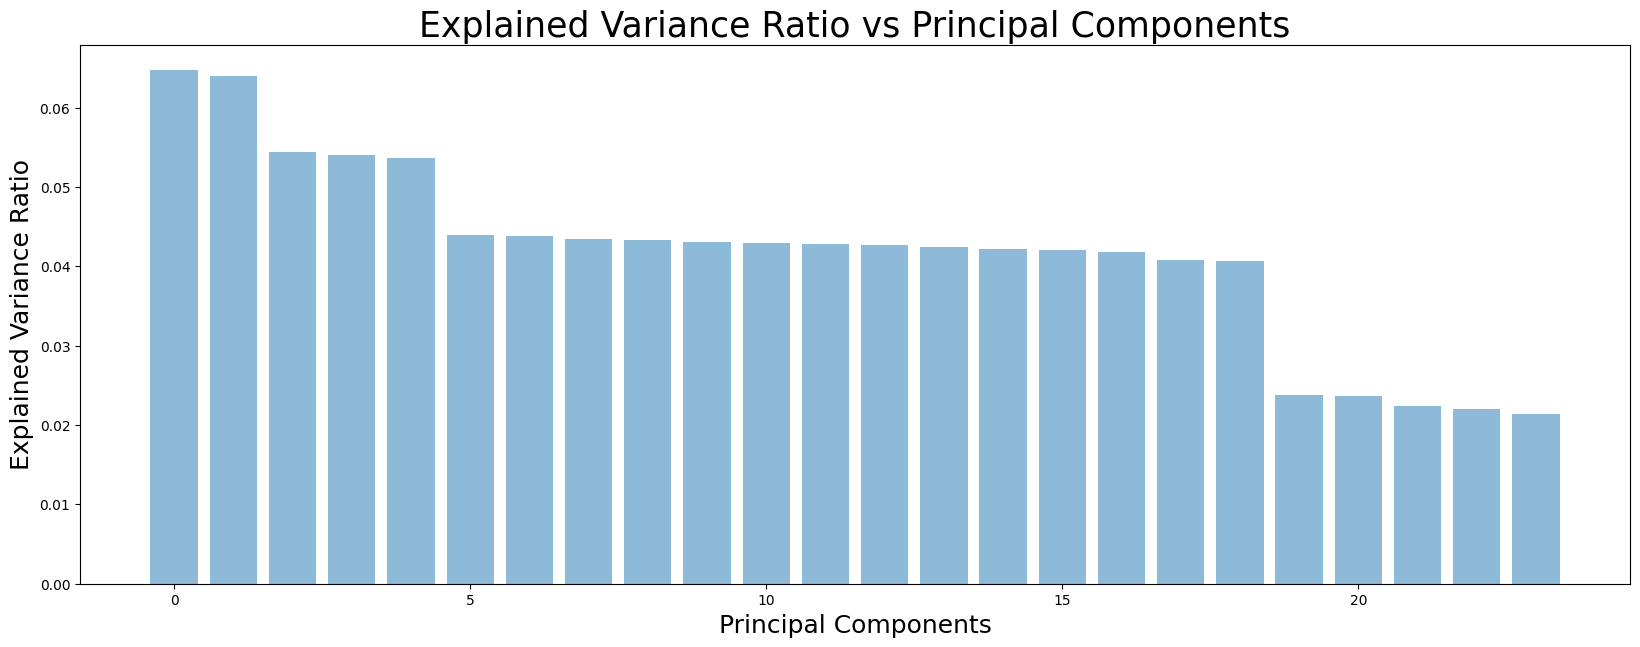

In [100]:
background_color = "#ffffff"
fig = plt.figure(figsize=(20,7), facecolor=background_color)
plt.bar(range(24), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance')
plt.ylabel('Explained Variance Ratio',  fontsize = 18)
plt.xlabel('Principal Components', fontsize = 18)
plt.title('Explained Variance Ratio vs Principal Components', fontsize = 25)
plt.show()

In [ ]:
pca = PCA(n_components=n)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

svm.score(X_test, y_test)